In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls "/gdrive/My Drive/Covid"

owid-covid-data_2.csv


In [ ]:
covid = pd.read_csv('/gdrive/My Drive/Covid/owid-covid-data_2.csv')

# **Nulls**

## **confirmed cases and death**

In [ ]:
covid

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

In [ ]:
covid.describe()

total_cases  ...  excess_mortality_cumulative_per_million
count  1.260310e+05  ...                              4656.000000
mean   2.054031e+06  ...                               781.114218
std    1.171742e+07  ...                              1166.907295
min    1.000000e+00  ...                             -1749.128494
25%    2.412000e+03  ...                               -43.100925
50%    2.753000e+04  ...                               364.906628
75%    2.664290e+05  ...                              1351.300112
max    2.533235e+08  ...                              6157.832804

[8 rows x 62 columns]

In [ ]:
covid1 = covid.copy()
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

In [ ]:
covid1.fillna(covid1[['new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed' , 'new_cases_per_million',
                      'new_cases_smoothed_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].fillna(0), inplace=True)

covid1.fillna(covid1[['total_cases' , 'total_deaths' , 'total_cases_per_million' , 'total_deaths_per_million']].fillna(method='bfill'), inplace=True)
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

In [ ]:
covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133292 entries, 0 to 133291
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    133292 non-null  object 
 1   continent                                   124779 non-null  object 
 2   location                                    133292 non-null  object 
 3   date                                        133292 non-null  object 
 4   total_cases                                 133292 non-null  float64
 5   new_cases                                   133292 non-null  float64
 6   new_cases_smoothed                          133292 non-null  float64
 7   total_deaths                                133292 non-null  float64
 8   new_deaths                                  133292 non-null  float64
 9   new_deaths_smoothed                         133292 non-null  float64
 

## **reproduction_rate and stringency_index**

In [ ]:
covid.sample(10)

iso_code  ... excess_mortality_cumulative_per_million
76709        MRT  ...                                     NaN
35244        EGY  ...                                     NaN
10844        BRB  ...                                     NaN
93874        PNG  ...                                     NaN
83518        NAM  ...                                     NaN
102481       SMR  ...                                     NaN
97086        PRT  ...                                     NaN
18025        BRN  ...                                     NaN
41093        FJI  ...                                     NaN
88339   OWID_NAM  ...                                     NaN

[10 rows x 67 columns]

In [ ]:
covid1['reproduction_rate'].fillna((0), inplace=True)
covid1['stringency_index'].fillna((0), inplace=True)
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

## **Tests**

In [ ]:
covid1.fillna(covid1[['total_tests', 'total_tests_per_thousand', 'positive_rate', 'tests_per_case']].fillna(method='bfill'), inplace=True)
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

In [ ]:
covid1.fillna(covid1[['new_tests' , 'new_tests_per_thousand' , 'new_tests_smoothed', 'new_tests_smoothed_per_thousand']].fillna(0), inplace=True)

covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

In [ ]:
covid1['tests_units'].fillna(('No Where'), inplace=True)
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

In [ ]:
covid1.fillna(covid1[['total_tests', 'total_tests_per_thousand', 'positive_rate', 'tests_per_case']].fillna(method='pad'), inplace=True)
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

## **Vaccinations**

In [ ]:
#covid1.fillna(covid1[['total_vaccinations' , 'people_vaccinated', 'people_fully_vaccinated' , 'new_vaccinations',
#                  'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred'
#                  , 'people_fully_vaccinated_per_hundred' , 'new_vaccinations_smoothed_per_million'
#                   , 'new_people_vaccinated_smoothed' , 'new_people_vaccinated_smoothed_per_hundred' ]].fillna(method ='bfill'), inplace=True)

covid1.fillna(covid1[['total_boosters' , 'total_boosters_per_hundred' ]].fillna(0), inplace=True)
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

In [ ]:
covid1.fillna(covid1[['total_vaccinations' , 'people_vaccinated', 'people_fully_vaccinated' , 'new_vaccinations',
                  'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred'
                  , 'people_fully_vaccinated_per_hundred' , 'new_vaccinations_smoothed_per_million'
                   , 'new_people_vaccinated_smoothed' , 'new_people_vaccinated_smoothed_per_hundred' ]].fillna(0), inplace=True)

In [ ]:
covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133292 entries, 0 to 133291
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    133292 non-null  object 
 1   continent                                   124779 non-null  object 
 2   location                                    133292 non-null  object 
 3   date                                        133292 non-null  object 
 4   total_cases                                 133292 non-null  float64
 5   new_cases                                   133292 non-null  float64
 6   new_cases_smoothed                          133292 non-null  float64
 7   total_deaths                                133292 non-null  float64
 8   new_deaths                                  133292 non-null  float64
 9   new_deaths_smoothed                         133292 non-null  float64
 

### **Vaccine Tests**

In [ ]:
temp = covid['new_vaccinations_smoothed'].notna()
cs = covid[temp]
temp2 = cs['total_vaccinations'].isna()
cj = cs[temp2]
cj

iso_code  ... excess_mortality_cumulative_per_million
365         AFG  ...                                     NaN
366         AFG  ...                                     NaN
367         AFG  ...                                     NaN
368         AFG  ...                                     NaN
369         AFG  ...                                     NaN
...         ...  ...                                     ...
133198      ZWE  ...                                     NaN
133211      ZWE  ...                                     NaN
133222      ZWE  ...                                     NaN
133228      ZWE  ...                                     NaN
133233      ZWE  ...                                     NaN

[26439 rows x 67 columns]

In [ ]:
temp = covid['location'] == 'Afghanistan'
cs = covid[temp]
temp2 = cs['total_vaccinations'].notna()
cj = cs[temp2]
cj

iso_code  ... excess_mortality_cumulative_per_million
364      AFG  ...                                     NaN
370      AFG  ...                                     NaN
386      AFG  ...                                     NaN
408      AFG  ...                                     NaN
423      AFG  ...                                     NaN
442      AFG  ...                                     NaN
451      AFG  ...                                     NaN
455      AFG  ...                                     NaN
457      AFG  ...                                     NaN
458      AFG  ...                                     NaN
461      AFG  ...                                     NaN
464      AFG  ...                                     NaN
465      AFG  ...                                     NaN
470      AFG  ...                                     NaN
476      AFG  ...                                     NaN
484      AFG  ...                                     NaN
489      AFG  ...                                     NaN
492      AFG  ...                                     NaN
497      AFG  ...                                     NaN
499      AFG  ...                                     NaN
503      AFG  ...                                     NaN
506      AFG  ...                                     NaN
510      AFG  ...                                     NaN
516      AFG  ...                                     NaN
543      AFG  ...                                     NaN
554      AFG  ...                                     NaN
584      AFG  ...                                     NaN
619      AFG  ...                                     NaN

[28 rows x 67 columns]

In [ ]:
temp = covid['new_vaccinations'].notna()
cs = covid[temp]
temp2 = cs['new_vaccinations_smoothed'].isna()
cj = cs[temp2]
cj

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million]
Index: []

### **Boosters tests**

In [ ]:
temp = covid1['total_boosters'].notna()
cs = covid1[temp]
cs

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[133292 rows x 67 columns]

## **Others**

In [ ]:
temp = covid1['continent'].notna()
covid1 = covid1[temp]
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[124779 rows x 67 columns]

In [ ]:
temp = covid1['population'].notna()
covid1 = covid1[temp]
covid1

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[124476 rows x 67 columns]

In [ ]:
covid1['life_expectancy'].fillna((covid1['life_expectancy'].mean()), inplace=True)
covid1['human_development_index'].fillna((covid1['human_development_index'].mean()), inplace=True)

covid1['hospital_beds_per_thousand'].fillna((covid1['hospital_beds_per_thousand'].mean()), inplace=True)
covid1['handwashing_facilities'].fillna((covid1['handwashing_facilities'].mean()), inplace=True)
covid1['male_smokers'].fillna((covid1['male_smokers'].mean()), inplace=True)
covid1['female_smokers'].fillna((covid1['female_smokers'].mean()), inplace=True)
covid1['diabetes_prevalence'].fillna((covid1['diabetes_prevalence'].mean()), inplace=True)
covid1['cardiovasc_death_rate'].fillna((covid1['cardiovasc_death_rate'].mean()), inplace=True)

covid1['extreme_poverty'].fillna((covid1['extreme_poverty'].mean()*2), inplace=True)
covid1['gdp_per_capita'].fillna((covid1['gdp_per_capita'].mean()/2), inplace=True)

covid1['aged_70_older'].fillna((covid1['aged_70_older'].mean()), inplace=True)
covid1['aged_65_older'].fillna((covid1['aged_65_older'].mean()), inplace=True)
covid1['median_age'].fillna((covid1['median_age'].mean()), inplace=True)
covid1['population_density'].fillna((covid1['population_density'].mean()), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
covid1.drop(columns=['iso_code'], axis=1, inplace=True)
covid1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


continent  ... excess_mortality_cumulative_per_million
0           Asia  ...                                     NaN
1           Asia  ...                                     NaN
2           Asia  ...                                     NaN
3           Asia  ...                                     NaN
4           Asia  ...                                     NaN
...          ...  ...                                     ...
133287    Africa  ...                                     NaN
133288    Africa  ...                                     NaN
133289    Africa  ...                                     NaN
133290    Africa  ...                                     NaN
133291    Africa  ...                                     NaN

[124476 rows x 66 columns]

### **tests**

In [ ]:
temp = covid1['extreme_poverty'].notna()
df = covid1[temp]
df

continent  ... excess_mortality_cumulative_per_million
0           Asia  ...                                     NaN
1           Asia  ...                                     NaN
2           Asia  ...                                     NaN
3           Asia  ...                                     NaN
4           Asia  ...                                     NaN
...          ...  ...                                     ...
133287    Africa  ...                                     NaN
133288    Africa  ...                                     NaN
133289    Africa  ...                                     NaN
133290    Africa  ...                                     NaN
133291    Africa  ...                                     NaN

[124476 rows x 66 columns]

In [ ]:
covid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124476 entries, 0 to 133291
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   124476 non-null  object 
 1   location                                    124476 non-null  object 
 2   date                                        124476 non-null  object 
 3   total_cases                                 124476 non-null  float64
 4   new_cases                                   124476 non-null  float64
 5   new_cases_smoothed                          124476 non-null  float64
 6   total_deaths                                124476 non-null  float64
 7   new_deaths                                  124476 non-null  float64
 8   new_deaths_smoothed                         124476 non-null  float64
 9   total_cases_per_million                     124476 non-null  float64
 

In [ ]:
temp = df['location'] == 'Saudi Arabia'
ds = df[temp]
ds

continent  ... excess_mortality_cumulative_per_million
103522      Asia  ...                                     NaN
103523      Asia  ...                                     NaN
103524      Asia  ...                                     NaN
103525      Asia  ...                                     NaN
103526      Asia  ...                                     NaN
...          ...  ...                                     ...
104140      Asia  ...                                     NaN
104141      Asia  ...                                     NaN
104142      Asia  ...                                     NaN
104143      Asia  ...                                     NaN
104144      Asia  ...                                     NaN

[623 rows x 66 columns]

In [ ]:
temp = covid1['population_density'].isna()
cd = covid1[temp]
cd

Empty DataFrame
Columns: [continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million]
Index: []

In [ ]:
covid.sample(10)

iso_code  ... excess_mortality_cumulative_per_million
92123        PAK  ...                                     NaN
5020         ARG  ...                                     NaN
38261        SWZ  ...                                     NaN
24572        CHN  ...                                     NaN
47247        GRL  ...                                     NaN
104054       SAU  ...                                     NaN
122508       TUR  ...                                     NaN
17397        VGB  ...                                     NaN
122161       TUR  ...                                     NaN
6791    OWID_ASI  ...                                     NaN

[10 rows x 67 columns]

In [ ]:
temp = covid['population_density'].isna()
cg = covid[temp]
cg

iso_code  ... excess_mortality_cumulative_per_million
630     OWID_AFR  ...                                     NaN
631     OWID_AFR  ...                                     NaN
632     OWID_AFR  ...                                     NaN
633     OWID_AFR  ...                                     NaN
634     OWID_AFR  ...                                     NaN
...          ...  ...                                     ...
130828       WLF  ...                                     NaN
130829       WLF  ...                                     NaN
130830       WLF  ...                                     NaN
130831       WLF  ...                                     NaN
130832       WLF  ...                                     NaN

[12632 rows x 67 columns]

In [ ]:
temp = covid['extreme_poverty'].notna()
cg = covid[temp]
cg

iso_code  ... excess_mortality_cumulative_per_million
1271        ALB  ...                                     NaN
1272        ALB  ...                                     NaN
1273        ALB  ...                                     NaN
1274        ALB  ...                                     NaN
1275        ALB  ...                              -66.412942
...         ...  ...                                     ...
133287      ZWE  ...                                     NaN
133288      ZWE  ...                                     NaN
133289      ZWE  ...                                     NaN
133290      ZWE  ...                                     NaN
133291      ZWE  ...                                     NaN

[77396 rows x 67 columns]

## **Excess mortality**

In [ ]:
covid_em = covid1.copy()
covid_hos = covid1.copy()

In [ ]:
covid1.drop(columns=['excess_mortality_cumulative_absolute', 'excess_mortality_cumulative','excess_mortality',
                     'excess_mortality_cumulative_per_million'] , axis = 1 , inplace = True)
covid1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


continent     location  ... life_expectancy  human_development_index
0           Asia  Afghanistan  ...           64.83                    0.511
1           Asia  Afghanistan  ...           64.83                    0.511
2           Asia  Afghanistan  ...           64.83                    0.511
3           Asia  Afghanistan  ...           64.83                    0.511
4           Asia  Afghanistan  ...           64.83                    0.511
...          ...          ...  ...             ...                      ...
133287    Africa     Zimbabwe  ...           61.49                    0.571
133288    Africa     Zimbabwe  ...           61.49                    0.571
133289    Africa     Zimbabwe  ...           61.49                    0.571
133290    Africa     Zimbabwe  ...           61.49                    0.571
133291    Africa     Zimbabwe  ...           61.49                    0.571

[124476 rows x 62 columns]

## **Hospital & ICU**

In [ ]:
covid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124476 entries, 0 to 133291
Data columns (total 62 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   124476 non-null  object 
 1   location                                    124476 non-null  object 
 2   date                                        124476 non-null  object 
 3   total_cases                                 124476 non-null  float64
 4   new_cases                                   124476 non-null  float64
 5   new_cases_smoothed                          124476 non-null  float64
 6   total_deaths                                124476 non-null  float64
 7   new_deaths                                  124476 non-null  float64
 8   new_deaths_smoothed                         124476 non-null  float64
 9   total_cases_per_million                     124476 non-null  float64
 

In [ ]:
covid1.drop(columns=['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million',
       'weekly_icu_admissions', 'weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million'], axis=1, inplace=True)
covid1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


continent     location  ... life_expectancy  human_development_index
0           Asia  Afghanistan  ...           64.83                    0.511
1           Asia  Afghanistan  ...           64.83                    0.511
2           Asia  Afghanistan  ...           64.83                    0.511
3           Asia  Afghanistan  ...           64.83                    0.511
4           Asia  Afghanistan  ...           64.83                    0.511
...          ...          ...  ...             ...                      ...
133287    Africa     Zimbabwe  ...           61.49                    0.571
133288    Africa     Zimbabwe  ...           61.49                    0.571
133289    Africa     Zimbabwe  ...           61.49                    0.571
133290    Africa     Zimbabwe  ...           61.49                    0.571
133291    Africa     Zimbabwe  ...           61.49                    0.571

[124476 rows x 54 columns]

# **Outliers**

In [ ]:
covid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124476 entries, 0 to 133291
Data columns (total 54 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   124476 non-null  object 
 1   location                                    124476 non-null  object 
 2   date                                        124476 non-null  object 
 3   total_cases                                 124476 non-null  float64
 4   new_cases                                   124476 non-null  float64
 5   new_cases_smoothed                          124476 non-null  float64
 6   total_deaths                                124476 non-null  float64
 7   new_deaths                                  124476 non-null  float64
 8   new_deaths_smoothed                         124476 non-null  float64
 9   total_cases_per_million                     124476 non-null  float64
 

In [ ]:
# for i in covid1.columns :
#   if (covid1[i].dtype == 'int64' or covid1[i].dtype == 'float64') :
#     maximum = covid1[i].mean() + 3*covid1[i].std()
#     minimum = covid1[i].mean() - 3*covid1[i].std()
#     temp = (covid1[i] > maximum ) | (covid1[i] < minimum )
#     dropped_cov = dropped_cov.append(covid1[temp],ignore_index=True)
#     covid1 = covid1.drop(covid1[temp].index)

In [ ]:
covid1['index'] = list(range(len(covid1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
covid1.set_index(covid1['index'],inplace=True)
covid1

continent     location  ... human_development_index   index
index                          ...                                
0           Asia  Afghanistan  ...                   0.511       0
1           Asia  Afghanistan  ...                   0.511       1
2           Asia  Afghanistan  ...                   0.511       2
3           Asia  Afghanistan  ...                   0.511       3
4           Asia  Afghanistan  ...                   0.511       4
...          ...          ...  ...                     ...     ...
124471    Africa     Zimbabwe  ...                   0.571  124471
124472    Africa     Zimbabwe  ...                   0.571  124472
124473    Africa     Zimbabwe  ...                   0.571  124473
124474    Africa     Zimbabwe  ...                   0.571  124474
124475    Africa     Zimbabwe  ...                   0.571  124475

[124476 rows x 55 columns]

In [ ]:
dropped_cov = pd.DataFrame()
tempcov = pd.DataFrame()

In [ ]:
locations = covid1['location'].unique()
for loc in locations:
  tempcov = covid1[covid1['location']==loc]
  for i in tempcov.columns :
    tempcov = covid1[covid1['location']==loc]
    if tempcov[i].dtype == 'int64' or tempcov[i].dtype == 'float64':
      maximum = tempcov[i].mean() + 3*tempcov[i].std()
      minimum = tempcov[i].mean() - 3*tempcov[i].std()
      temp = (tempcov[i] > maximum ) | (tempcov[i] < minimum )
      dropped_cov = dropped_cov.append(tempcov[temp],ignore_index=True)
      covid1 = covid1.drop(tempcov[temp]['index'].values)
    covid1['index'] = list(range(len(covid1)))
    covid1.set_index(covid1['index'], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
len(dropped_cov)

38553

In [ ]:
covid1

continent     location  ... human_development_index  index
index                         ...                               
0          Asia  Afghanistan  ...                   0.511      0
1          Asia  Afghanistan  ...                   0.511      1
2          Asia  Afghanistan  ...                   0.511      2
3          Asia  Afghanistan  ...                   0.511      3
4          Asia  Afghanistan  ...                   0.511      4
...         ...          ...  ...                     ...    ...
85918    Africa     Zimbabwe  ...                   0.571  85918
85919    Africa     Zimbabwe  ...                   0.571  85919
85920    Africa     Zimbabwe  ...                   0.571  85920
85921    Africa     Zimbabwe  ...                   0.571  85921
85922    Africa     Zimbabwe  ...                   0.571  85922

[85923 rows x 55 columns]

## **Tests**

**reproduction_rate**

In [ ]:
#temp = covid1['reproduction_rate'] < 4*covid1['reproduction_rate'].mean()
#covid1 = covid1[temp]
#temp2 = covid1['reproduction_rate'] >= 0
#covid1 = covid1[temp2]
#covid1

positive_rate

In [ ]:
#temp = covid1['positive_rate'] < 10*covid1['positive_rate'].mean()
#covid1 = covid1[temp]
#covid1

new_cases

In [ ]:
#temp = covid1['new_cases'] >= 0
#covid1 = covid1[temp]
#covid1

In [ ]:
temp = covid1['new_deaths'] > 1000
cs = covid1[temp]
cs

continent       location  ... human_development_index  index
index                                ...                               
10482  South America         Brazil  ...                   0.765  10482
10484  South America         Brazil  ...                   0.765  10484
10485  South America         Brazil  ...                   0.765  10485
10489  South America         Brazil  ...                   0.765  10489
10490  South America         Brazil  ...                   0.765  10490
...              ...            ...  ...                     ...    ...
82104  North America  United States  ...                   0.926  82104
82105  North America  United States  ...                   0.926  82105
82106  North America  United States  ...                   0.926  82106
82109  North America  United States  ...                   0.926  82109
82110  North America  United States  ...                   0.926  82110

[422 rows x 55 columns]

# **Date**

## **Date Relations**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


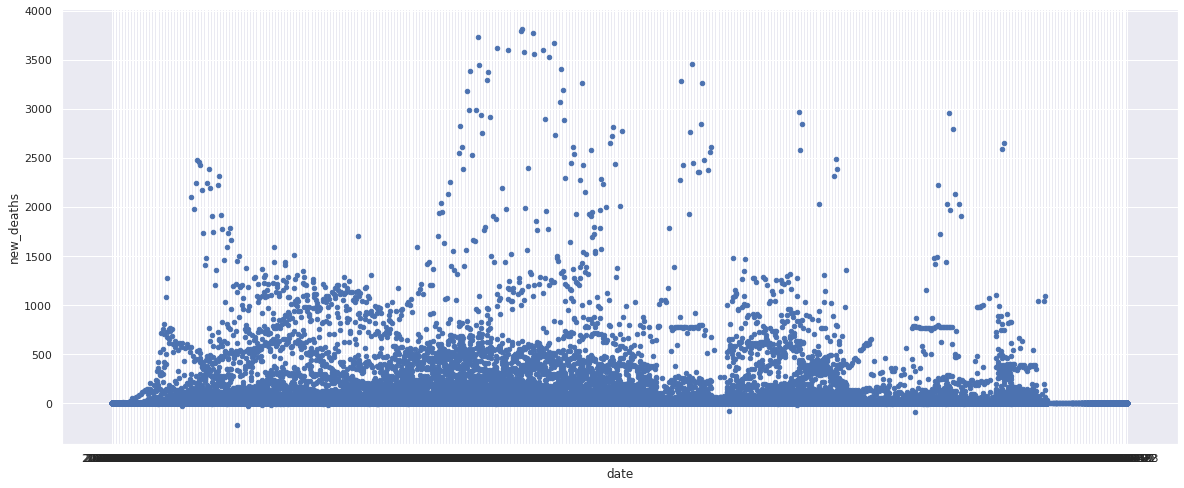

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
covid1.plot.scatter(x = 'date', y = 'new_deaths')

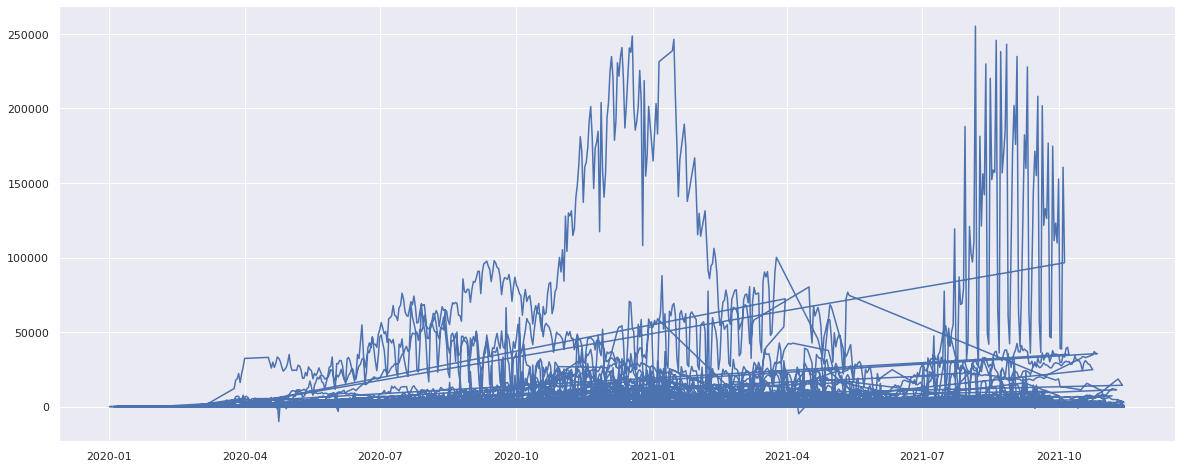

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
plt.plot('date','new_cases' , data=covid1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


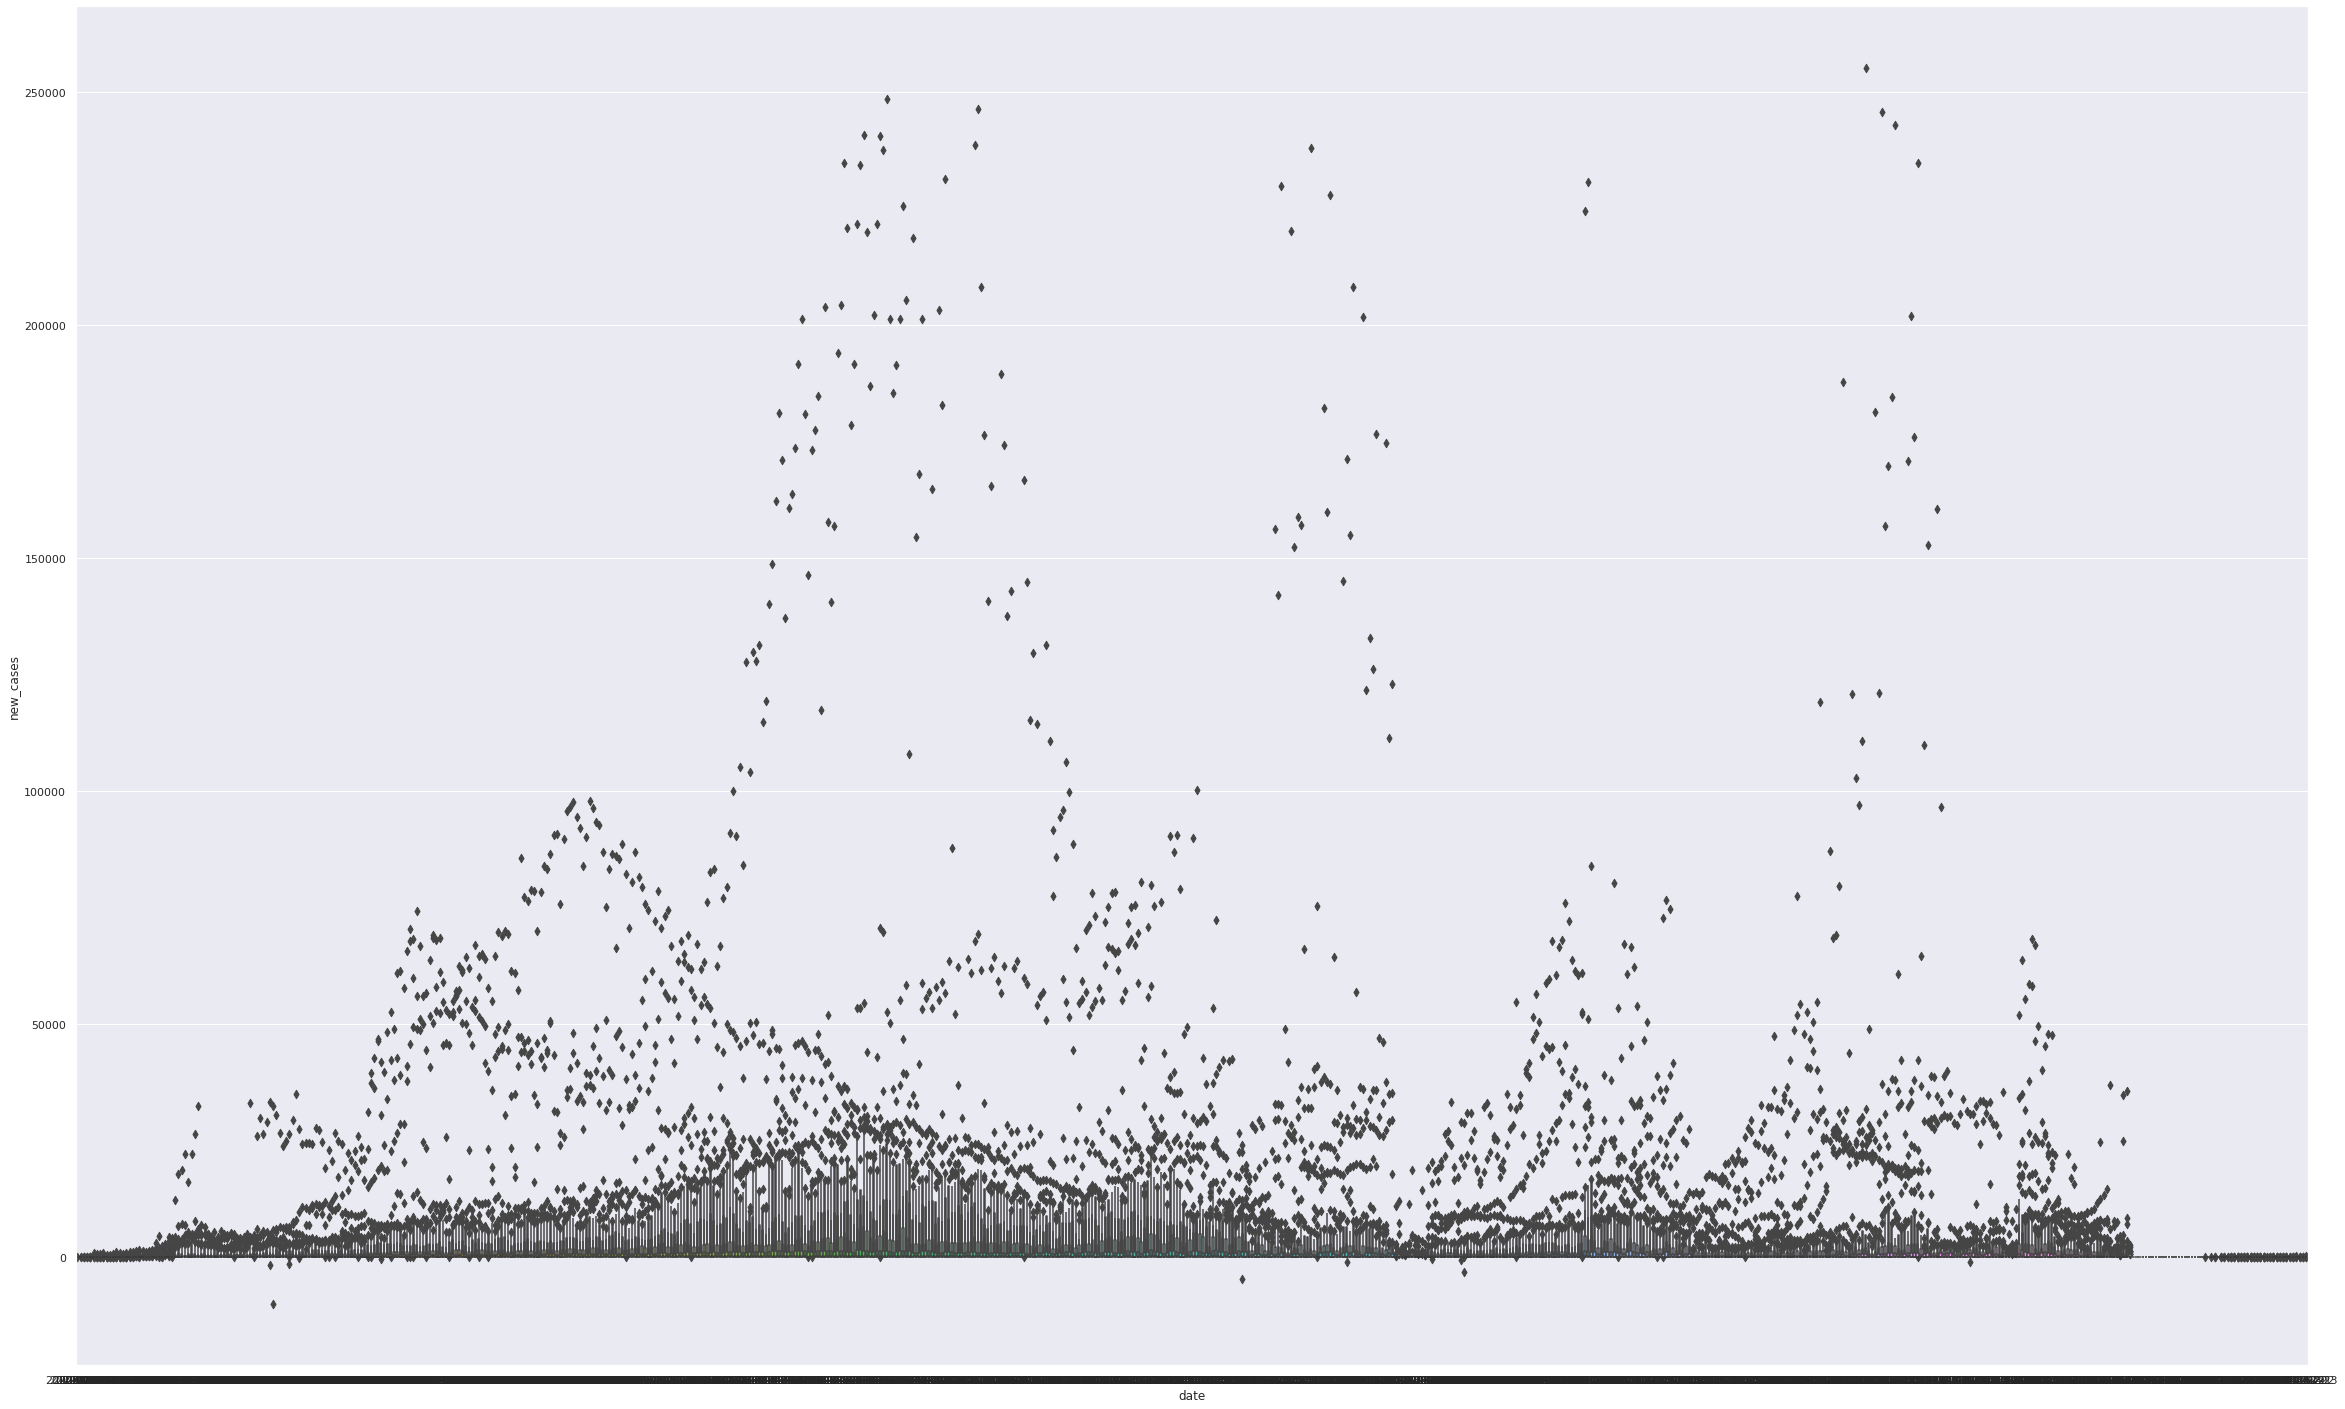

In [ ]:
plt.figure(figsize=(40,25))

sns.boxenplot(covid1['date'] , covid1['new_cases'])

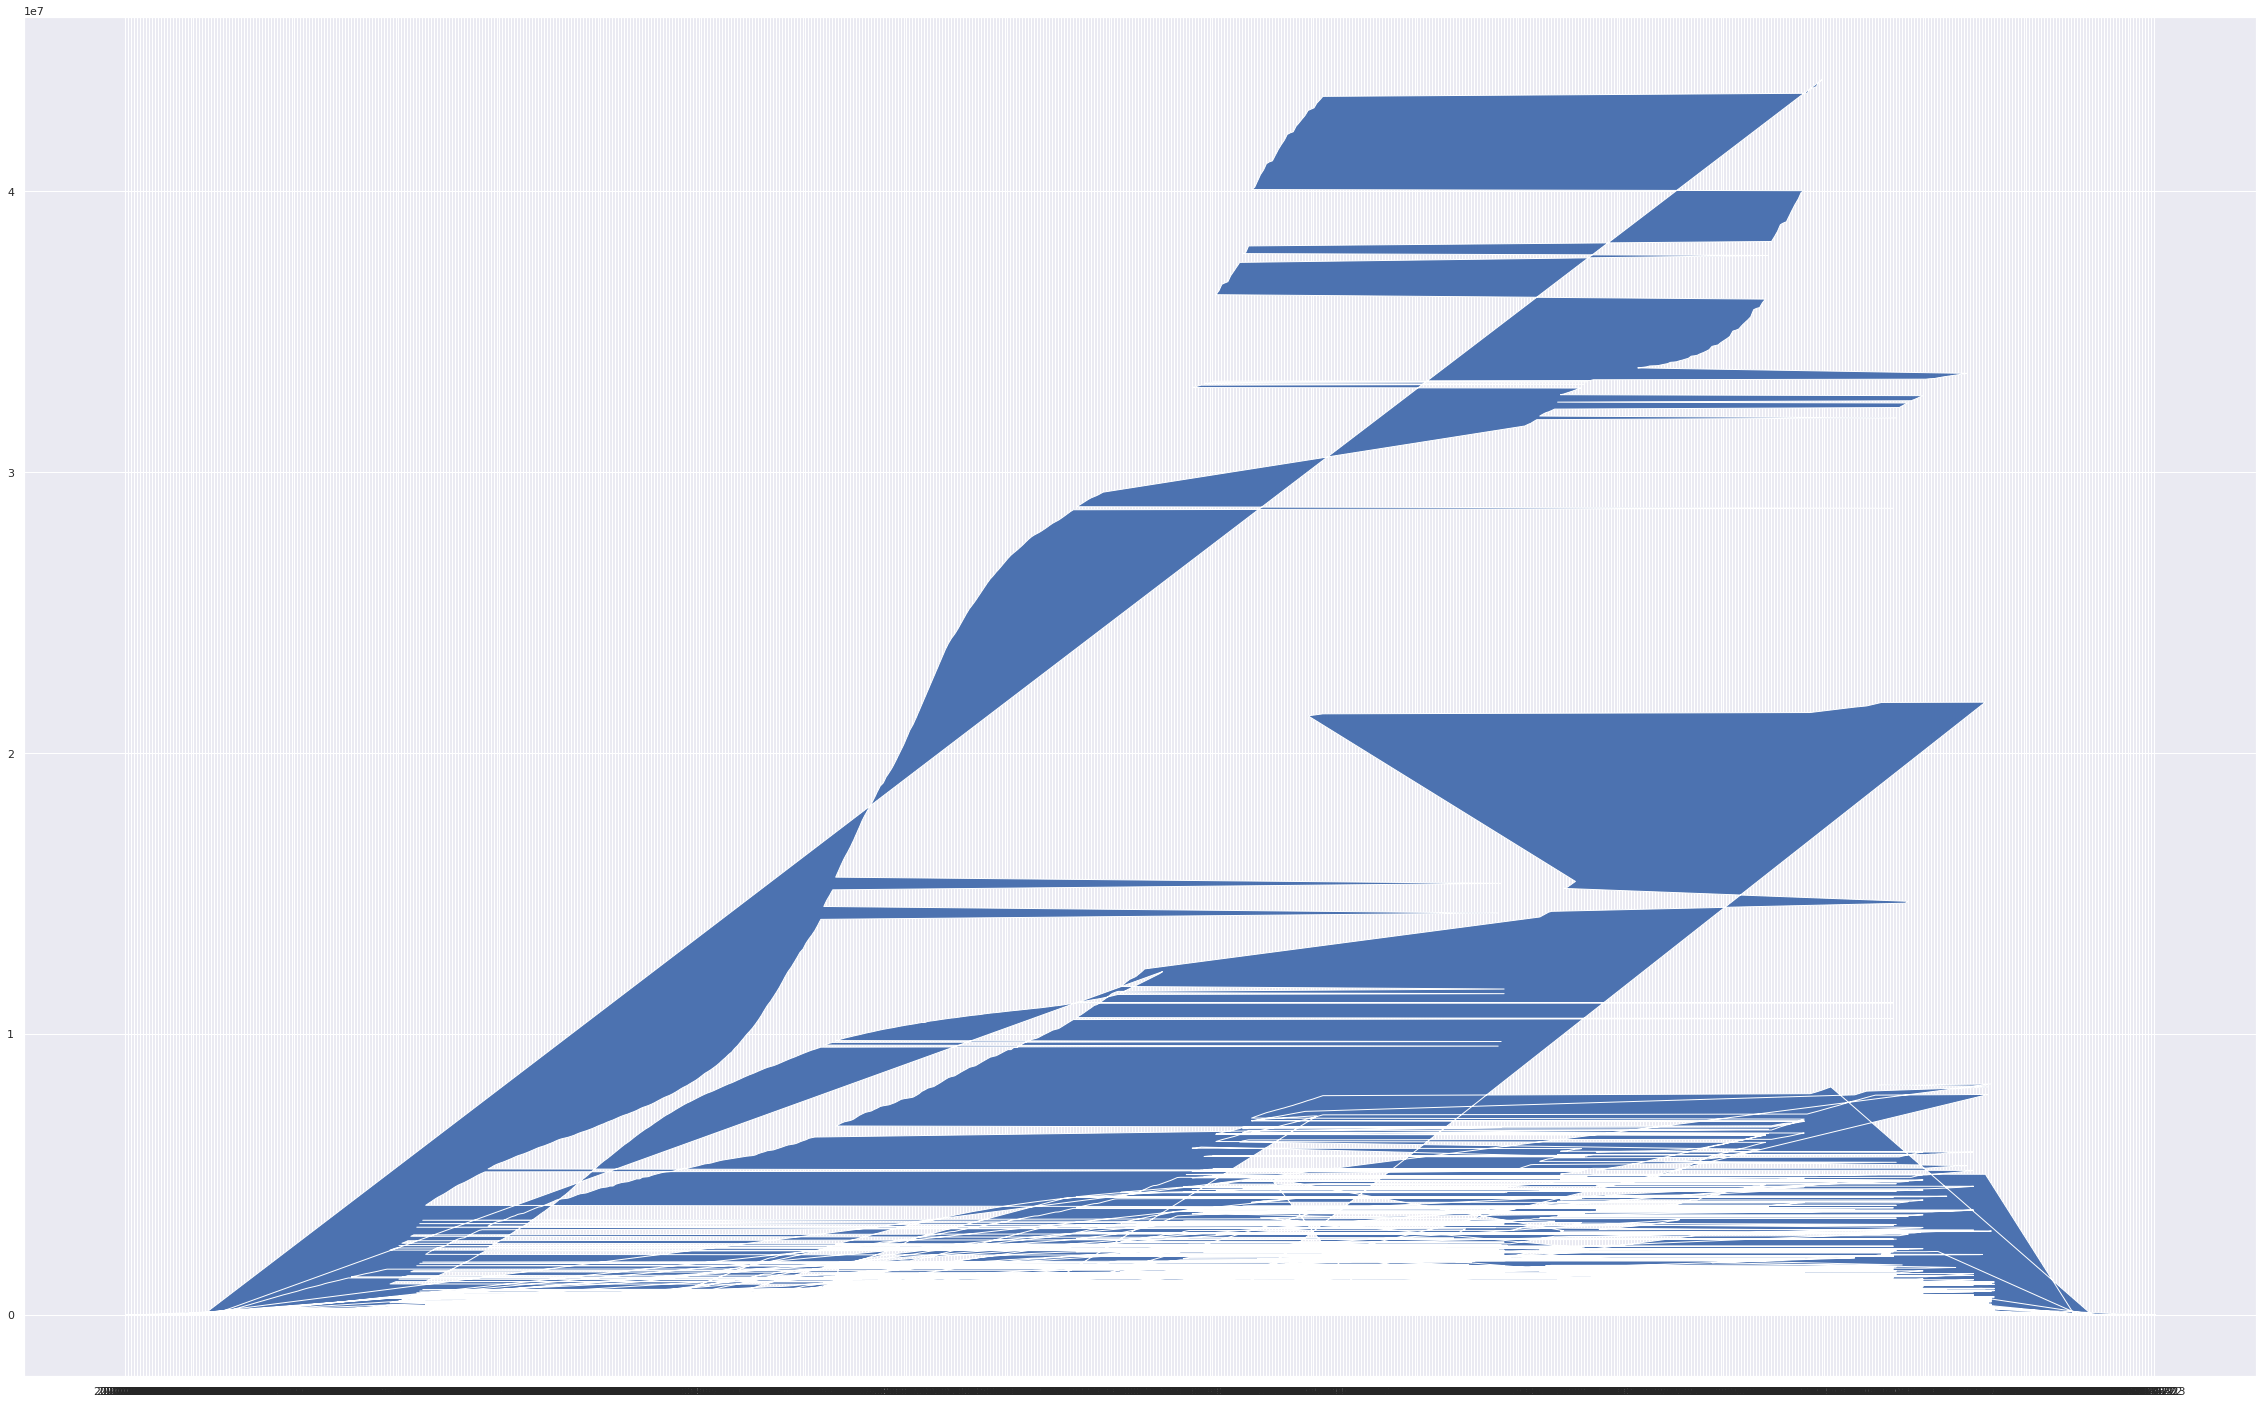

In [ ]:
plt.figure(figsize=(40,25))

plt.fill_between(covid1['date'] , covid1['total_cases'])

## **Create Month**

In [ ]:
covid1['date'] = pd.to_datetime(covid1['date'])
covid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85923 entries, 0 to 85922
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   85923 non-null  object        
 1   location                                    85923 non-null  object        
 2   date                                        85923 non-null  datetime64[ns]
 3   total_cases                                 85923 non-null  float64       
 4   new_cases                                   85923 non-null  float64       
 5   new_cases_smoothed                          85923 non-null  float64       
 6   total_deaths                                85923 non-null  float64       
 7   new_deaths                                  85923 non-null  float64       
 8   new_deaths_smoothed                         85923 non-null  float64       
 9   total_

In [ ]:
type(covid1['date'])

pandas.core.series.Series

In [ ]:
covid1['month'] = ""
covid1

continent     location       date  ...  human_development_index  index  month
index                                    ...                                       
0          Asia  Afghanistan 2020-02-24  ...                    0.511      0       
1          Asia  Afghanistan 2020-02-25  ...                    0.511      1       
2          Asia  Afghanistan 2020-02-26  ...                    0.511      2       
3          Asia  Afghanistan 2020-02-27  ...                    0.511      3       
4          Asia  Afghanistan 2020-02-28  ...                    0.511      4       
...         ...          ...        ...  ...                      ...    ...    ...
85918    Africa     Zimbabwe 2021-03-20  ...                    0.571  85918       
85919    Africa     Zimbabwe 2021-03-21  ...                    0.571  85919       
85920    Africa     Zimbabwe 2021-03-22  ...                    0.571  85920       
85921    Africa     Zimbabwe 2021-03-23  ...                    0.571  85921       
85922    Africa     Zimbabwe 2021-06-12  ...                    0.571  85922       

[85923 rows x 56 columns]

In [ ]:
min(covid1['date'])

Timestamp('2020-01-01 00:00:00')

In [ ]:
max(covid1['date'])

Timestamp('2021-11-14 00:00:00')

In [ ]:
for i in range (len(covid1)):
  covid1.loc[covid1.index[i],'month'] = covid1.loc[covid1.index[i],'date'].month + ((covid1.loc[covid1.index[i],'date'].year - 2020) * 12)

In [ ]:
covid1.sample(10)

continent       location  ...  index  month
index                                ...              
22261  North America       Dominica  ...  22261     13
10275         Africa       Botswana  ...  10275     11
53525         Africa     Mozambique  ...  53525      8
47564           Asia       Malaysia  ...  47564      4
55737        Oceania  New Caledonia  ...  55737     21
42623           Asia           Laos  ...  42623      6
29082           Asia        Georgia  ...  29082      7
60640  South America       Paraguay  ...  60640     13
69570         Europe       Slovakia  ...  69570      8
11861         Africa   Burkina Faso  ...  11861      6

[10 rows x 56 columns]

## **Month Relation**

### **case and Death**

In [ ]:
covid1['month'] = covid1['month'].astype('float')

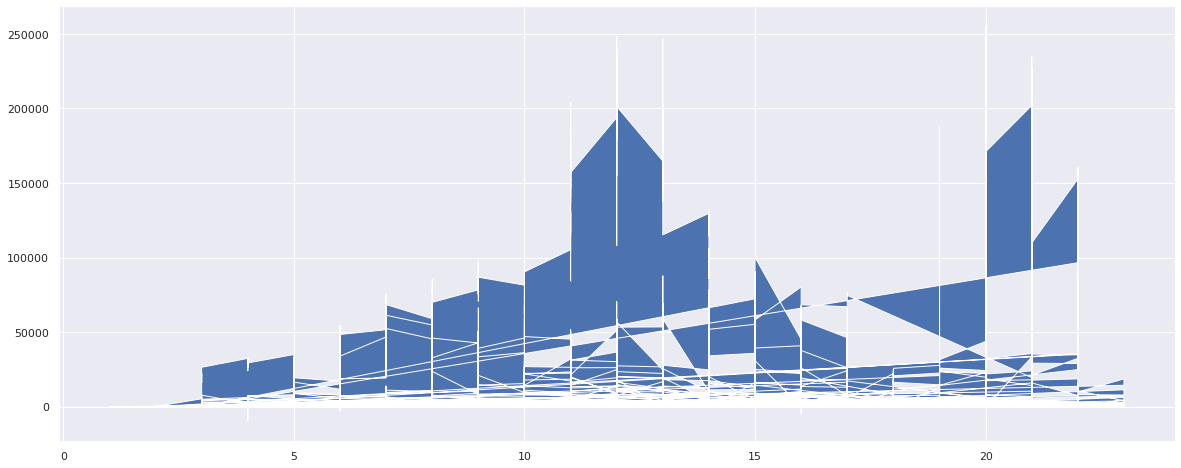

In [82]:
sns.set(rc= {'figure.figsize':(20,8)})
plt.fill('month','new_cases' , data=covid1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


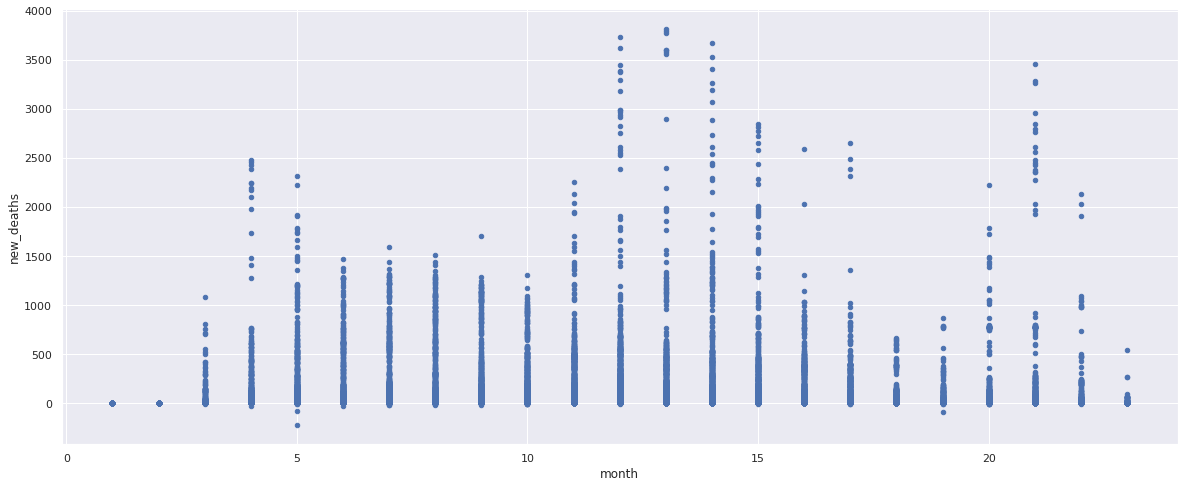

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
covid1.plot.scatter(x = 'month', y = 'new_deaths')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


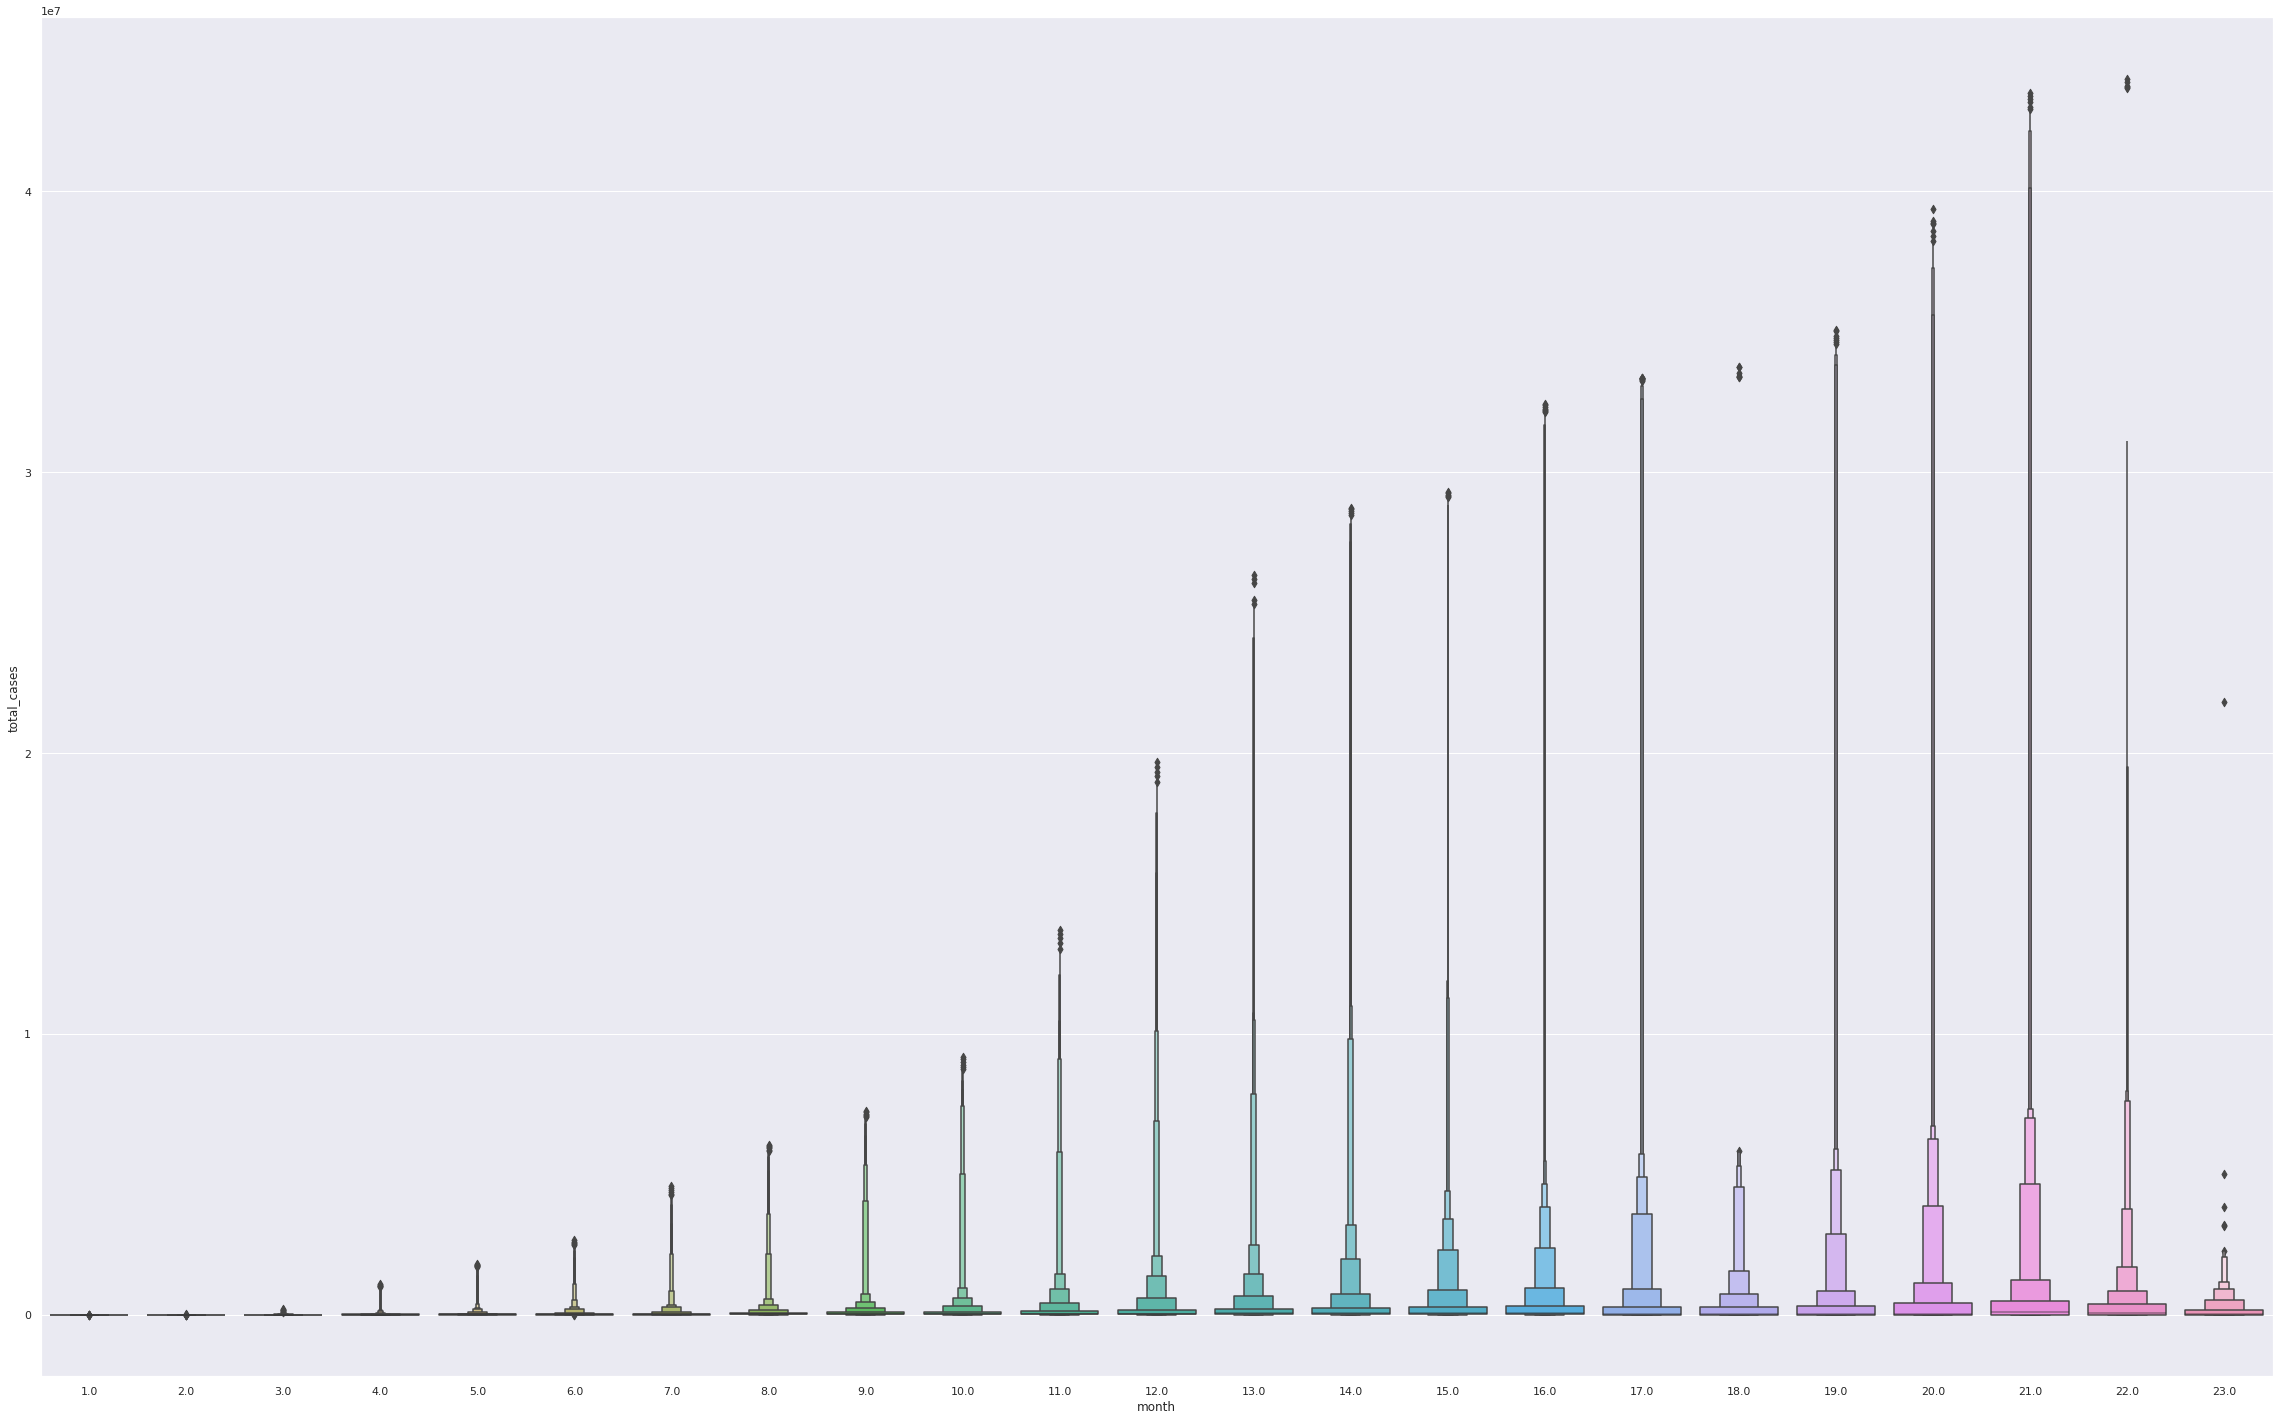

In [ ]:
plt.figure(figsize=(40,25))

sns.boxenplot(covid1['month'] , covid1['total_cases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


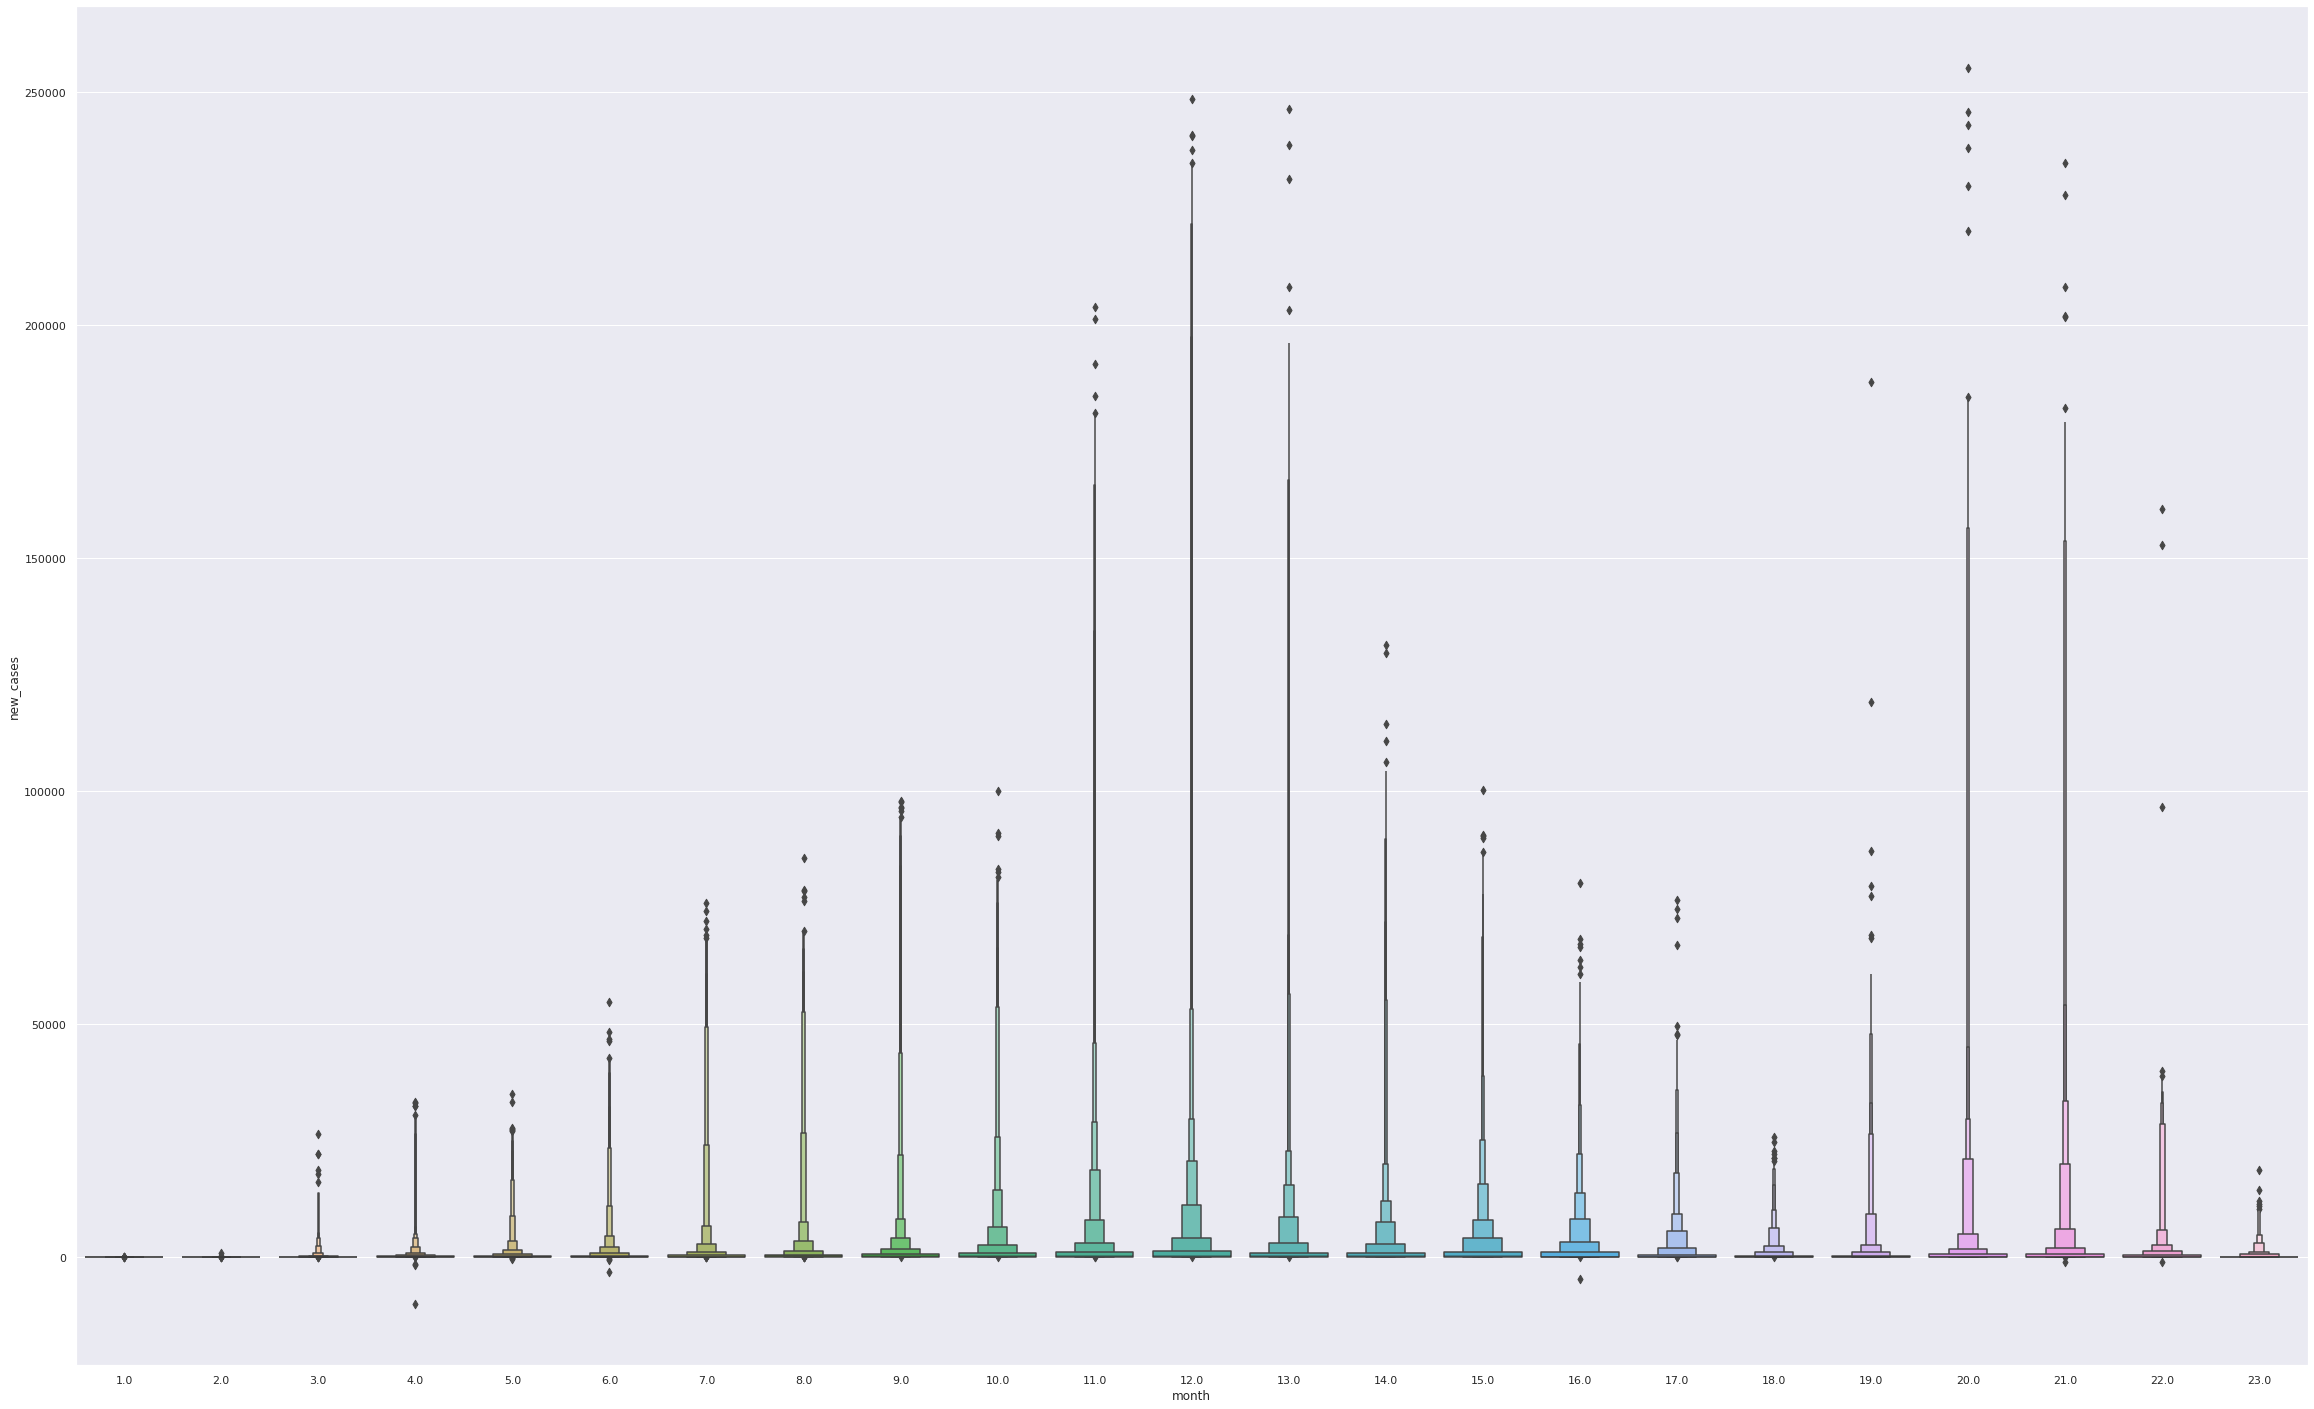

In [ ]:
plt.figure(figsize=(40,25))

sns.boxenplot(covid1['month'] , covid1['new_cases'])

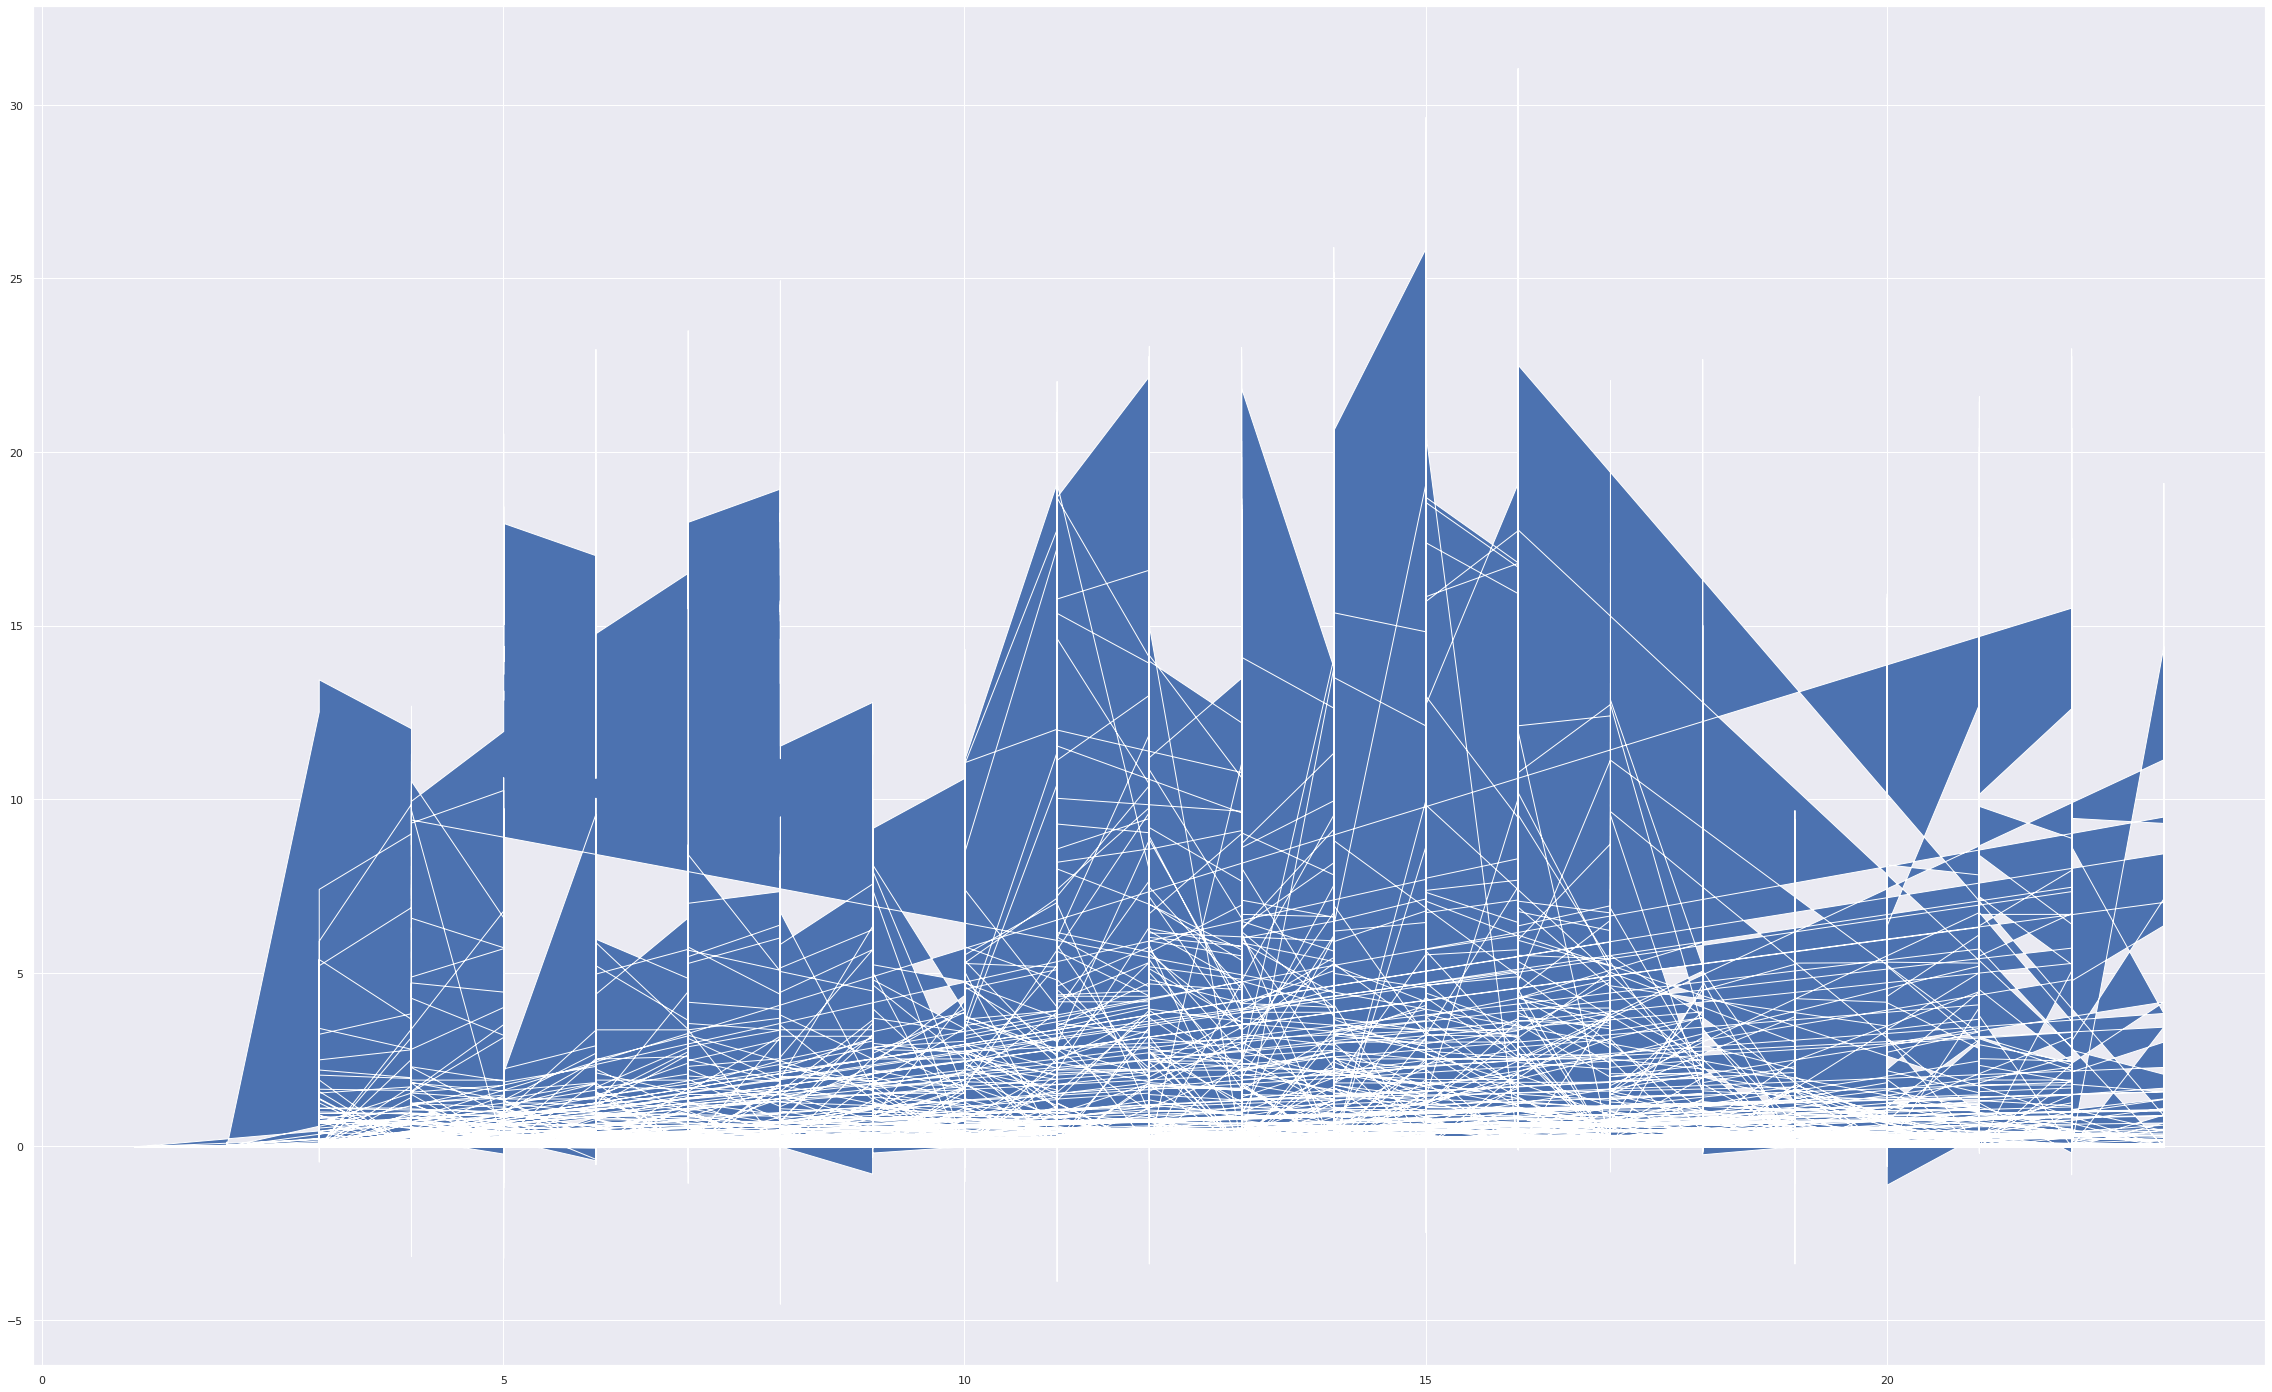

In [ ]:
plt.figure(figsize=(40,25))
plt.fill_between(covid1['month'].values , covid1['new_deaths_per_million'].values)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


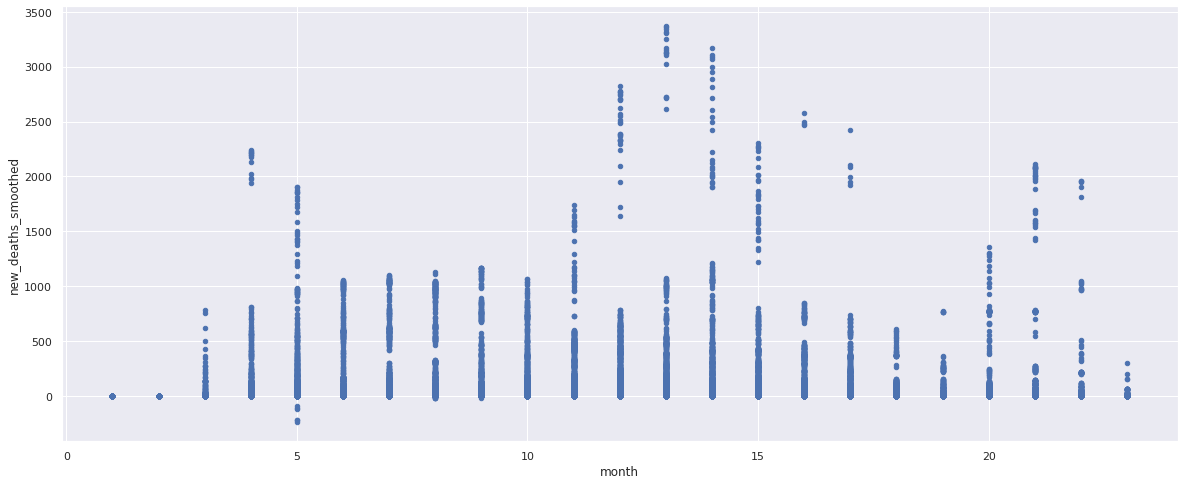

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
covid1.plot.scatter(x = 'month', y = 'new_deaths_smoothed')

### **people_fully_vaccinated**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


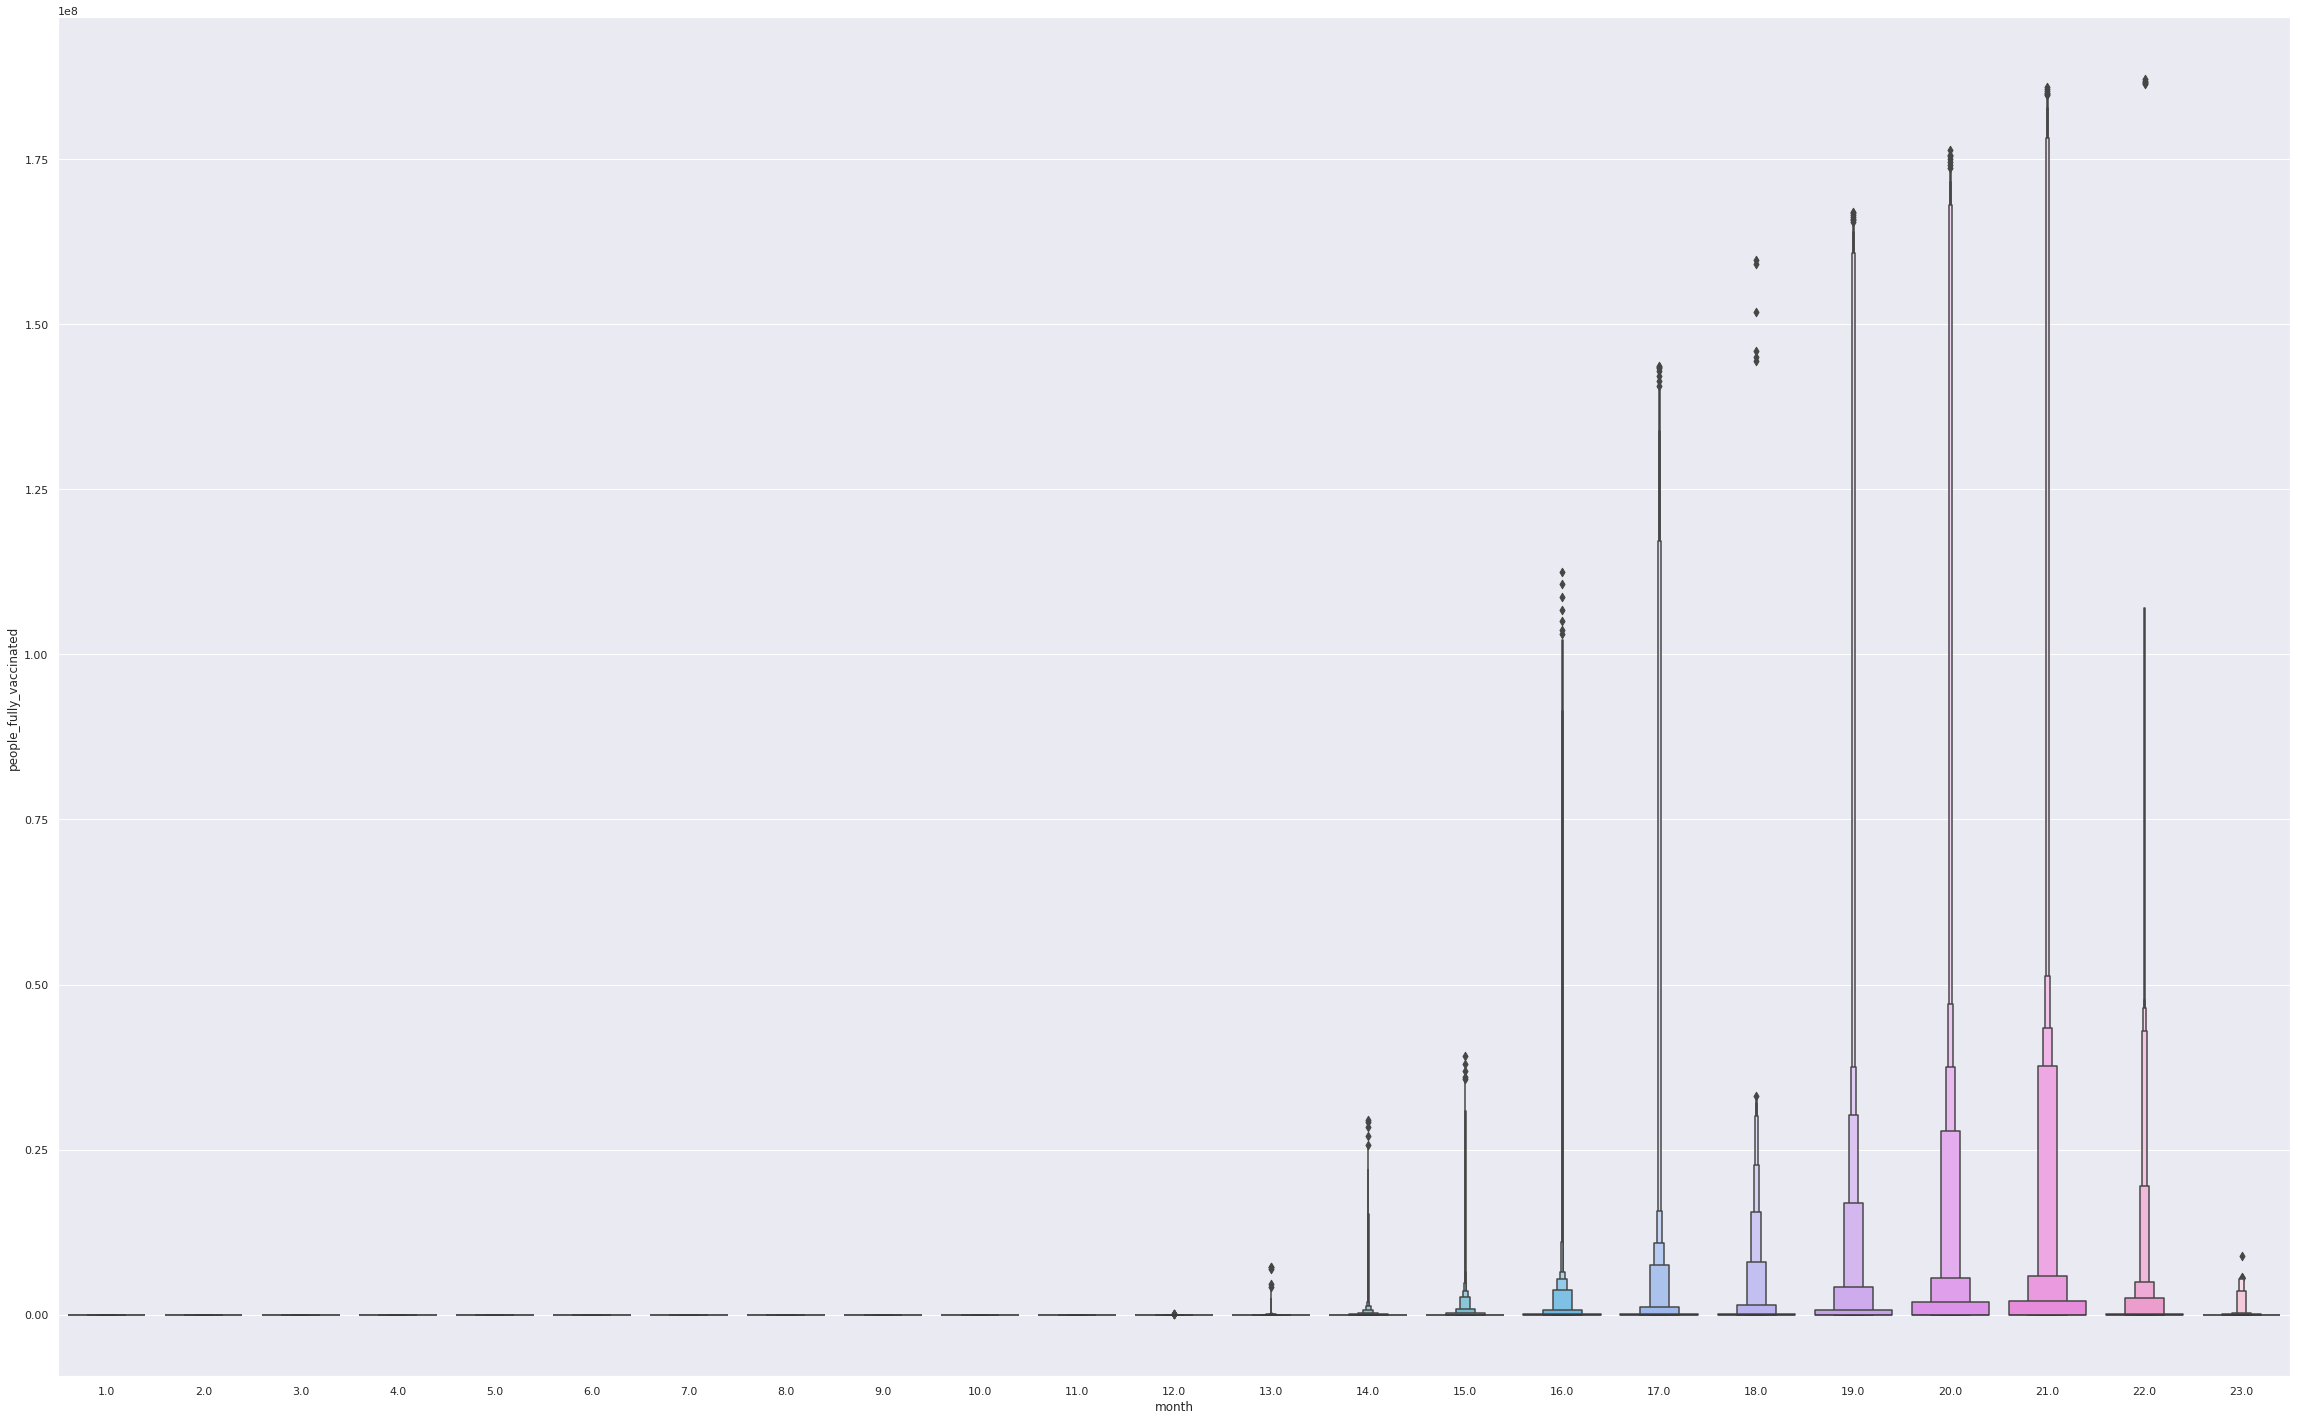

In [ ]:
plt.figure(figsize=(40,25))

sns.boxenplot(covid1['month'] , covid1['people_fully_vaccinated'])

### **positive_rate**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


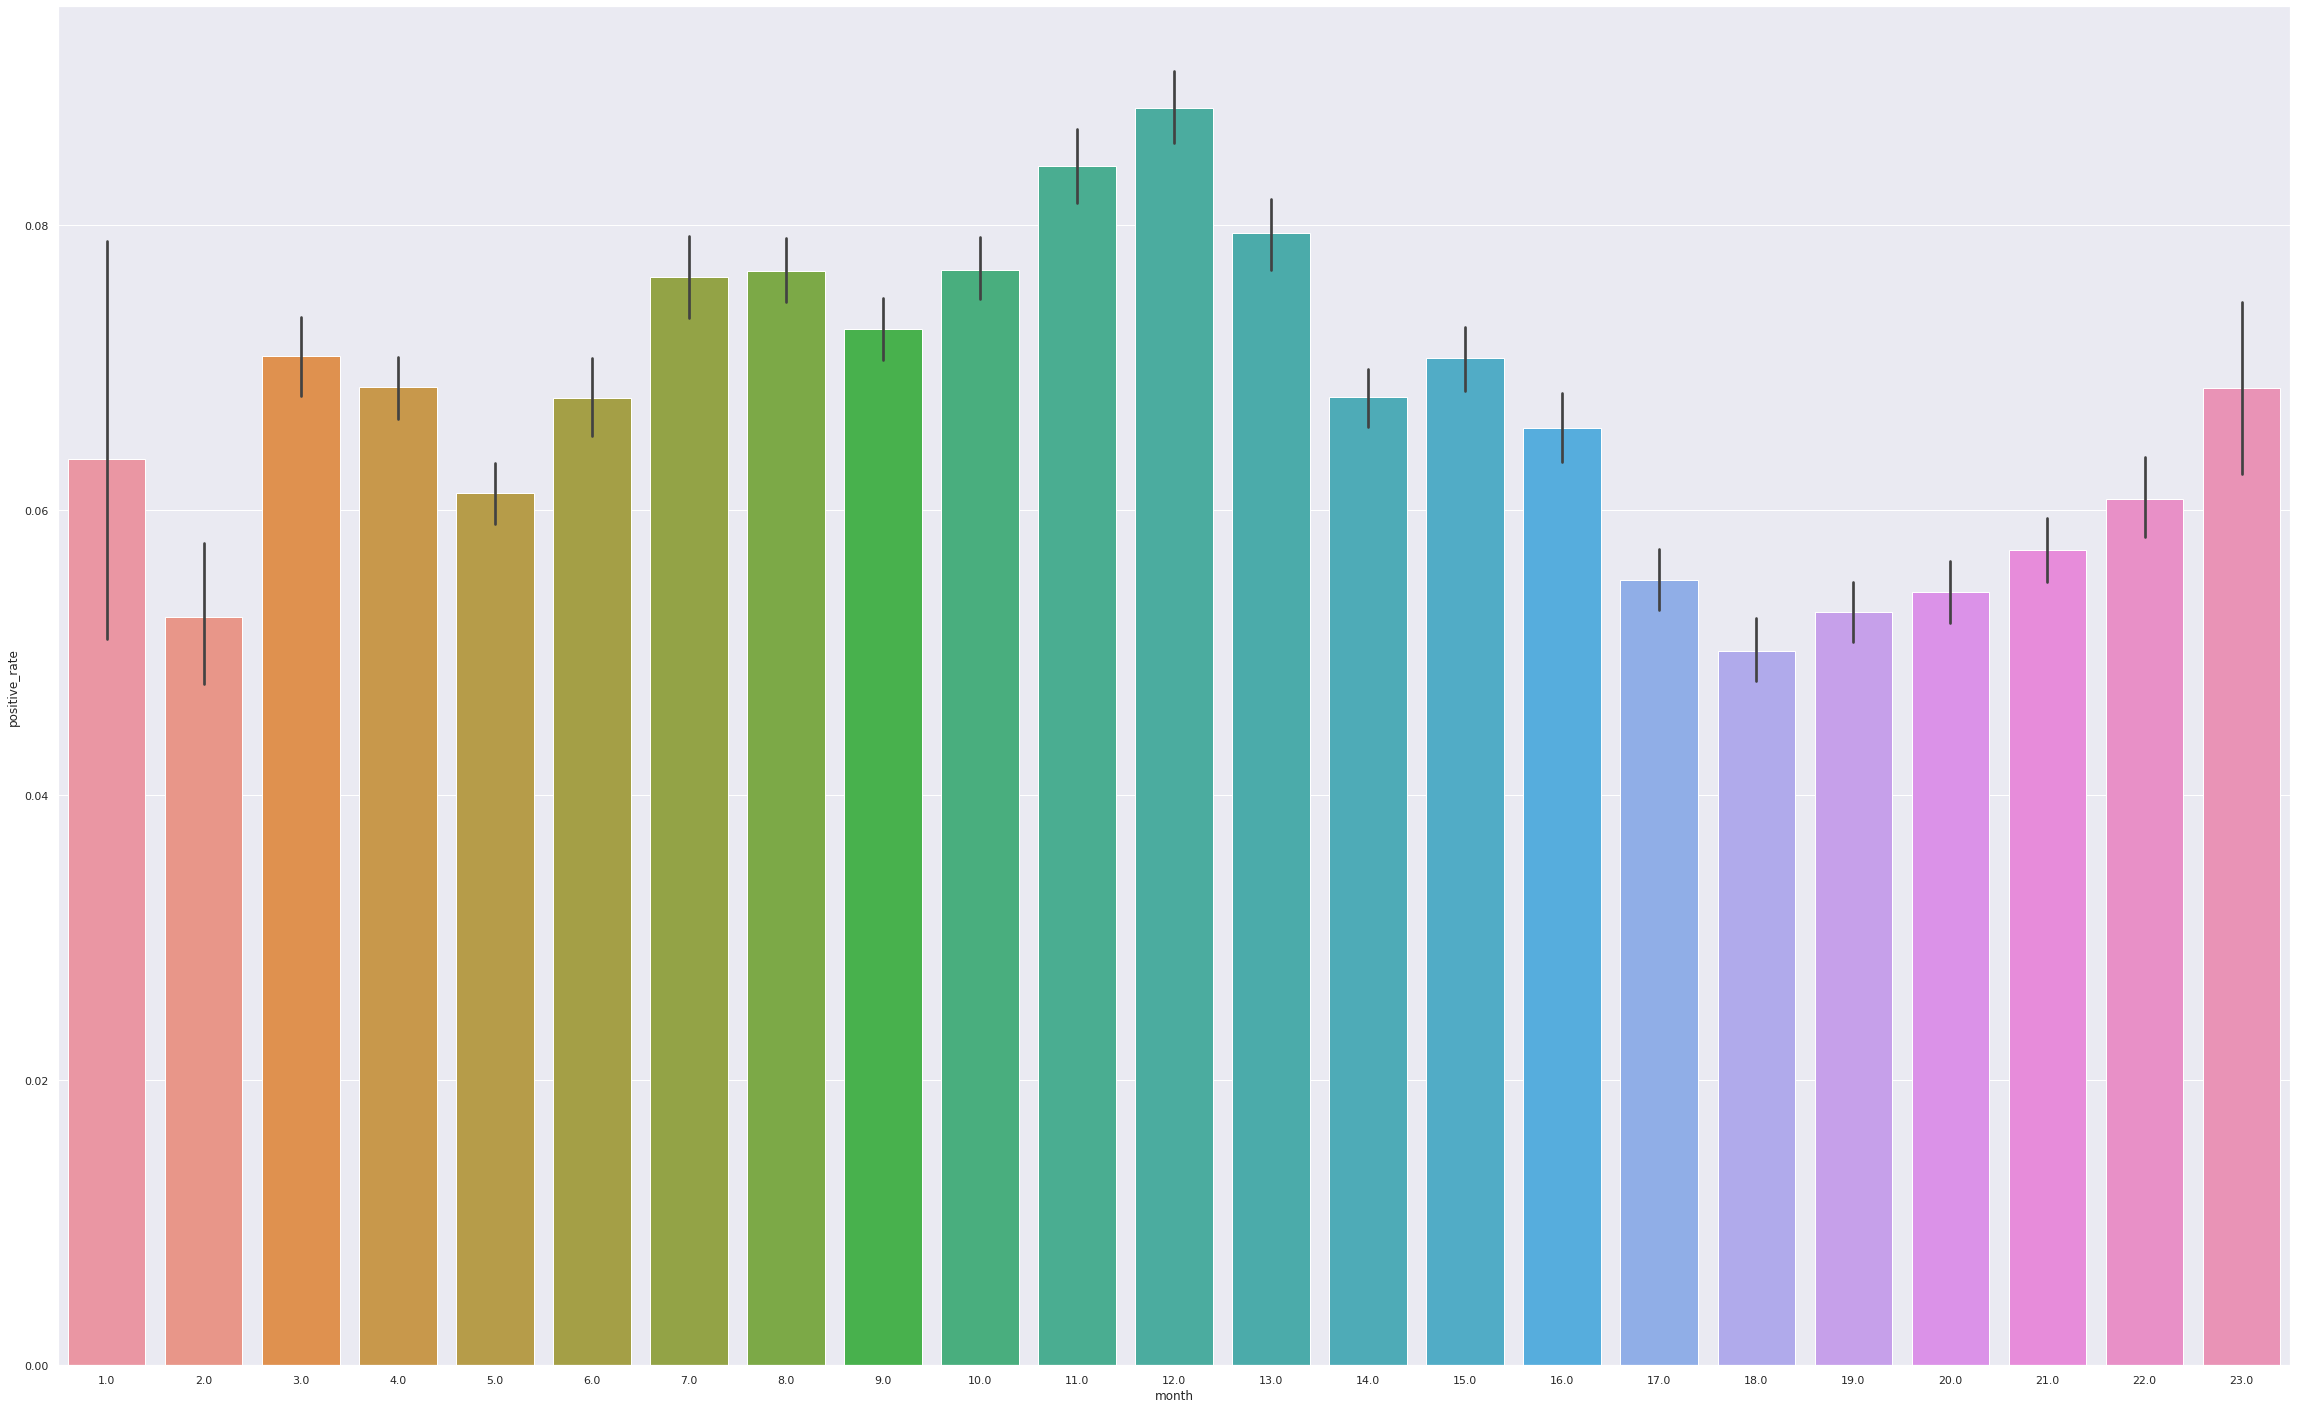

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['month'] , covid1['positive_rate'])

### **stringency_index**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


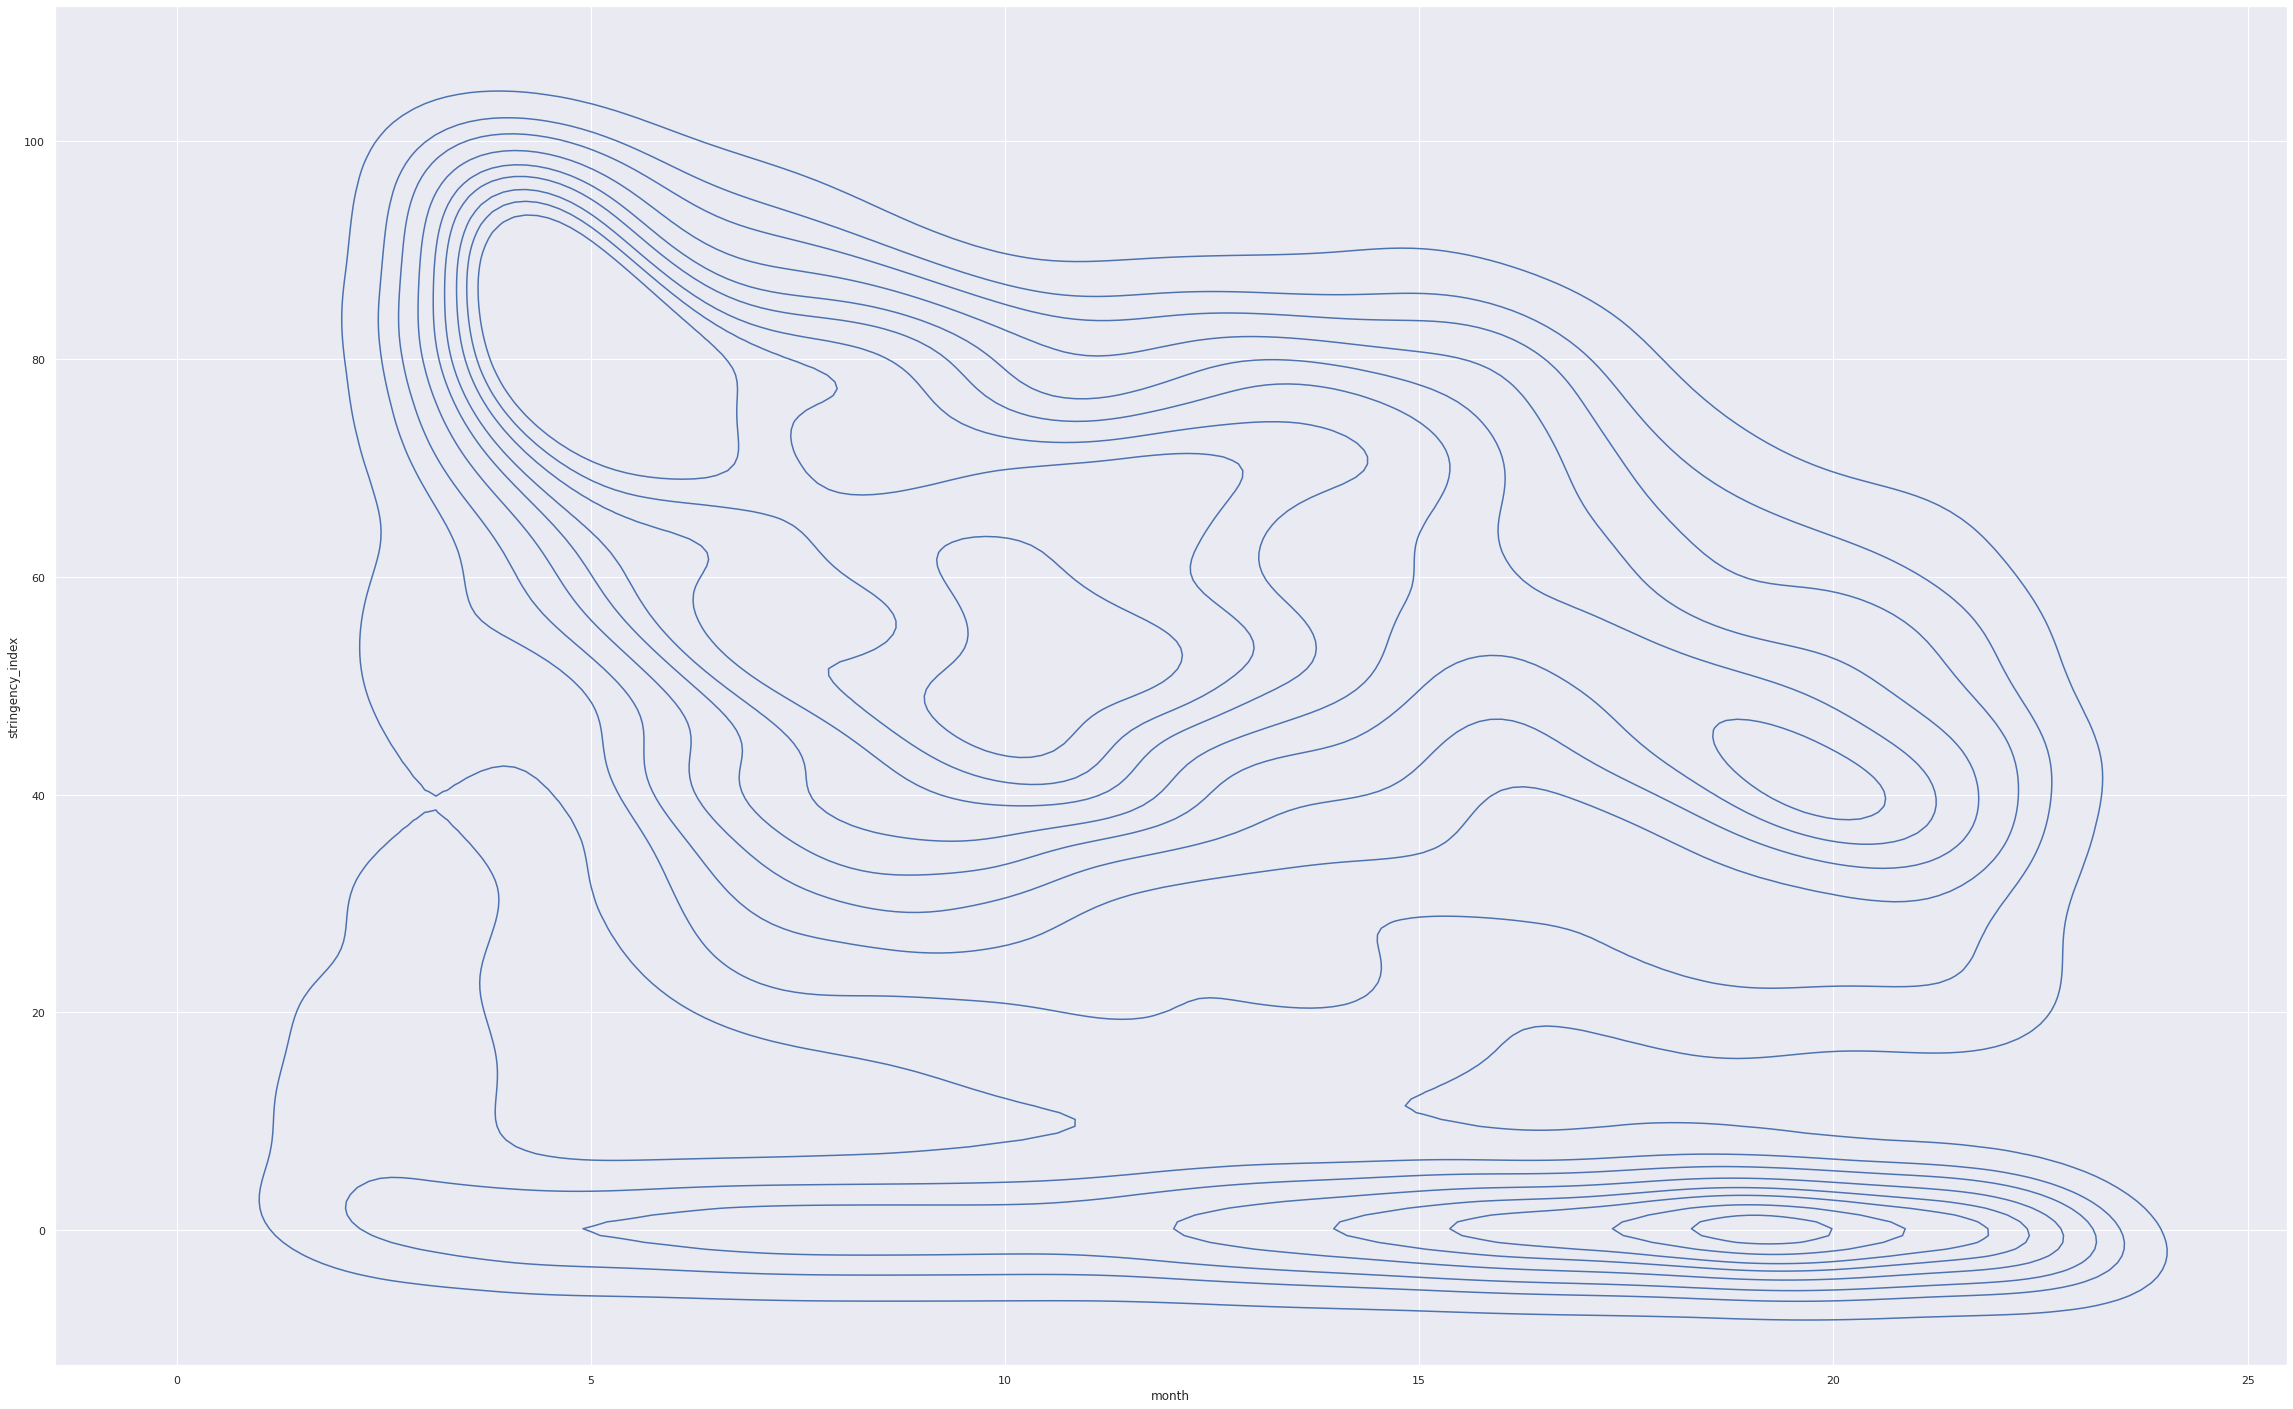

In [ ]:
plt.figure(figsize=(40,25))

sns.kdeplot(covid1['month'] , covid1['stringency_index'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


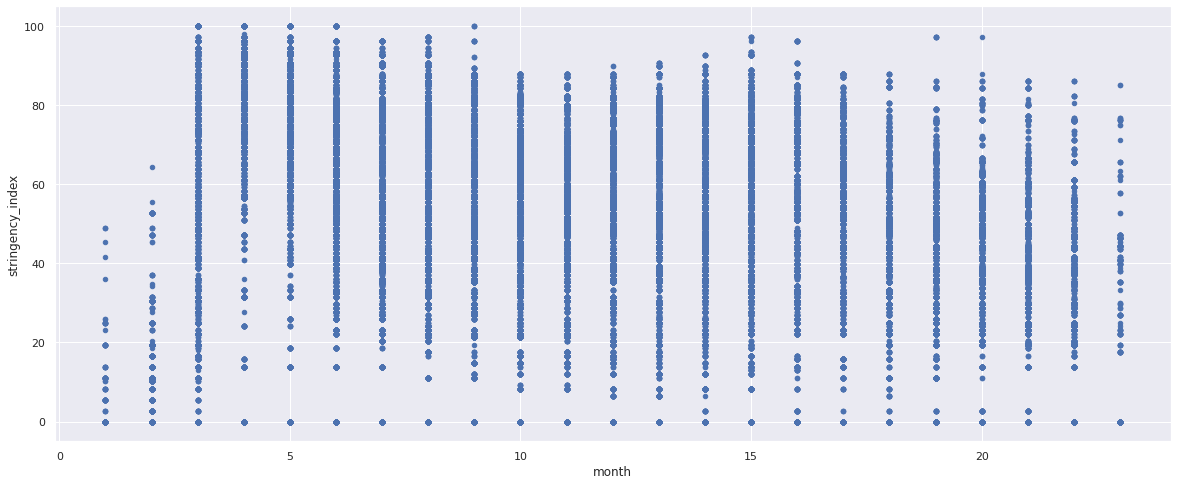

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
covid1.plot.scatter(x = 'month', y = 'stringency_index')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


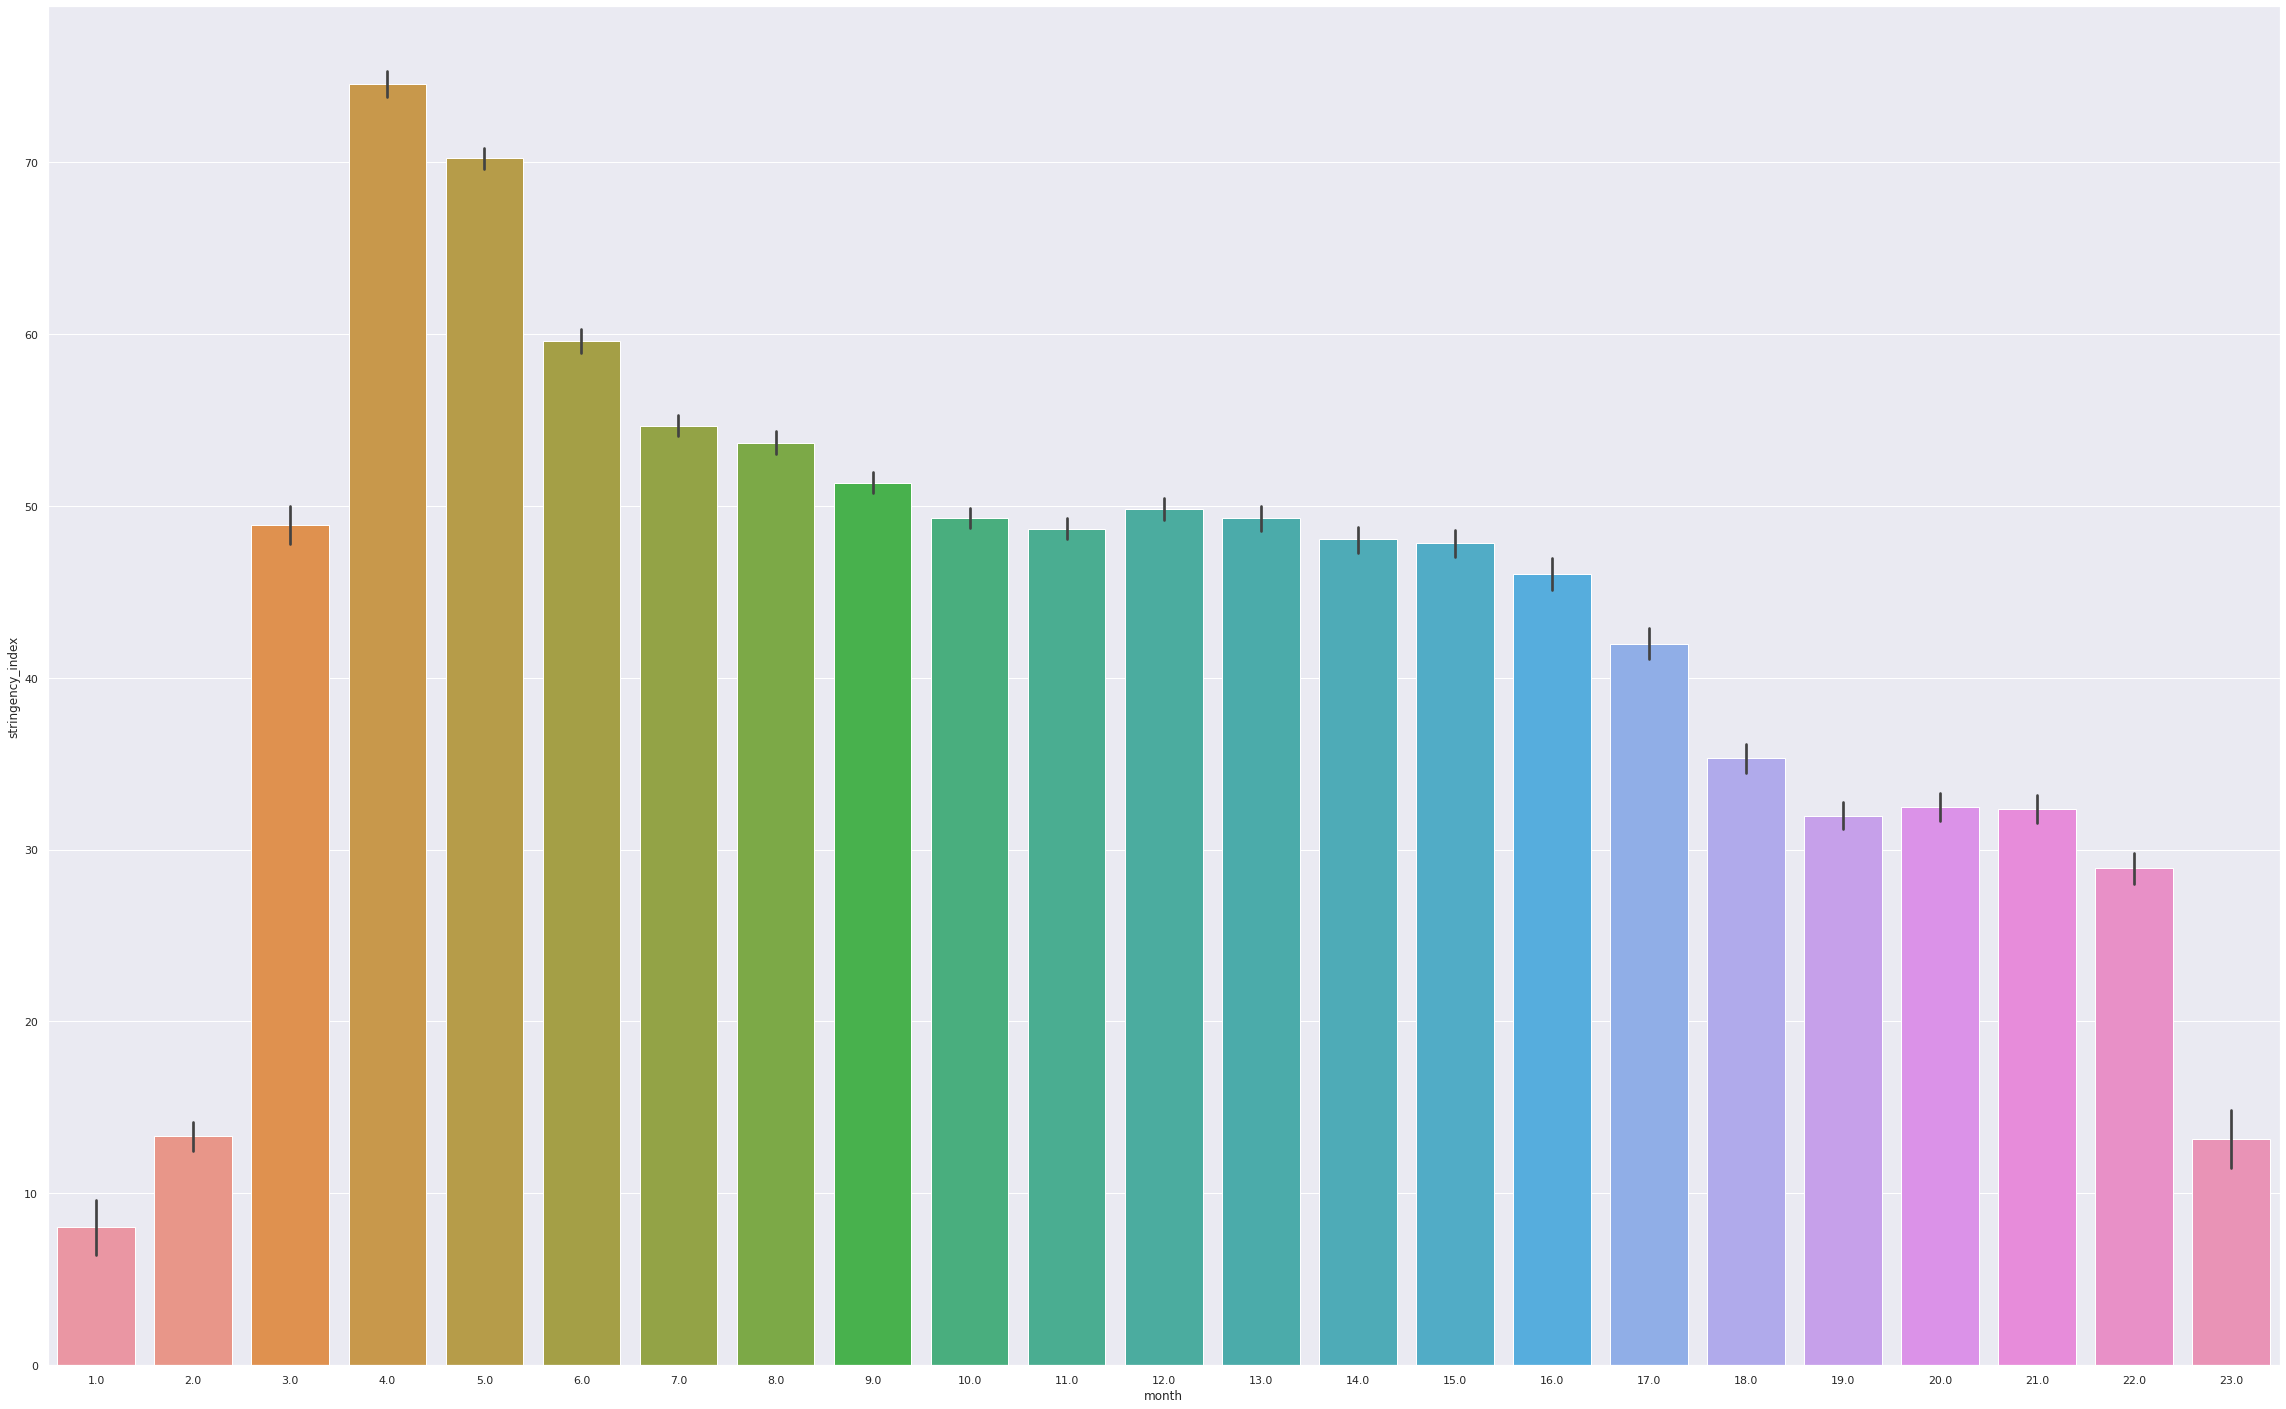

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['month'] , covid1['stringency_index'])

### **Iran**

In [ ]:
temp = covid1['location'] == 'Iran'
ir = covid1[temp]
ir

continent location       date  ...  human_development_index  index  month
index                                ...                                       
36368      Asia     Iran 2020-02-26  ...                    0.783  36368    2.0
36369      Asia     Iran 2020-03-07  ...                    0.783  36369    3.0
36370      Asia     Iran 2020-03-08  ...                    0.783  36370    3.0
36371      Asia     Iran 2020-03-09  ...                    0.783  36371    3.0
36372      Asia     Iran 2020-03-10  ...                    0.783  36372    3.0
...         ...      ...        ...  ...                      ...    ...    ...
36795      Asia     Iran 2021-07-08  ...                    0.783  36795   19.0
36796      Asia     Iran 2021-07-09  ...                    0.783  36796   19.0
36797      Asia     Iran 2021-07-10  ...                    0.783  36797   19.0
36798      Asia     Iran 2021-07-11  ...                    0.783  36798   19.0
36799      Asia     Iran 2021-07-12  ...                    0.783  36799   19.0

[432 rows x 56 columns]

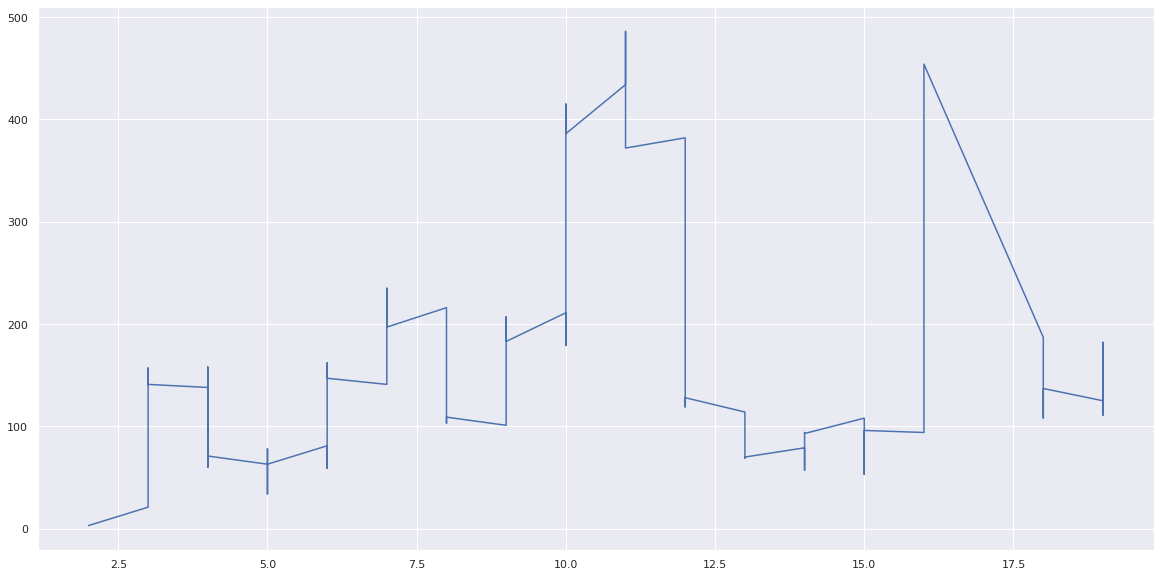

In [86]:

plt.figure(figsize=(20,10))

plt.plot(ir['month'] , ir['new_deaths'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


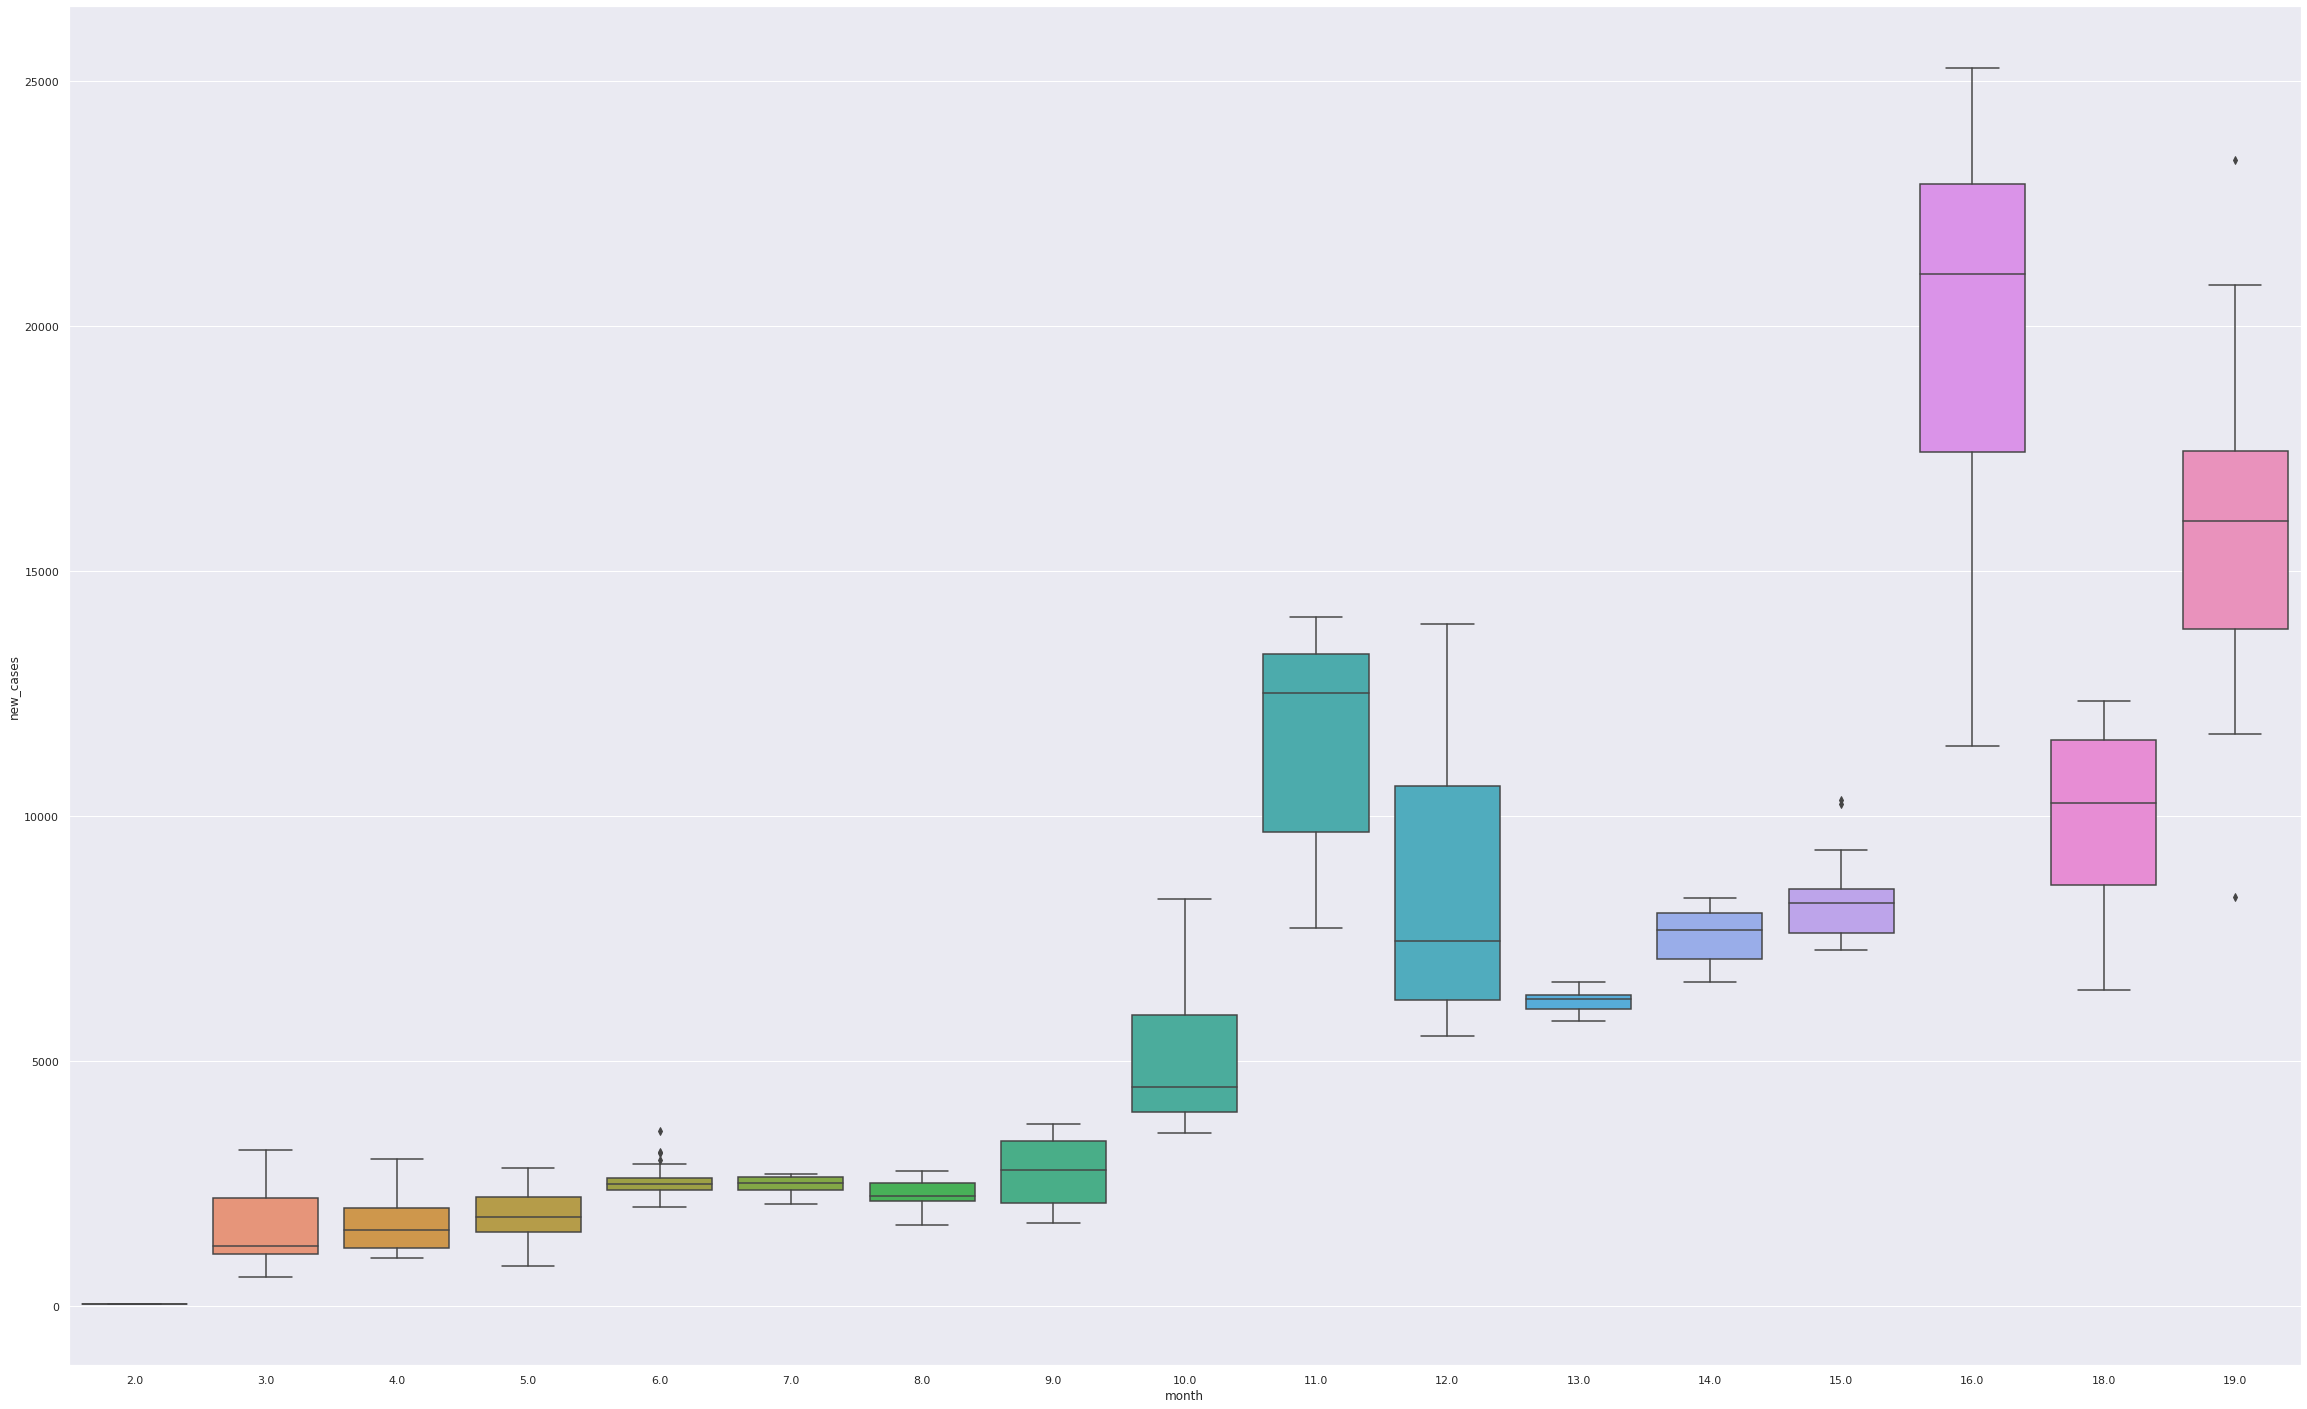

In [ ]:

plt.figure(figsize=(40,25))

sns.boxplot(ir['month'] , ir['new_cases'])

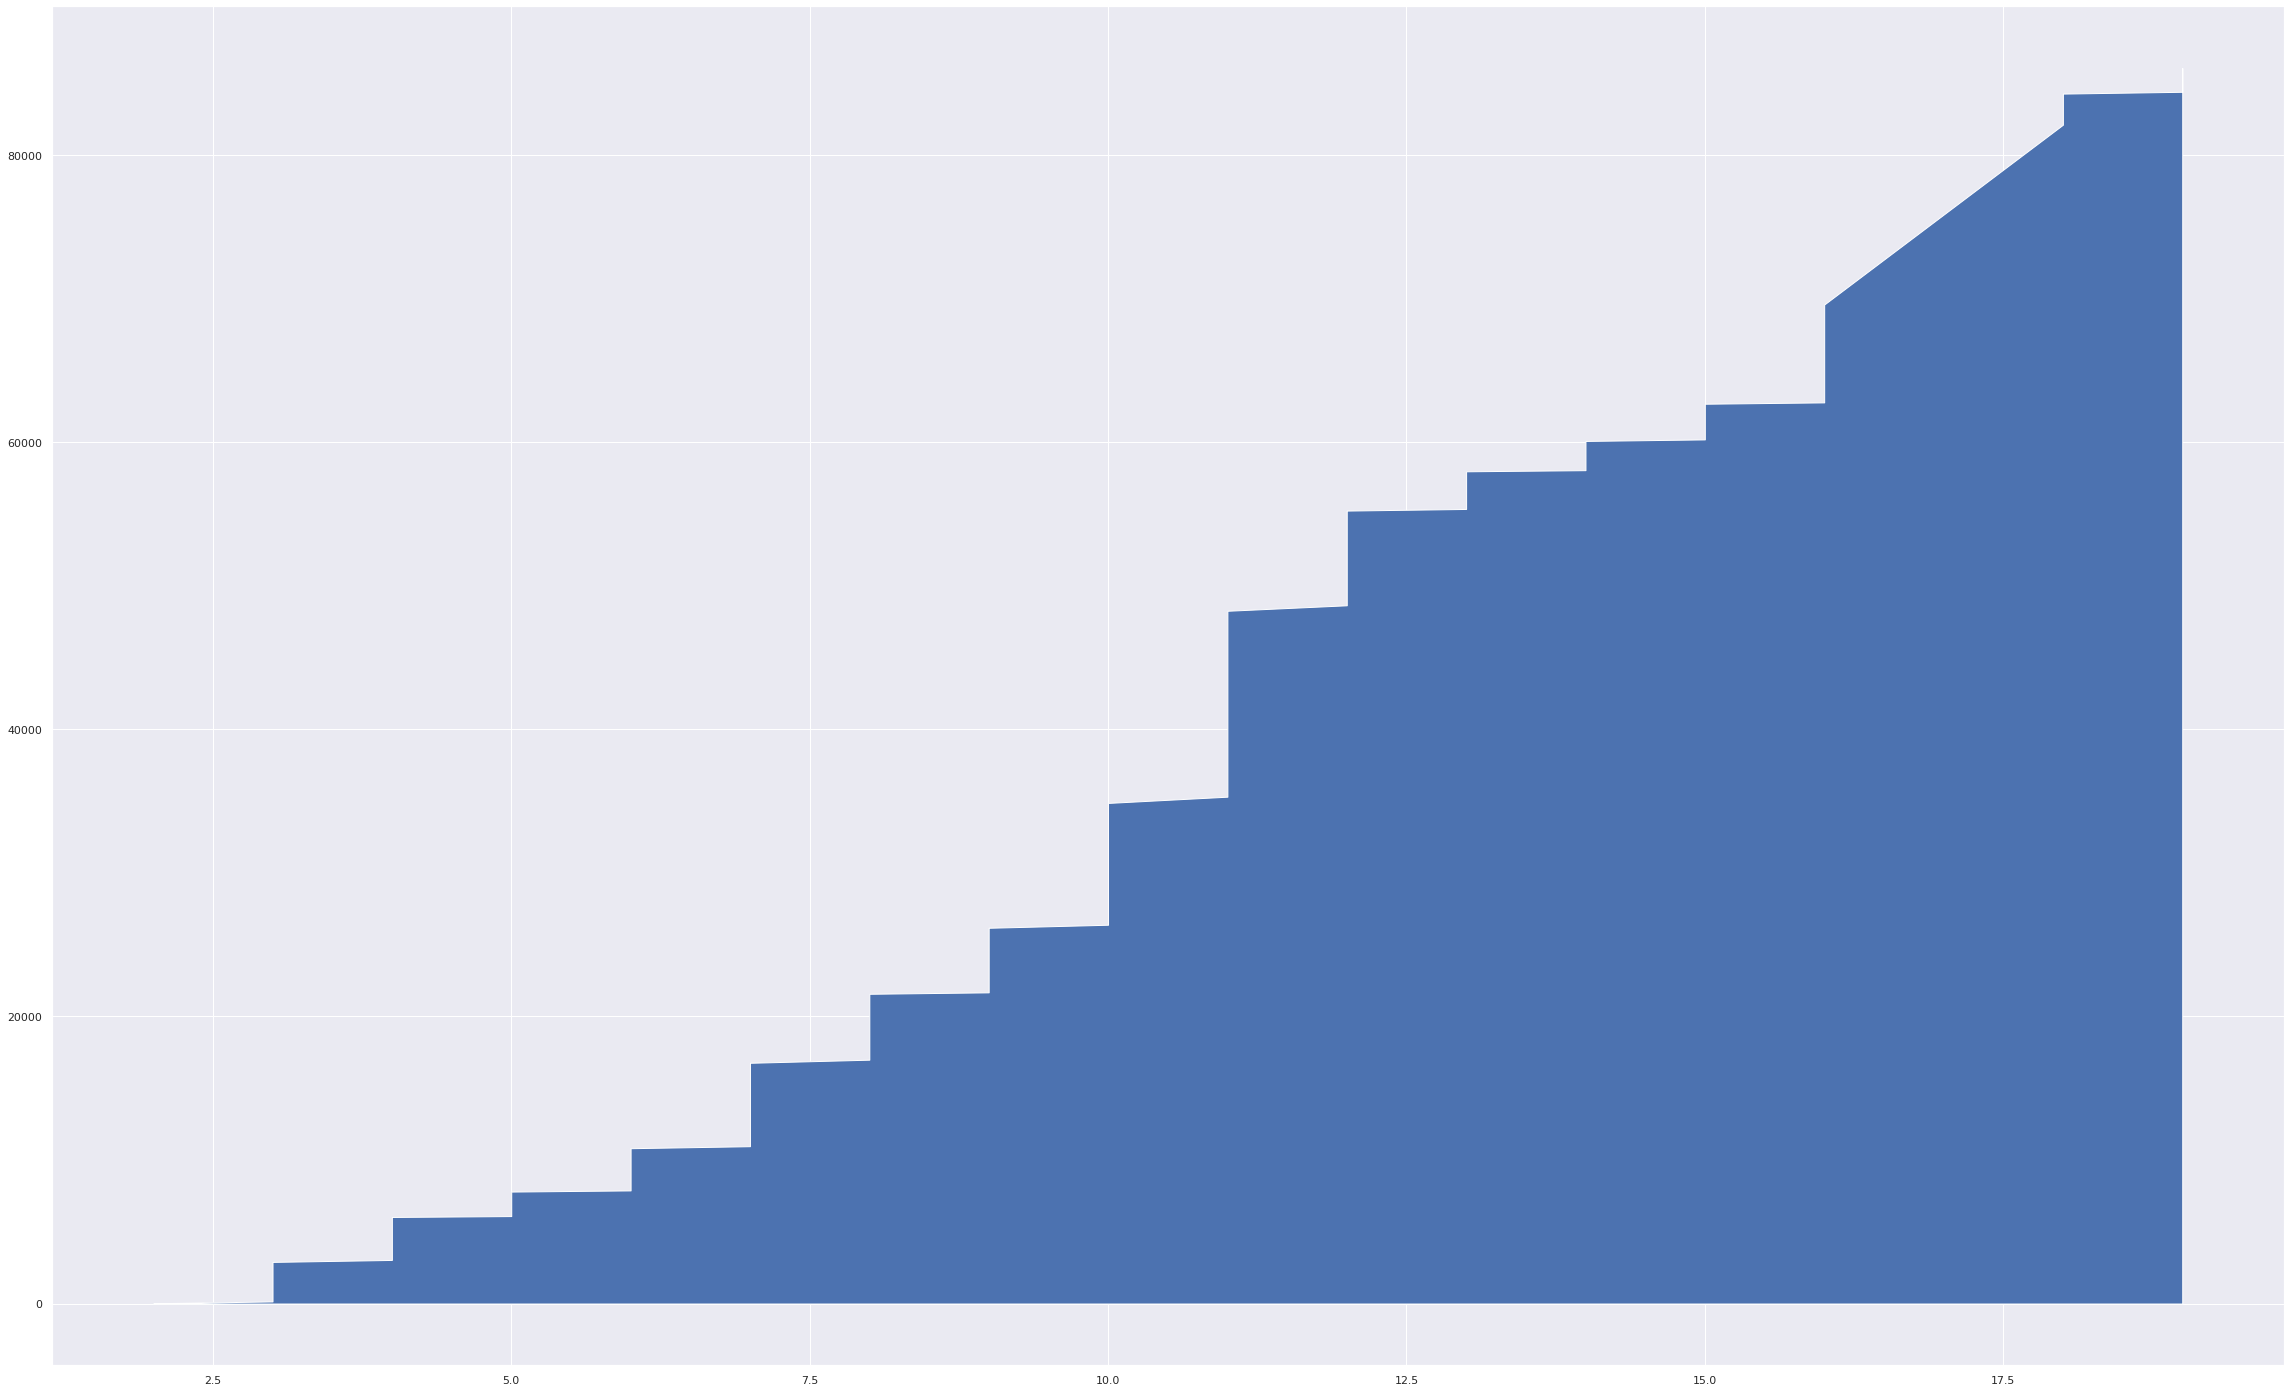

In [ ]:
plt.figure(figsize=(40,25))

plt.fill_between(ir['month'] , ir['total_deaths'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


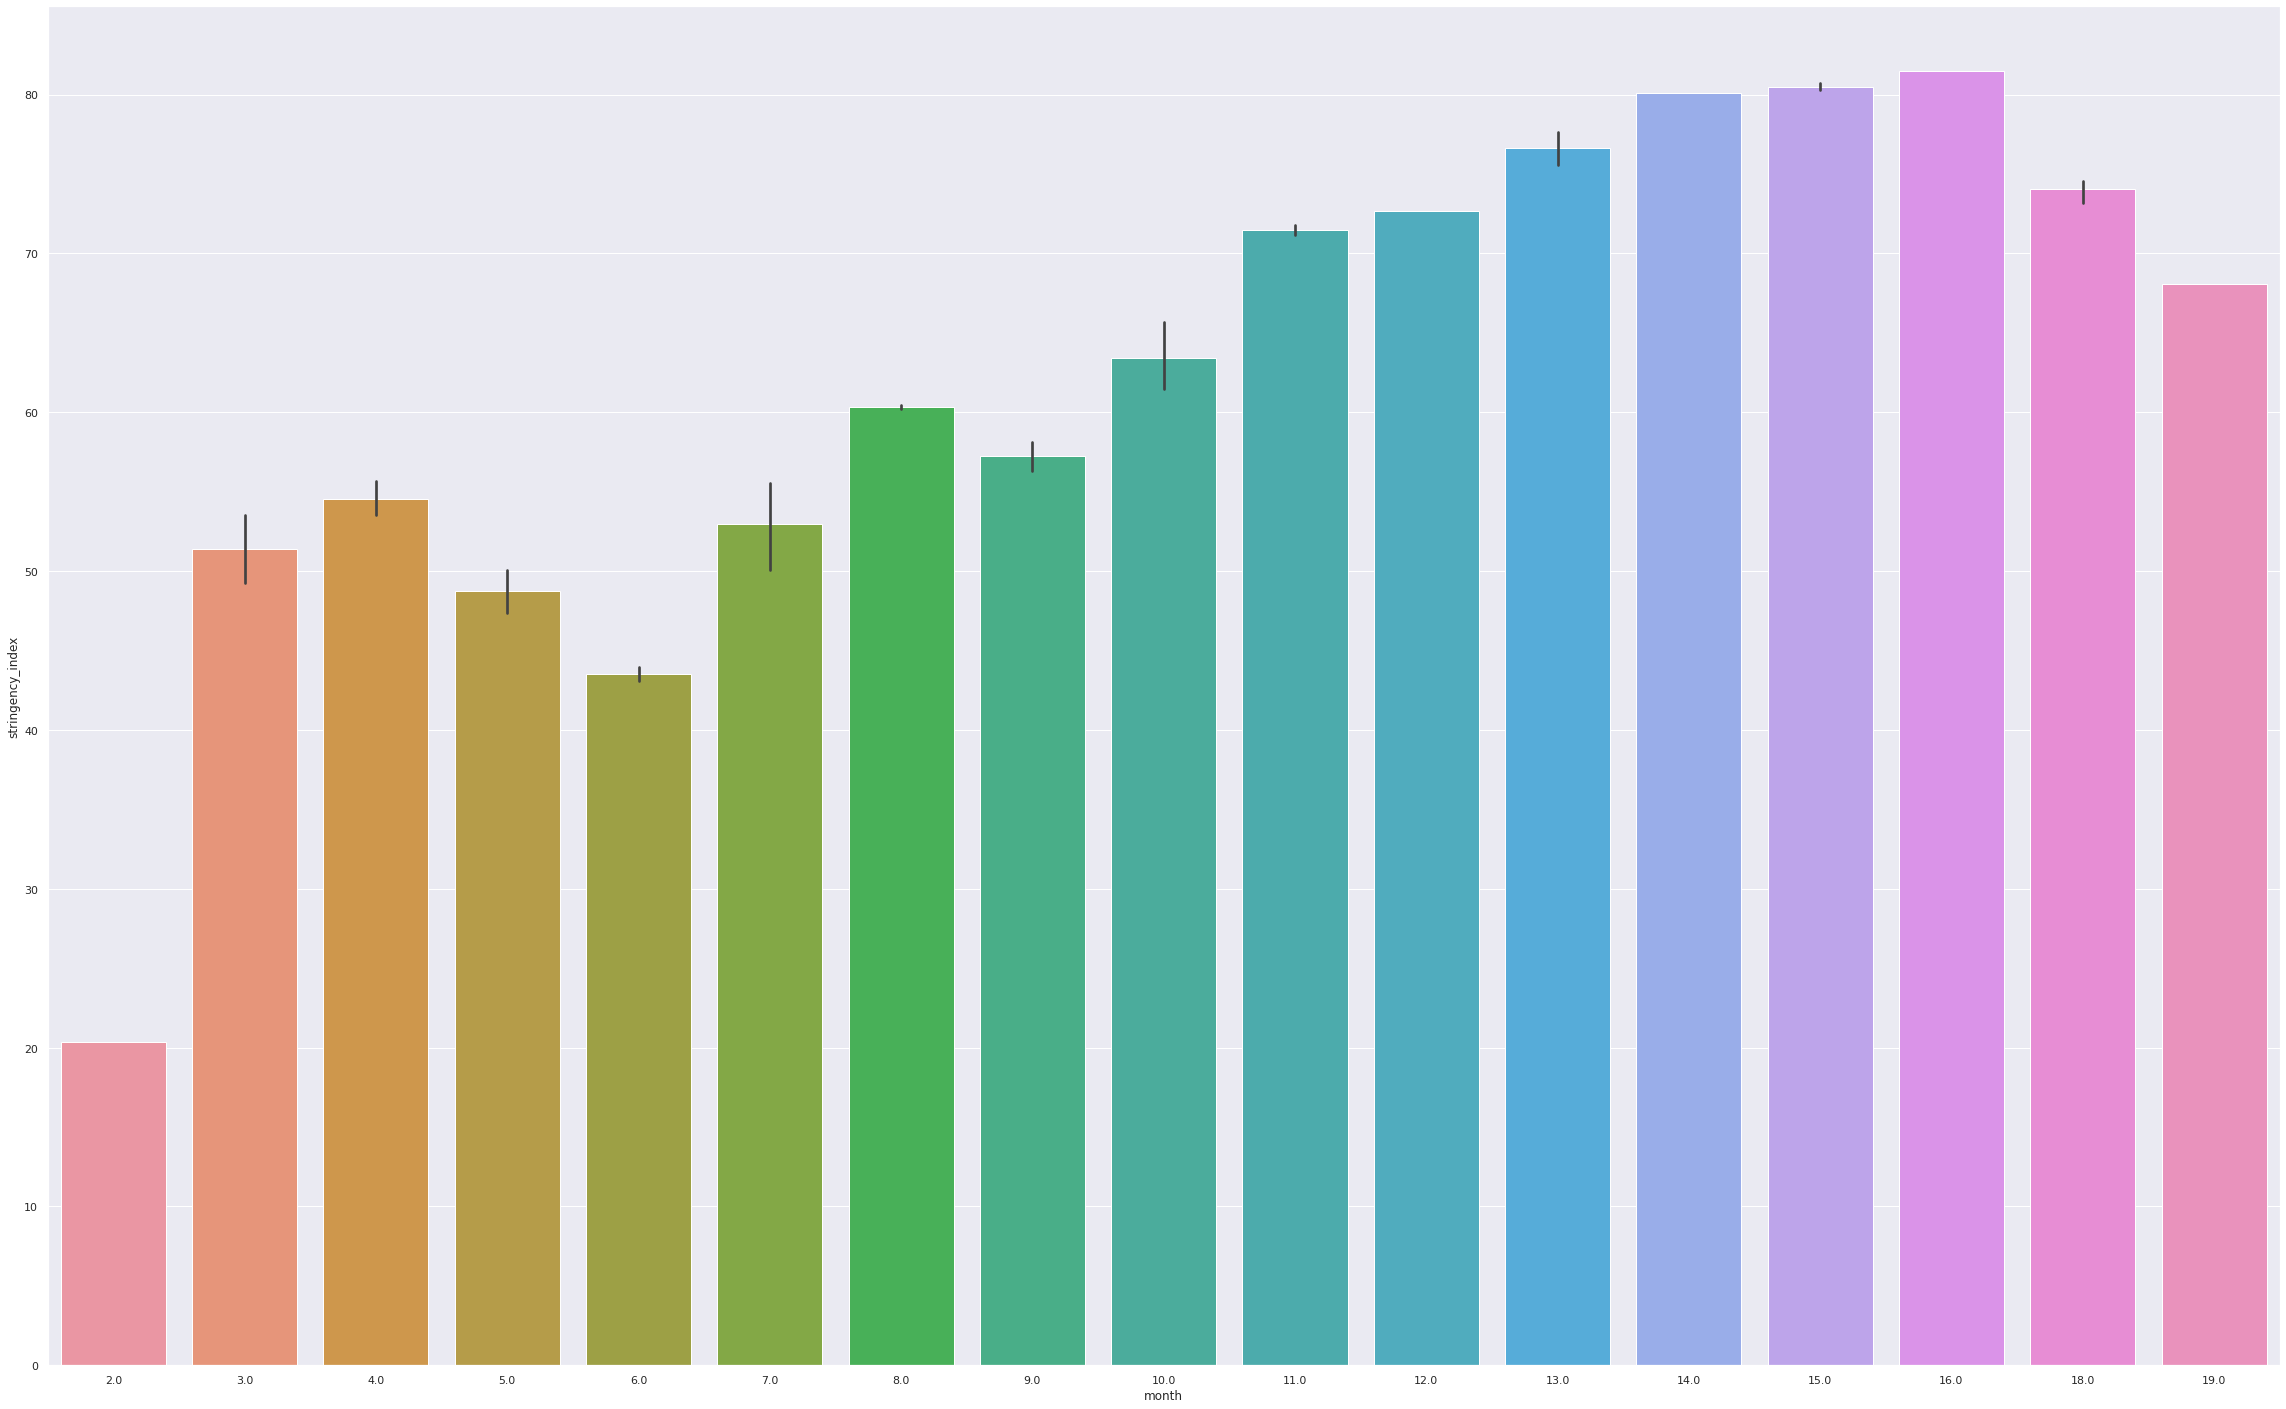

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(ir['month'] , ir['stringency_index'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


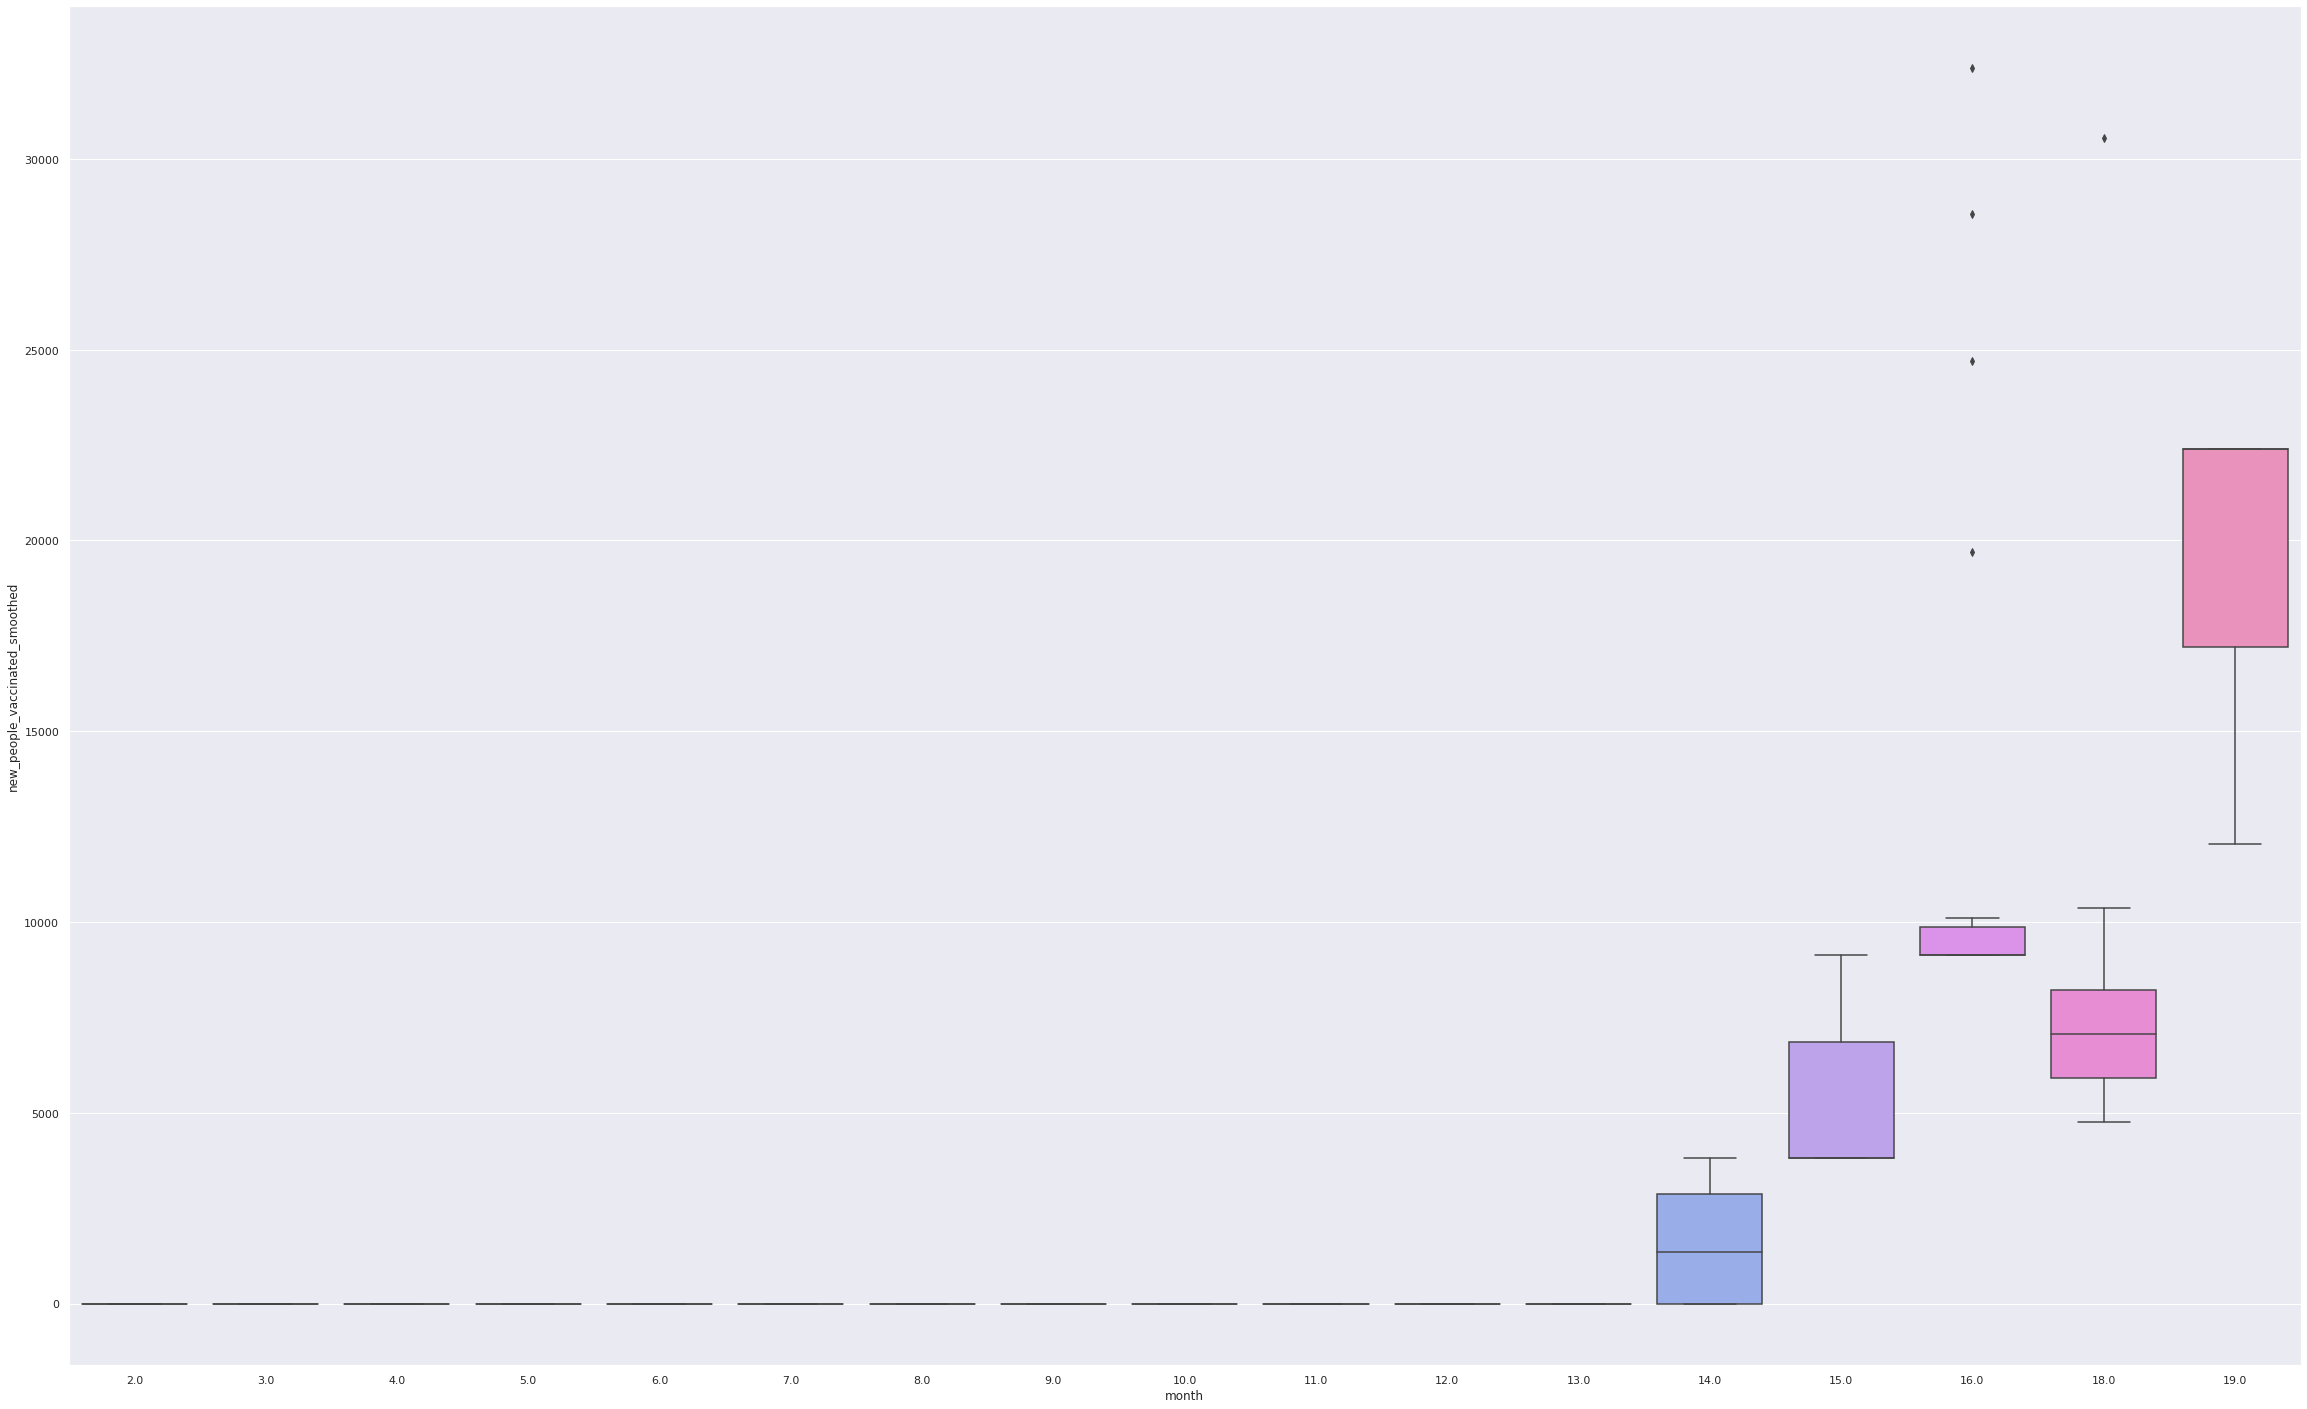

In [ ]:
plt.figure(figsize=(40,25))

sns.boxplot(ir['month'] , ir['new_people_vaccinated_smoothed'])

# **Continent**

## **cases and deaths**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


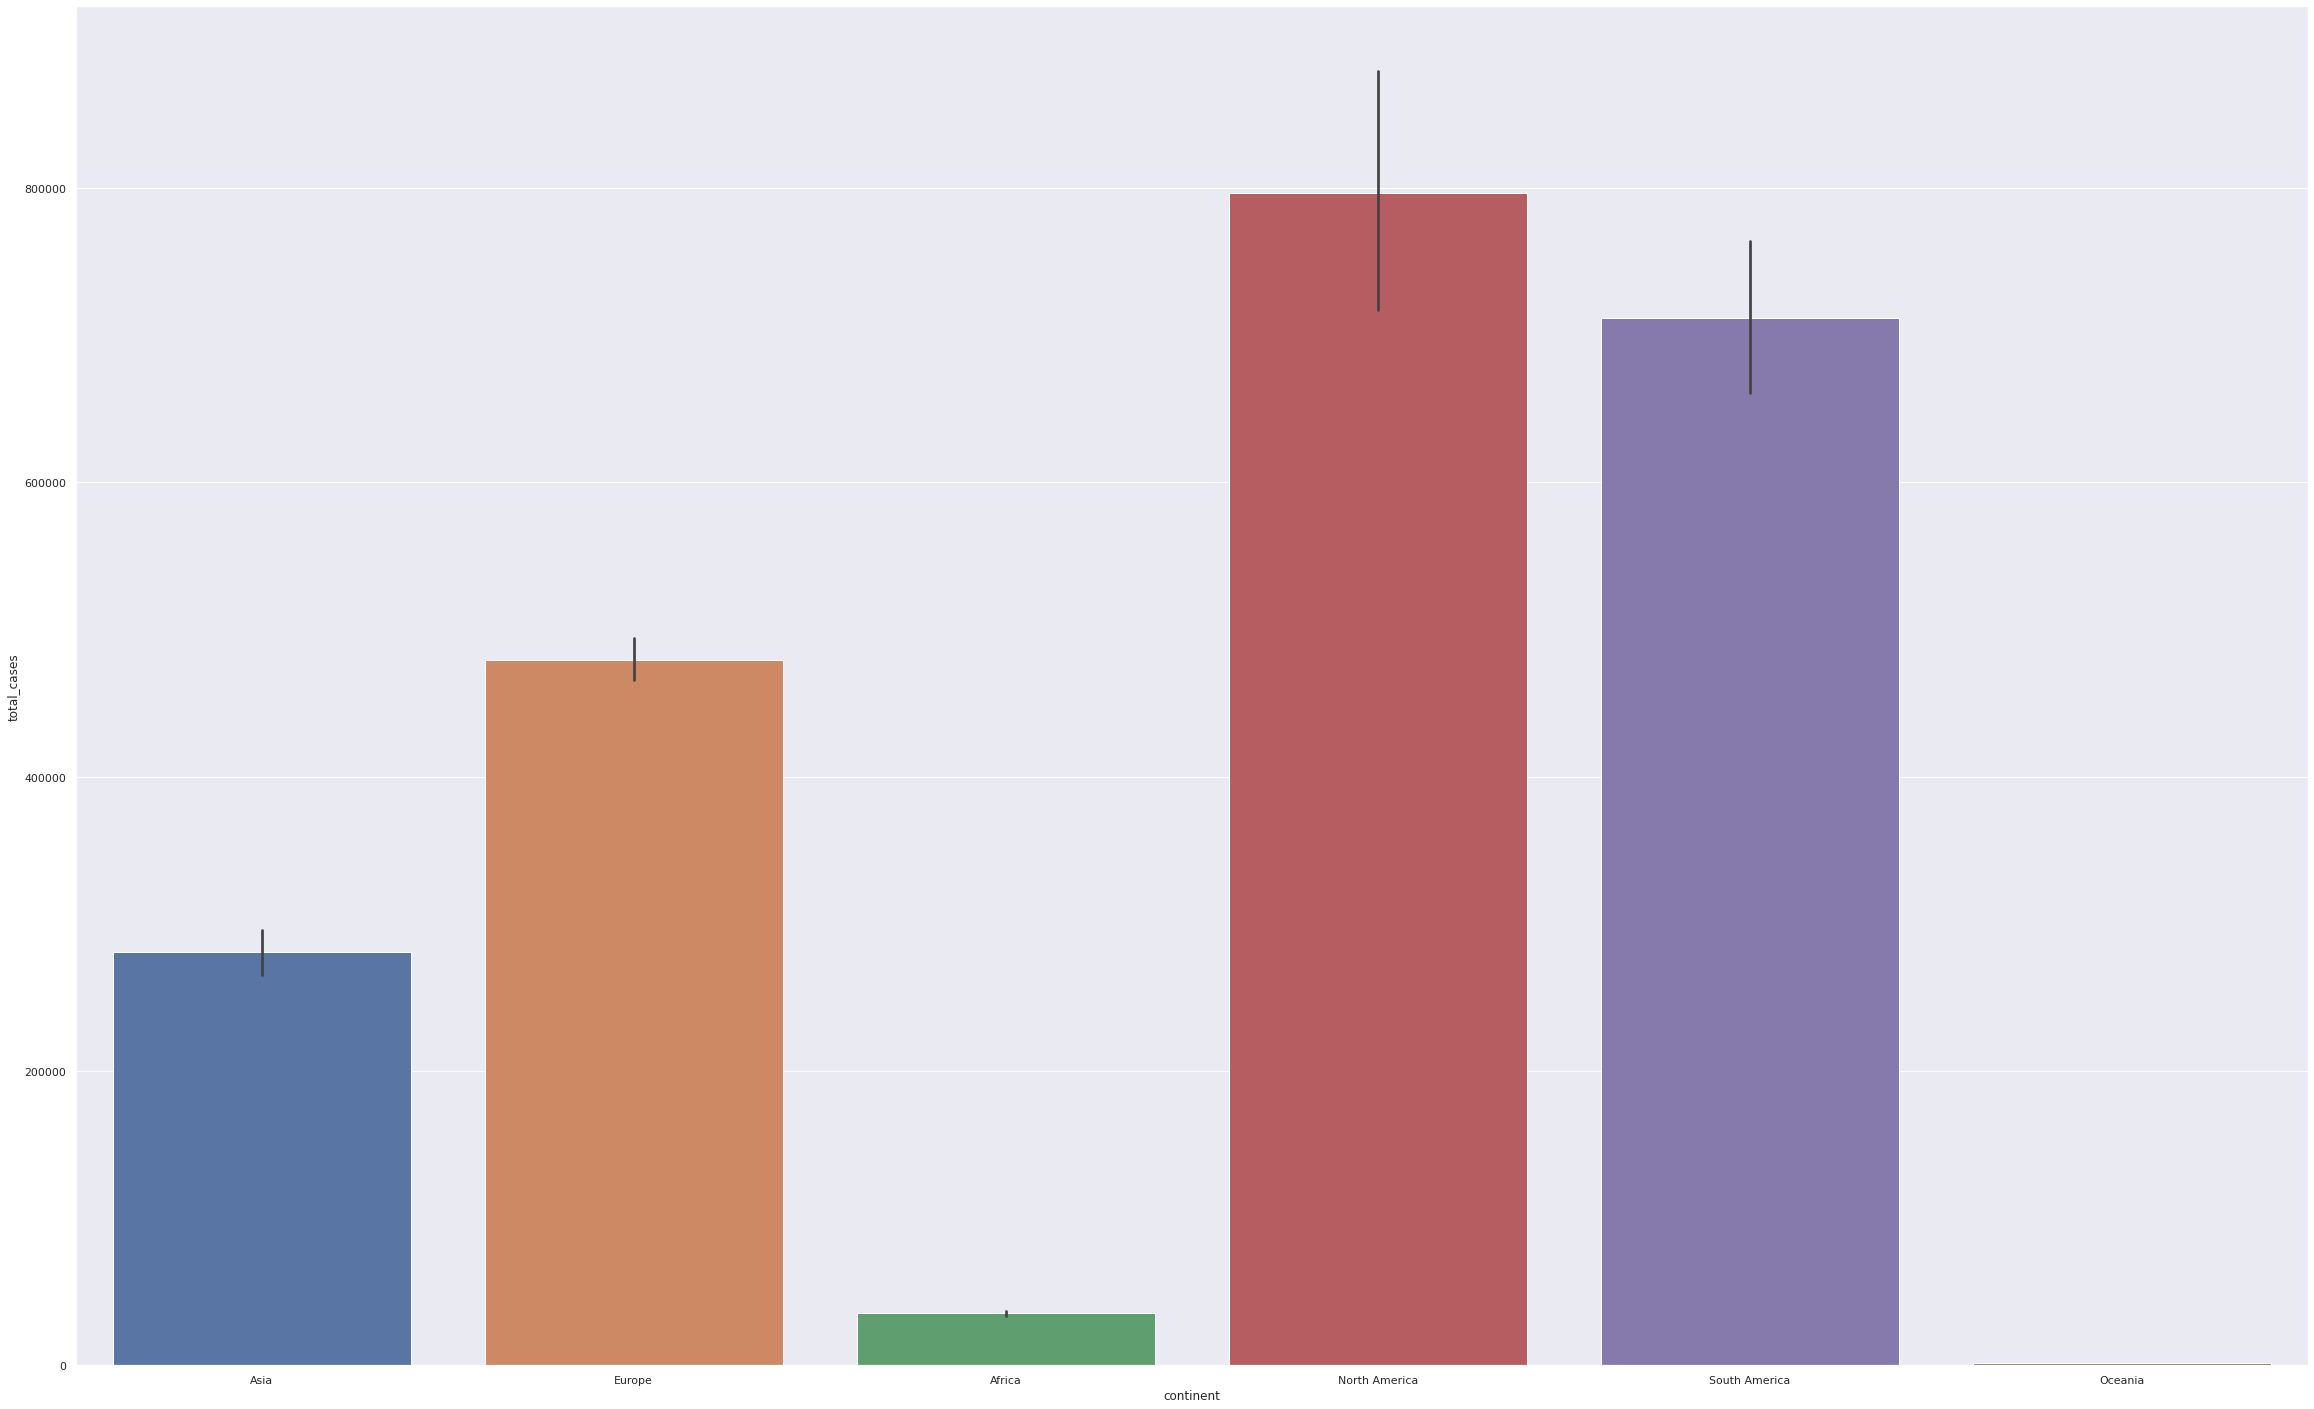

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['continent'] , covid1['total_cases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


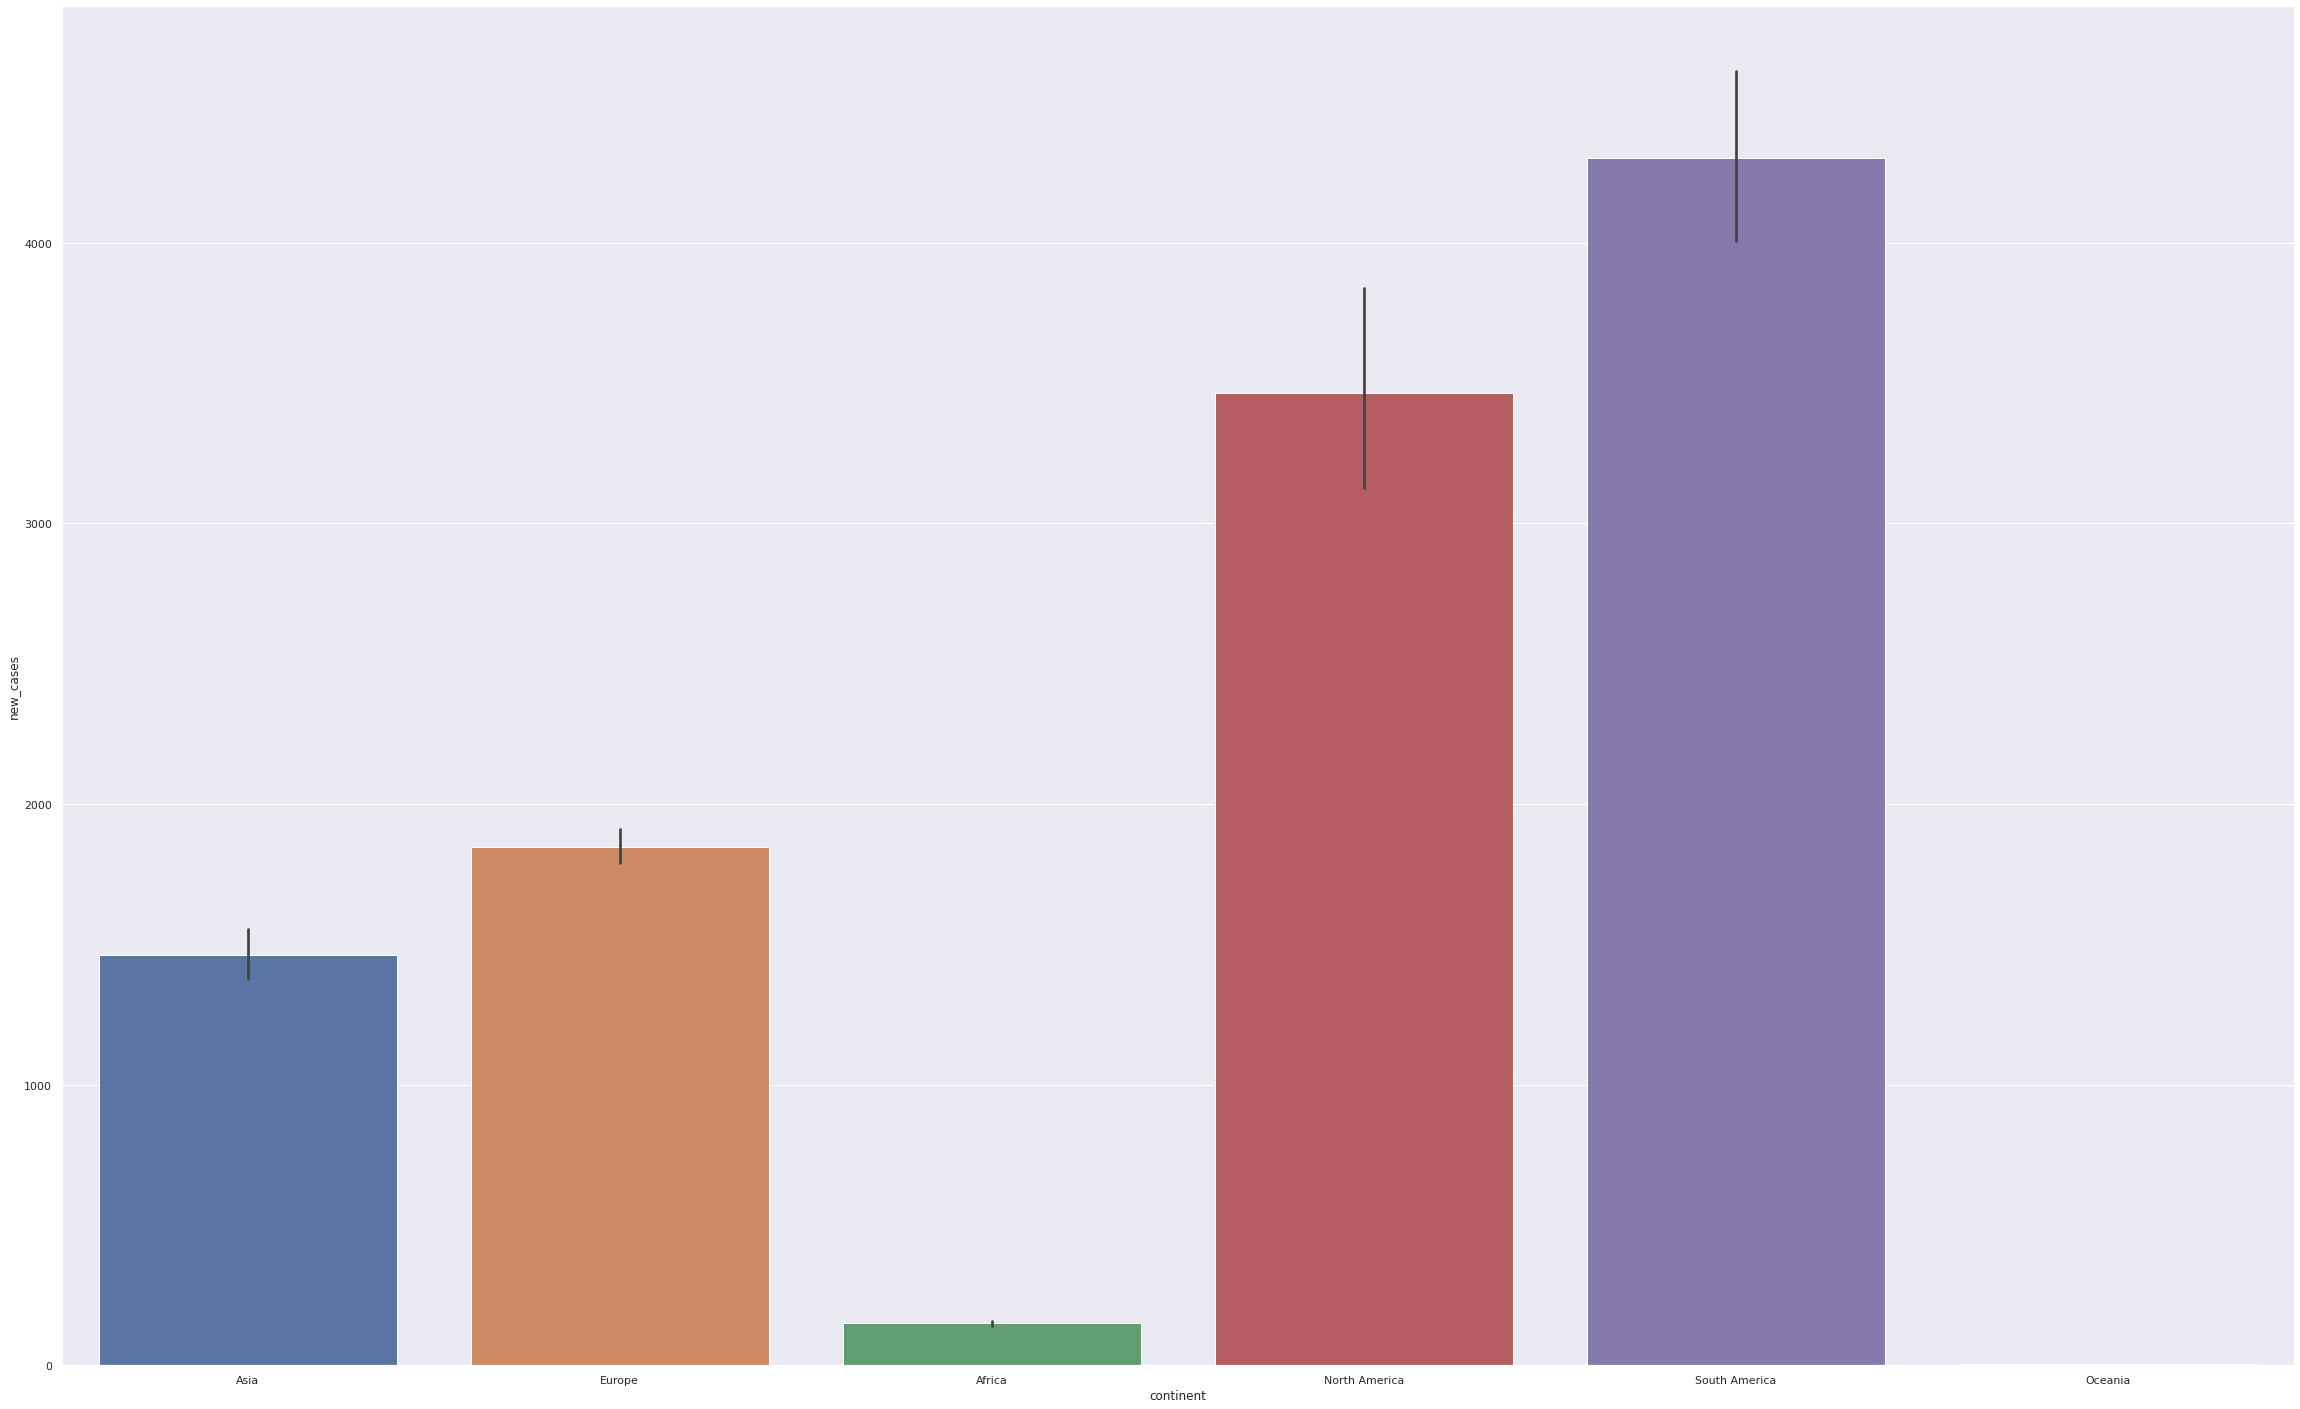

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['continent'] , covid1['new_cases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


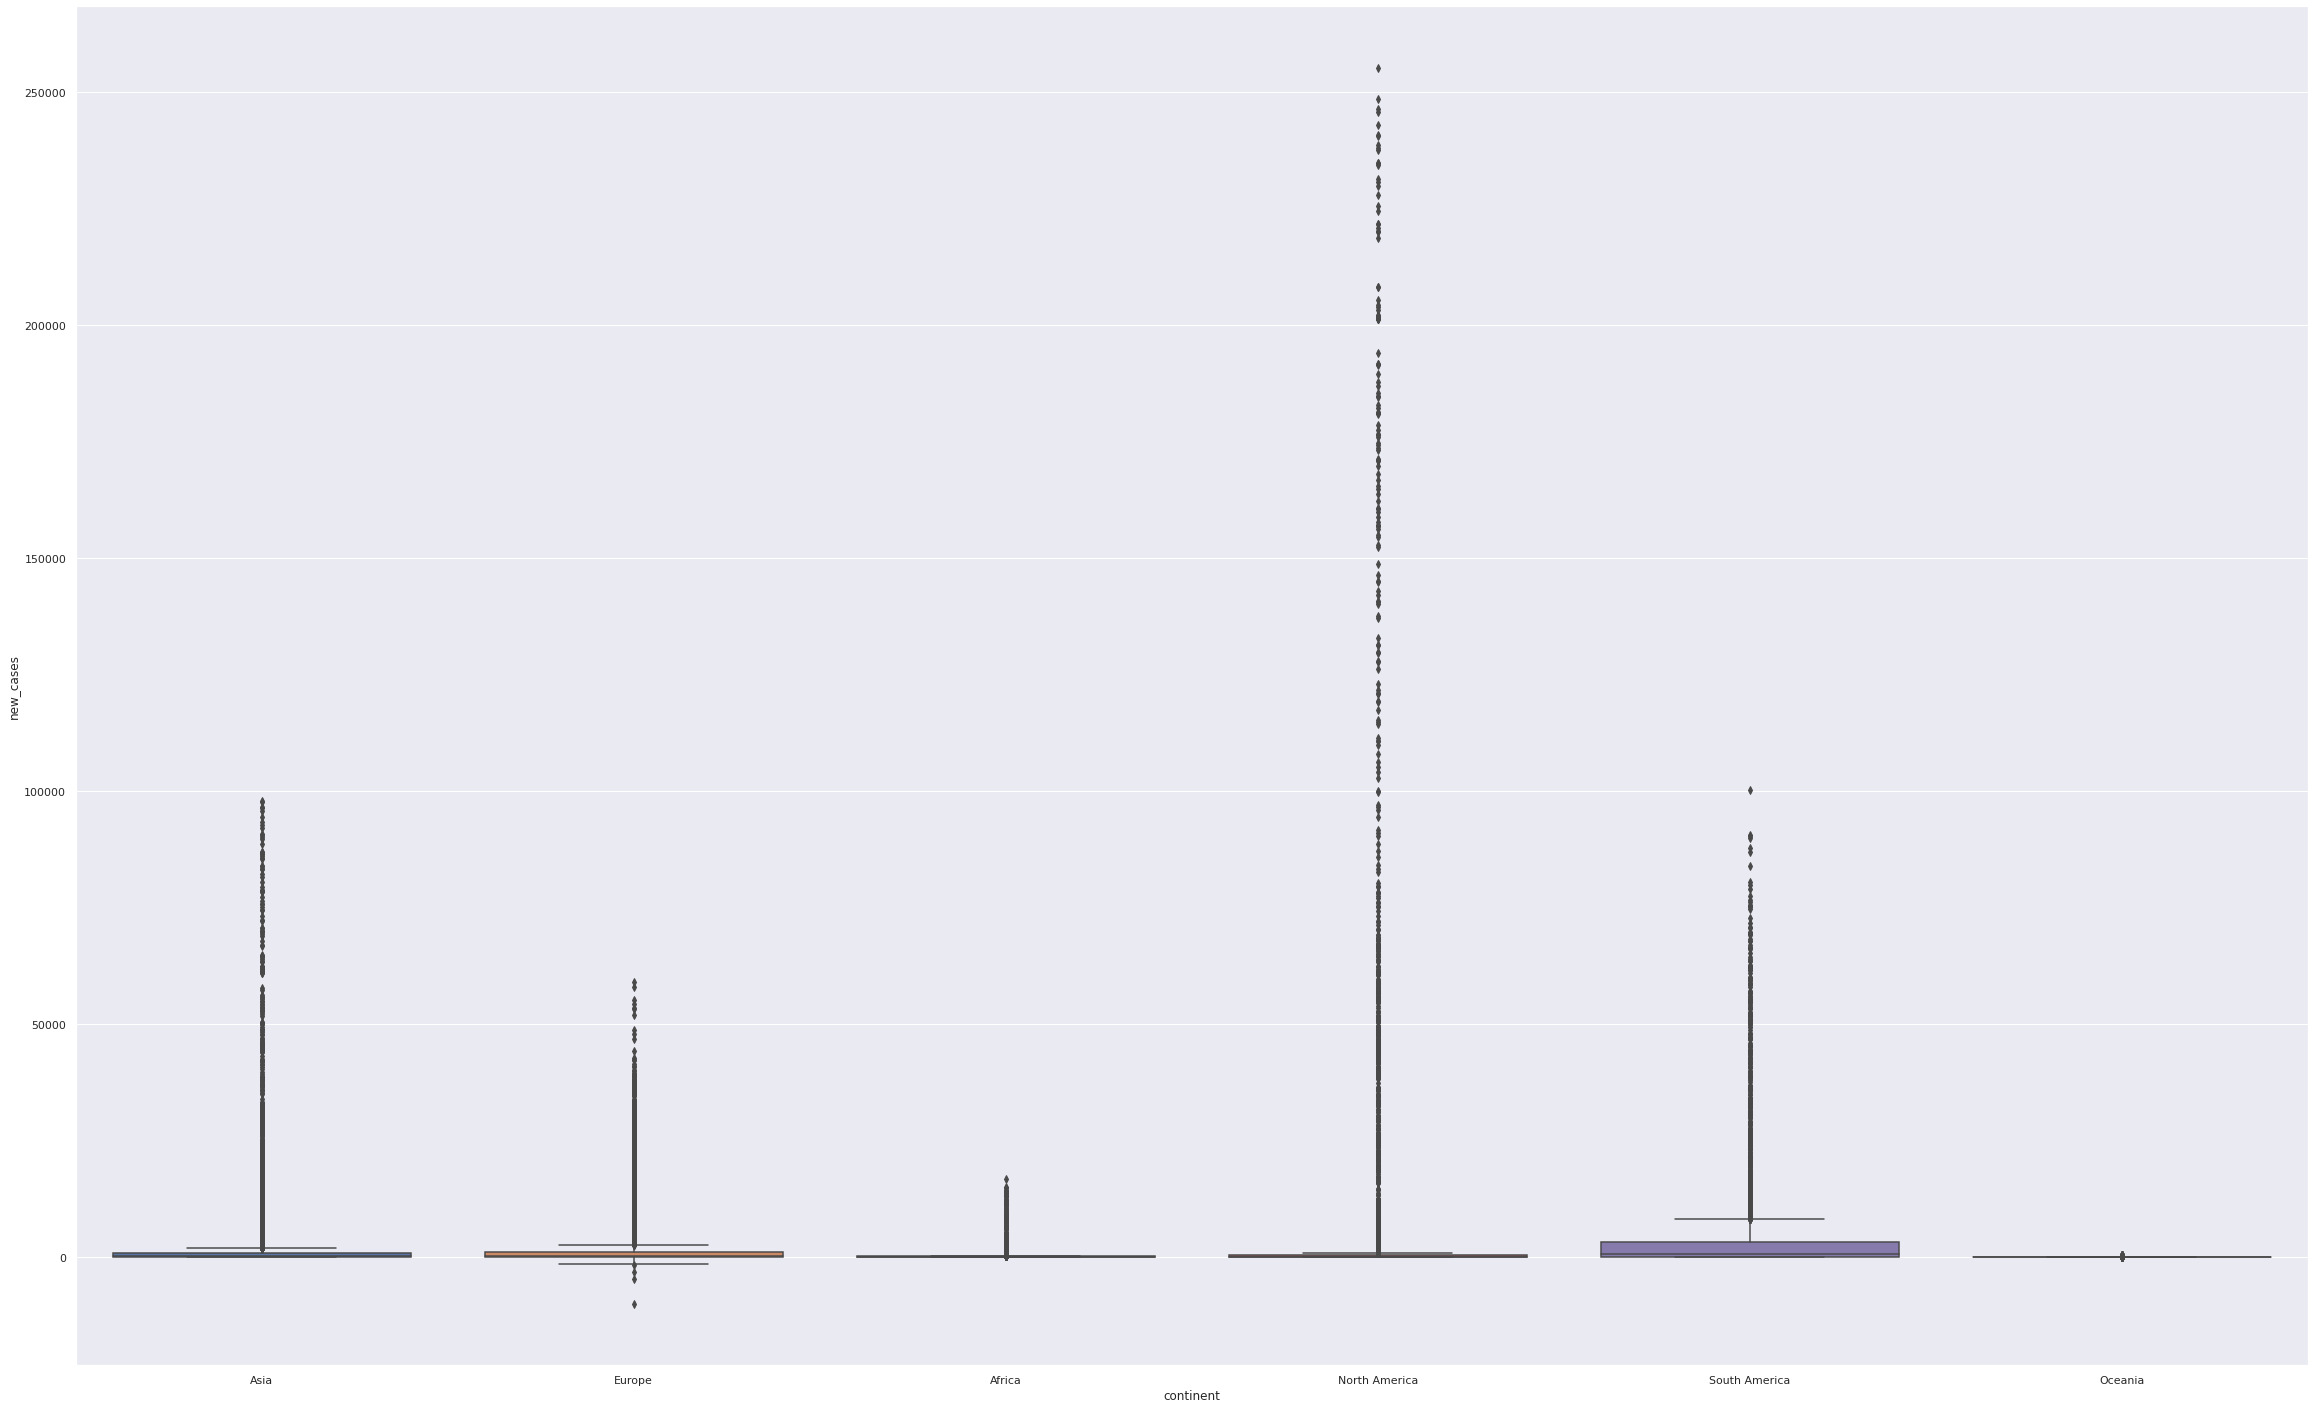

In [ ]:
plt.figure(figsize=(40,25))

sns.boxplot(covid1['continent'] , covid1['new_cases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


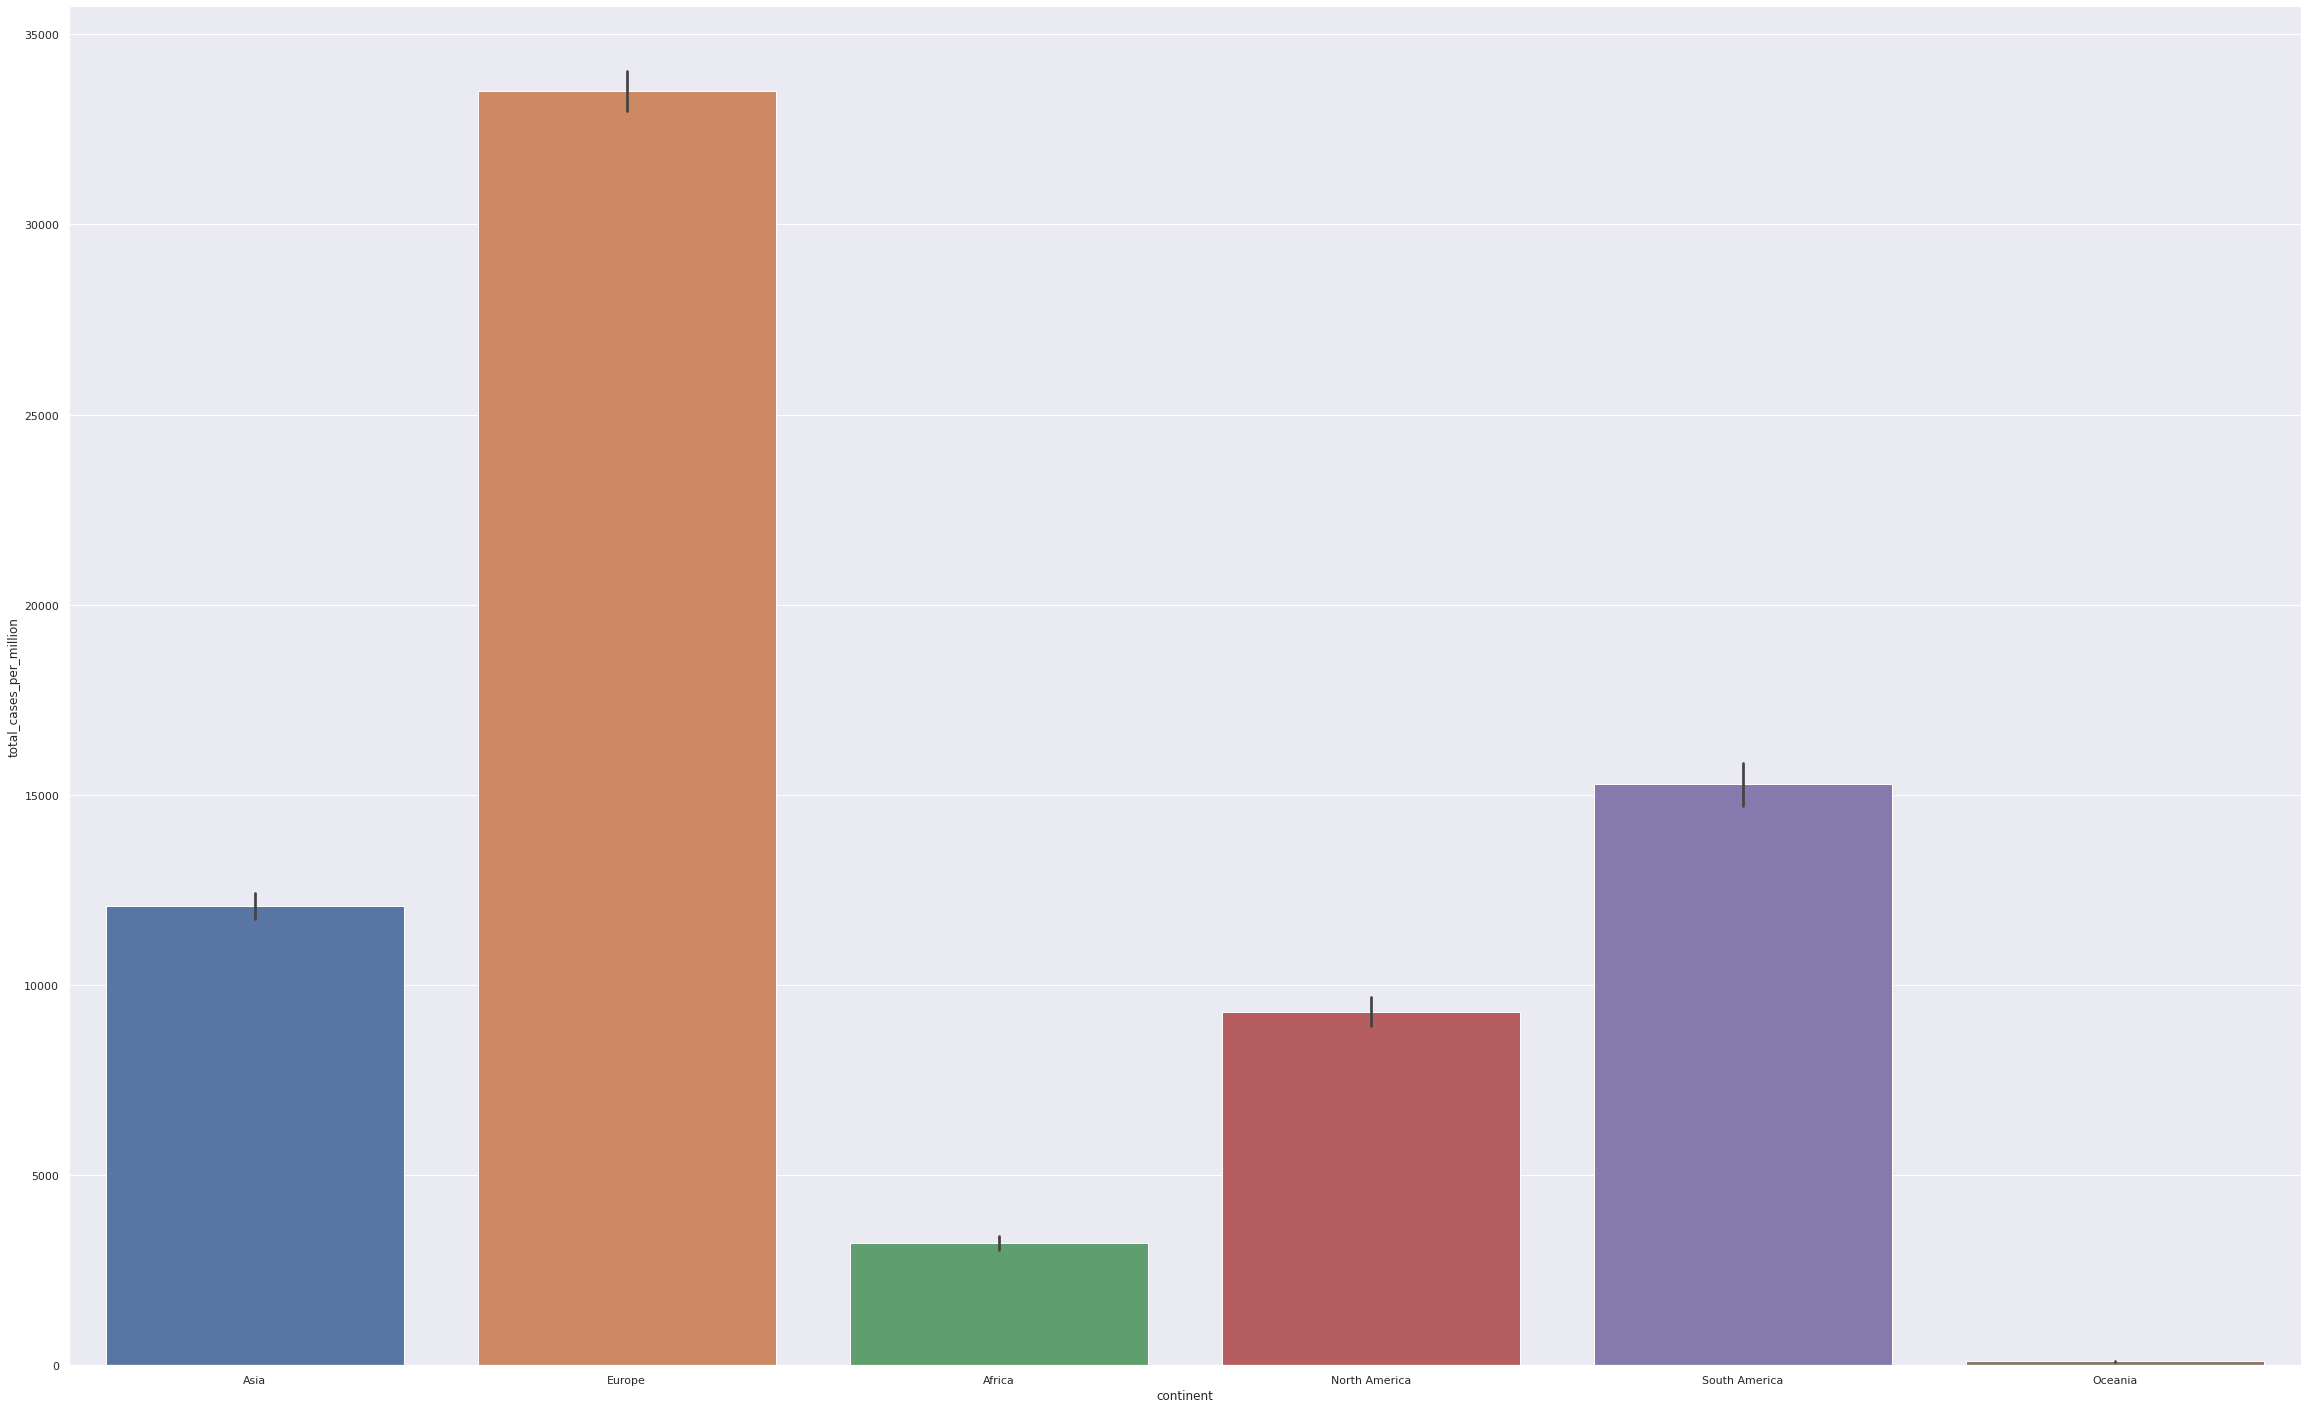

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['continent'] , covid1['total_cases_per_million'])

## **stringency_index**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


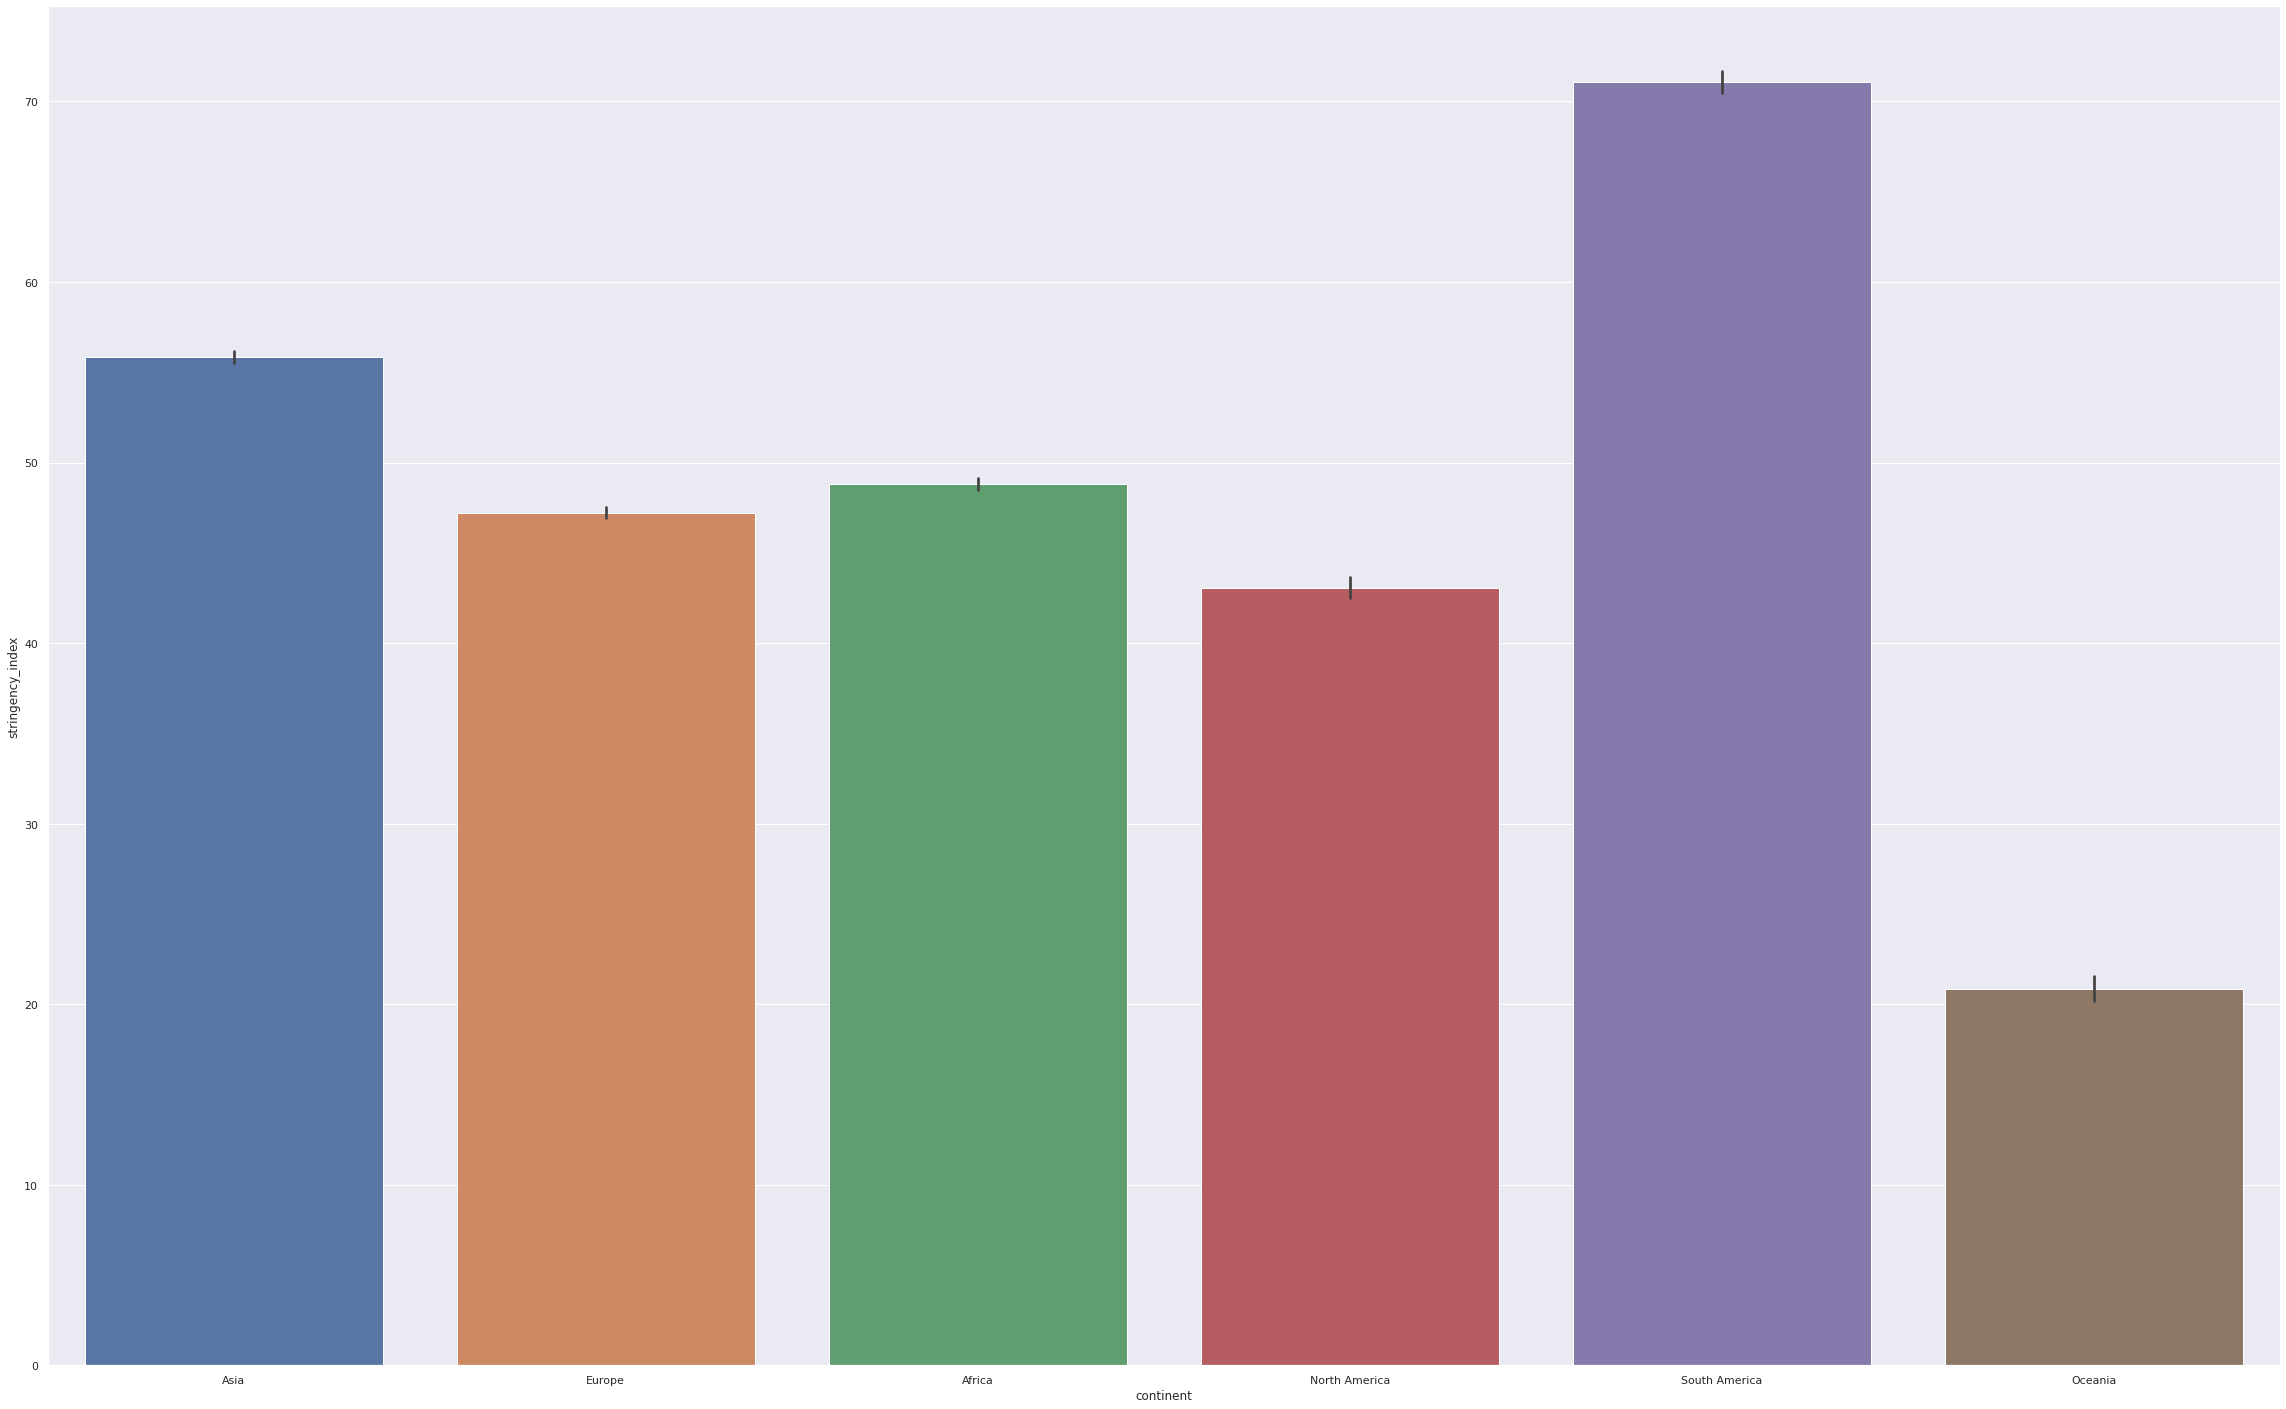

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['continent'] , covid1['stringency_index'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2880x1800 with 0 Axes>

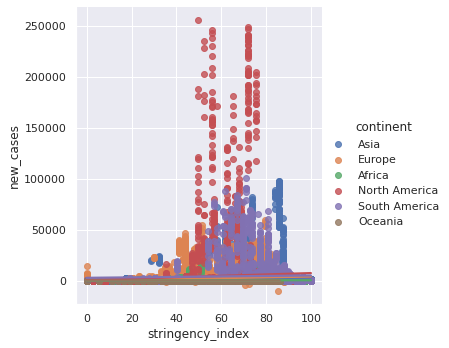

In [ ]:
plt.figure(figsize=(40,25))

sns.lmplot('stringency_index' , 'new_cases' , data = covid1 , hue='continent')

## **gdp_per_capita**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


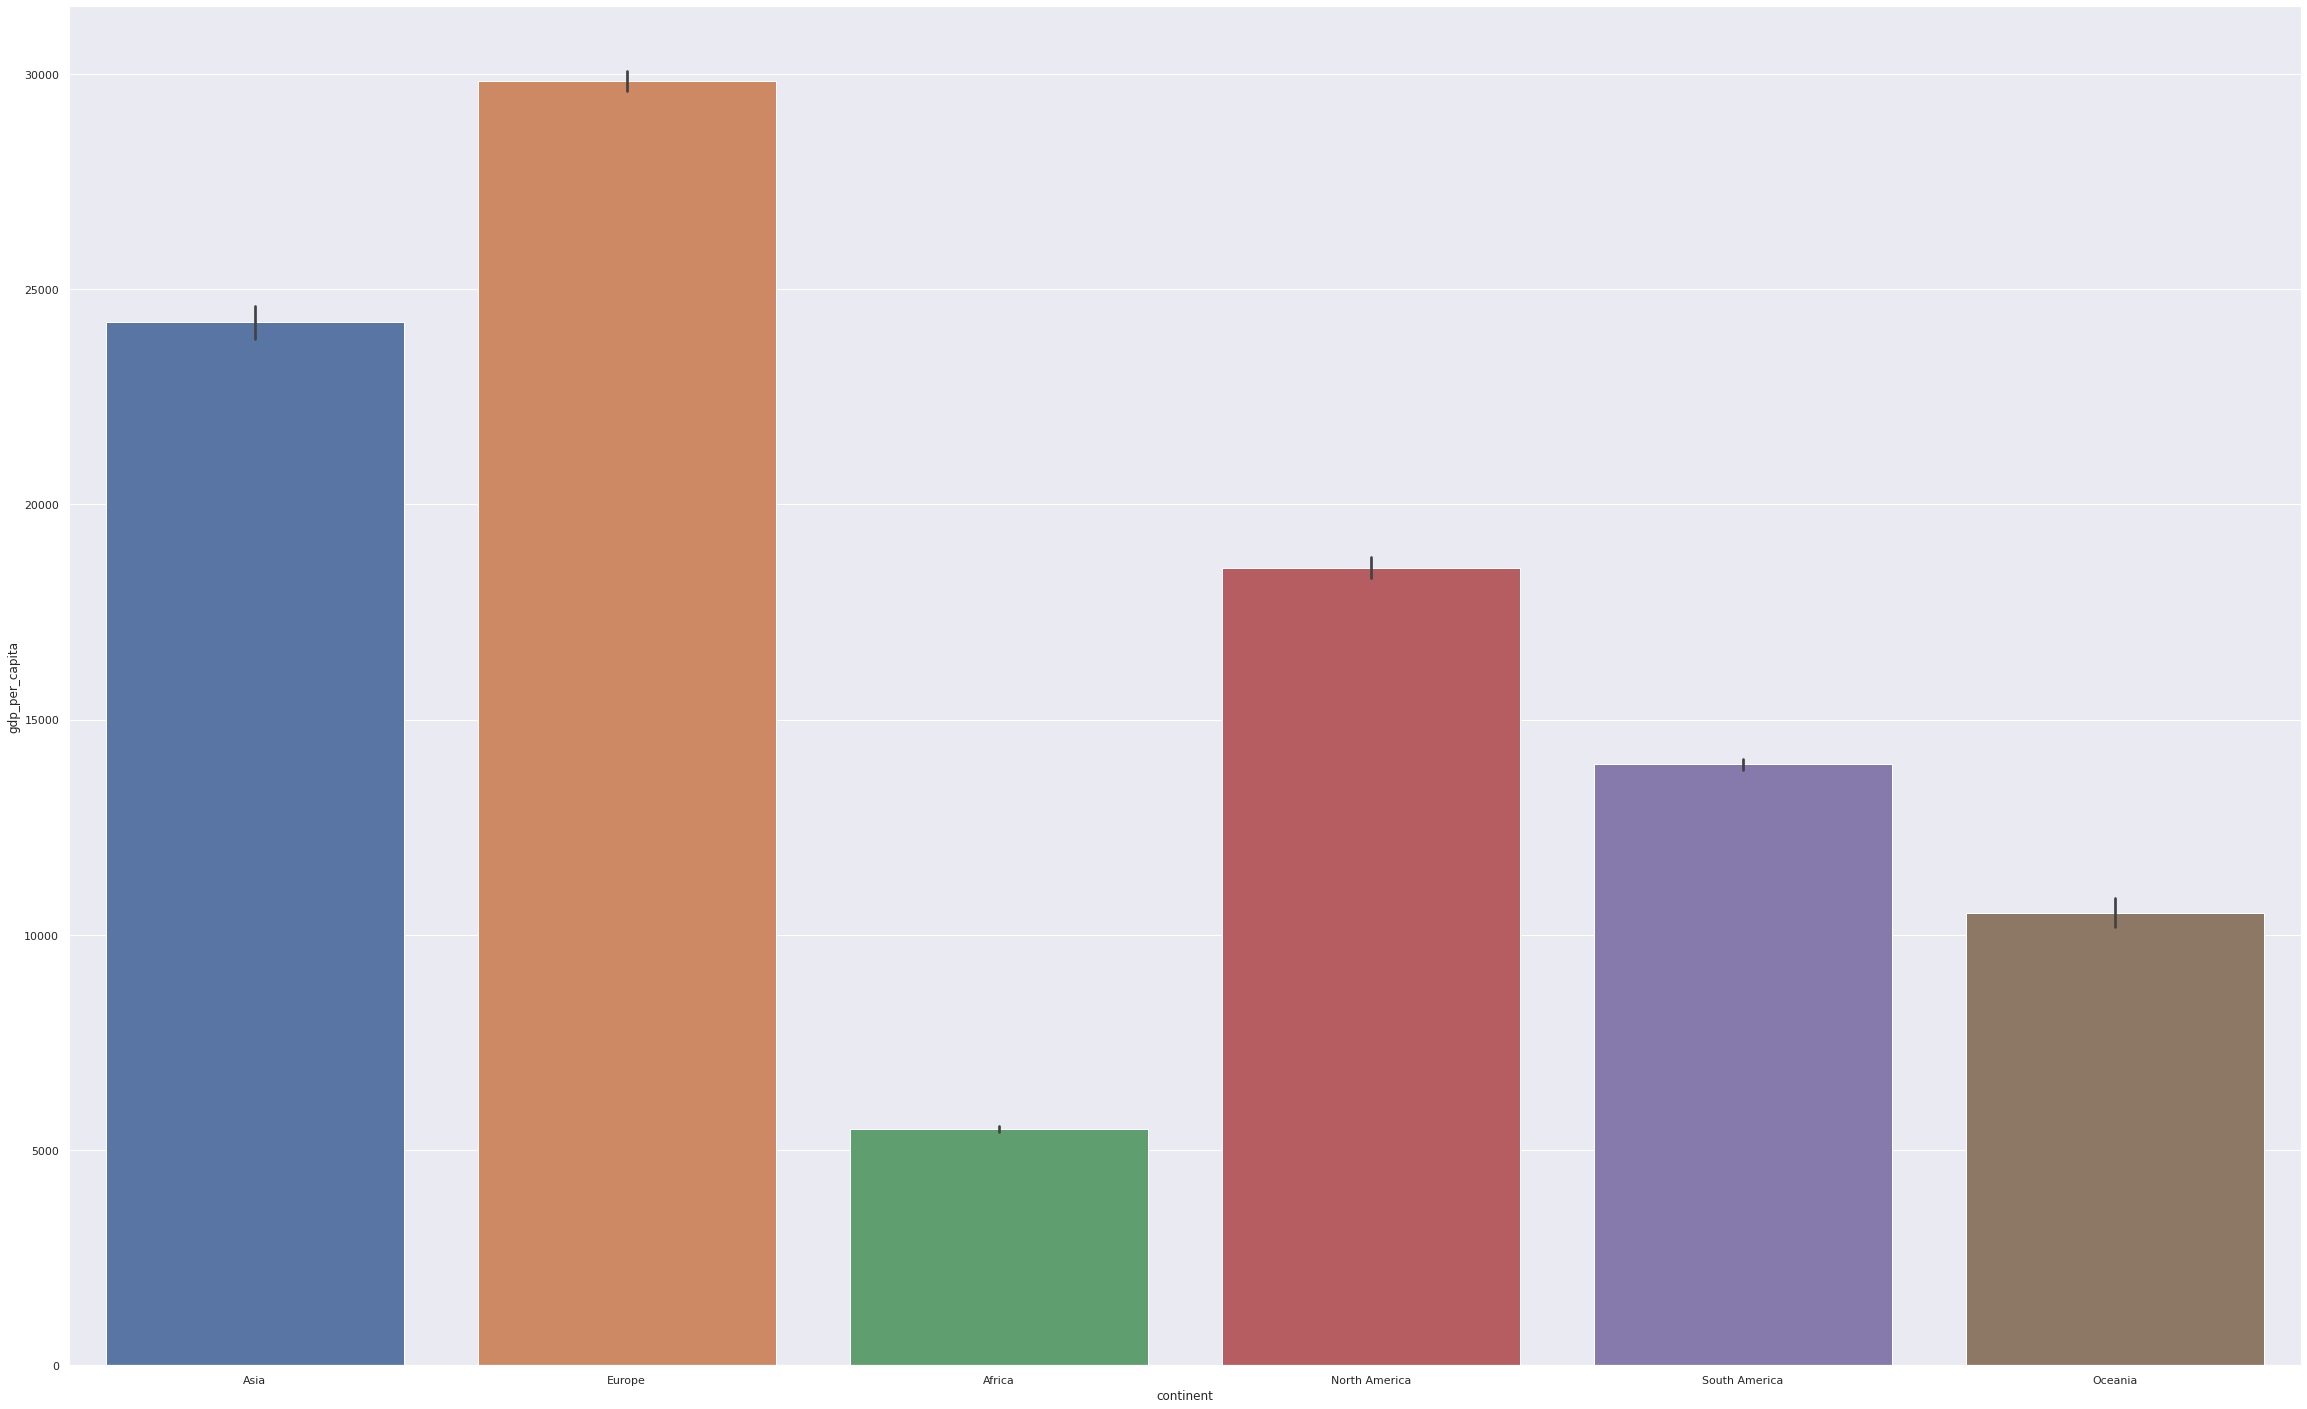

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['continent'] , covid1['gdp_per_capita'])

## **new_vaccinations_smoothed_per_million**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


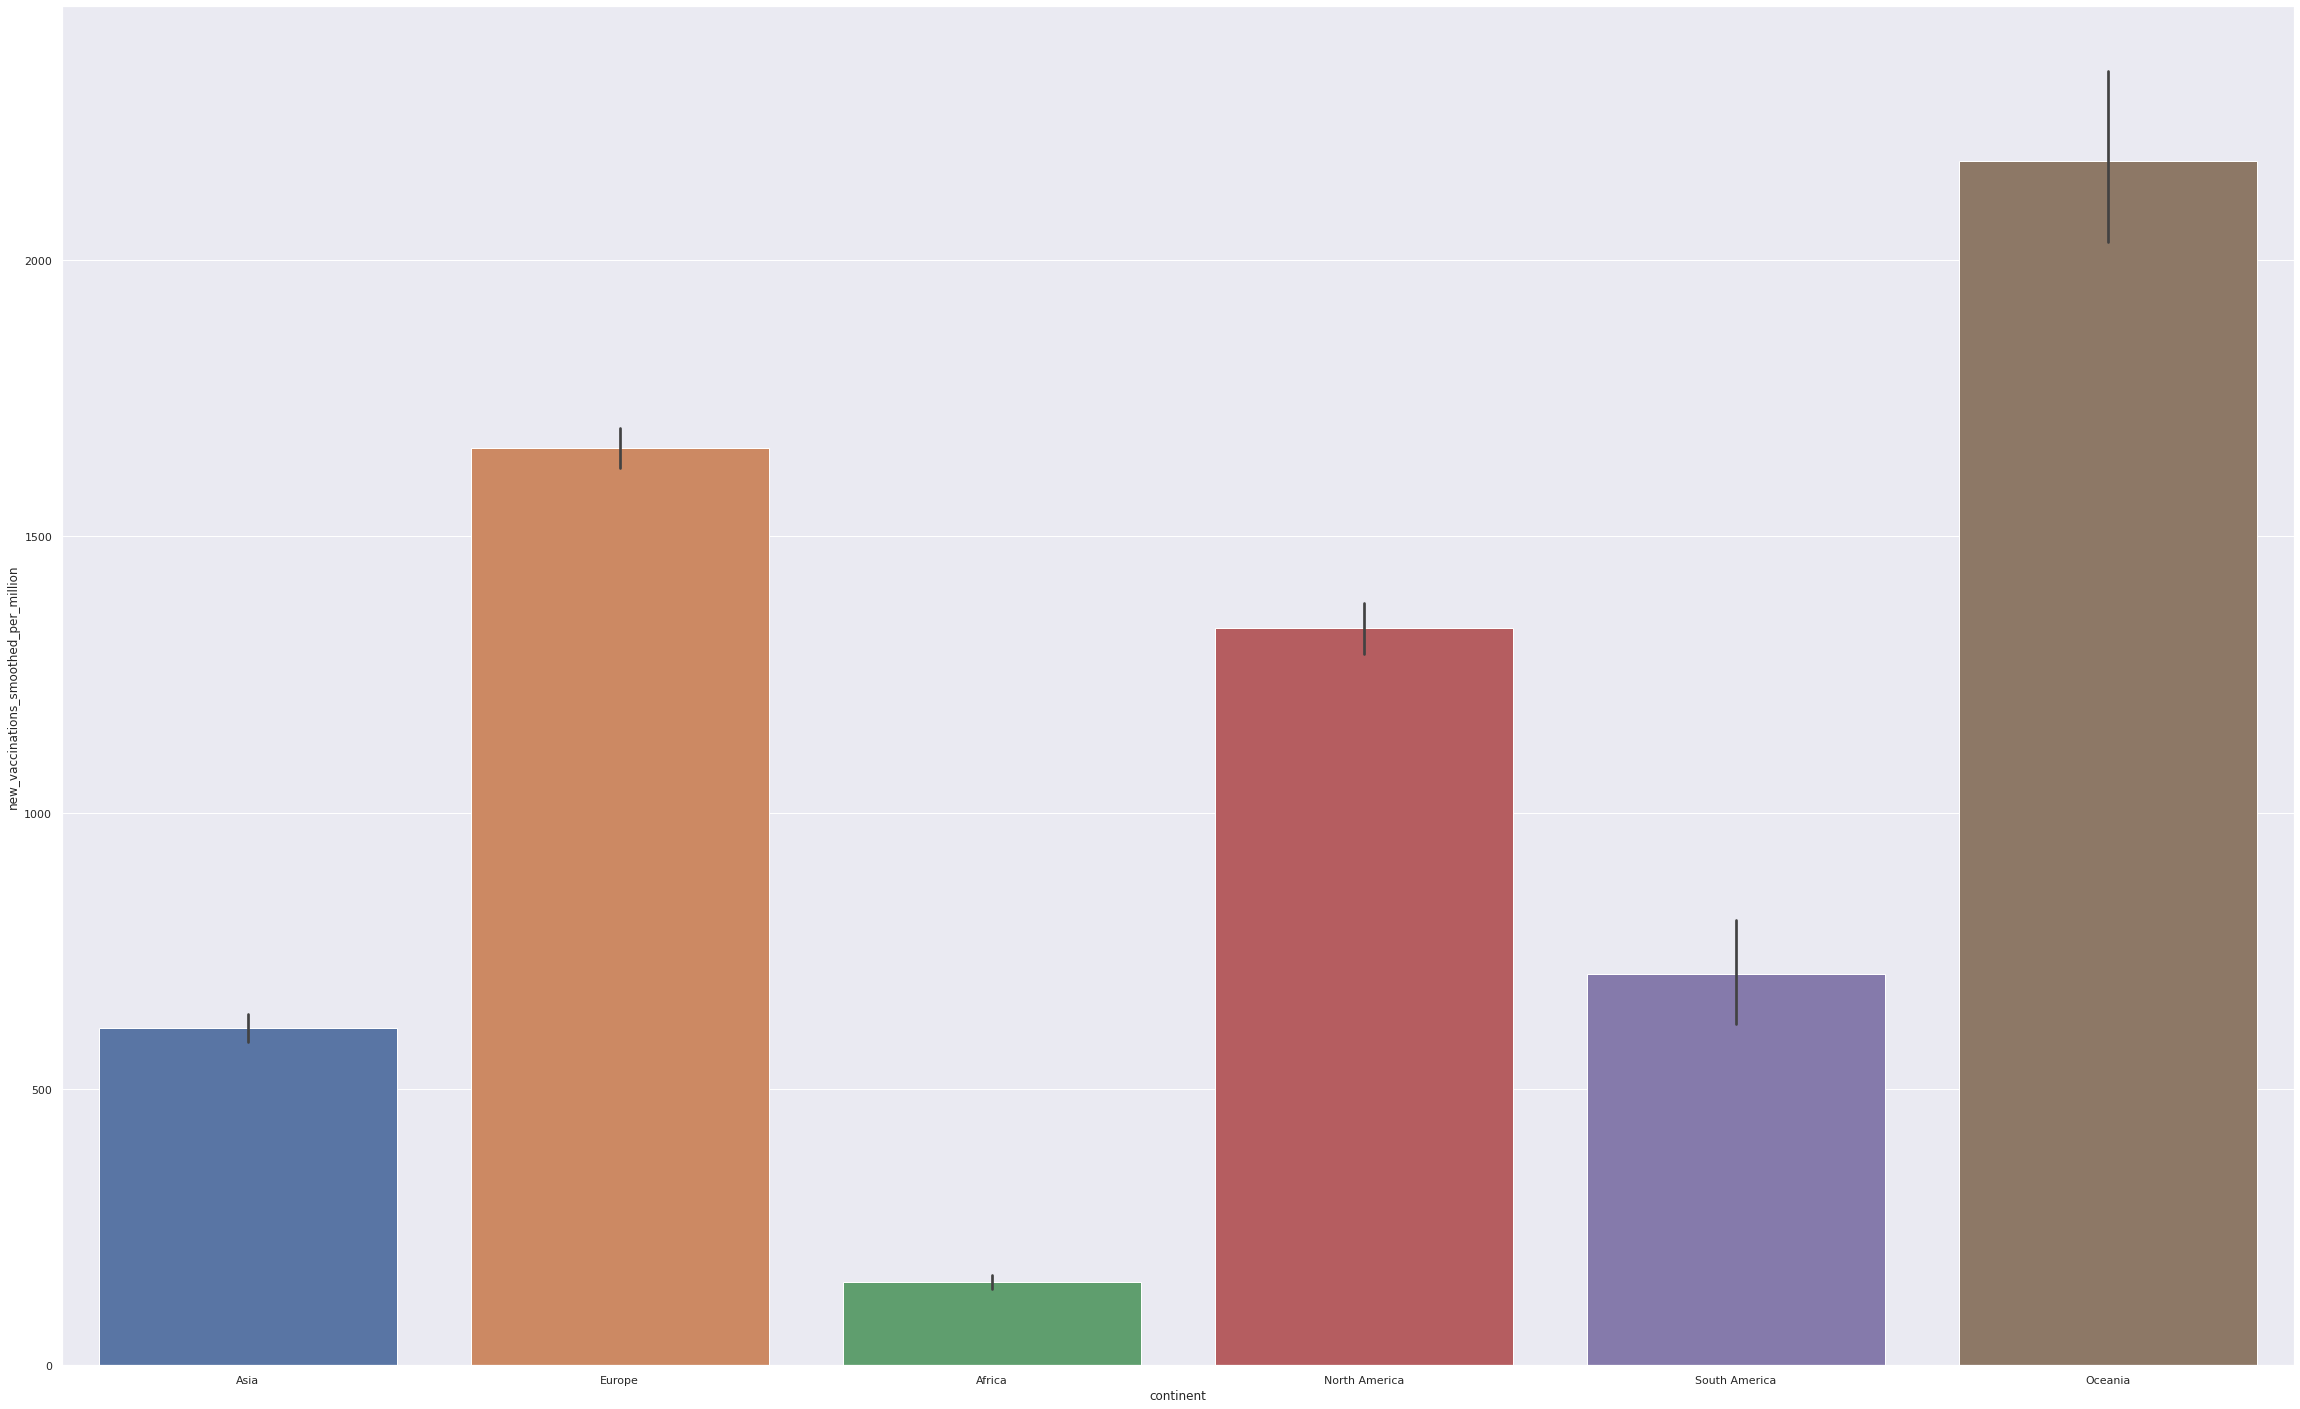

In [ ]:
plt.figure(figsize=(40,25))


sns.barplot(covid1['continent'] , covid1['new_vaccinations_smoothed_per_million'])

## **Europe**

In [ ]:
temp = covid1['continent'] == 'Europe'
europe = covid1[temp]
europe

continent location       date  ...  human_development_index  index  month
index                                ...                                       
414      Europe  Albania 2020-02-25  ...                 0.795000    414    2.0
415      Europe  Albania 2020-02-26  ...                 0.795000    415    2.0
416      Europe  Albania 2020-02-27  ...                 0.795000    416    2.0
417      Europe  Albania 2020-02-28  ...                 0.795000    417    2.0
418      Europe  Albania 2020-02-29  ...                 0.795000    418    2.0
...         ...      ...        ...  ...                      ...    ...    ...
83821    Europe  Vatican 2021-11-10  ...                 0.726126  83821   23.0
83822    Europe  Vatican 2021-11-11  ...                 0.726126  83822   23.0
83823    Europe  Vatican 2021-11-12  ...                 0.726126  83823   23.0
83824    Europe  Vatican 2021-11-13  ...                 0.726126  83824   23.0
83825    Europe  Vatican 2021-11-14  ...                 0.726126  83825   23.0

[22832 rows x 56 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


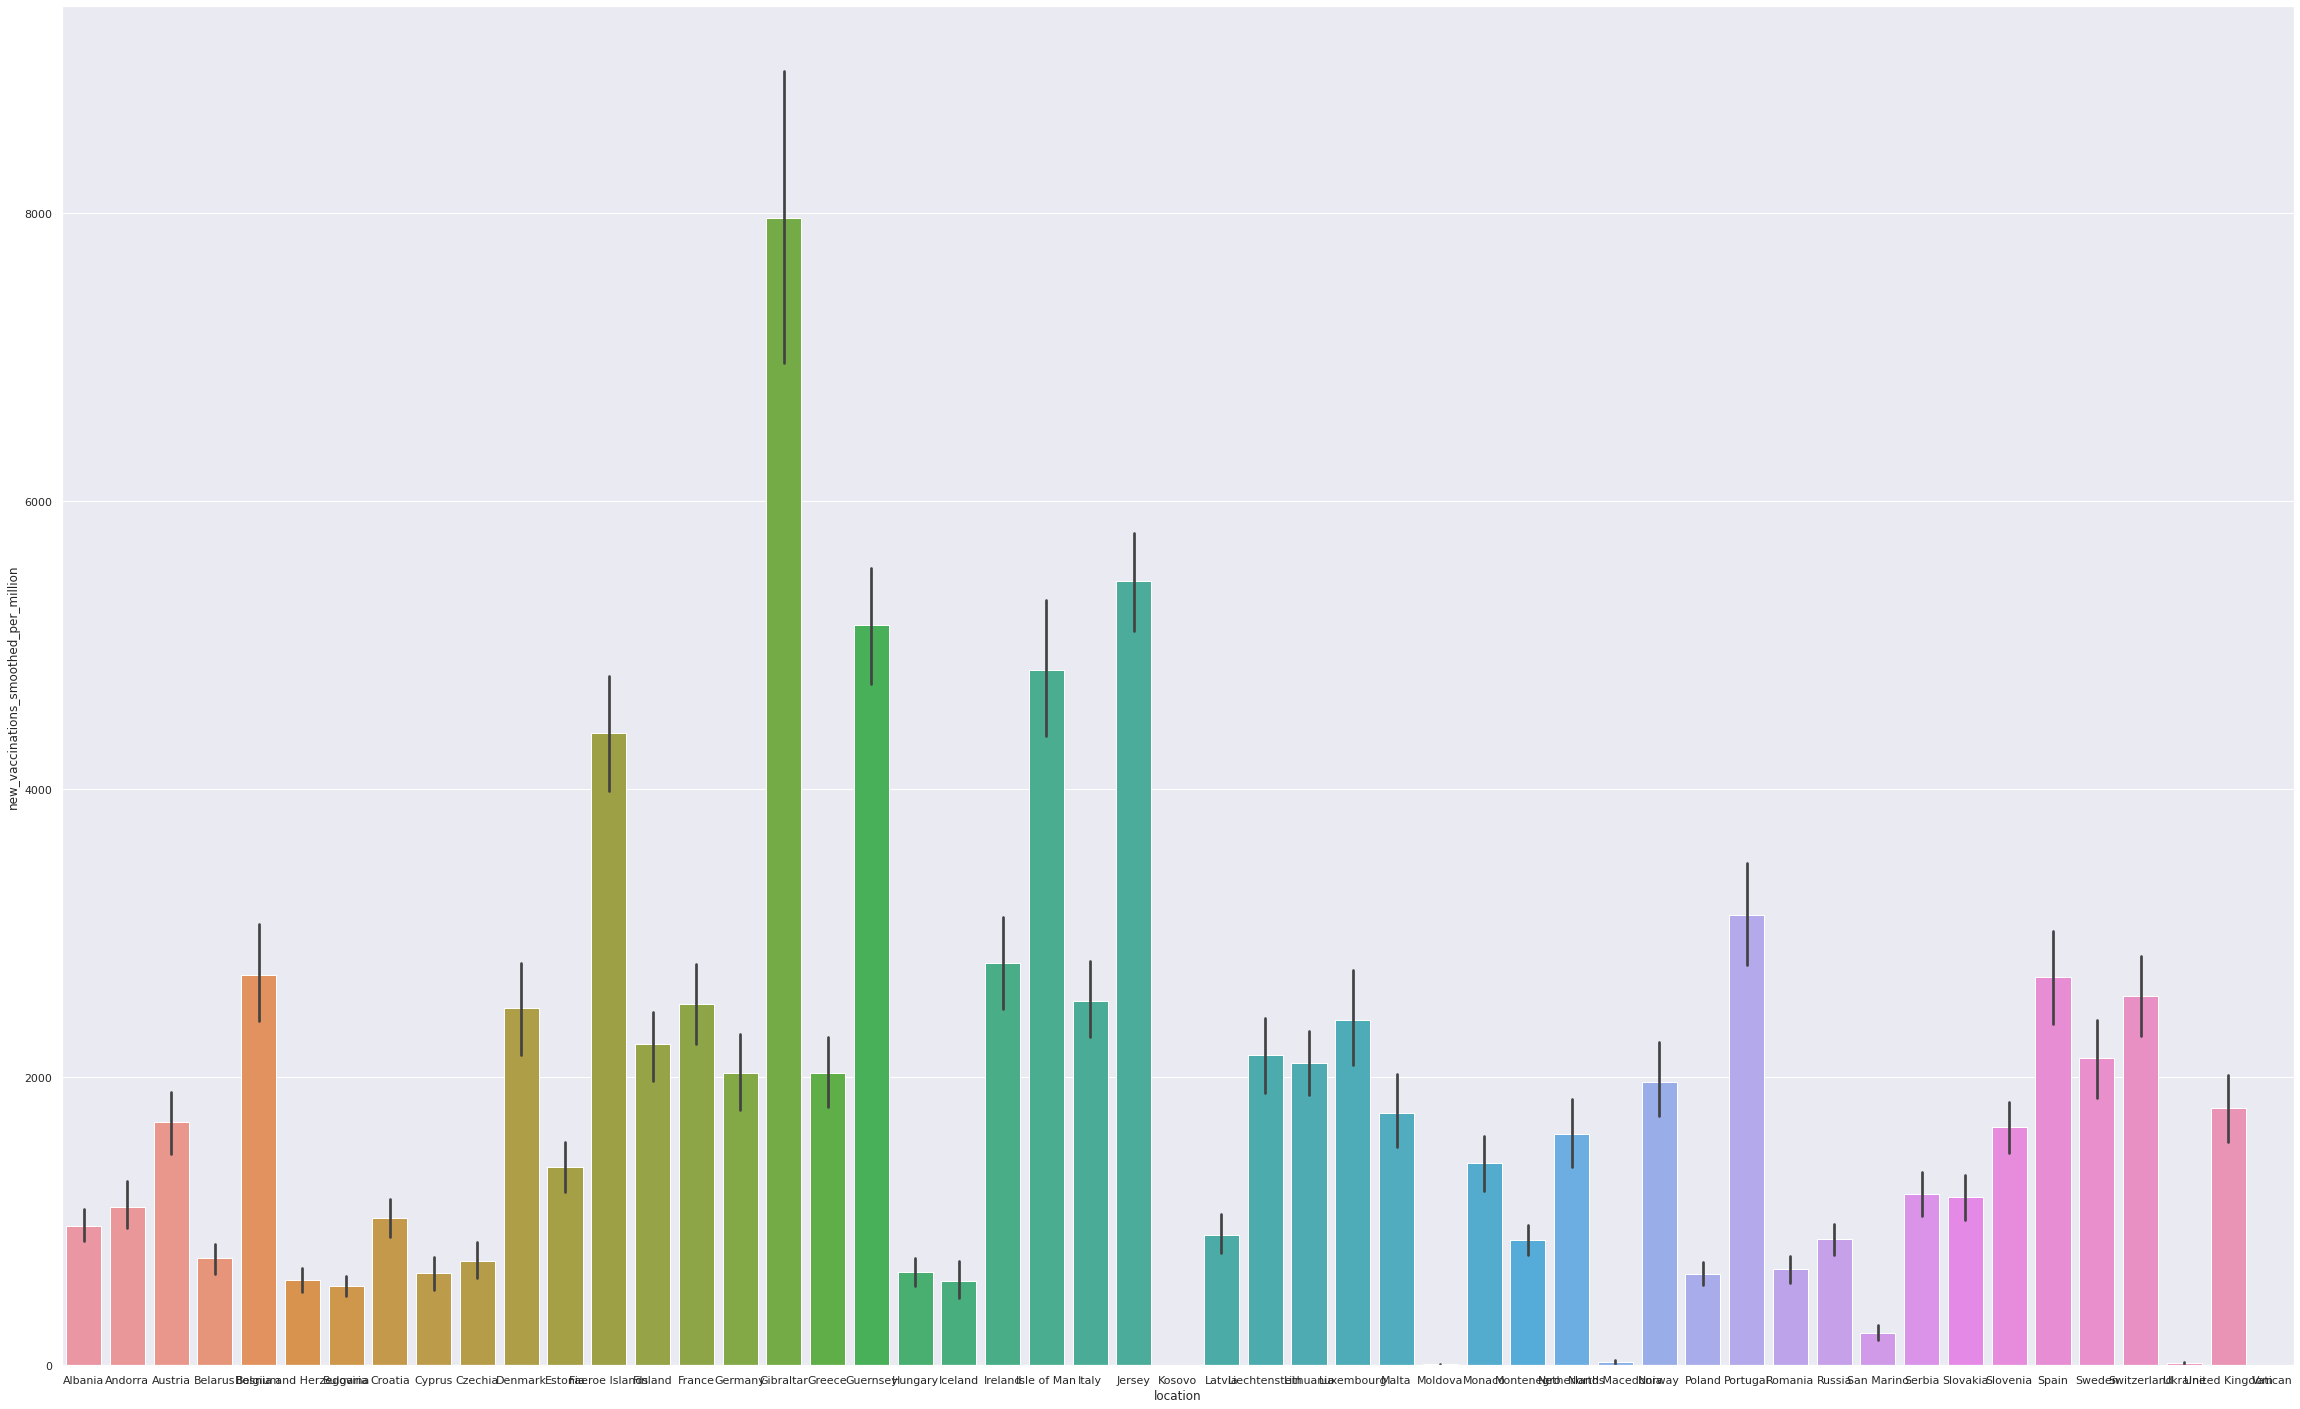

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(europe['location'] , europe['new_vaccinations_smoothed_per_million'])

## **South America**

In [ ]:
temp = covid1['continent'] == 'South America'
sa = covid1[temp]
sa

continent   location  ...  index  month
index                            ...              
2893   South America  Argentina  ...   2893    1.0
2894   South America  Argentina  ...   2894    1.0
2895   South America  Argentina  ...   2895    1.0
2896   South America  Argentina  ...   2896    1.0
2897   South America  Argentina  ...   2897    1.0
...              ...        ...  ...    ...    ...
84311  South America  Venezuela  ...  84311   22.0
84312  South America  Venezuela  ...  84312   22.0
84313  South America  Venezuela  ...  84313   22.0
84314  South America  Venezuela  ...  84314   23.0
84315  South America  Venezuela  ...  84315   23.0

[4951 rows x 56 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


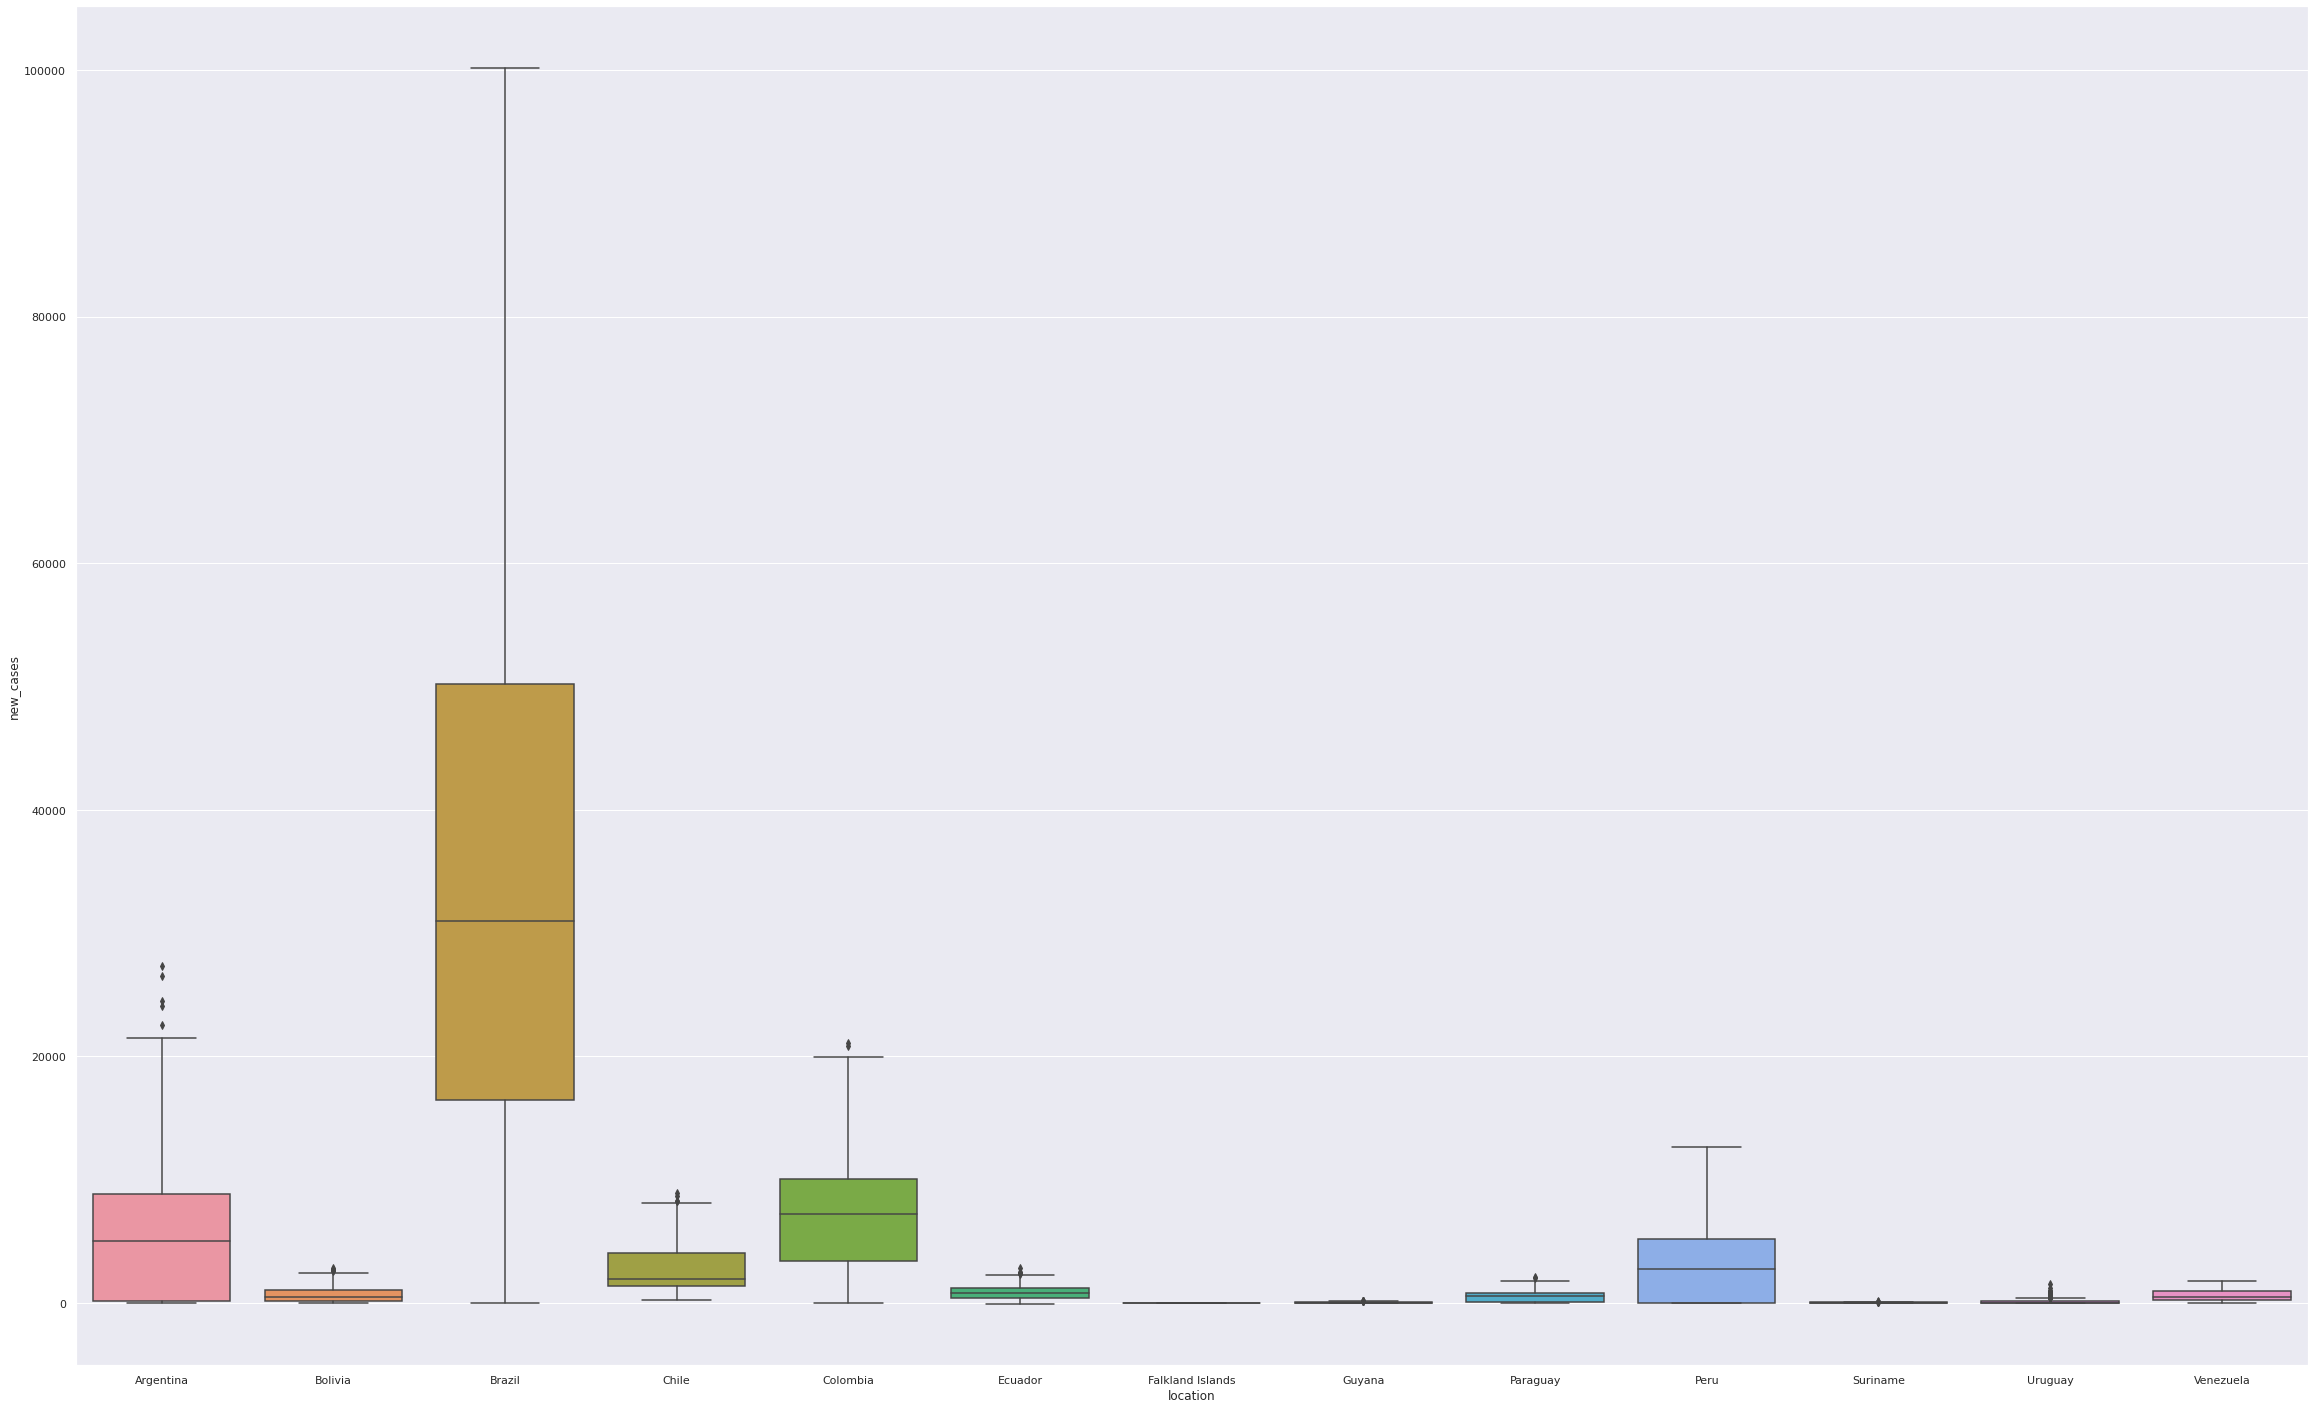

In [ ]:
plt.figure(figsize=(40,25))

sns.boxplot(sa['location'] , sa['new_cases'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


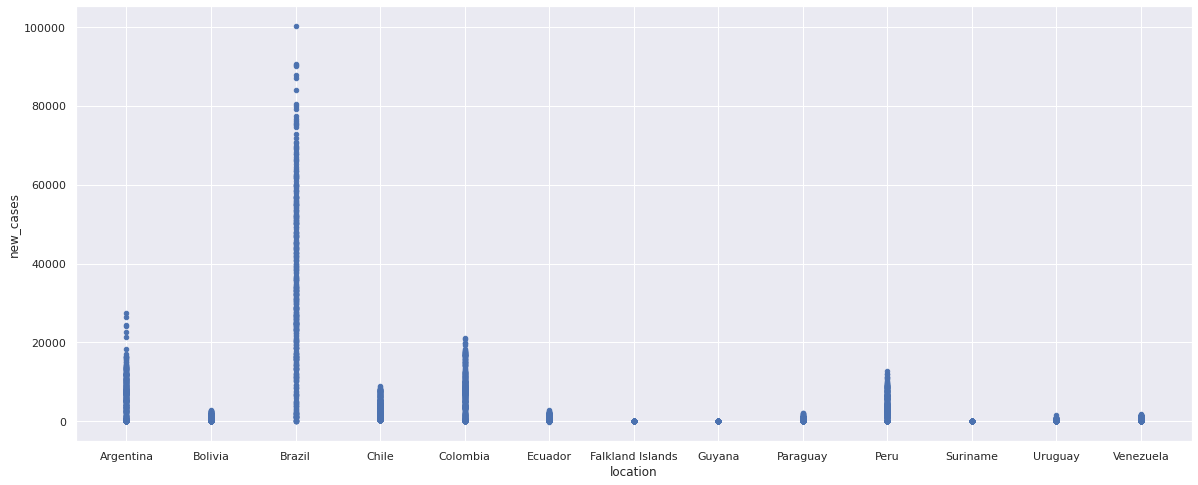

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
sa.plot.scatter(x = 'location', y = 'new_cases')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


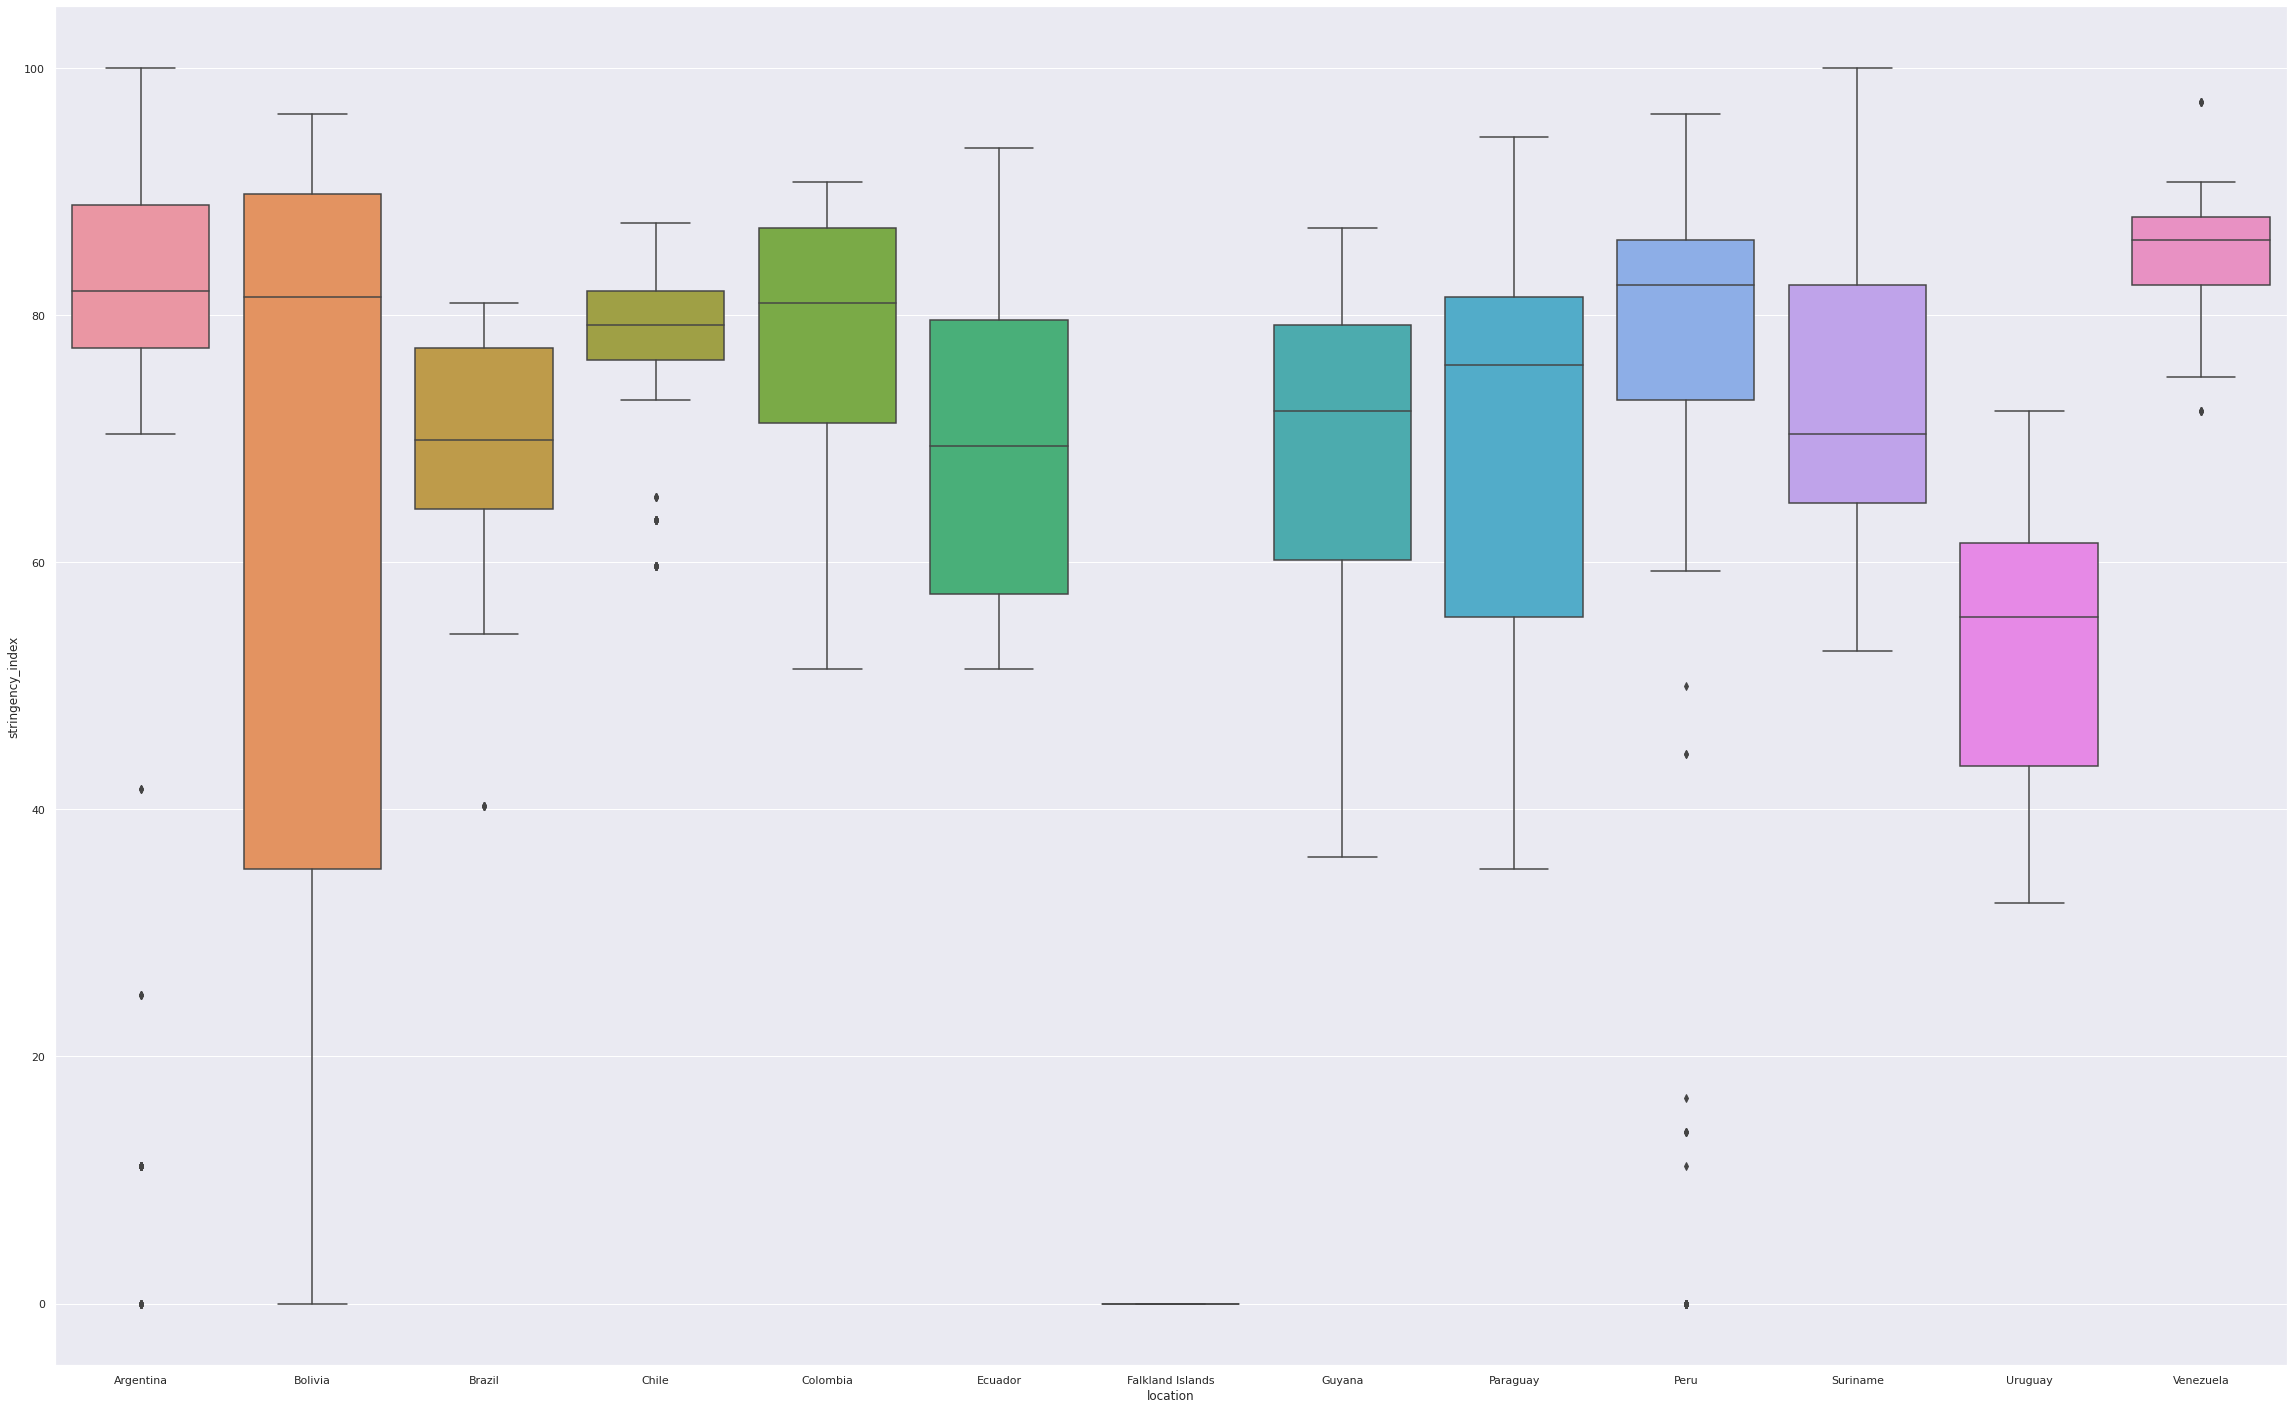

In [ ]:
plt.figure(figsize=(40,25))

sns.boxplot(sa['location'] , sa['stringency_index'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


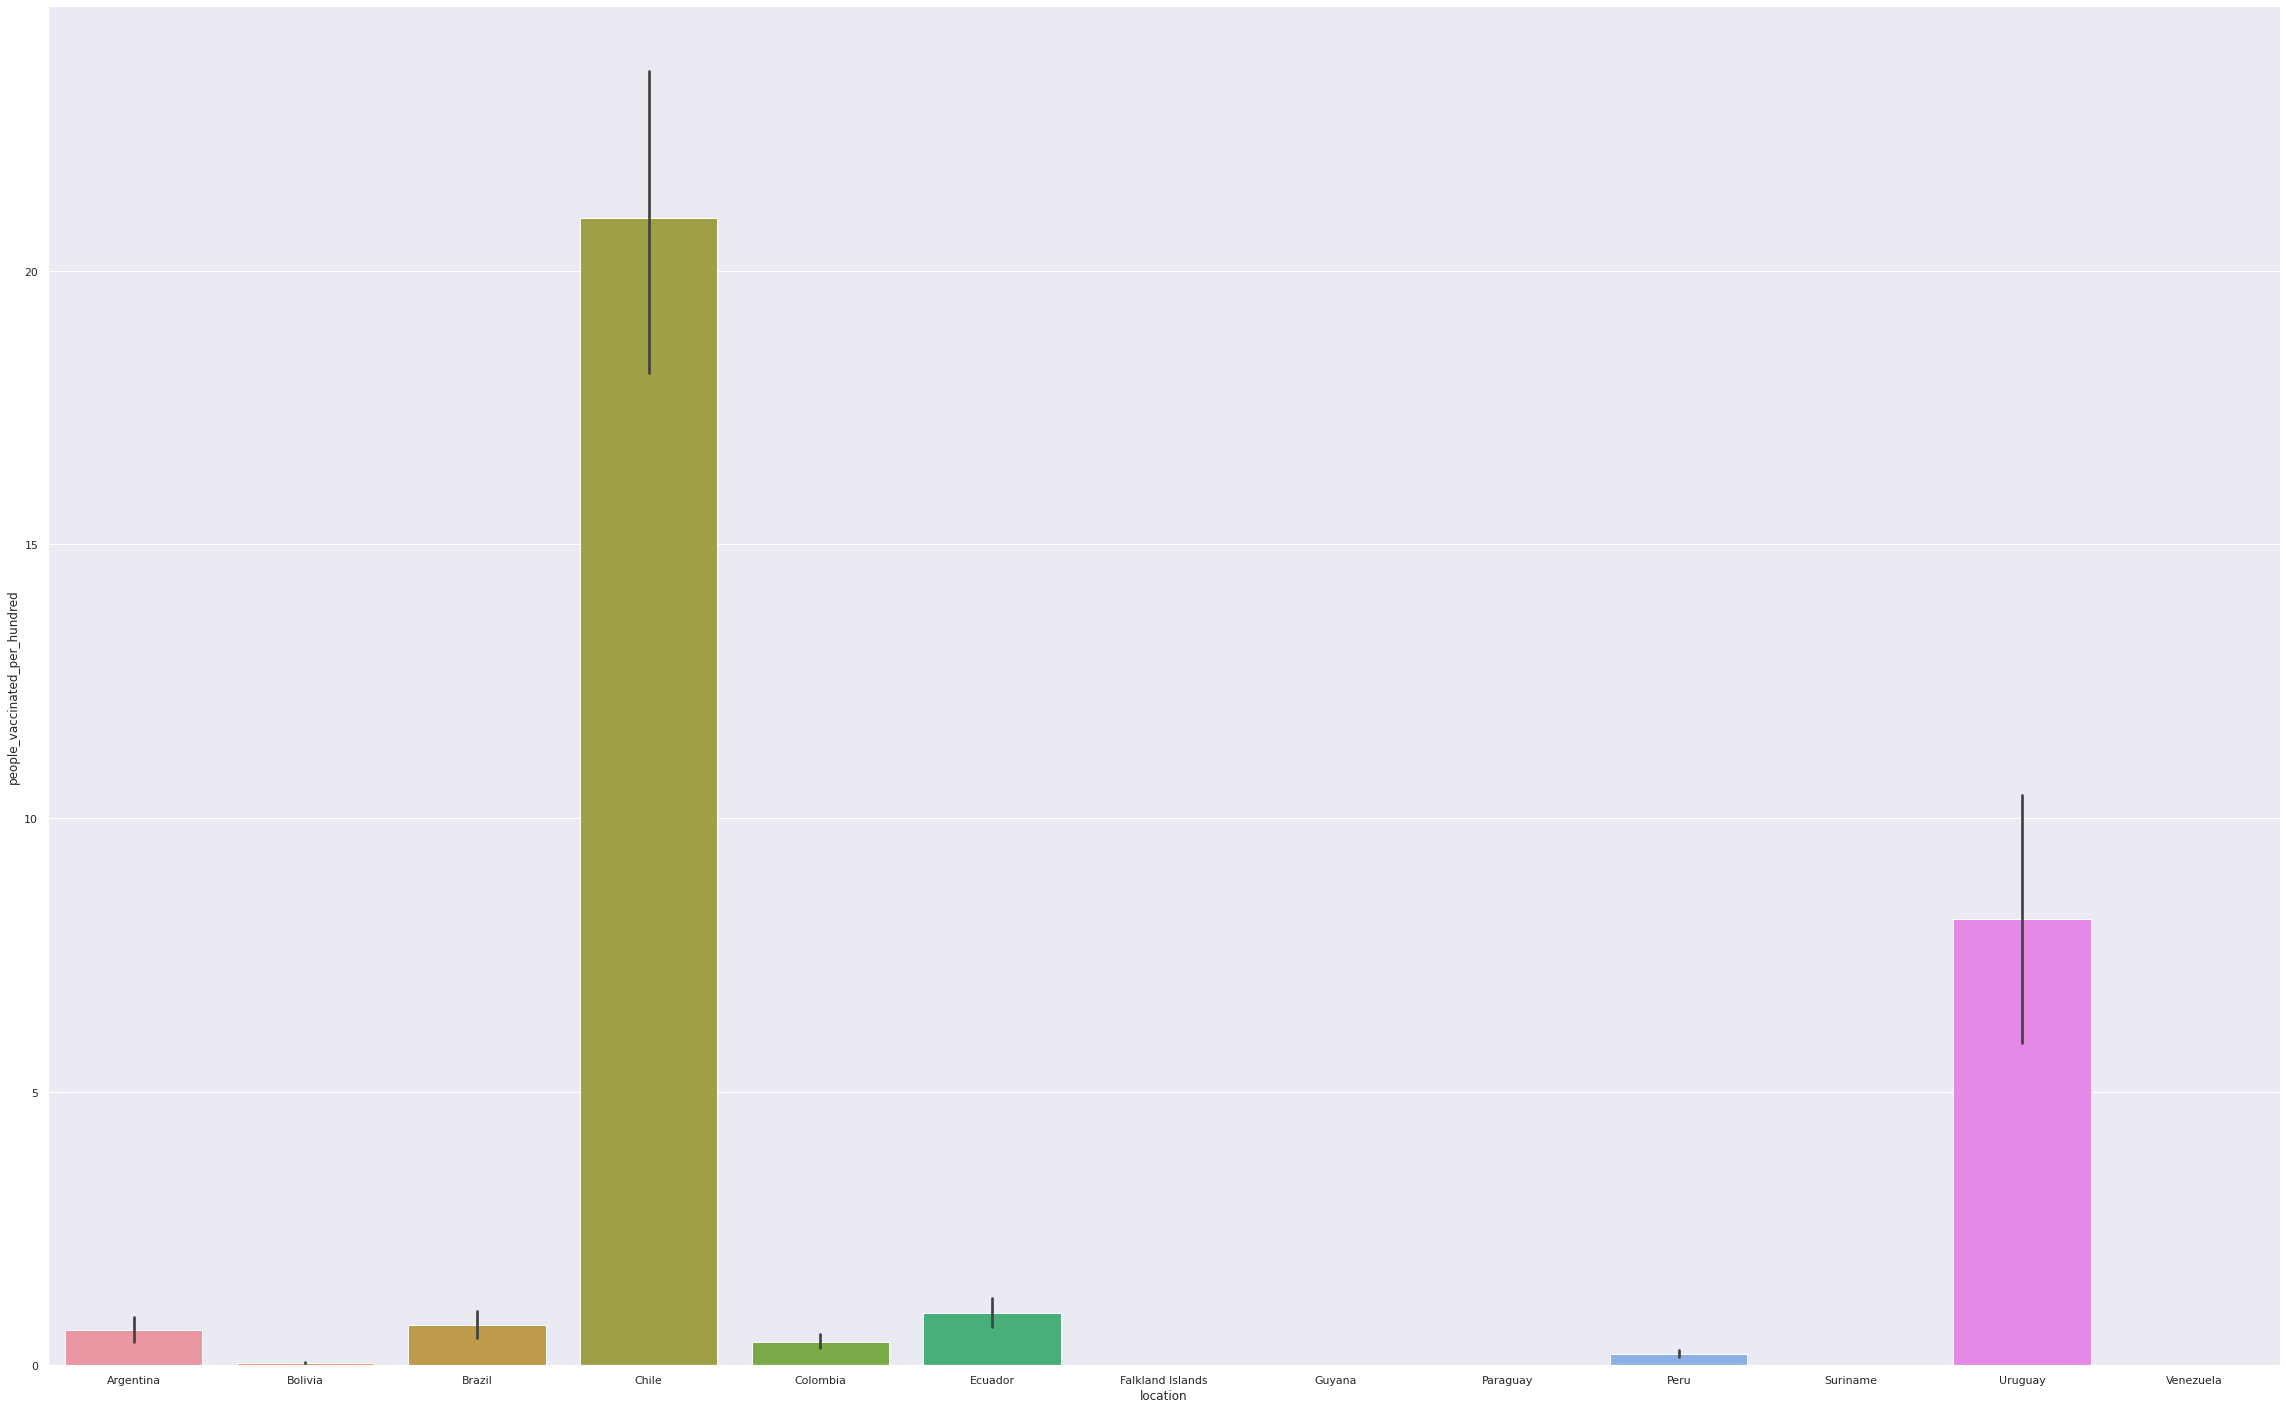

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(sa['location'] , sa['people_vaccinated_per_hundred'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


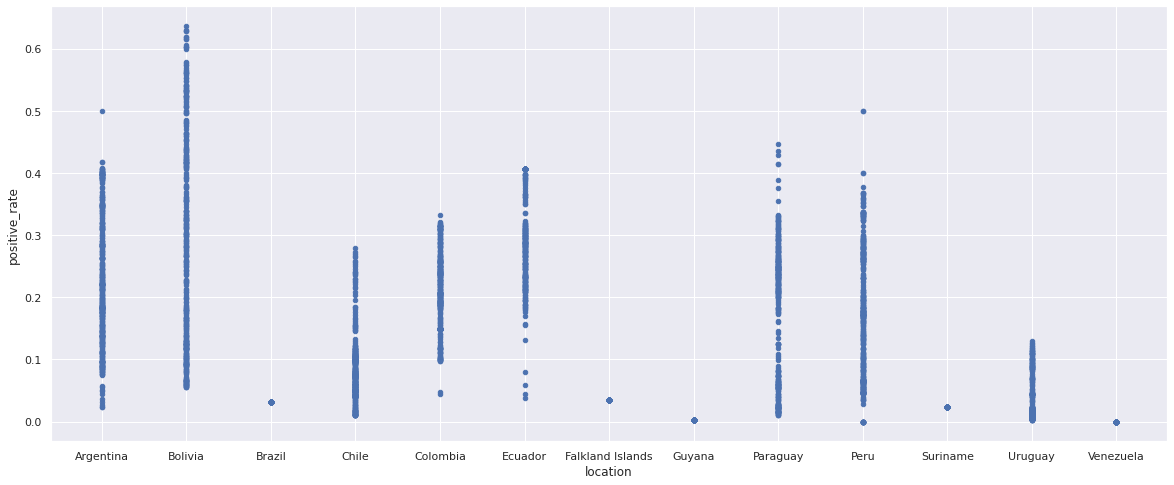

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
sa.plot.scatter(x = 'location', y = 'positive_rate')

# **Poverty and gpd**

## **Vaccine and Boosters**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


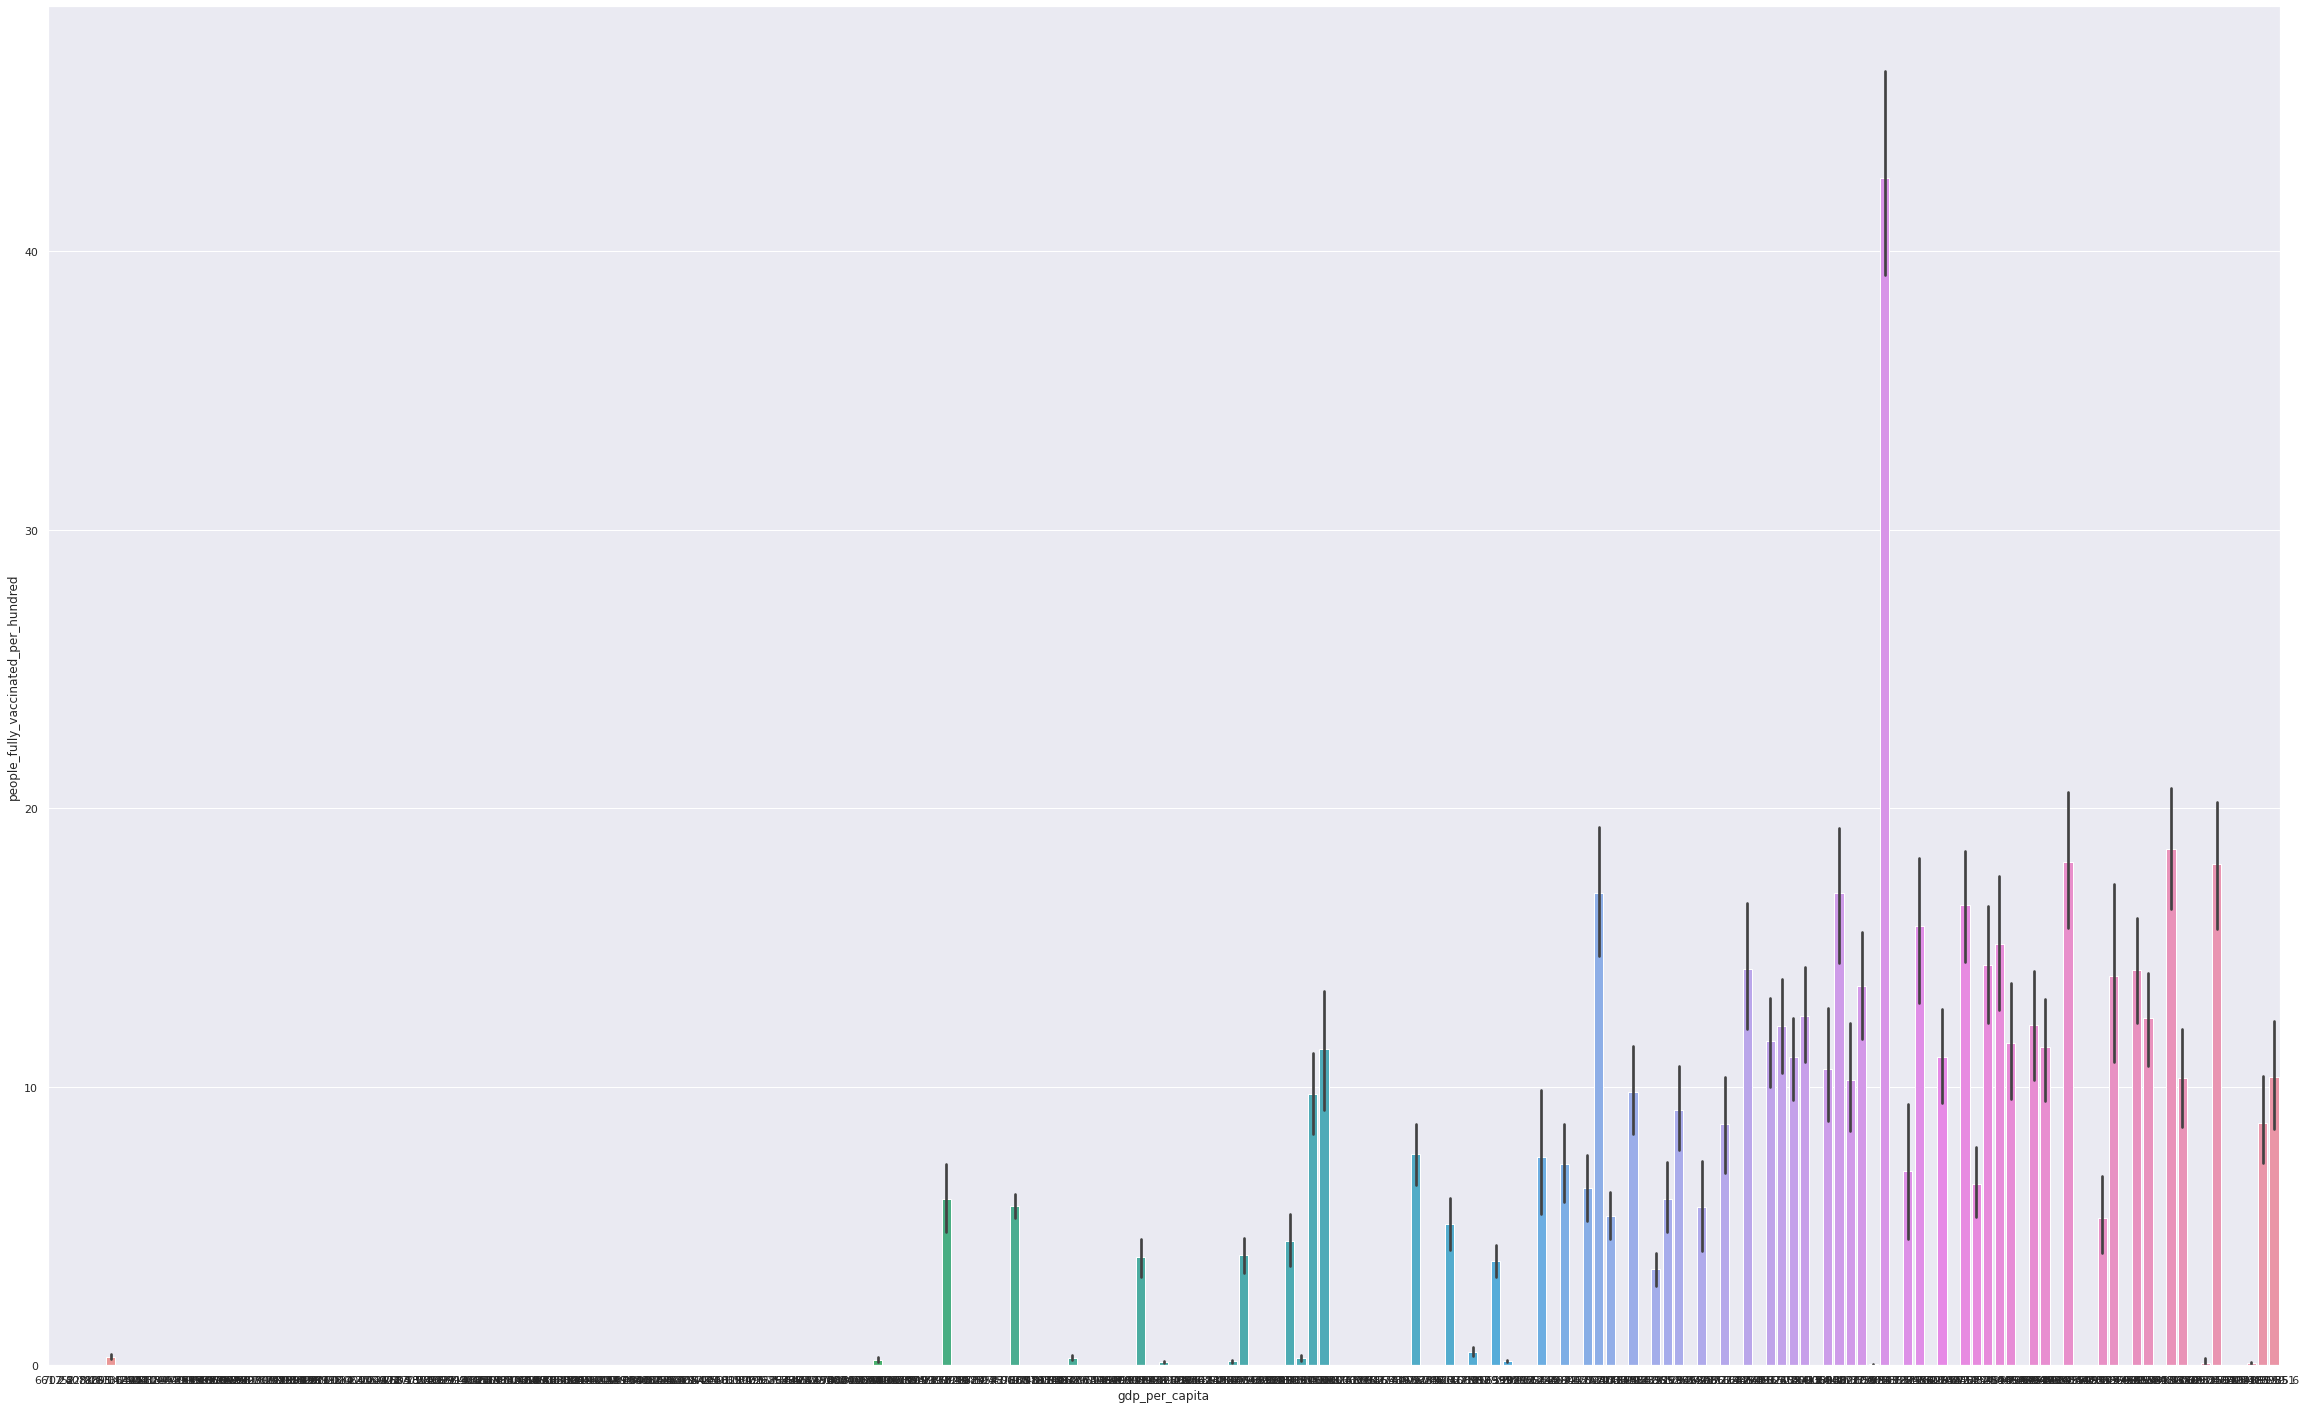

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['gdp_per_capita'] , covid1['people_fully_vaccinated_per_hundred'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


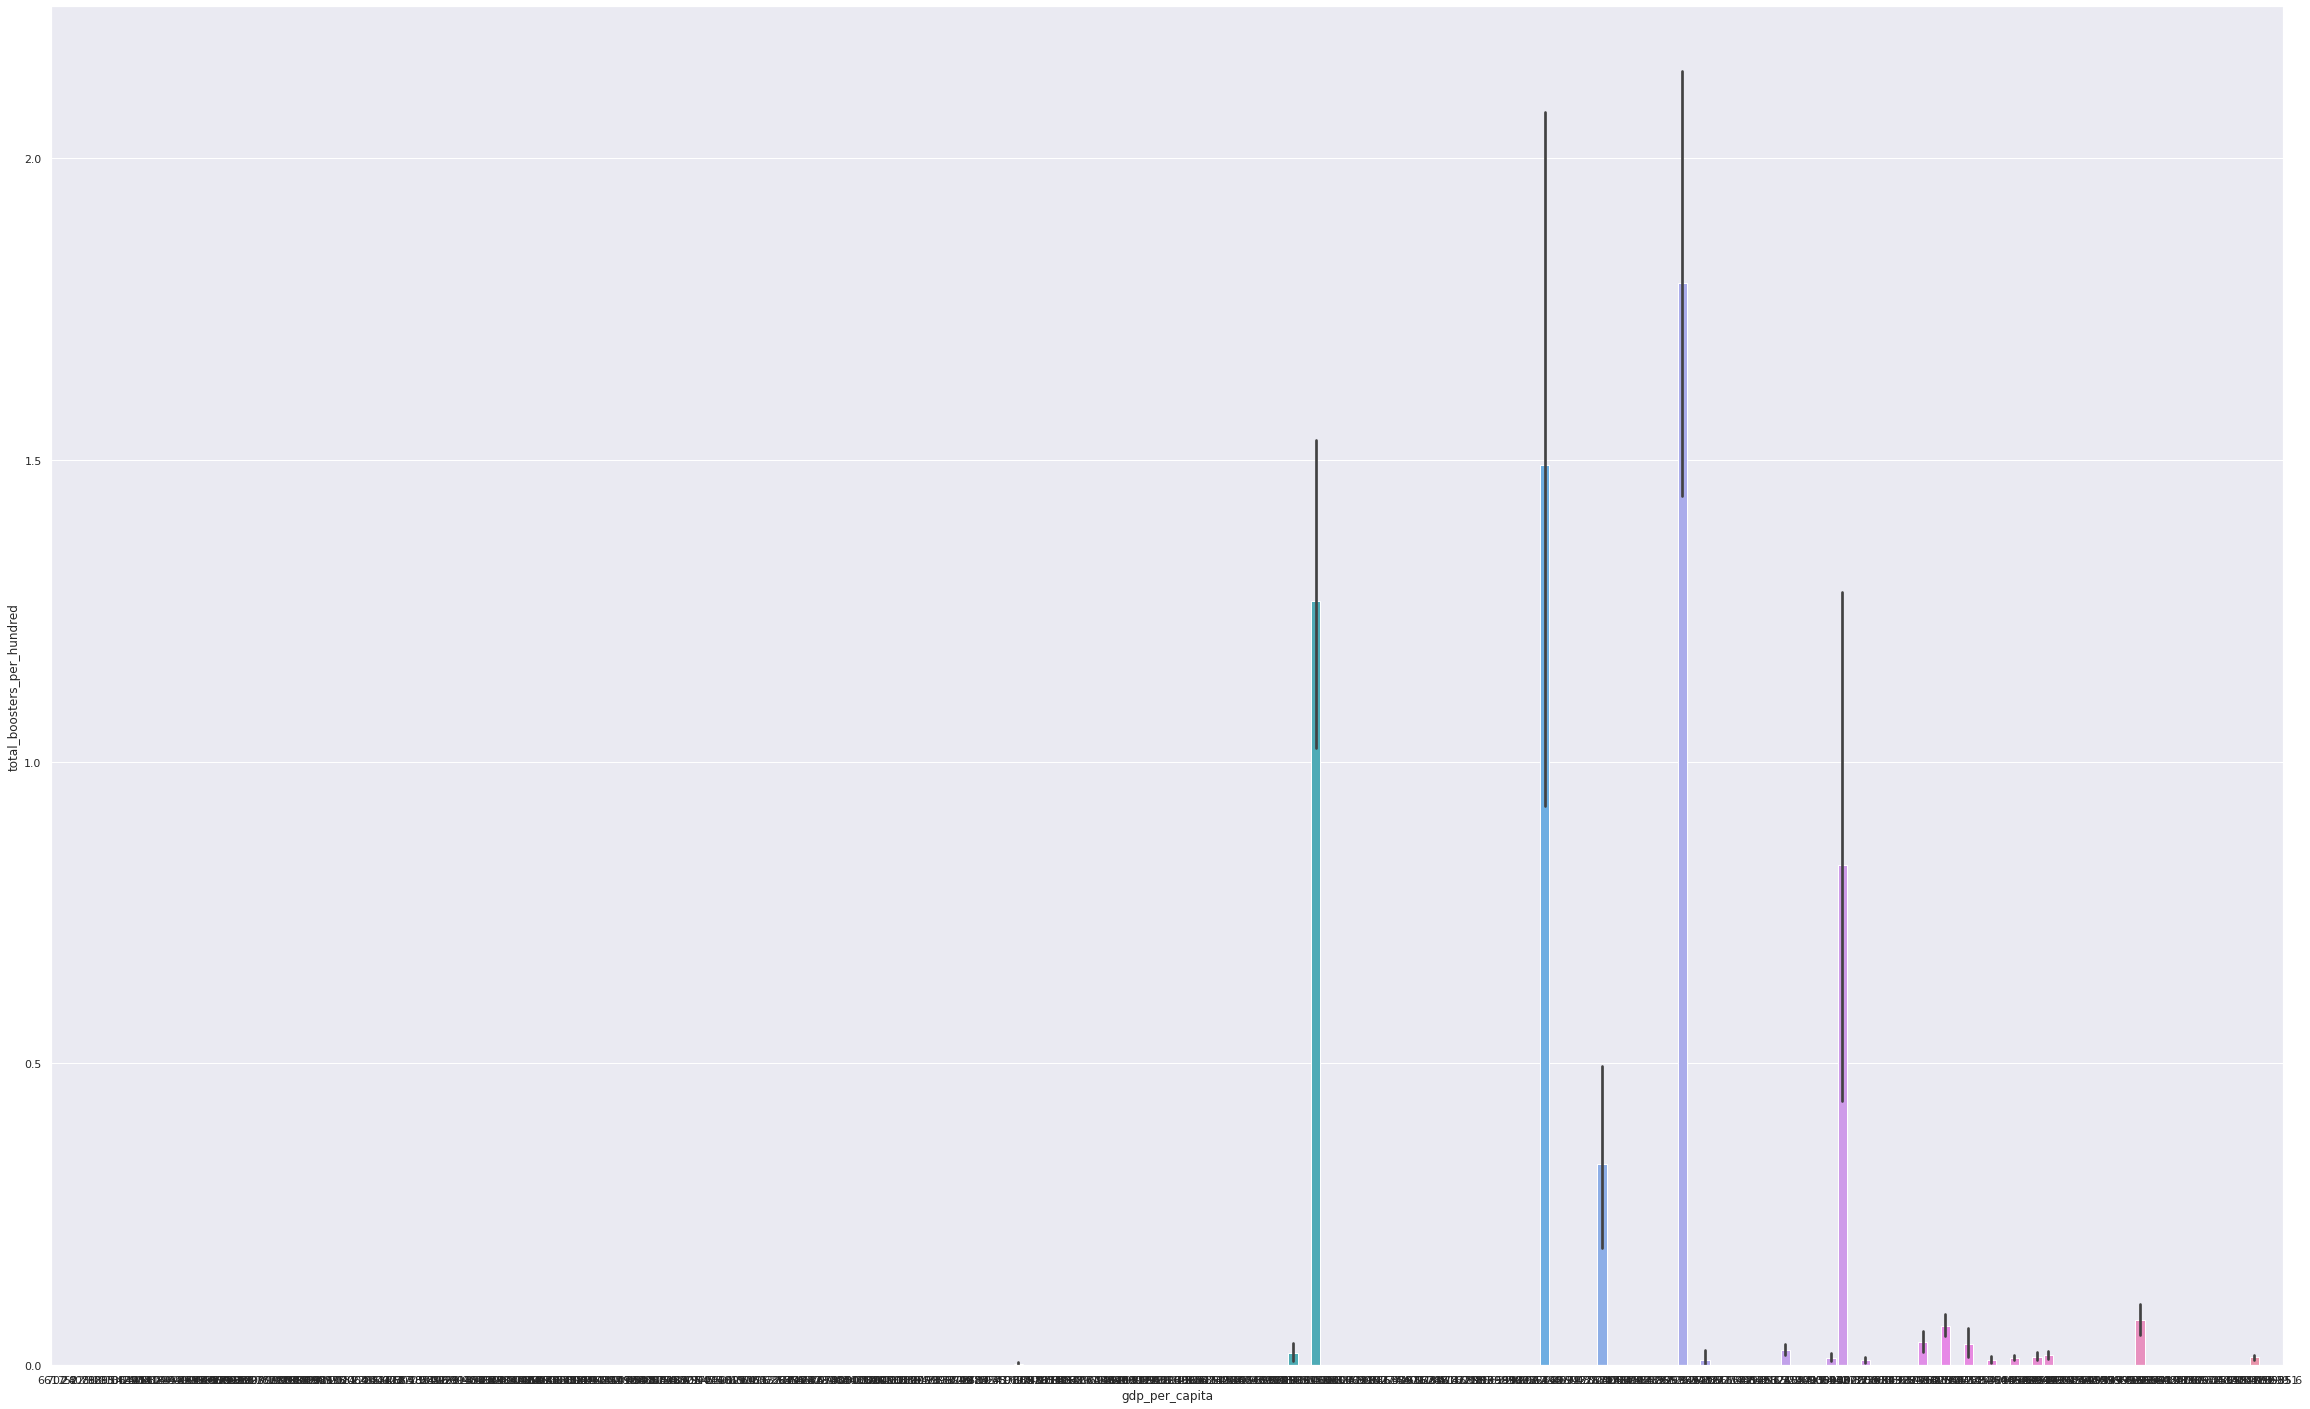

In [ ]:
plt.figure(figsize=(40,25))
sns.barplot(covid1['gdp_per_capita'] , covid1['total_boosters_per_hundred'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


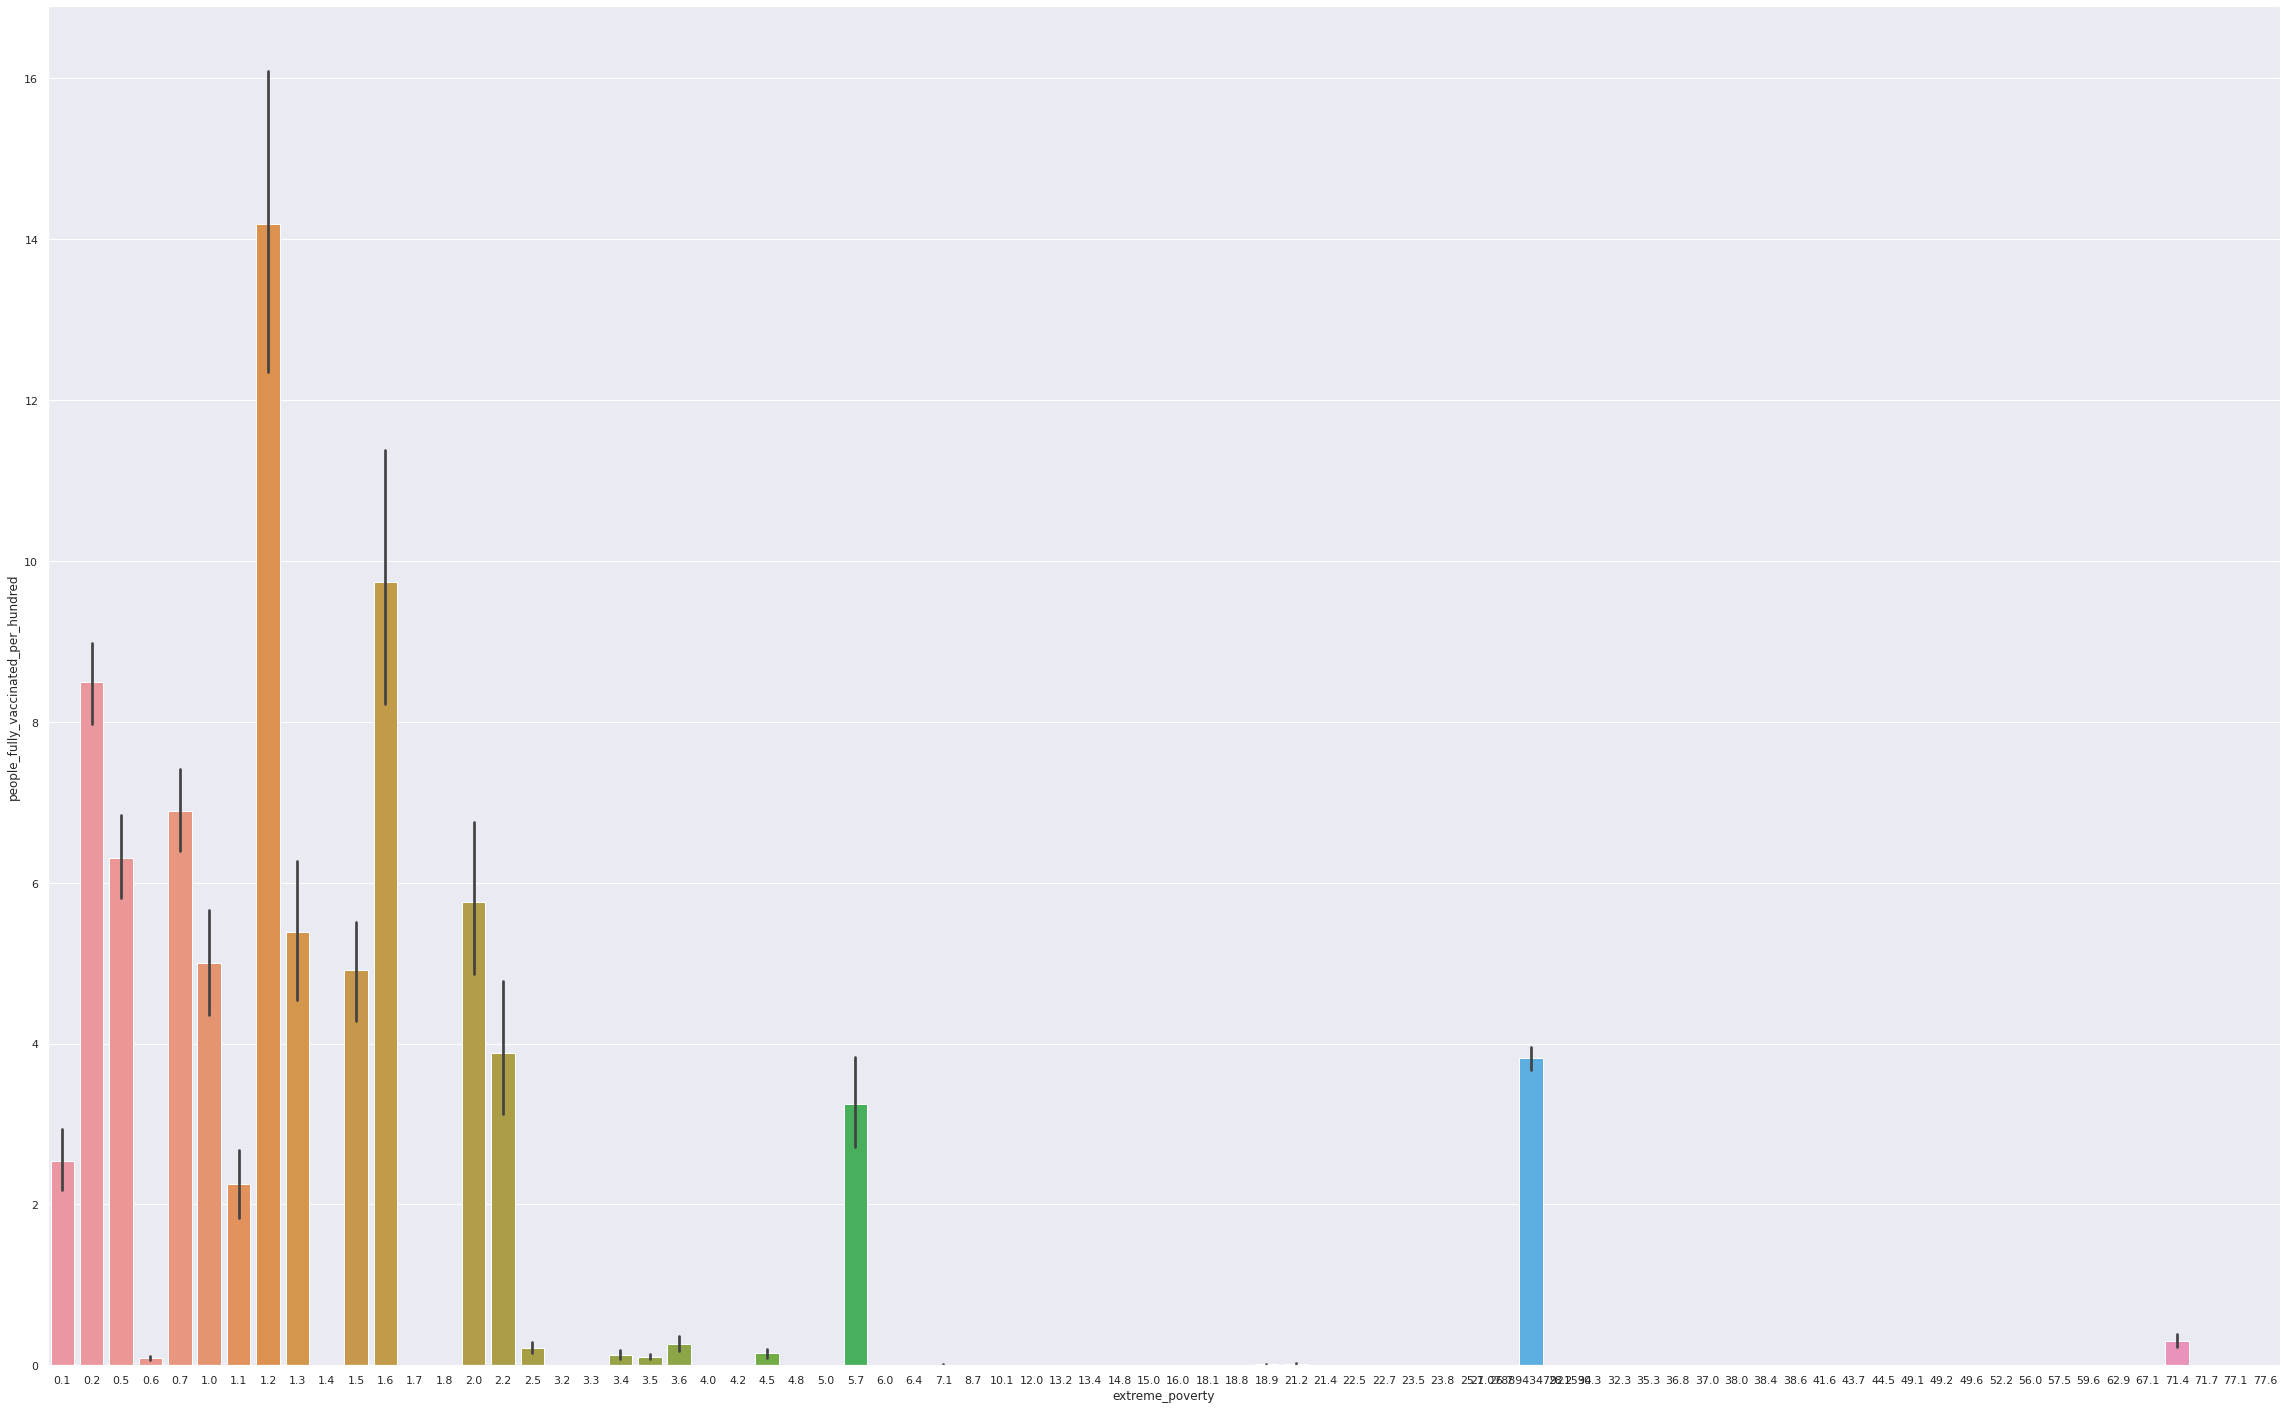

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['extreme_poverty'] , covid1['people_fully_vaccinated_per_hundred'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


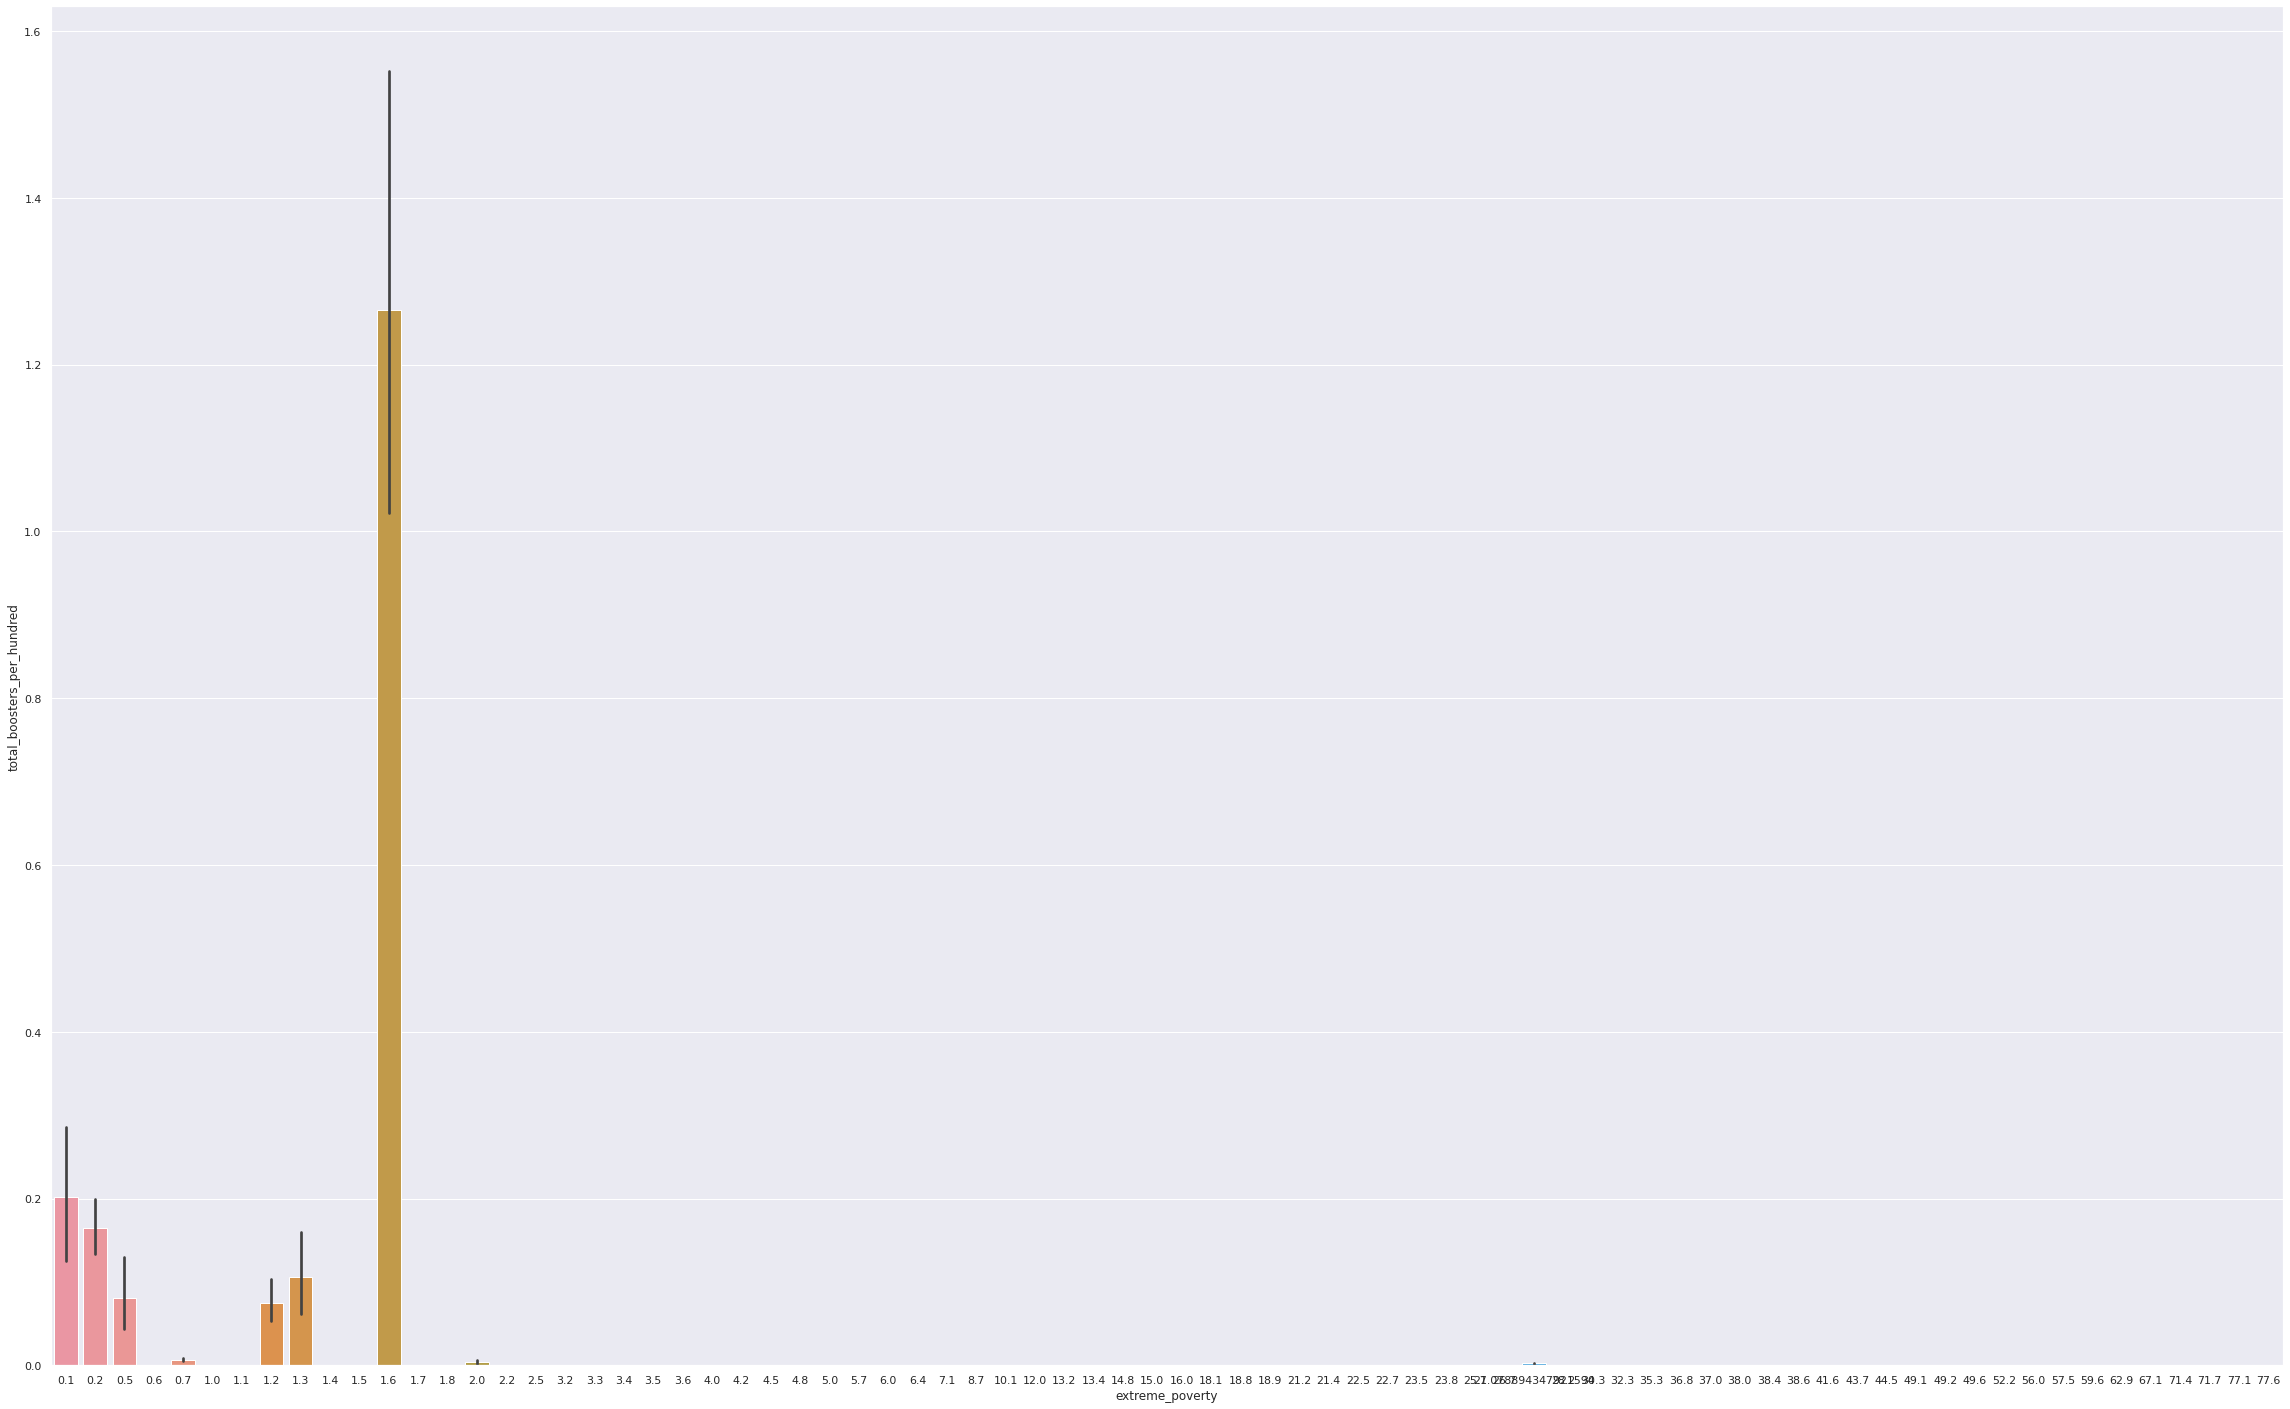

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['extreme_poverty'] , covid1['total_boosters_per_hundred'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


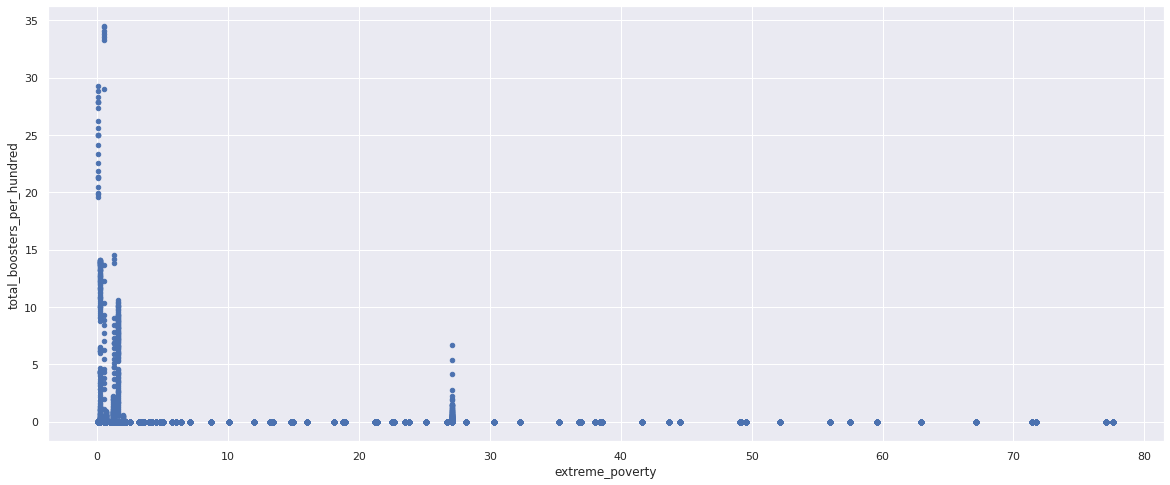

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
covid1.plot.scatter(x = 'extreme_poverty', y = 'total_boosters_per_hundred')

## **cases and death**

In [ ]:
covid1

continent     location       date  ...  human_development_index  index  month
index                                    ...                                       
0          Asia  Afghanistan 2020-02-24  ...                    0.511      0    2.0
1          Asia  Afghanistan 2020-02-25  ...                    0.511      1    2.0
2          Asia  Afghanistan 2020-02-26  ...                    0.511      2    2.0
3          Asia  Afghanistan 2020-02-27  ...                    0.511      3    2.0
4          Asia  Afghanistan 2020-02-28  ...                    0.511      4    2.0
...         ...          ...        ...  ...                      ...    ...    ...
85918    Africa     Zimbabwe 2021-03-20  ...                    0.571  85918   15.0
85919    Africa     Zimbabwe 2021-03-21  ...                    0.571  85919   15.0
85920    Africa     Zimbabwe 2021-03-22  ...                    0.571  85920   15.0
85921    Africa     Zimbabwe 2021-03-23  ...                    0.571  85921   15.0
85922    Africa     Zimbabwe 2021-06-12  ...                    0.571  85922   18.0

[85923 rows x 56 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


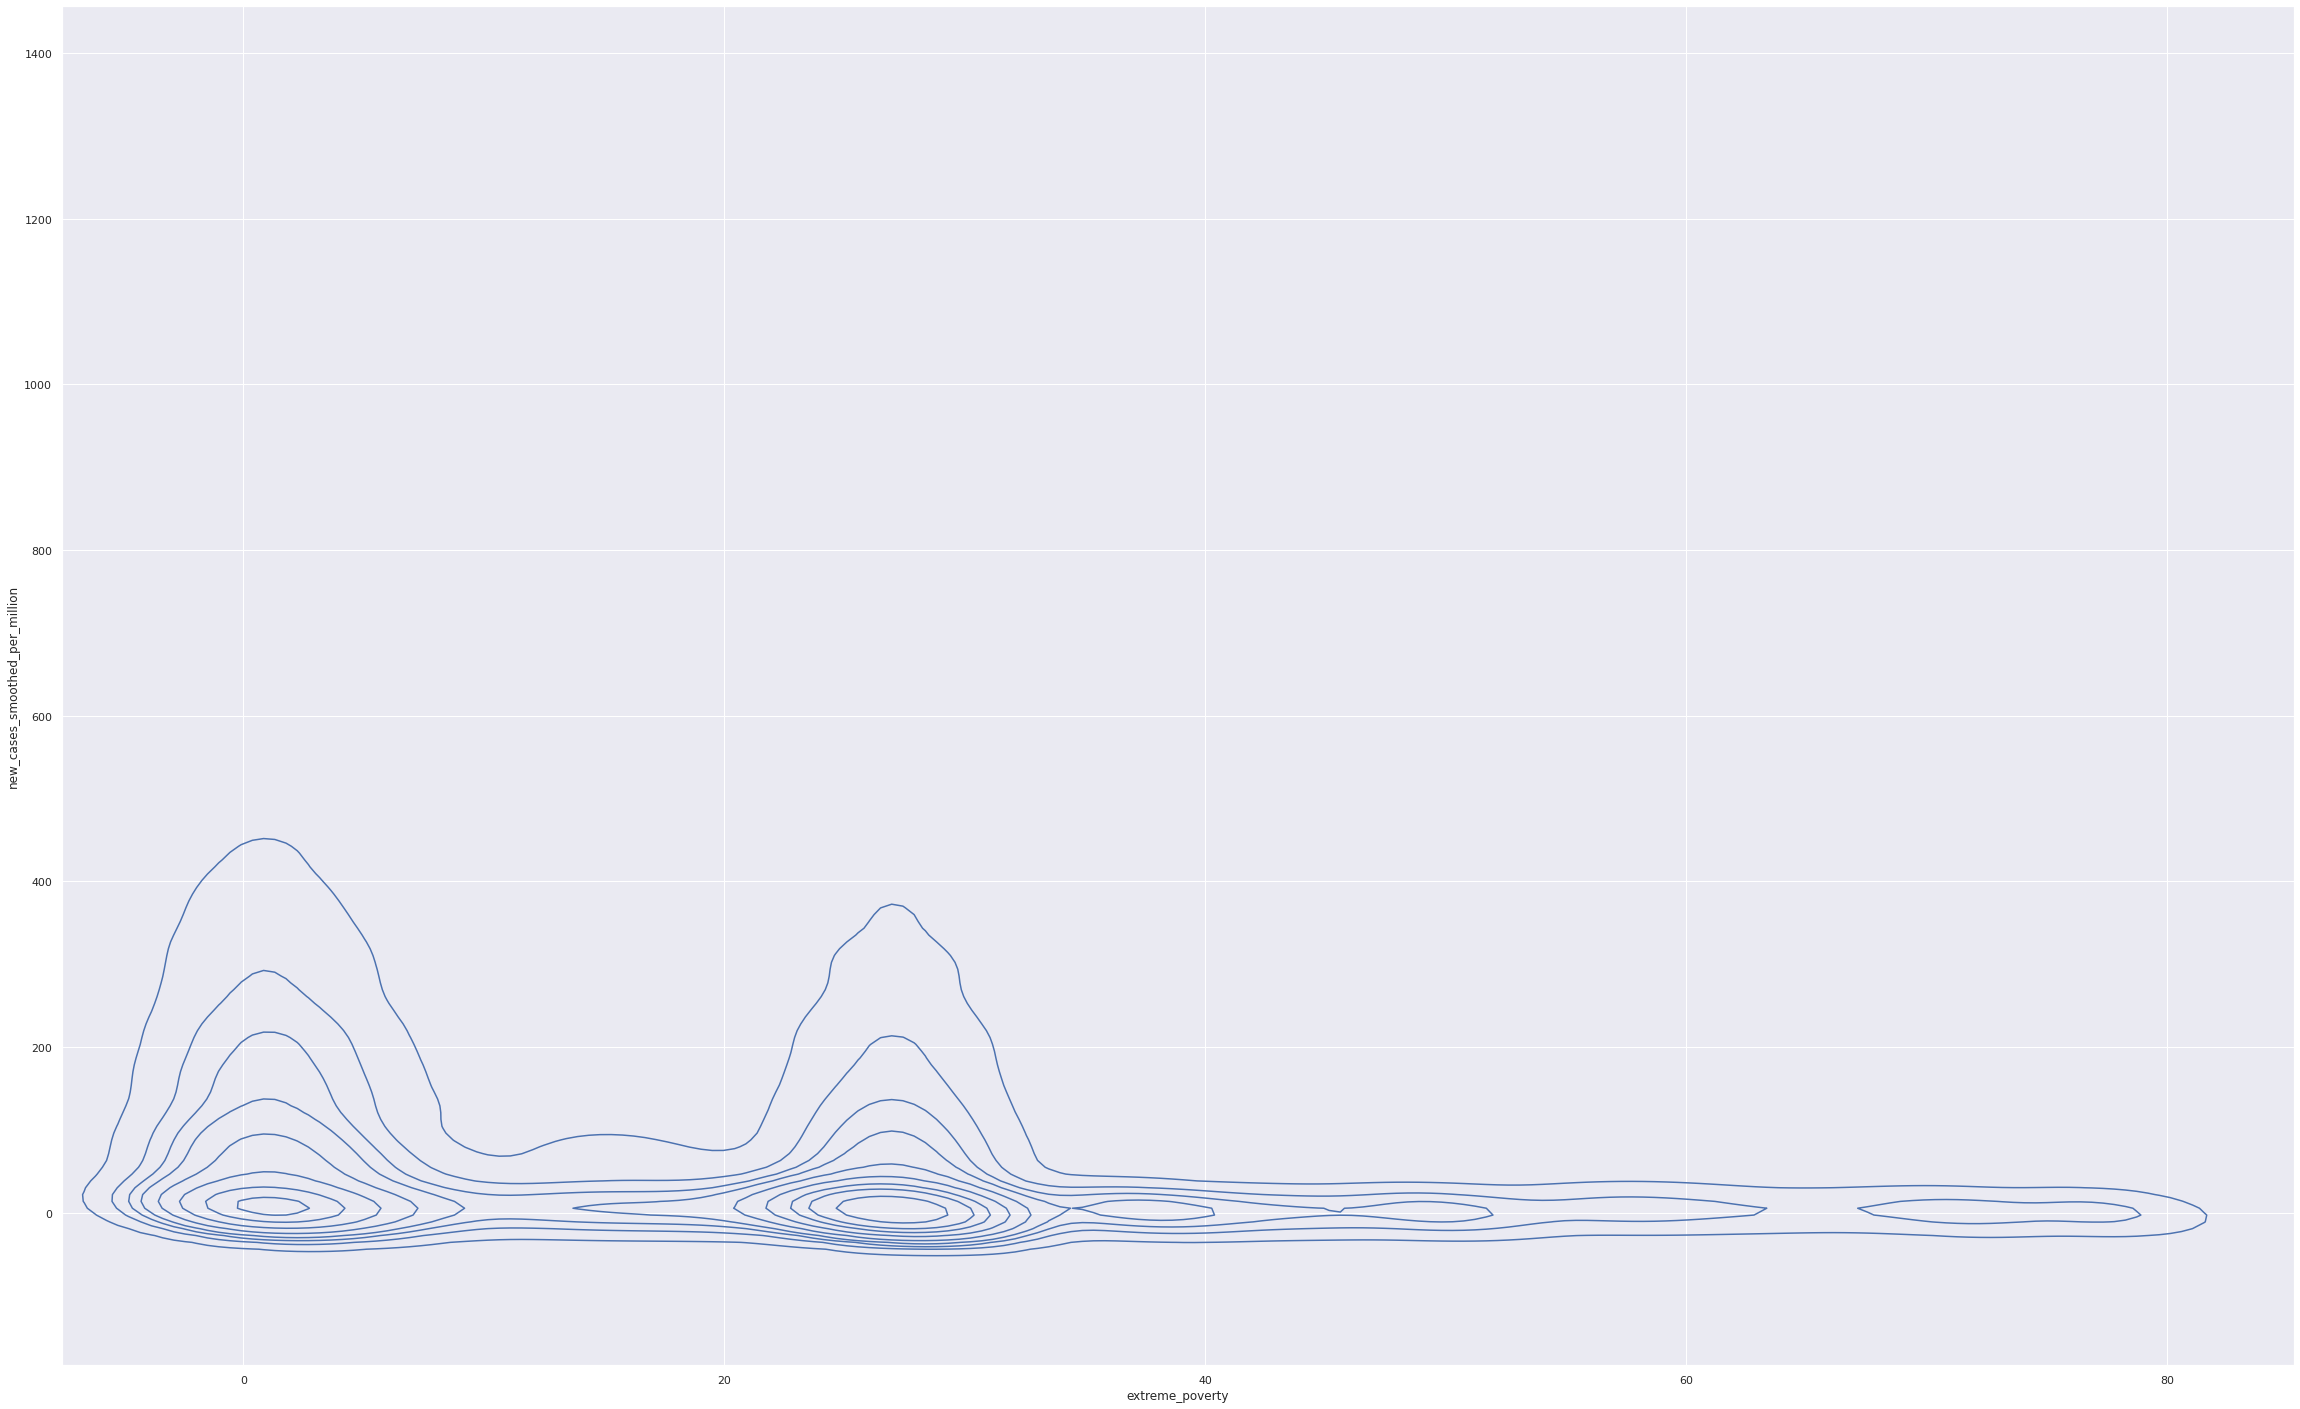

In [ ]:
plt.figure(figsize=(40,25))

sns.kdeplot(covid1['extreme_poverty'] , covid1['new_cases_smoothed_per_million'])


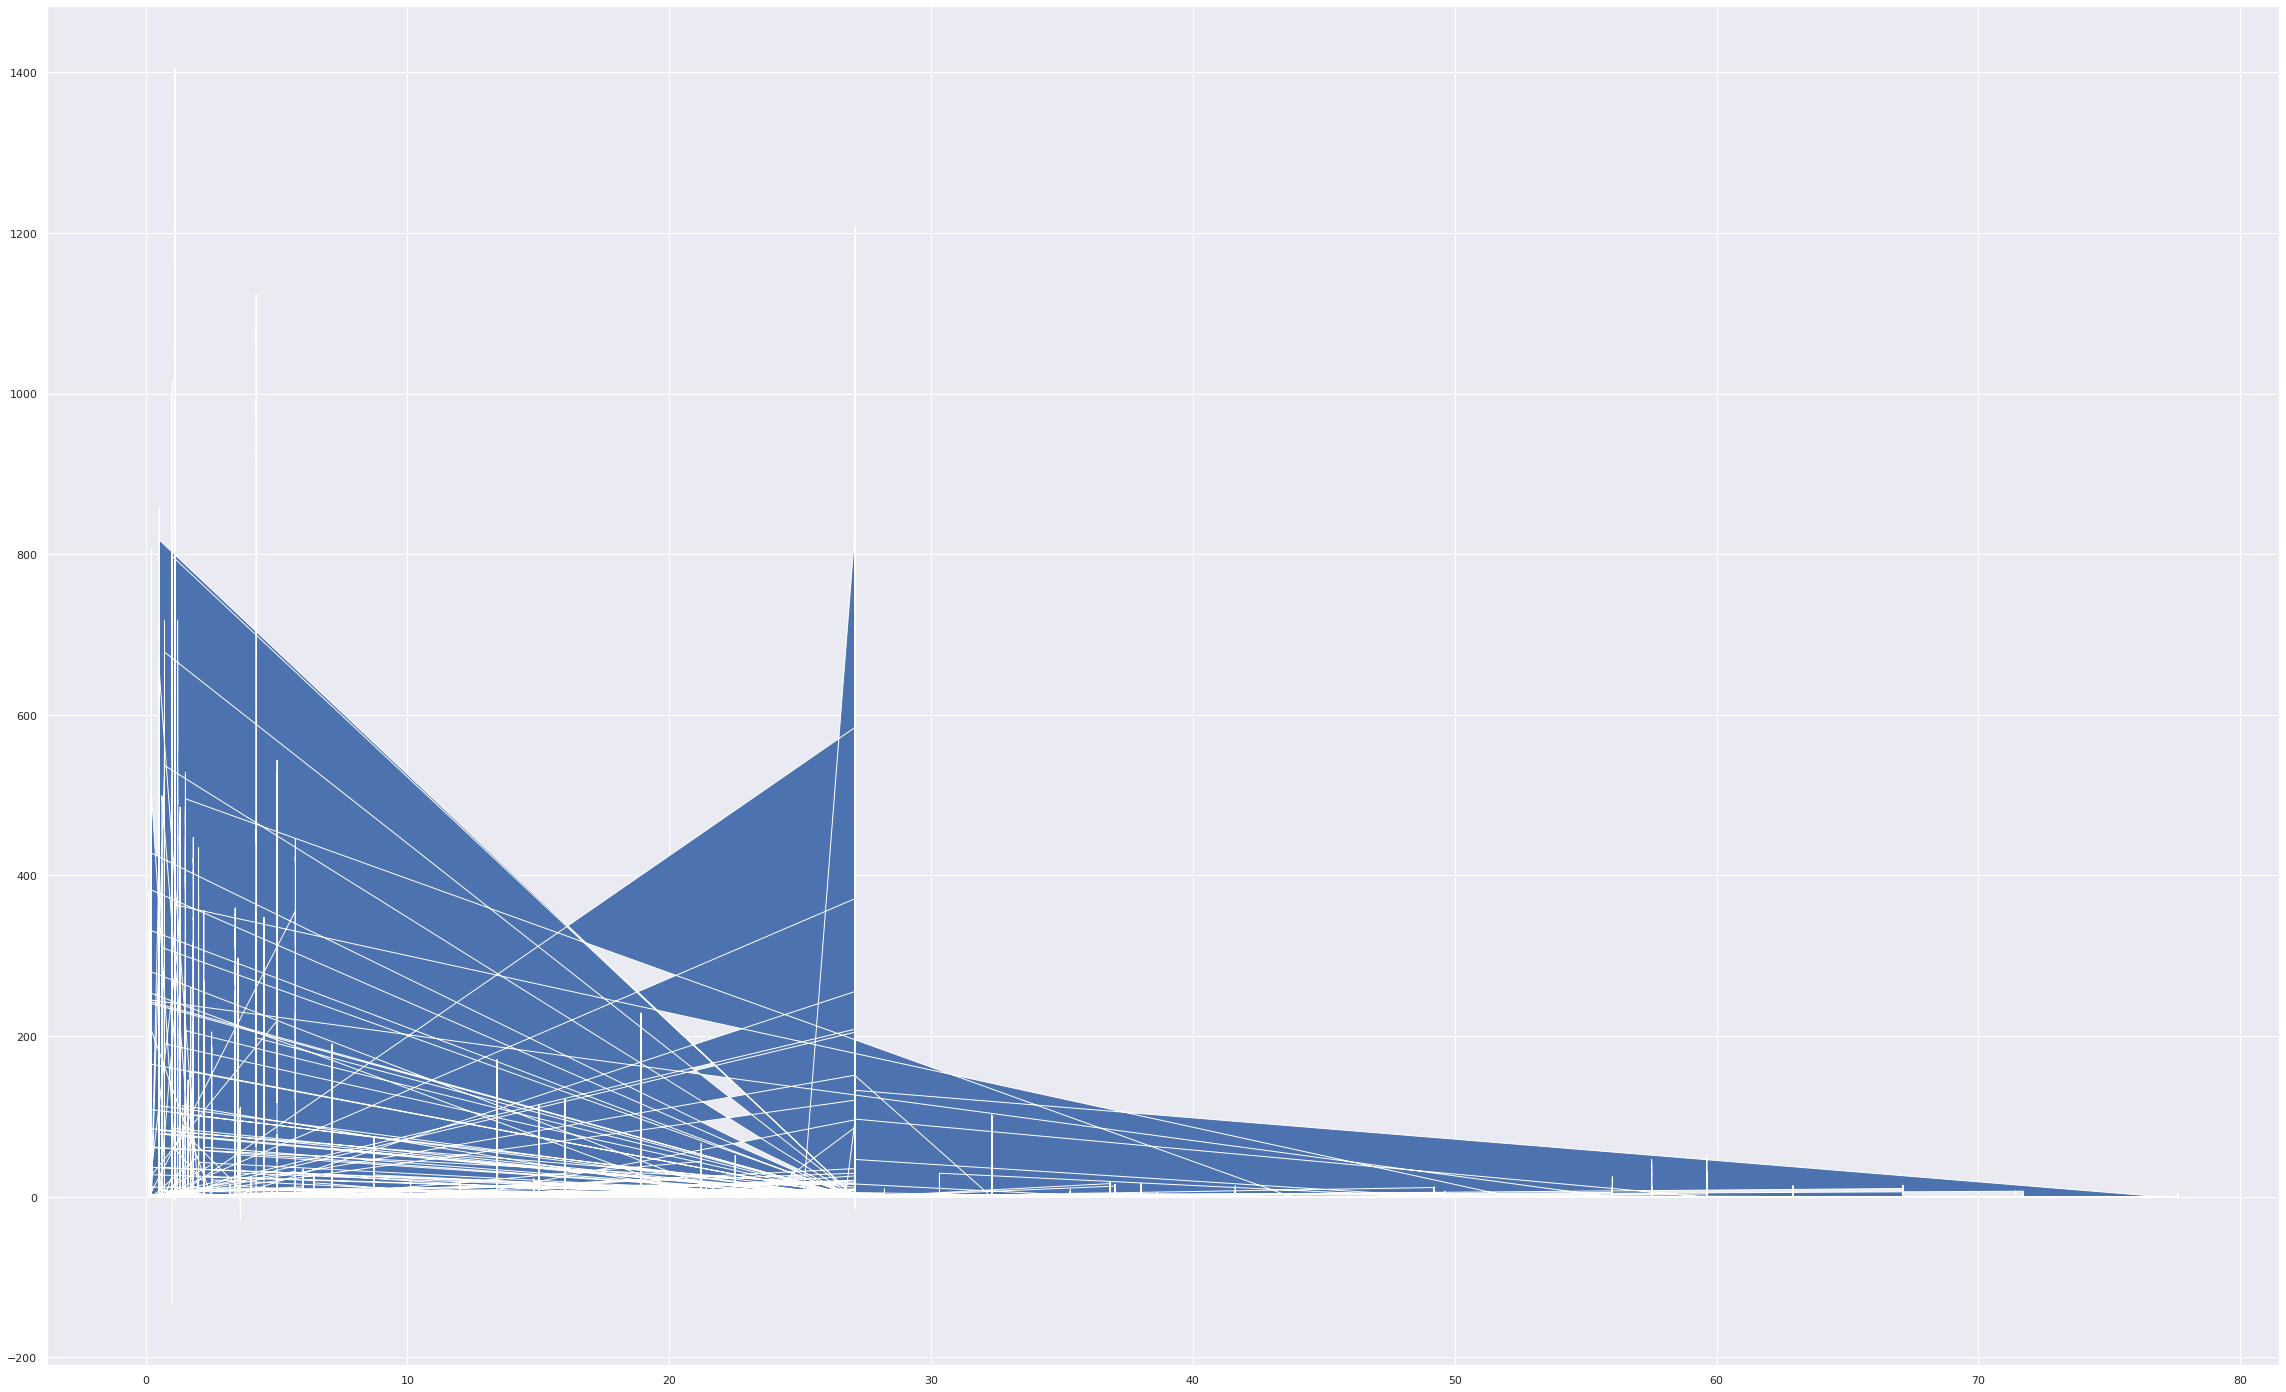

In [ ]:
plt.figure(figsize=(40,25))

plt.fill_between(covid1['extreme_poverty'] , covid1['new_cases_smoothed_per_million'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


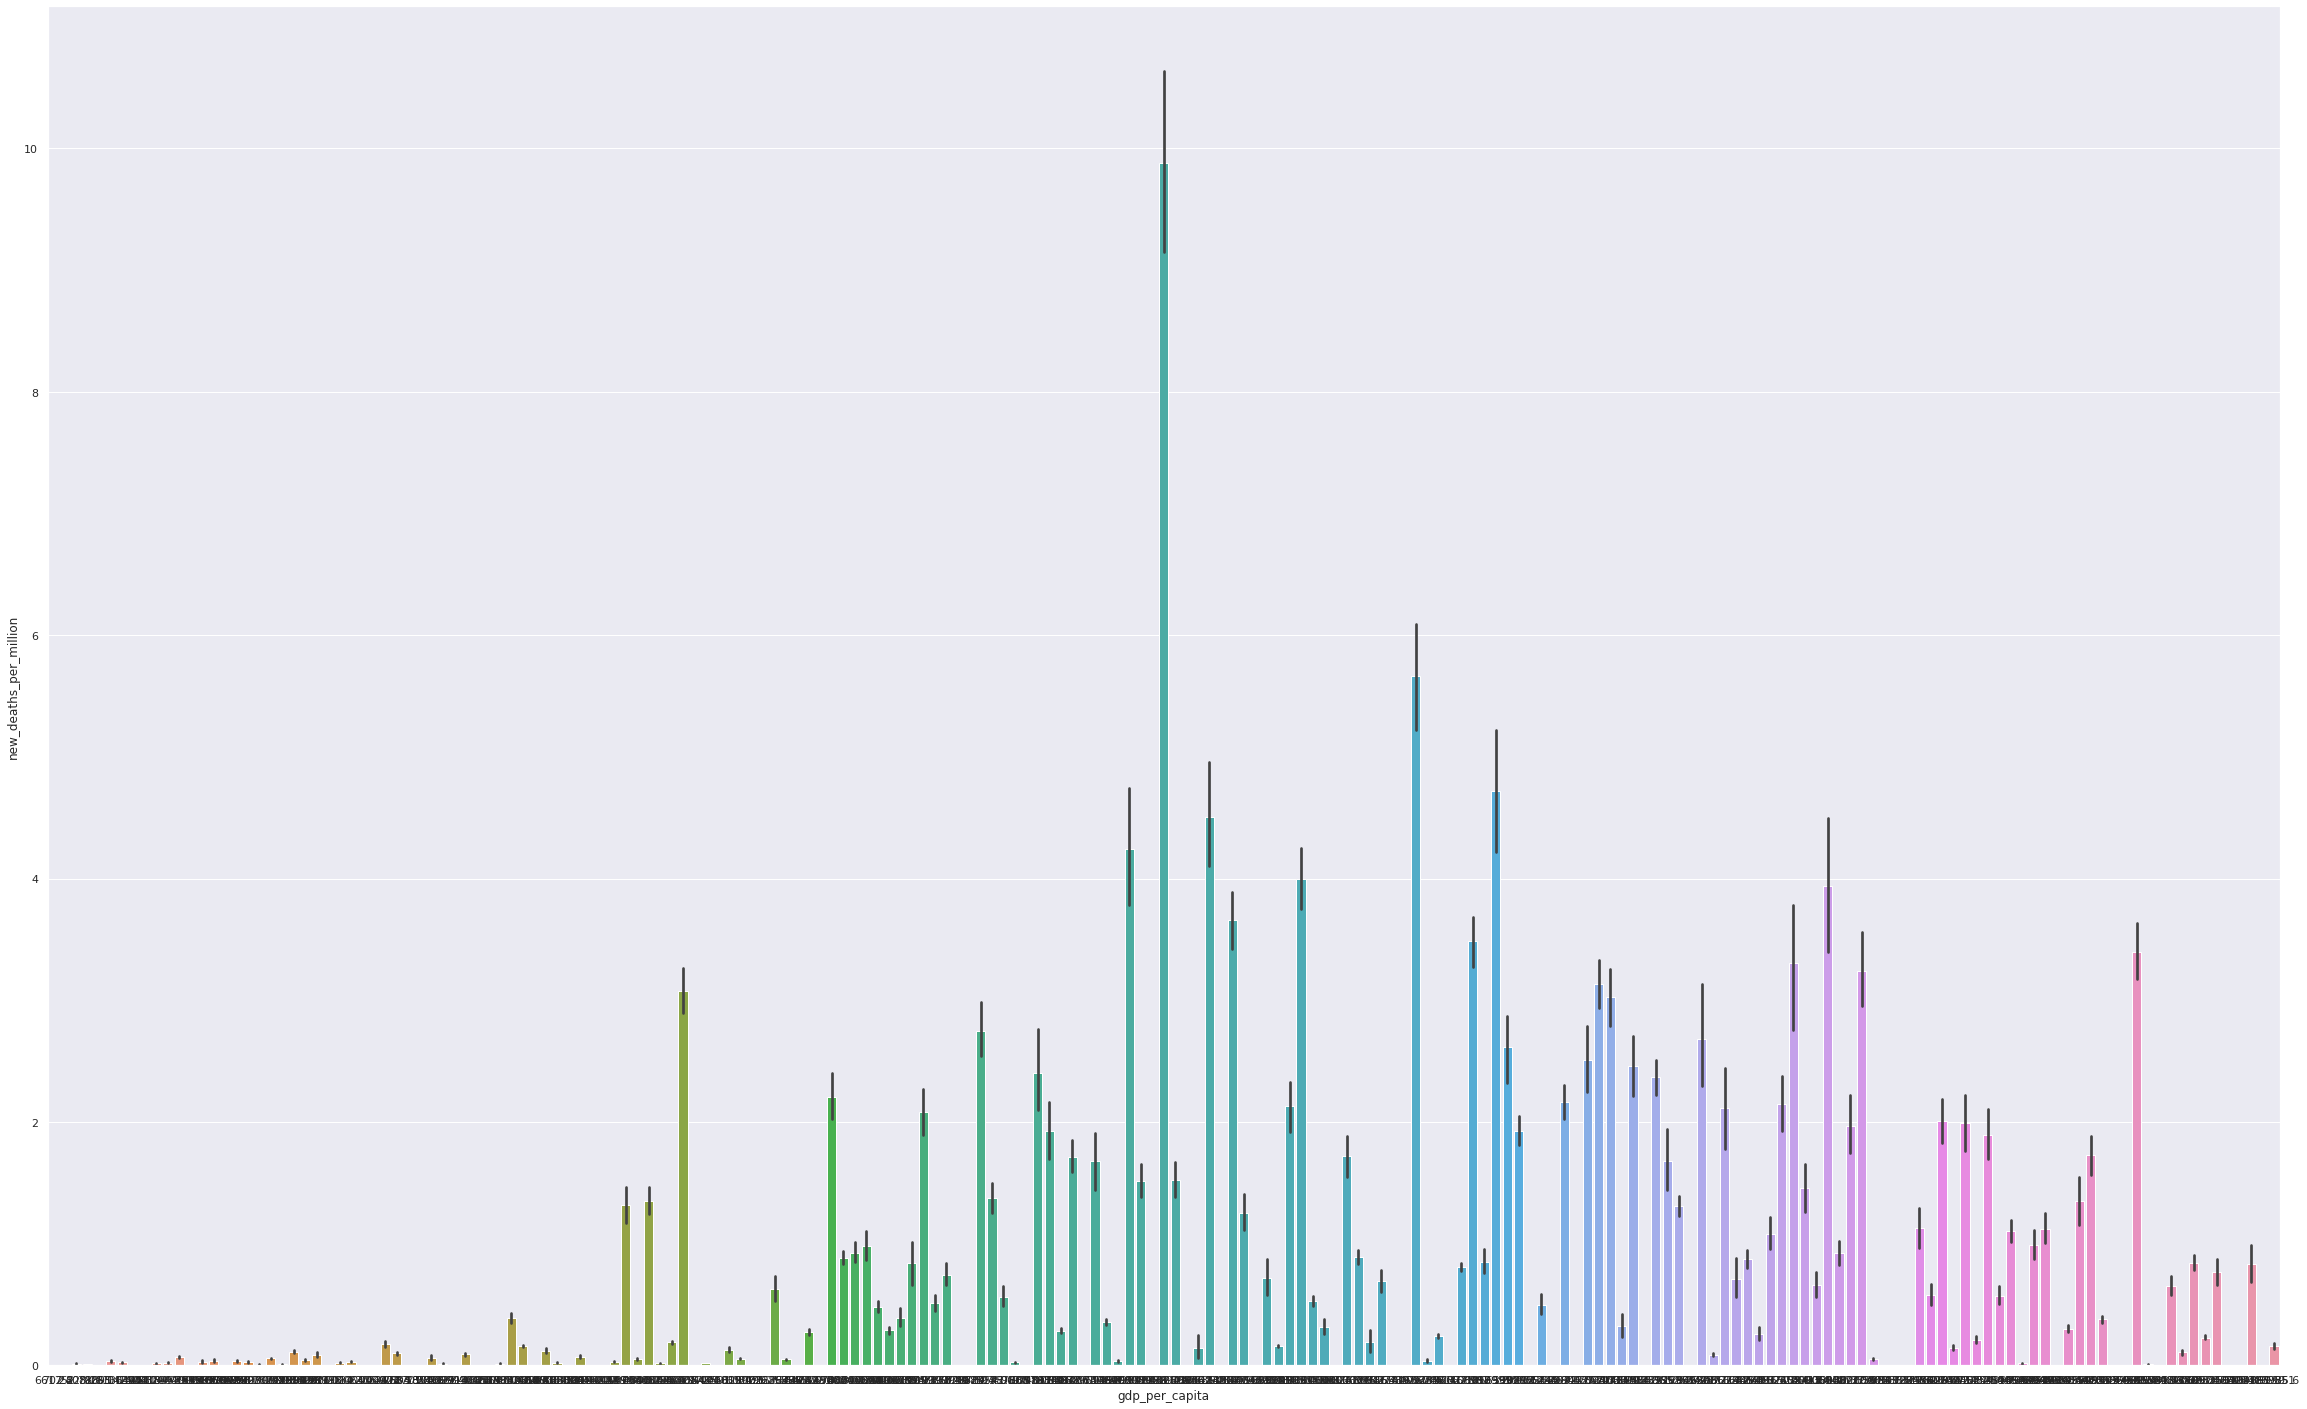

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['gdp_per_capita'] , covid1['new_deaths_per_million'])

## **stringency_index**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


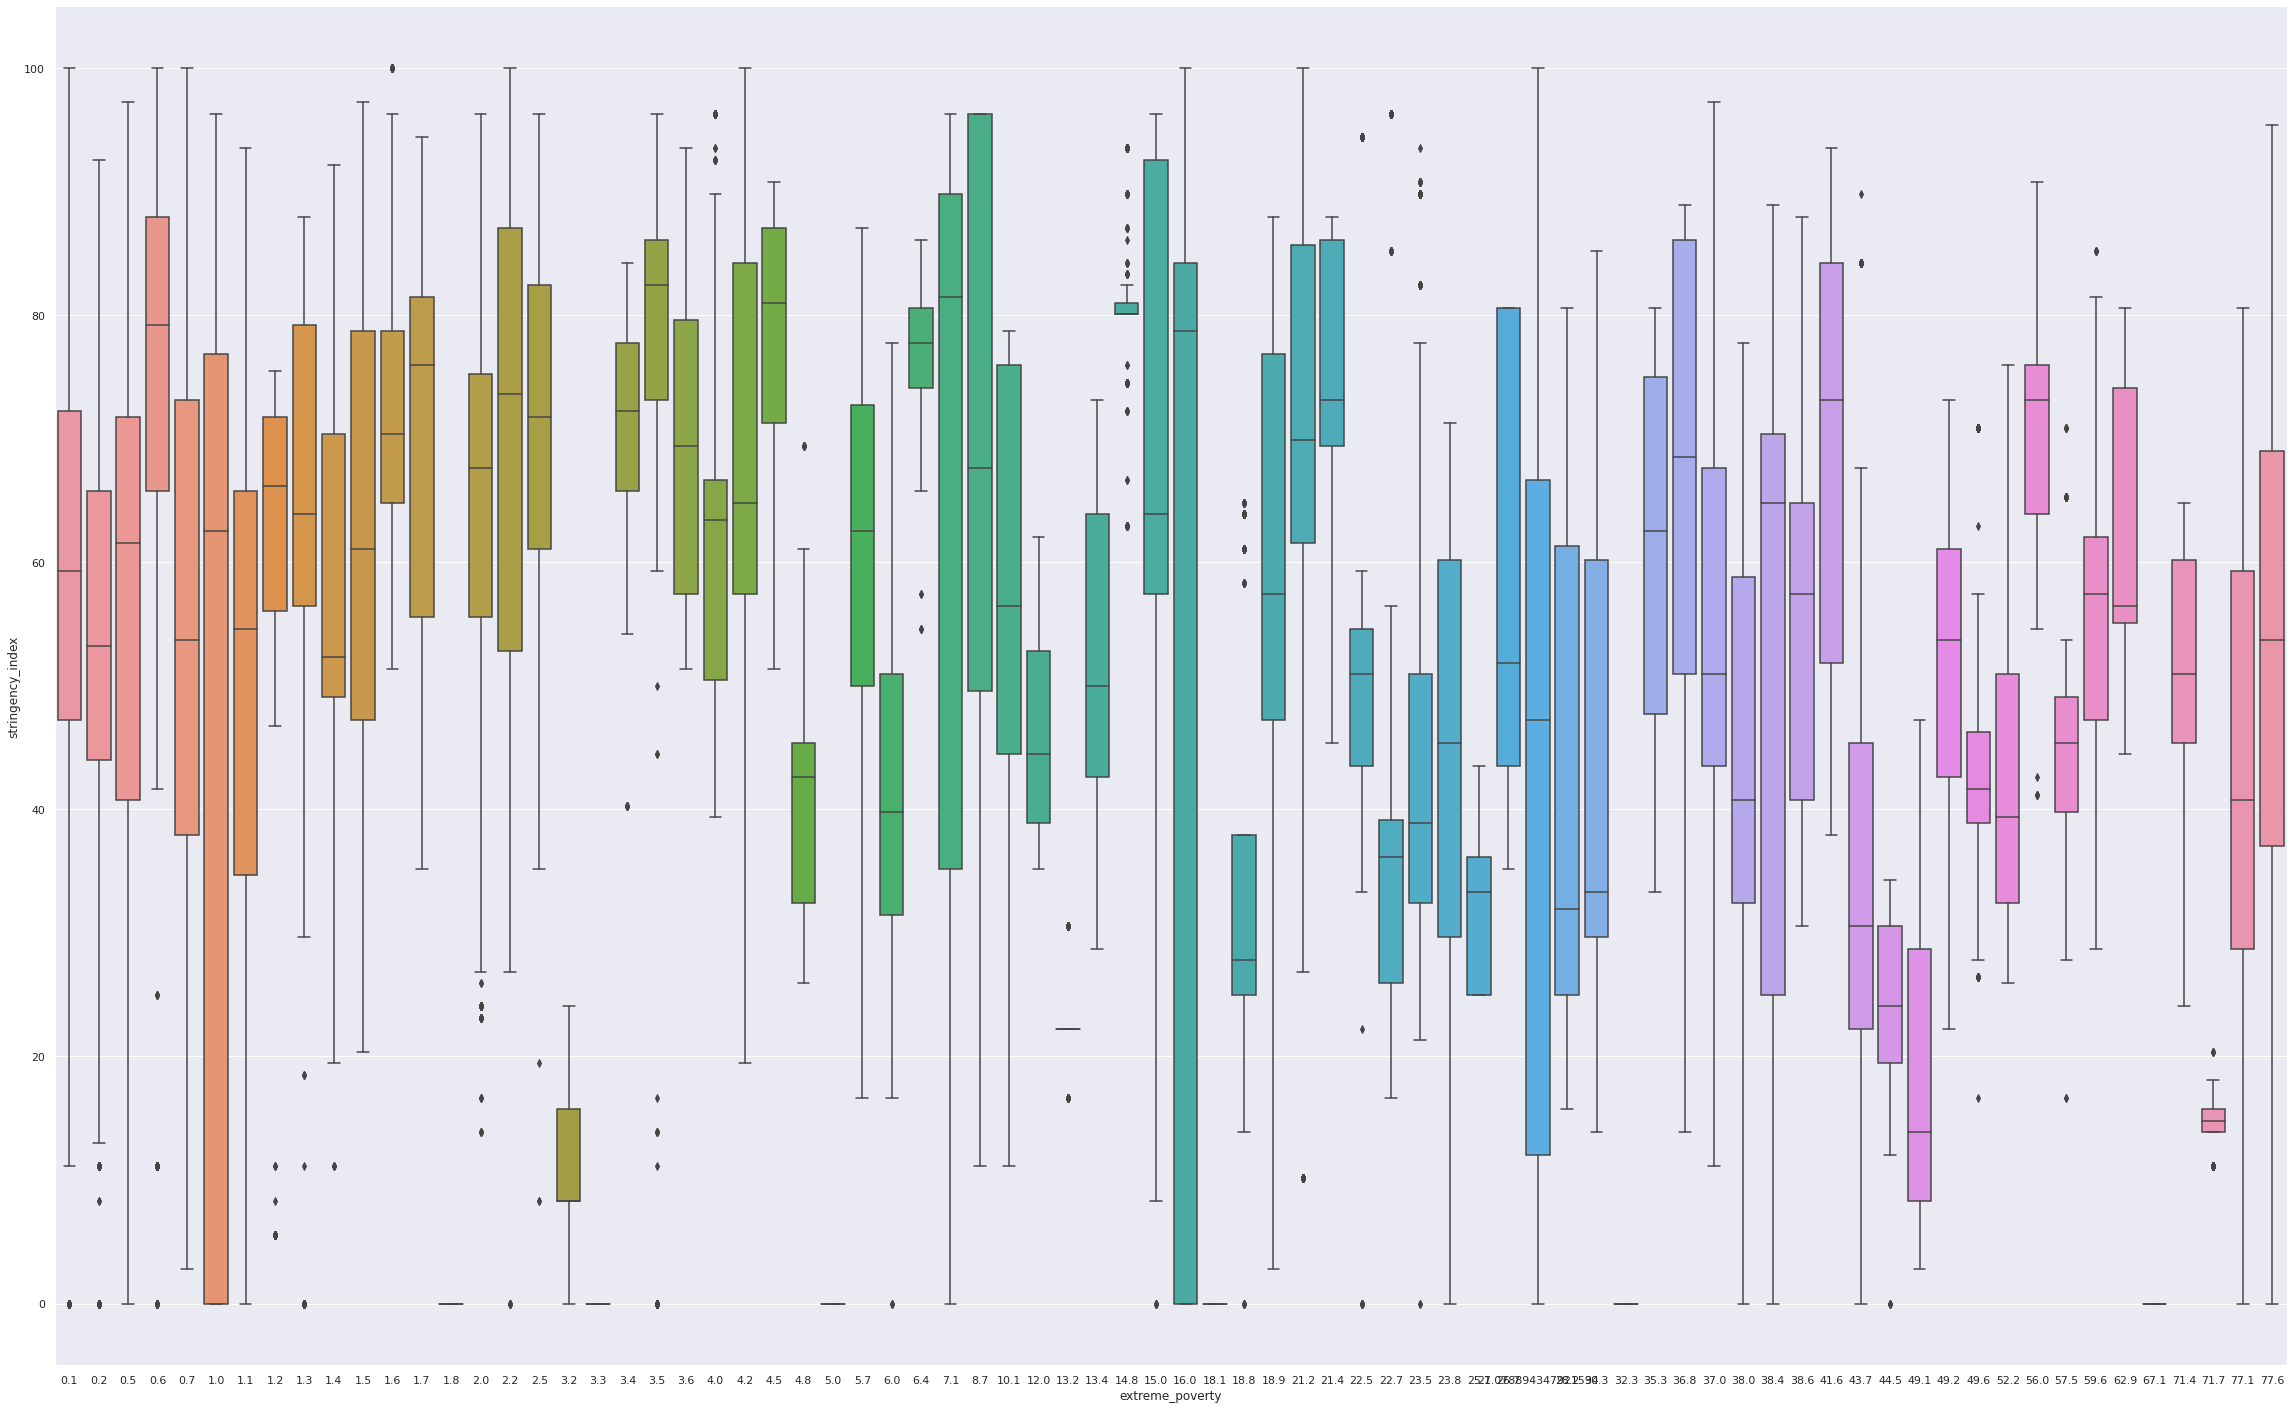

In [ ]:
plt.figure(figsize=(40,25))

sns.boxplot(covid1['extreme_poverty'] , covid1['stringency_index'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


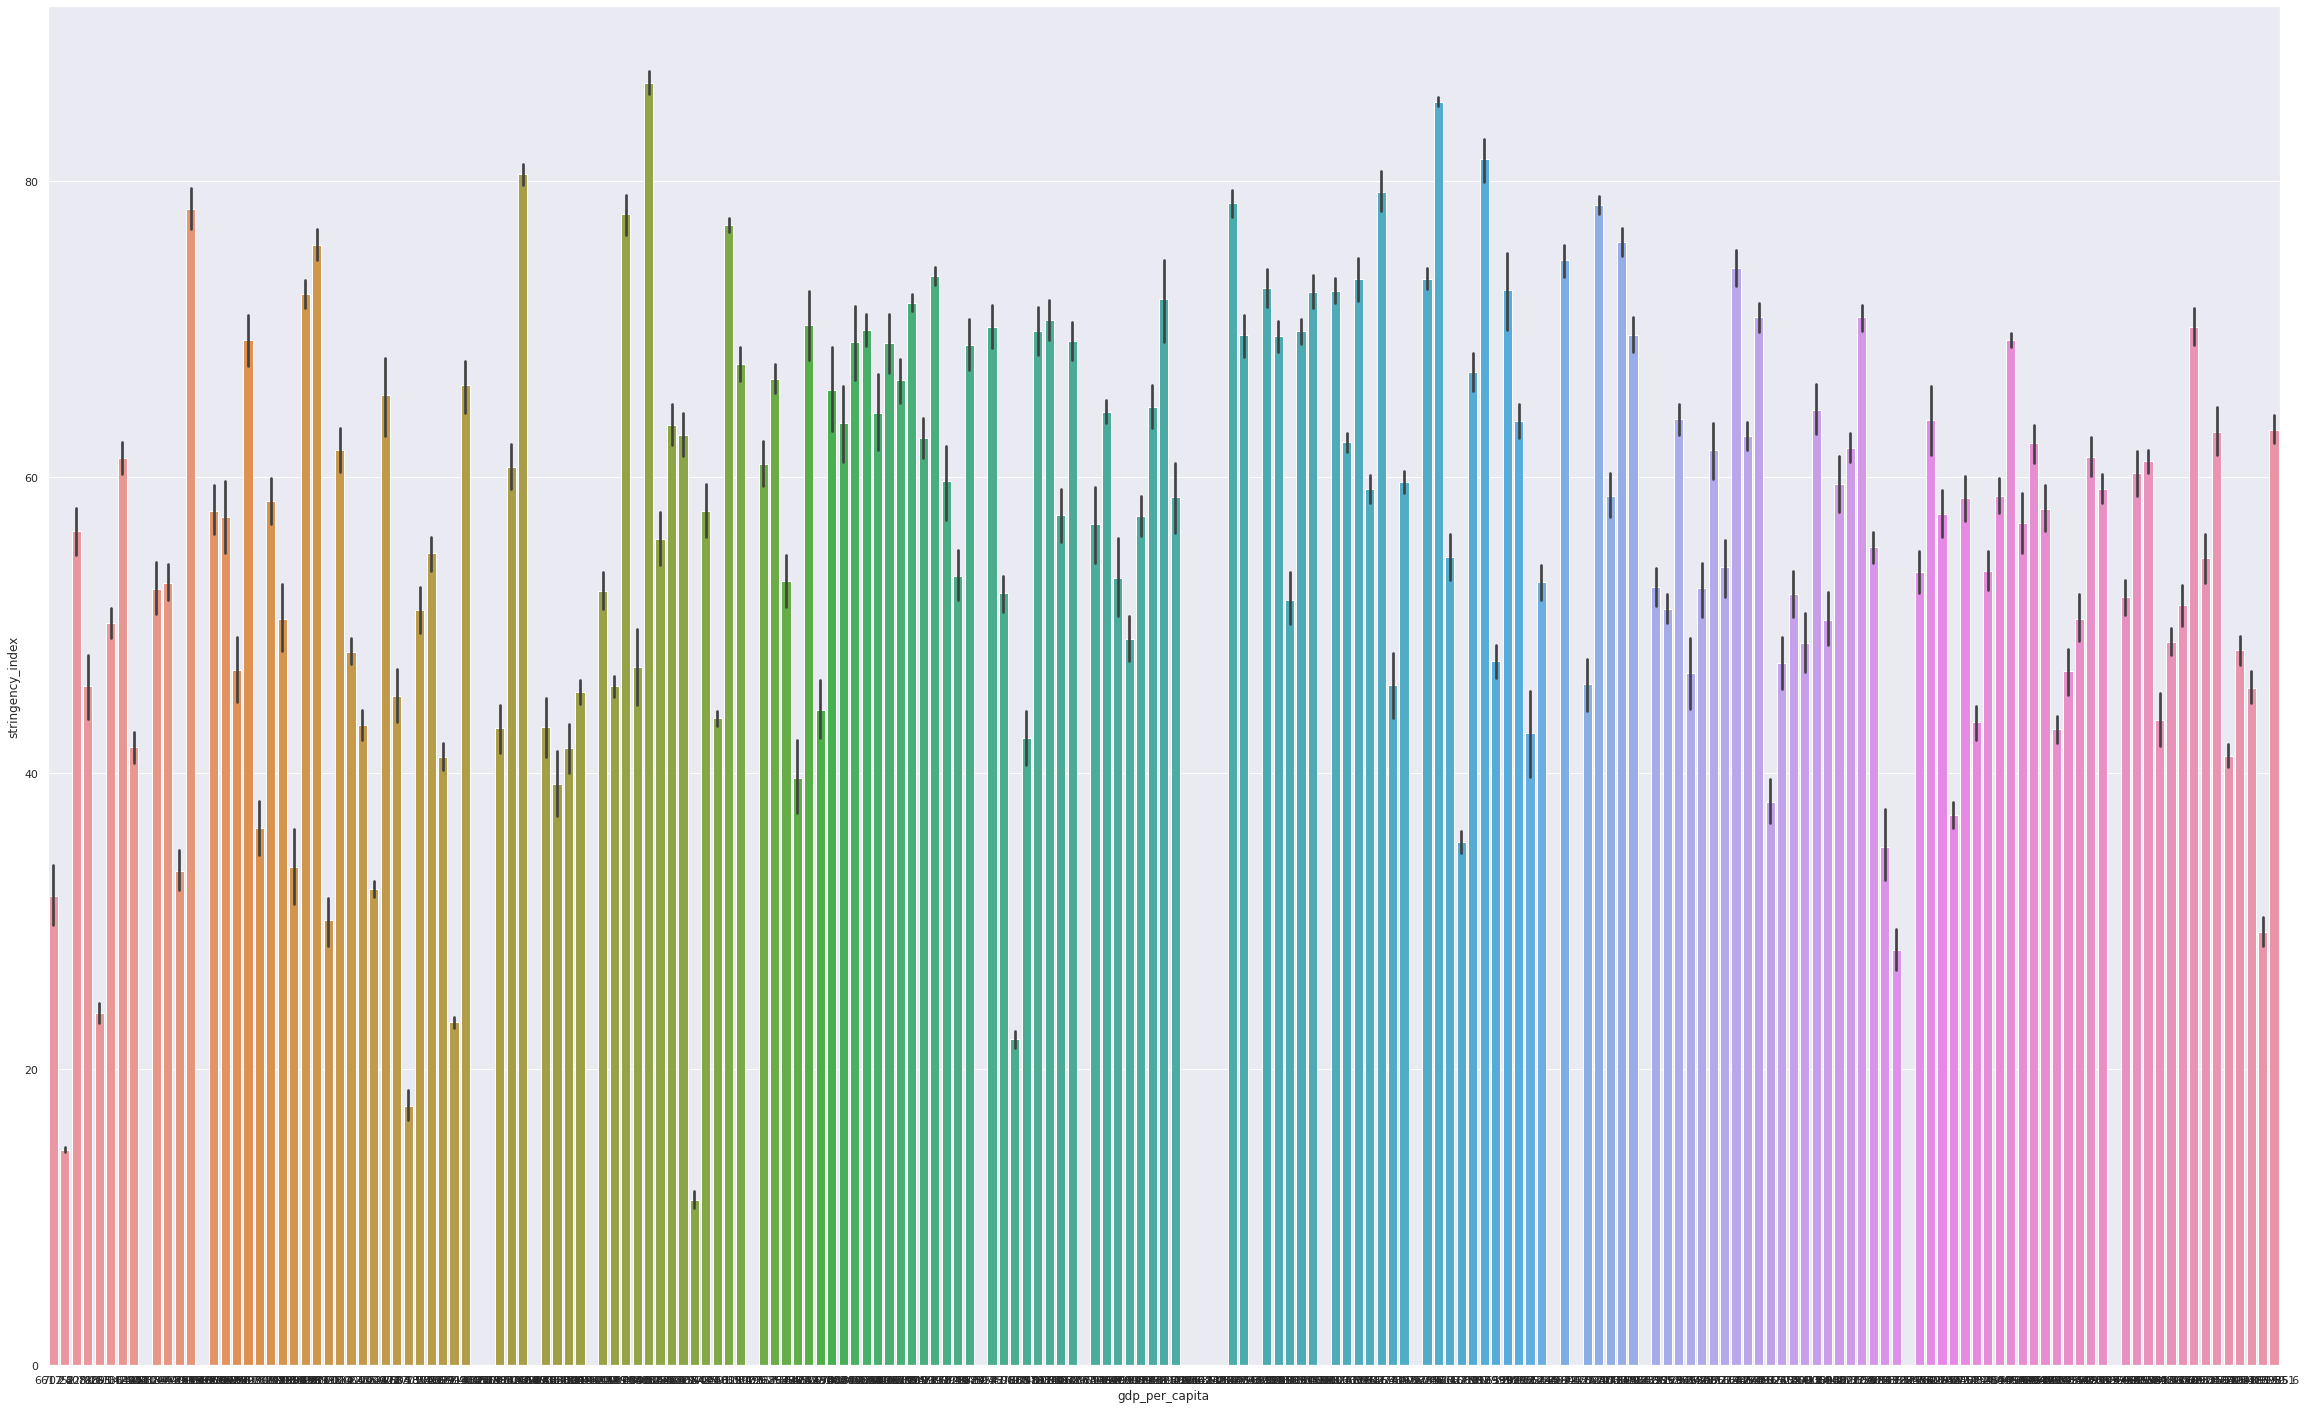

In [ ]:
plt.figure(figsize=(40,25))

sns.barplot(covid1['gdp_per_capita'] , covid1['stringency_index'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


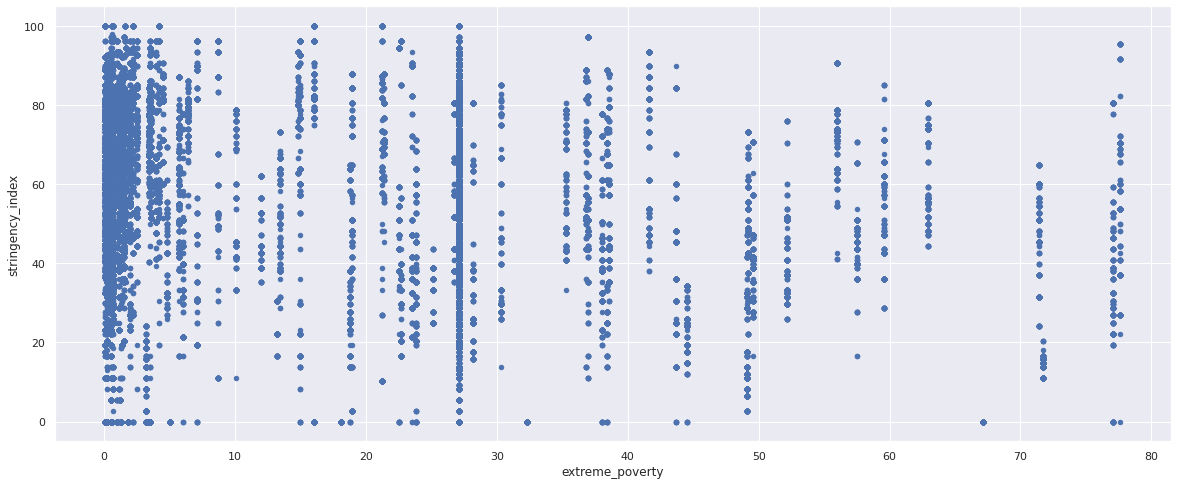

In [ ]:
sns.set(rc= {'figure.figsize':(20,8)})
covid1.plot.scatter(x = 'extreme_poverty', y = 'stringency_index')

# **Median Age**

## **cases and deaths**

In [ ]:
covid1

continent     location       date  ...  human_development_index  index  month
index                                    ...                                       
0          Asia  Afghanistan 2020-02-24  ...                    0.511      0    2.0
1          Asia  Afghanistan 2020-02-25  ...                    0.511      1    2.0
2          Asia  Afghanistan 2020-02-26  ...                    0.511      2    2.0
3          Asia  Afghanistan 2020-02-27  ...                    0.511      3    2.0
4          Asia  Afghanistan 2020-02-28  ...                    0.511      4    2.0
...         ...          ...        ...  ...                      ...    ...    ...
85918    Africa     Zimbabwe 2021-03-20  ...                    0.571  85918   15.0
85919    Africa     Zimbabwe 2021-03-21  ...                    0.571  85919   15.0
85920    Africa     Zimbabwe 2021-03-22  ...                    0.571  85920   15.0
85921    Africa     Zimbabwe 2021-03-23  ...                    0.571  85921   15.0
85922    Africa     Zimbabwe 2021-06-12  ...                    0.571  85922   18.0

[85923 rows x 56 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


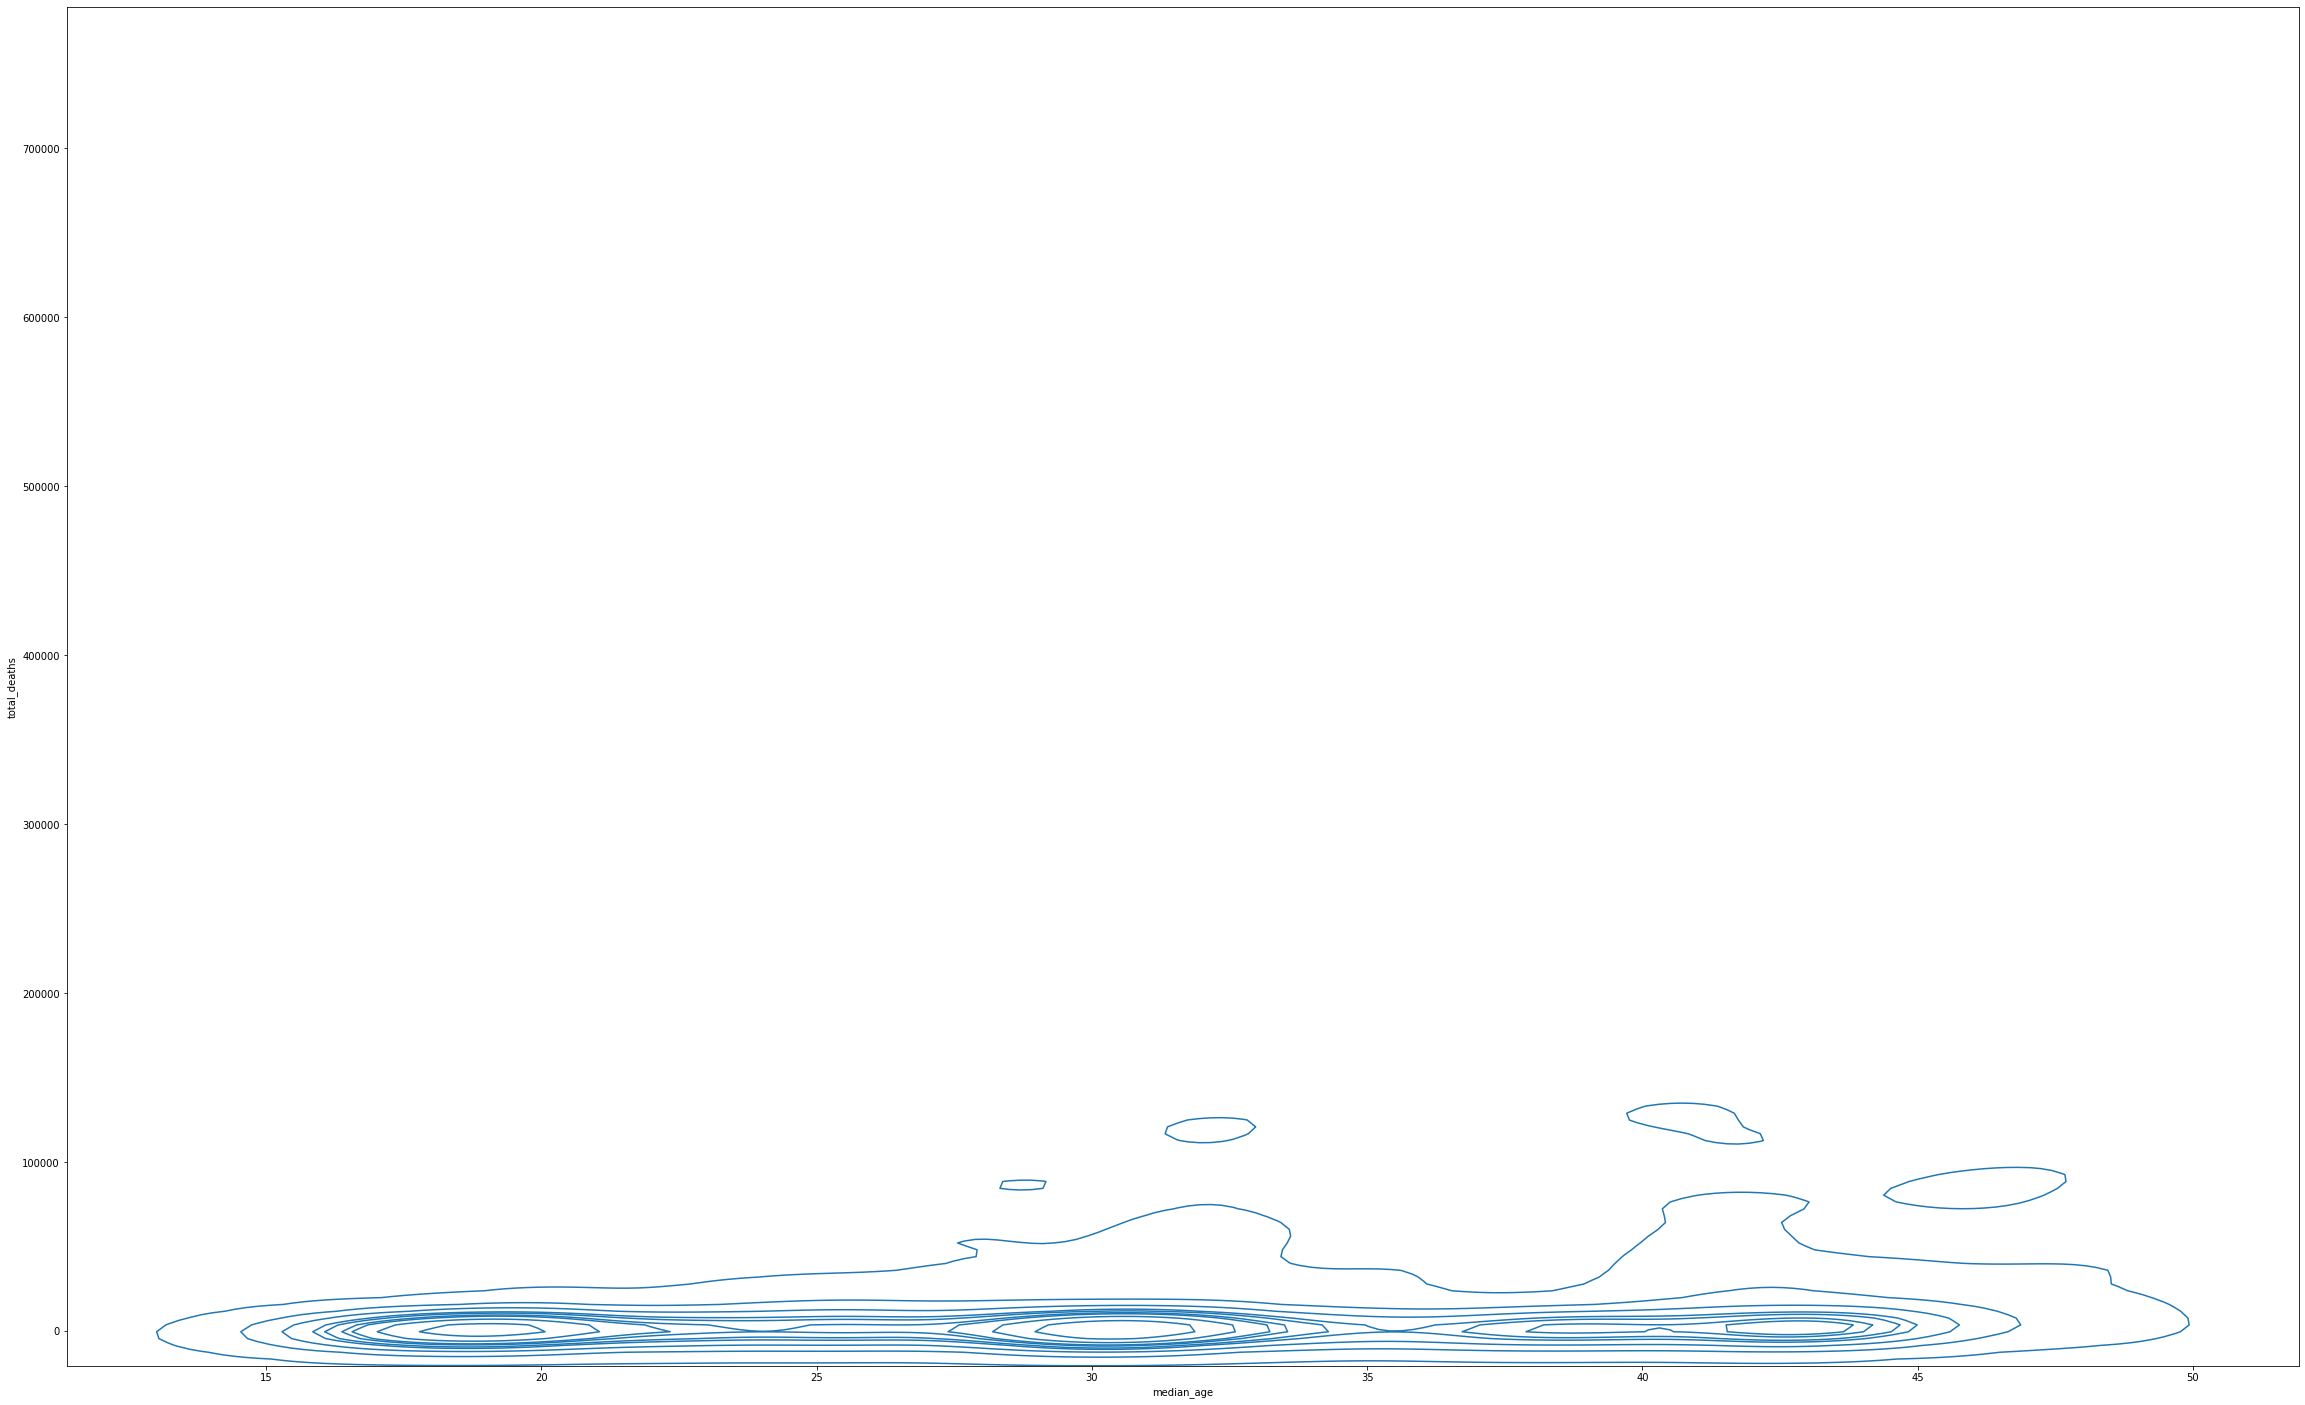

In [ ]:
plt.figure(figsize=(40,25))

sns.kdeplot(covid1['median_age'] , covid1['total_deaths'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2880x1800 with 0 Axes>

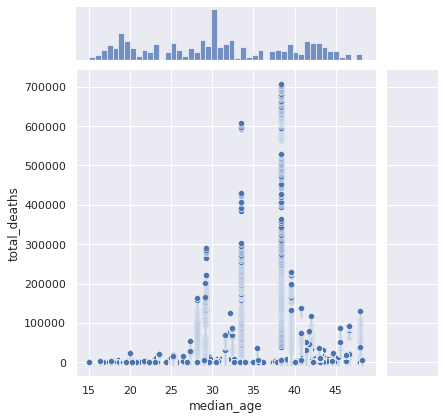

In [ ]:
plt.figure(figsize=(40,25))

sns.jointplot(covid1['median_age'] , covid1['total_deaths'])

In [ ]:
plt.figure(figsize=(40,25))

sns.jointplot(covid1['median_age'] , covid1['new_cases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2880x1800 with 0 Axes>

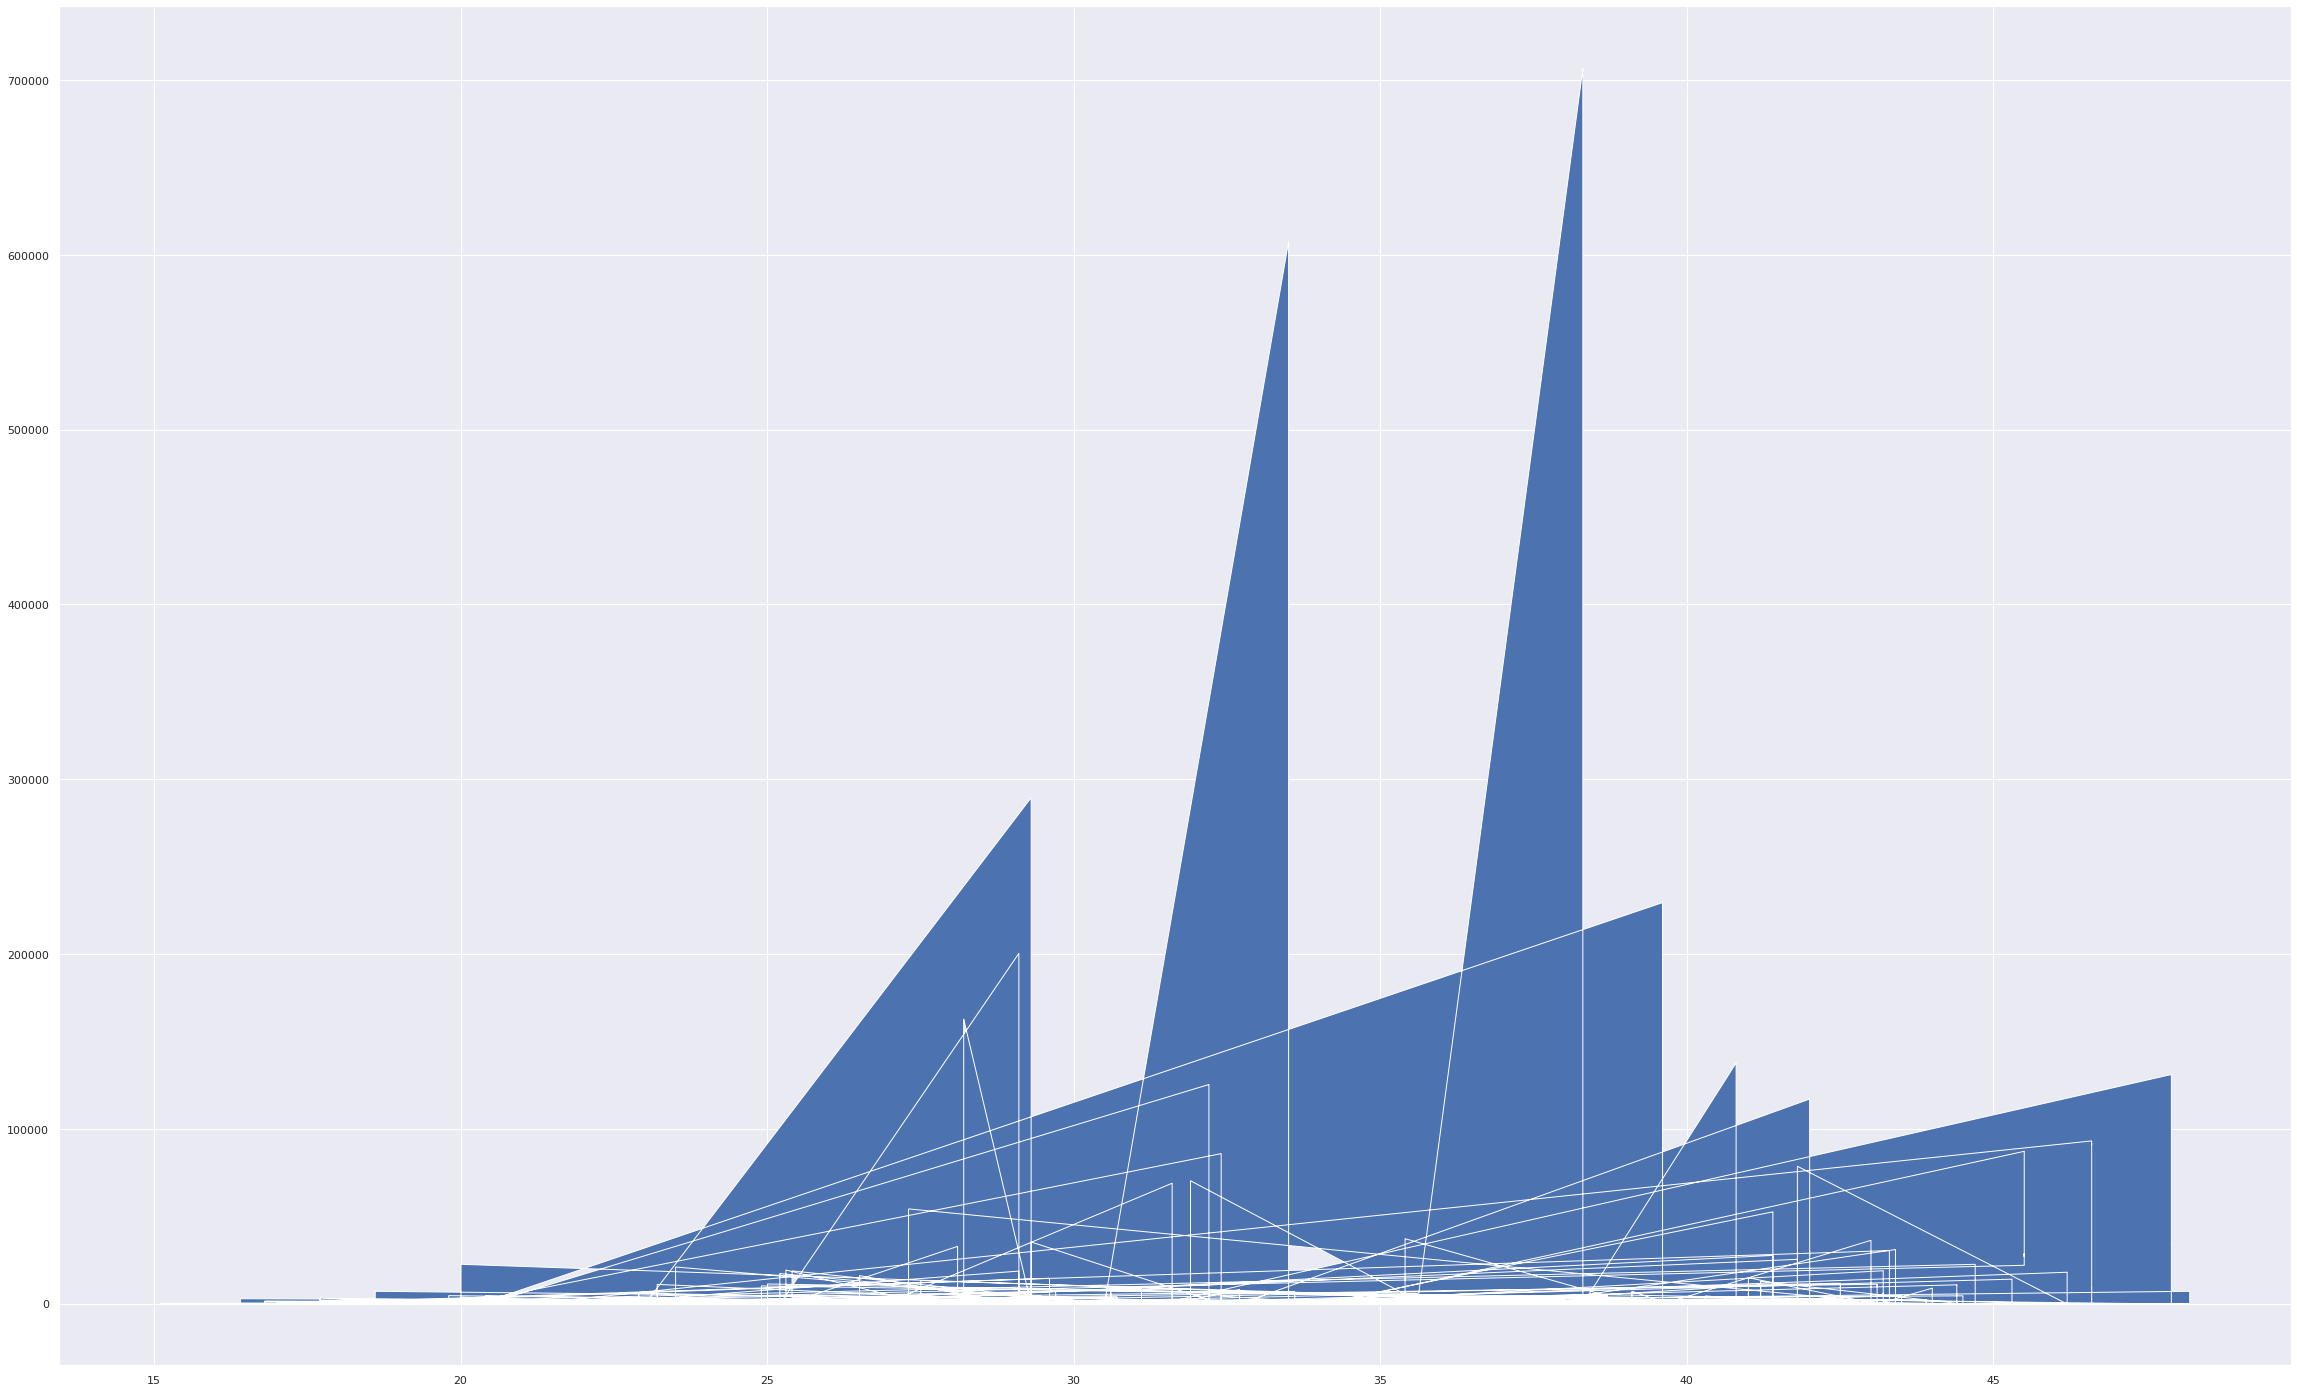

In [ ]:
plt.figure(figsize=(40,25))

plt.fill_between(covid1['median_age'] , covid1['total_deaths'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2880x1800 with 0 Axes>

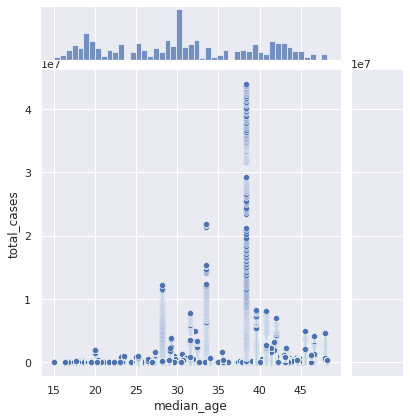

In [ ]:
plt.figure(figsize=(40,25))

sns.jointplot(covid1['median_age'] , covid1['total_cases'])

## **new_vaccinations_smoothed_per_million**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2880x1800 with 0 Axes>

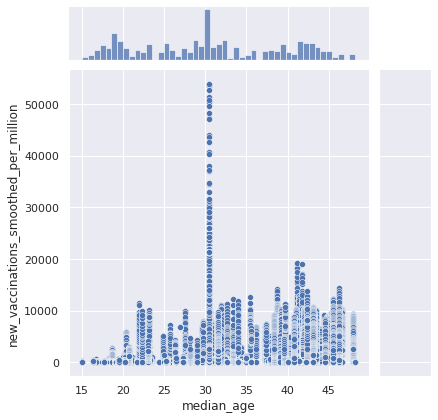

In [ ]:
plt.figure(figsize=(40,25))

sns.jointplot(covid1['median_age'] , covid1['new_vaccinations_smoothed_per_million'])

# **Correlations**

In [87]:
covid1

continent     location       date  ...  human_development_index  index  month
index                                    ...                                       
0          Asia  Afghanistan 2020-02-24  ...                    0.511      0    2.0
1          Asia  Afghanistan 2020-02-25  ...                    0.511      1    2.0
2          Asia  Afghanistan 2020-02-26  ...                    0.511      2    2.0
3          Asia  Afghanistan 2020-02-27  ...                    0.511      3    2.0
4          Asia  Afghanistan 2020-02-28  ...                    0.511      4    2.0
...         ...          ...        ...  ...                      ...    ...    ...
85918    Africa     Zimbabwe 2021-03-20  ...                    0.571  85918   15.0
85919    Africa     Zimbabwe 2021-03-21  ...                    0.571  85919   15.0
85920    Africa     Zimbabwe 2021-03-22  ...                    0.571  85920   15.0
85921    Africa     Zimbabwe 2021-03-23  ...                    0.571  85921   15.0
85922    Africa     Zimbabwe 2021-06-12  ...                    0.571  85922   18.0

[85923 rows x 56 columns]

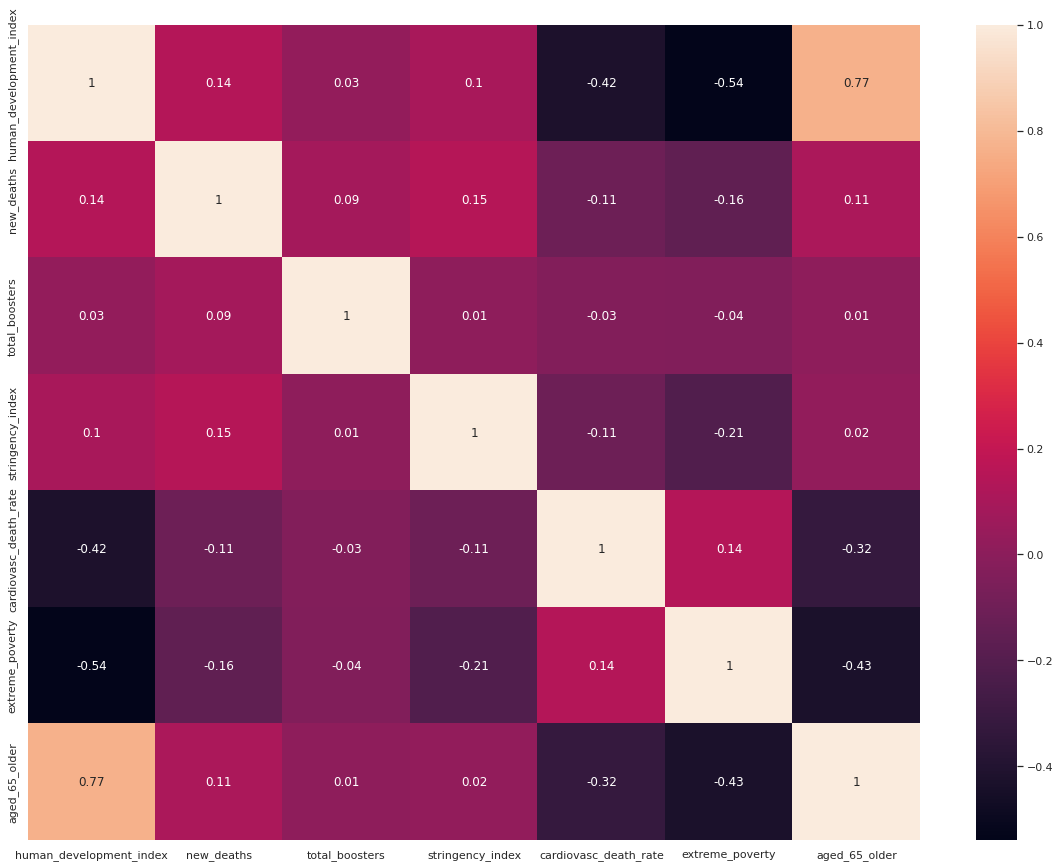

In [94]:
plt.figure(figsize=(20,15))
correlation_matrix = covid1[["human_development_index","new_deaths","total_boosters","stringency_index"
                          ,"cardiovasc_death_rate",'extreme_poverty','aged_65_older']].corr().round(2)
sns.heatmap(data=correlation_matrix  , annot=True)

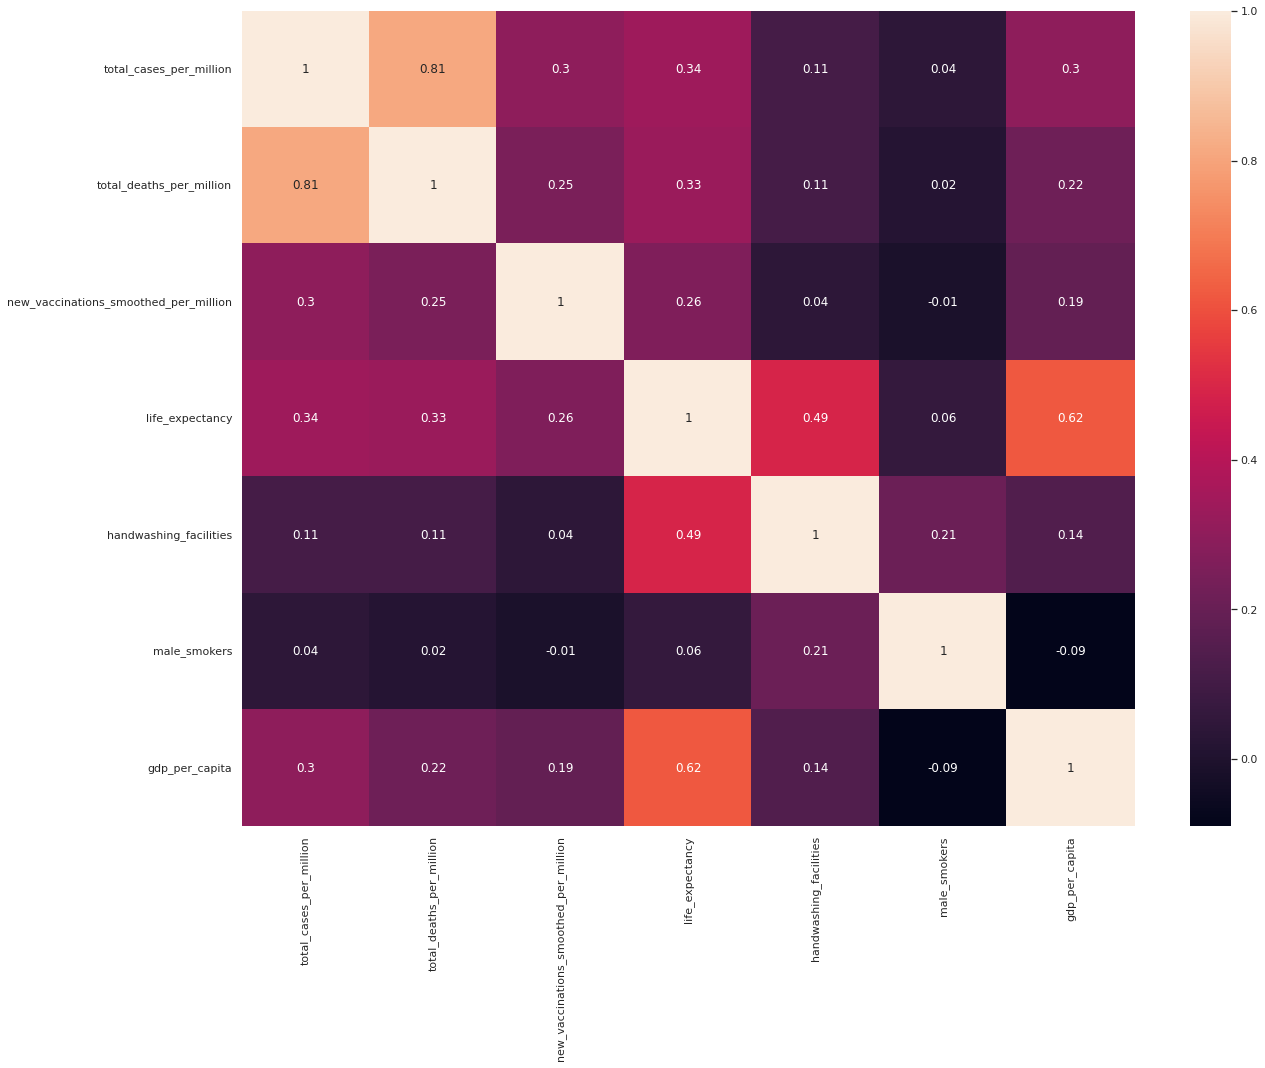

In [89]:
plt.figure(figsize=(20,15))
correlation_matrix = covid1[["total_cases_per_million","total_deaths_per_million","new_vaccinations_smoothed_per_million",
                             "life_expectancy","handwashing_facilities",'male_smokers','gdp_per_capita']].corr().round(2)
sns.heatmap(data=correlation_matrix  , annot=True)

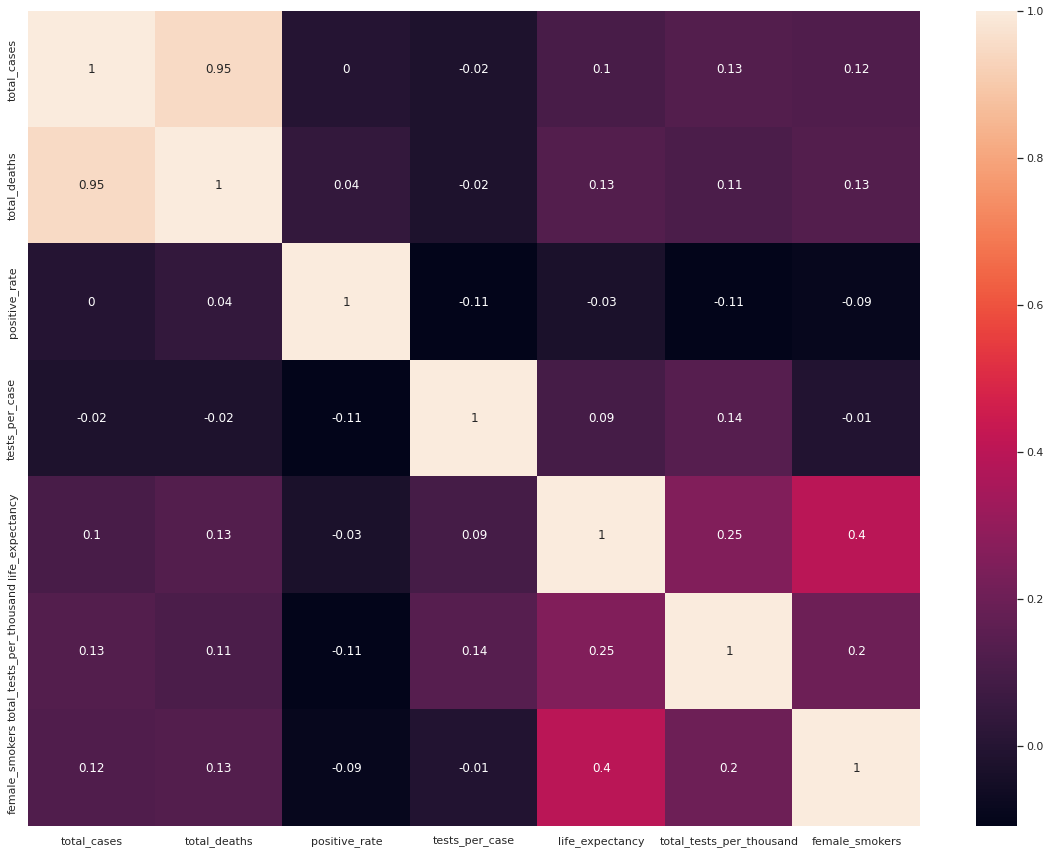

In [90]:
plt.figure(figsize=(20,15))
correlation_matrix = covid1[["total_cases","total_deaths","positive_rate" , 'tests_per_case'
                          ,"life_expectancy","total_tests_per_thousand",'female_smokers']].corr().round(2)
sns.heatmap(data=correlation_matrix  , annot=True)

# **Donuts**

## **total_deaths**

In [95]:
covid1

continent     location       date  ...  human_development_index  index  month
index                                    ...                                       
0          Asia  Afghanistan 2020-02-24  ...                    0.511      0    2.0
1          Asia  Afghanistan 2020-02-25  ...                    0.511      1    2.0
2          Asia  Afghanistan 2020-02-26  ...                    0.511      2    2.0
3          Asia  Afghanistan 2020-02-27  ...                    0.511      3    2.0
4          Asia  Afghanistan 2020-02-28  ...                    0.511      4    2.0
...         ...          ...        ...  ...                      ...    ...    ...
85918    Africa     Zimbabwe 2021-03-20  ...                    0.571  85918   15.0
85919    Africa     Zimbabwe 2021-03-21  ...                    0.571  85919   15.0
85920    Africa     Zimbabwe 2021-03-22  ...                    0.571  85920   15.0
85921    Africa     Zimbabwe 2021-03-23  ...                    0.571  85921   15.0
85922    Africa     Zimbabwe 2021-06-12  ...                    0.571  85922   18.0

[85923 rows x 56 columns]

In [134]:
sum = np.zeros(6)
i = 0
continents = covid1['continent'].unique()
for con in continents:
  tempcov = covid1[covid1['continent']==con]
  locations = tempcov['location'].unique()
  for loc in locations:
    cov = covid1[covid1['location']==loc]
    l = len(cov)
    sum[i] = cov.loc[cov.index[l-1],'total_deaths'] + sum[i]
  i = i + 1

In [135]:
sum

array([5.595910e+05, 1.258146e+06, 1.569340e+05, 1.066972e+06,
       1.122408e+06, 1.182000e+03])

In [136]:
s = sum[0] + sum[1] + sum[2] + sum[3] + sum[4] + sum[5]
s

4165233.0

In [137]:
continents

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [148]:
asiadeath = 100 * (sum[0] / s)
europedeath = 100 * (sum[1] / s)
africadeath = 100 * (sum[2] / s)
Namericadeath = 100 * (sum[3] / s)
Samericadeath = 100 * (sum[4] / s)
oceaniadeath = 100 * (sum[5] / s)

In [149]:
asiadeath

13.434806648271538

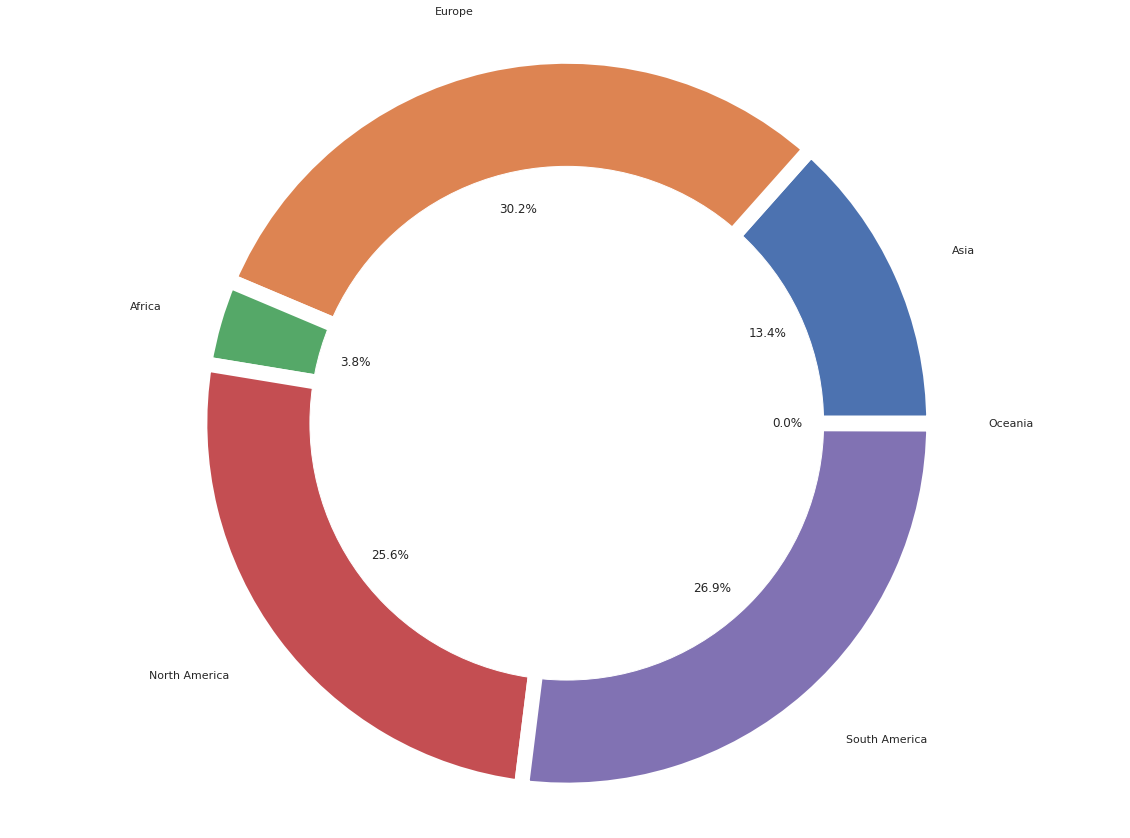

In [153]:
names='Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania',
values=[asiadeath, europedeath, africadeath, Namericadeath, Samericadeath, oceaniadeath]


my_circle = plt.Circle( (0,0), 0.7, color='white')

fig1, ax1 = plt.subplots(figsize=(20,15))
ax1.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 15, 'edgecolor' : 'white' }, )
p = plt.gcf()
p.gca().add_artist(my_circle)
ax1.axis('equal')
plt.show()

## **total_tests_per_thousand**

In [154]:
sum = np.zeros(6)
i = 0
continents = covid1['continent'].unique()
for con in continents:
  tempcov = covid1[covid1['continent']==con]
  locations = tempcov['location'].unique()
  for loc in locations:
    cov = covid1[covid1['location']==loc]
    l = len(cov)
    sum[i] = cov.loc[cov.index[l-1],'total_tests_per_thousand'] + sum[i]
  i = i + 1

In [155]:
s = sum[0] + sum[1] + sum[2] + sum[3] + sum[4] + sum[5]
s

139915.06099999996

In [156]:
asiatest = 100 * (sum[0] / s)
europetest = 100 * (sum[1] / s)
africatest = 100 * (sum[2] / s)
Namericatest = 100 * (sum[3] / s)
Samericatest = 100 * (sum[4] / s)
oceaniatest = 100 * (sum[5] / s)

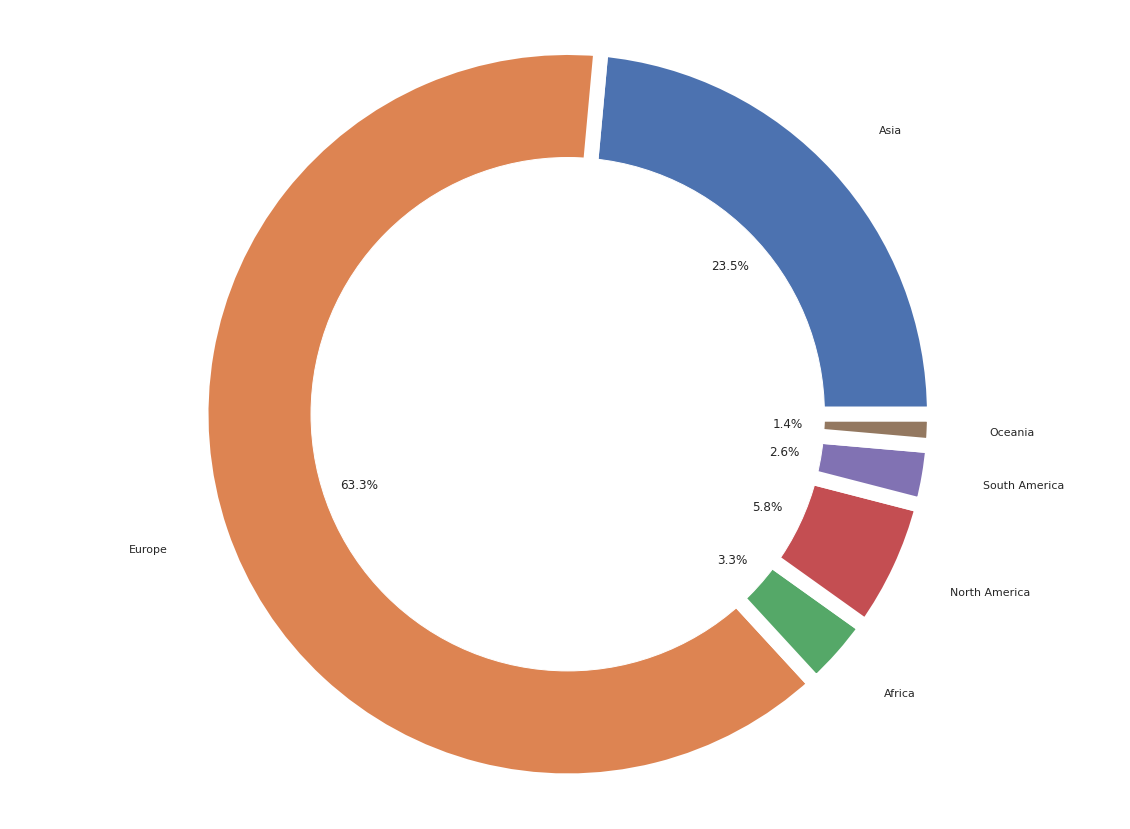

In [157]:
names='Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania',
values=[asiatest, europetest, africatest, Namericatest, Samericatest, oceaniatest]


my_circle = plt.Circle( (0,0), 0.7, color='white')

fig1, ax1 = plt.subplots(figsize=(20,15))
ax1.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 15, 'edgecolor' : 'white' }, )
p = plt.gcf()
p.gca().add_artist(my_circle)
ax1.axis('equal')
plt.show()

# **excess_mortality**

## **Creating Dataframe**

In [158]:
temp = covid_em['excess_mortality'].notna()
covid_em = covid_em[temp]
covid_em

continent  ... excess_mortality_cumulative_per_million
1275      Europe  ...                              -66.412942
1306      Europe  ...                              -57.432576
1336      Europe  ...                              -33.067241
1367      Europe  ...                                8.005753
1397      Europe  ...                               65.438329
...          ...  ...                                     ...
128172      Asia  ...                              595.360087
128202      Asia  ...                              664.231379
128233      Asia  ...                              770.208068
128264      Asia  ...                              919.767095
128294      Asia  ...                             1110.450877

[4656 rows x 66 columns]

In [159]:
covid_em.drop(columns=['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million',
       'weekly_icu_admissions', 'weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million'], axis=1, inplace=True)
covid_em.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4656 entries, 1275 to 128294
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   continent                                   4656 non-null   object 
 1   location                                    4656 non-null   object 
 2   date                                        4656 non-null   object 
 3   total_cases                                 4656 non-null   float64
 4   new_cases                                   4656 non-null   float64
 5   new_cases_smoothed                          4656 non-null   float64
 6   total_deaths                                4656 non-null   float64
 7   new_deaths                                  4656 non-null   float64
 8   new_deaths_smoothed                         4656 non-null   float64
 9   total_cases_per_million                     4656 non-null   float64
 10  new_cas

## **Realations**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


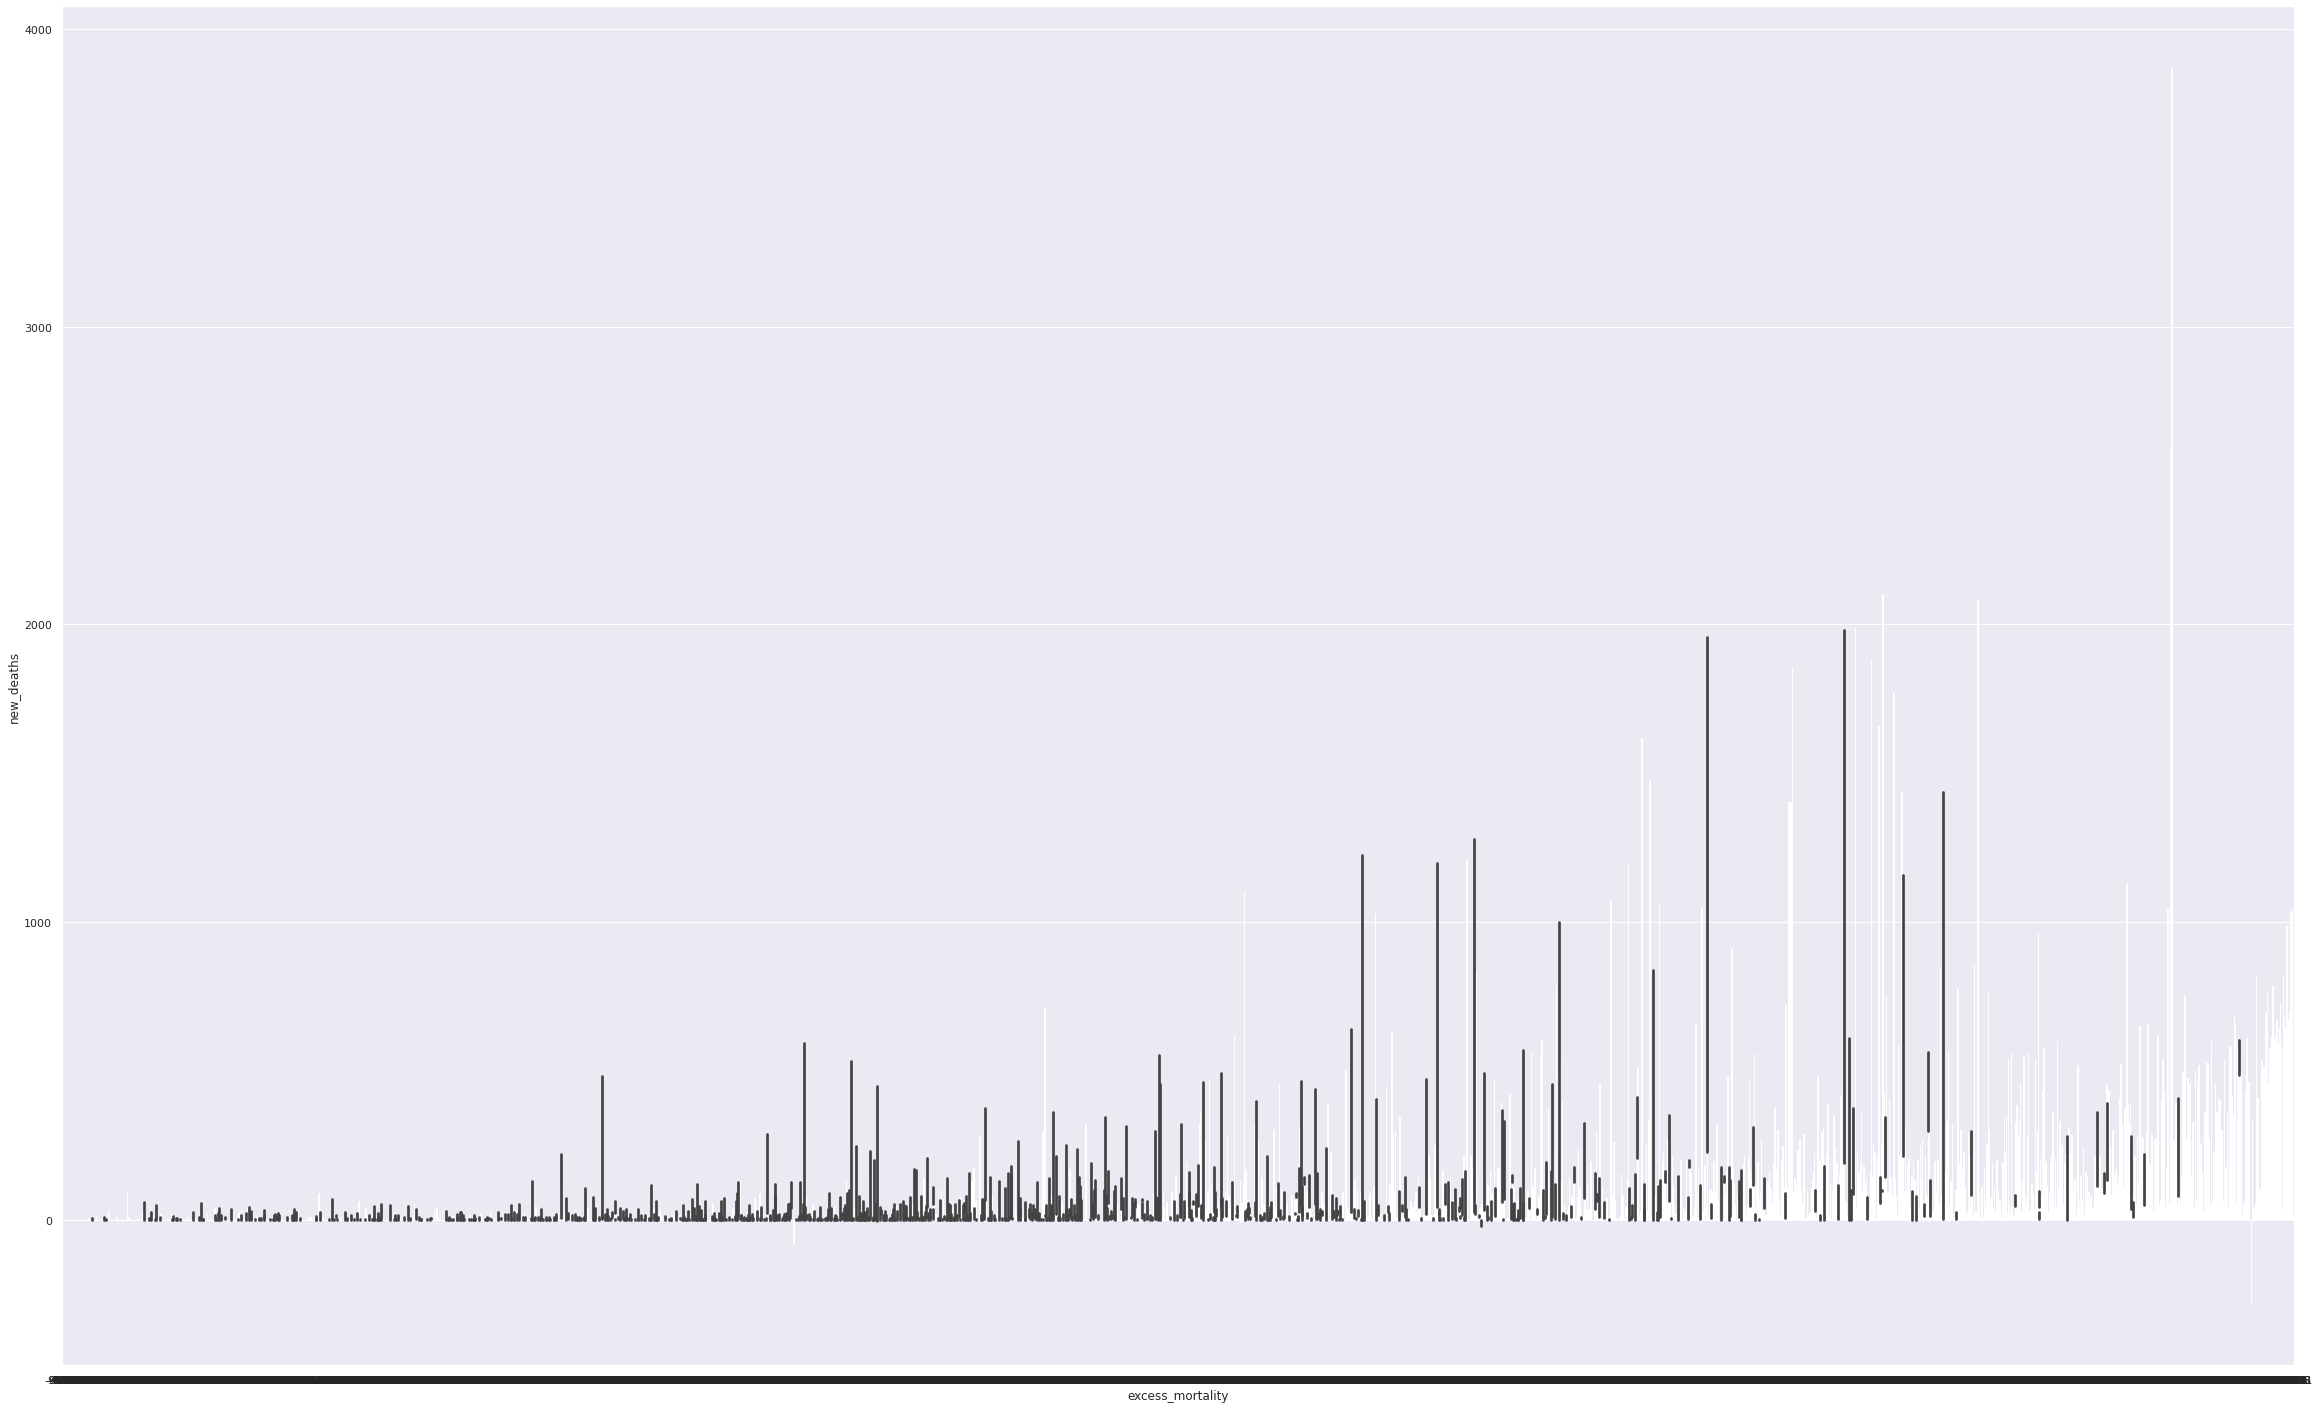

In [164]:
plt.figure(figsize=(40,25))

sns.barplot(covid_em['excess_mortality'] , covid_em['new_deaths'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


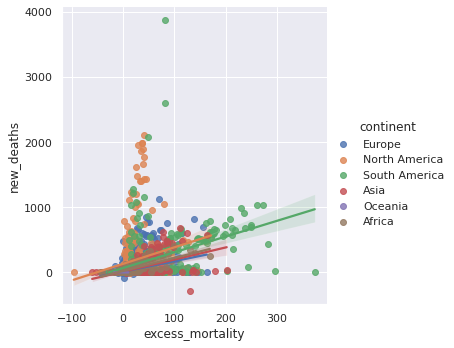

In [165]:
sns.set(rc= {'figure.figsize':(20,8)})
sns.lmplot('excess_mortality' ,'new_deaths' , data=covid_em , hue='continent')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2880x1440 with 0 Axes>

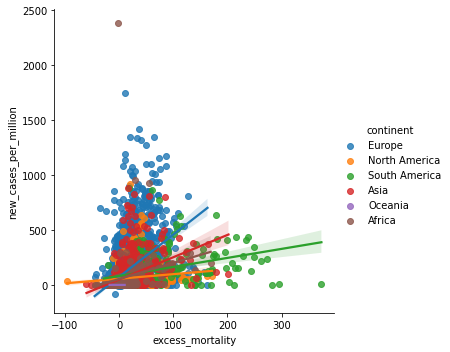

In [ ]:
plt.figure(figsize=(40,20))

sns.lmplot('excess_mortality' ,'new_cases_per_million' , data=covid_em , hue='continent')

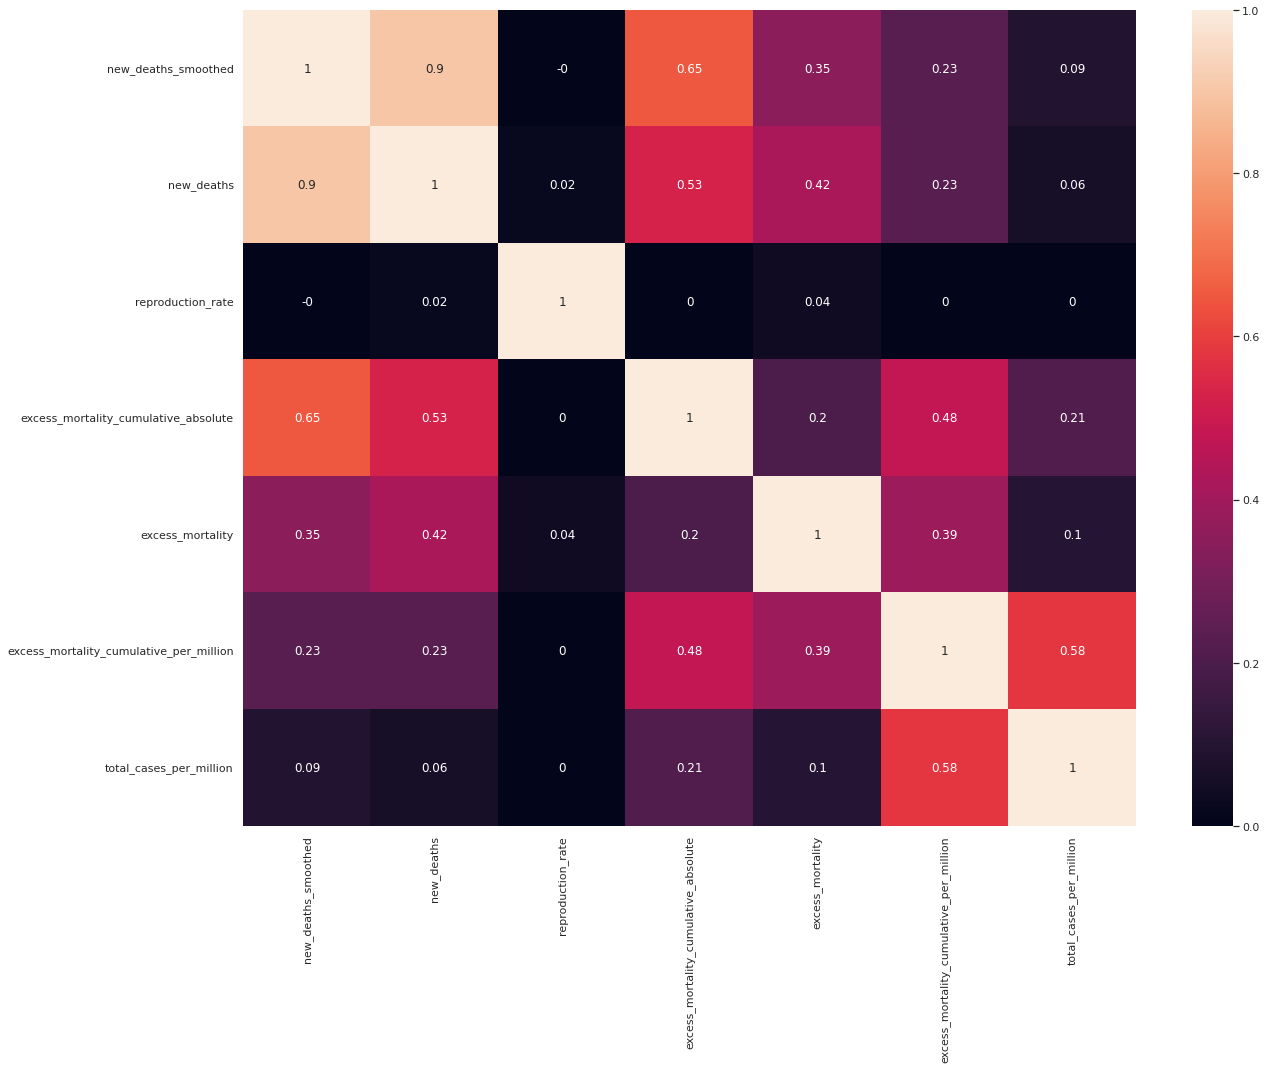

In [168]:
plt.figure(figsize=(20,15))
correlation_matrix = covid_em[["new_deaths_smoothed","new_deaths","reproduction_rate","excess_mortality_cumulative_absolute"
                          ,"excess_mortality",'excess_mortality_cumulative_per_million','total_cases_per_million']].corr().round(2)
sns.heatmap(data=correlation_matrix  , annot=True)